In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

## Load the data

In [2]:
df = pd.read_csv('../cleaned_data/FREN.csv', index_col='Date', parse_dates=True)
df.head()

,7 DAYS MA,7 DAYS STD DEV,14 DAYS MA,21 DAYS MA,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,
2012-10-17,-0.077792,-0.484714,-0.039585,-0.041007,0.008923,1.34241,1.016593,-1.845348,1.033444,0.147246,1.030312,0.440118
2012-10-18,-0.003835,1.422315,-0.007674,-0.010651,0.716706,1.34241,1.016593,-1.845348,1.042927,0.261864,1.030312,0.201081
2012-10-19,0.038425,1.517442,0.004293,0.002741,1.424489,1.34241,1.016593,-1.845348,1.052410,0.376483,1.030312,0.293018
2012-10-22,0.093893,1.628038,0.025567,0.019705,-1.406643,1.34241,1.016593,-1.845348,1.080859,0.720337,1.096678,0.274631
2012-10-23,0.141436,1.606590,0.046841,0.028634,-0.698860,1.34241,1.016593,-1.845348,1.090342,0.834955,1.096678,0.219468


### Plot the Close price - our target

Text(0.5, 1.0, 'FREN.JK Close Price')

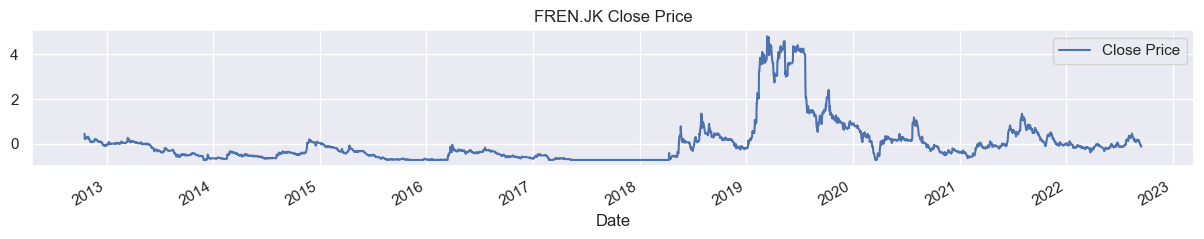

In [3]:
df['Close'].plot(figsize=(15,2))
plt.legend(['Close Price'])
plt.title('FREN.JK Close Price')

### Split the data
- Split the data into independent variables and target variable
- Split the data into train and test set (80:20)

In [4]:
train_len = int(len(df)*.8)
train_dataset = df[:train_len]
test_dataset = df[train_len:len(df)]

In [5]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Close')
test_labels = test_features.pop('Close')

## Modeling

### Grid Search to find the best combination of hyperparameters

In [6]:
# ================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor = xgb.XGBRegressor(eval_metric='rmse')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [3, 4, 5],
              "n_estimators": [500, 600, 700, 1000],
              "learning_rate": [0.01, 0.015],
              "base_score": [0.5],
              "booster": ["gbtree"],
              "early_stopping_rounds": [50]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

print("The best hyperparameters are ",search.best_params_)

[0]	validation_0-rmse:1.19936
[1]	validation_0-rmse:1.18776
[2]	validation_0-rmse:1.17627
[3]	validation_0-rmse:1.16491
[4]	validation_0-rmse:1.15366
[5]	validation_0-rmse:1.14254
[6]	validation_0-rmse:1.13151
[7]	validation_0-rmse:1.12055
[8]	validation_0-rmse:1.10981
[9]	validation_0-rmse:1.09916
[10]	validation_0-rmse:1.08859
[11]	validation_0-rmse:1.07813
[12]	validation_0-rmse:1.06781
[13]	validation_0-rmse:1.05749
[14]	validation_0-rmse:1.04737
[15]	validation_0-rmse:1.03734
[16]	validation_0-rmse:1.02737
[17]	validation_0-rmse:1.01756
[18]	validation_0-rmse:1.00775
[19]	validation_0-rmse:0.99814
[20]	validation_0-rmse:0.98856
[21]	validation_0-rmse:0.97914
[22]	validation_0-rmse:0.96973
[23]	validation_0-rmse:0.96051
[24]	validation_0-rmse:0.95132
[25]	validation_0-rmse:0.94228
[26]	validation_0-rmse:0.93325
[27]	validation_0-rmse:0.92440
[28]	validation_0-rmse:0.91564
[29]	validation_0-rmse:0.90685
[30]	validation_0-rmse:0.89827
[31]	validation_0-rmse:0.88971
[32]	validation_0-

[260]	validation_0-rmse:0.15411
[261]	validation_0-rmse:0.15347
[262]	validation_0-rmse:0.15283
[263]	validation_0-rmse:0.15218
[264]	validation_0-rmse:0.15152
[265]	validation_0-rmse:0.15092
[266]	validation_0-rmse:0.15031
[267]	validation_0-rmse:0.14972
[268]	validation_0-rmse:0.14911
[269]	validation_0-rmse:0.14854
[270]	validation_0-rmse:0.14796
[271]	validation_0-rmse:0.14736
[272]	validation_0-rmse:0.14680
[273]	validation_0-rmse:0.14624
[274]	validation_0-rmse:0.14567
[275]	validation_0-rmse:0.14506
[276]	validation_0-rmse:0.14453
[277]	validation_0-rmse:0.14401
[278]	validation_0-rmse:0.14346
[279]	validation_0-rmse:0.14289
[280]	validation_0-rmse:0.14239
[281]	validation_0-rmse:0.14189
[282]	validation_0-rmse:0.14136
[283]	validation_0-rmse:0.14082
[284]	validation_0-rmse:0.14034
[285]	validation_0-rmse:0.13983
[286]	validation_0-rmse:0.13930
[287]	validation_0-rmse:0.13878
[288]	validation_0-rmse:0.13832
[289]	validation_0-rmse:0.13784
[290]	validation_0-rmse:0.13733
[291]	va

[17]	validation_0-rmse:1.01793
[18]	validation_0-rmse:1.00821
[19]	validation_0-rmse:0.99855
[20]	validation_0-rmse:0.98901
[21]	validation_0-rmse:0.97954
[22]	validation_0-rmse:0.97018
[23]	validation_0-rmse:0.96091
[24]	validation_0-rmse:0.95174
[25]	validation_0-rmse:0.94265
[26]	validation_0-rmse:0.93367
[27]	validation_0-rmse:0.92477
[28]	validation_0-rmse:0.91596
[29]	validation_0-rmse:0.90725
[30]	validation_0-rmse:0.89861
[31]	validation_0-rmse:0.89006
[32]	validation_0-rmse:0.88162
[33]	validation_0-rmse:0.87324
[34]	validation_0-rmse:0.86494
[35]	validation_0-rmse:0.85675
[36]	validation_0-rmse:0.84862
[37]	validation_0-rmse:0.84057
[38]	validation_0-rmse:0.83261
[39]	validation_0-rmse:0.82473
[40]	validation_0-rmse:0.81694
[41]	validation_0-rmse:0.80921
[42]	validation_0-rmse:0.80158
[43]	validation_0-rmse:0.79402
[44]	validation_0-rmse:0.78649
[45]	validation_0-rmse:0.77905
[46]	validation_0-rmse:0.77167
[47]	validation_0-rmse:0.76440
[48]	validation_0-rmse:0.75717
[49]	val

[276]	validation_0-rmse:0.14532
[277]	validation_0-rmse:0.14478
[278]	validation_0-rmse:0.14423
[279]	validation_0-rmse:0.14366
[280]	validation_0-rmse:0.14315
[281]	validation_0-rmse:0.14261
[282]	validation_0-rmse:0.14205
[283]	validation_0-rmse:0.14153
[284]	validation_0-rmse:0.14105
[285]	validation_0-rmse:0.14051
[286]	validation_0-rmse:0.14001
[287]	validation_0-rmse:0.13954
[288]	validation_0-rmse:0.13902
[289]	validation_0-rmse:0.13854
[290]	validation_0-rmse:0.13804
[291]	validation_0-rmse:0.13760
[292]	validation_0-rmse:0.13715
[293]	validation_0-rmse:0.13664
[294]	validation_0-rmse:0.13616
[295]	validation_0-rmse:0.13571
[296]	validation_0-rmse:0.13522
[297]	validation_0-rmse:0.13474
[298]	validation_0-rmse:0.13429
[299]	validation_0-rmse:0.13382
[300]	validation_0-rmse:0.13336
[301]	validation_0-rmse:0.13293
[302]	validation_0-rmse:0.13253
[303]	validation_0-rmse:0.13209
[304]	validation_0-rmse:0.13165
[305]	validation_0-rmse:0.13122
[306]	validation_0-rmse:0.13082
[307]	va

[34]	validation_0-rmse:0.86488
[35]	validation_0-rmse:0.85672
[36]	validation_0-rmse:0.84862
[37]	validation_0-rmse:0.84061
[38]	validation_0-rmse:0.83264
[39]	validation_0-rmse:0.82478
[40]	validation_0-rmse:0.81697
[41]	validation_0-rmse:0.80928
[42]	validation_0-rmse:0.80164
[43]	validation_0-rmse:0.79412
[44]	validation_0-rmse:0.78661
[45]	validation_0-rmse:0.77923
[46]	validation_0-rmse:0.77188
[47]	validation_0-rmse:0.76457
[48]	validation_0-rmse:0.75734
[49]	validation_0-rmse:0.75026
[50]	validation_0-rmse:0.74318
[51]	validation_0-rmse:0.73616
[52]	validation_0-rmse:0.72928
[53]	validation_0-rmse:0.72240
[54]	validation_0-rmse:0.71566
[55]	validation_0-rmse:0.70893
[56]	validation_0-rmse:0.70233
[57]	validation_0-rmse:0.69572
[58]	validation_0-rmse:0.68925
[59]	validation_0-rmse:0.68279
[60]	validation_0-rmse:0.67640
[61]	validation_0-rmse:0.67012
[62]	validation_0-rmse:0.66386
[63]	validation_0-rmse:0.65771
[64]	validation_0-rmse:0.65158
[65]	validation_0-rmse:0.64550
[66]	val

[293]	validation_0-rmse:0.13676
[294]	validation_0-rmse:0.13629
[295]	validation_0-rmse:0.13580
[296]	validation_0-rmse:0.13532
[297]	validation_0-rmse:0.13485
[298]	validation_0-rmse:0.13438
[299]	validation_0-rmse:0.13395
[300]	validation_0-rmse:0.13349
[301]	validation_0-rmse:0.13308
[302]	validation_0-rmse:0.13269
[303]	validation_0-rmse:0.13225
[304]	validation_0-rmse:0.13182
[305]	validation_0-rmse:0.13141
[306]	validation_0-rmse:0.13099
[307]	validation_0-rmse:0.13061
[308]	validation_0-rmse:0.13021
[309]	validation_0-rmse:0.12983
[310]	validation_0-rmse:0.12943
[311]	validation_0-rmse:0.12906
[312]	validation_0-rmse:0.12868
[313]	validation_0-rmse:0.12831
[314]	validation_0-rmse:0.12795
[315]	validation_0-rmse:0.12761
[316]	validation_0-rmse:0.12724
[317]	validation_0-rmse:0.12689
[318]	validation_0-rmse:0.12655
[319]	validation_0-rmse:0.12622
[320]	validation_0-rmse:0.12590
[321]	validation_0-rmse:0.12557
[322]	validation_0-rmse:0.12524
[323]	validation_0-rmse:0.12492
[324]	va

[51]	validation_0-rmse:0.73620
[52]	validation_0-rmse:0.72926
[53]	validation_0-rmse:0.72246
[54]	validation_0-rmse:0.71566
[55]	validation_0-rmse:0.70906
[56]	validation_0-rmse:0.70241
[57]	validation_0-rmse:0.69582
[58]	validation_0-rmse:0.68939
[59]	validation_0-rmse:0.68293
[60]	validation_0-rmse:0.67655
[61]	validation_0-rmse:0.67033
[62]	validation_0-rmse:0.66408
[63]	validation_0-rmse:0.65794
[64]	validation_0-rmse:0.65181
[65]	validation_0-rmse:0.64586
[66]	validation_0-rmse:0.63985
[67]	validation_0-rmse:0.63397
[68]	validation_0-rmse:0.62809
[69]	validation_0-rmse:0.62233
[70]	validation_0-rmse:0.61658
[71]	validation_0-rmse:0.61097
[72]	validation_0-rmse:0.60533
[73]	validation_0-rmse:0.59980
[74]	validation_0-rmse:0.59428
[75]	validation_0-rmse:0.58890
[76]	validation_0-rmse:0.58351
[77]	validation_0-rmse:0.57821
[78]	validation_0-rmse:0.57291
[79]	validation_0-rmse:0.56775
[80]	validation_0-rmse:0.56256
[81]	validation_0-rmse:0.55748
[82]	validation_0-rmse:0.55242
[83]	val

[309]	validation_0-rmse:0.14020
[310]	validation_0-rmse:0.13985
[311]	validation_0-rmse:0.13953
[312]	validation_0-rmse:0.13922
[313]	validation_0-rmse:0.13894
[314]	validation_0-rmse:0.13866
[315]	validation_0-rmse:0.13837
[316]	validation_0-rmse:0.13808
[317]	validation_0-rmse:0.13776
[318]	validation_0-rmse:0.13747
[319]	validation_0-rmse:0.13719
[320]	validation_0-rmse:0.13689
[321]	validation_0-rmse:0.13661
[322]	validation_0-rmse:0.13630
[323]	validation_0-rmse:0.13603
[324]	validation_0-rmse:0.13577
[325]	validation_0-rmse:0.13551
[326]	validation_0-rmse:0.13527
[327]	validation_0-rmse:0.13500
[328]	validation_0-rmse:0.13475
[329]	validation_0-rmse:0.13449
[330]	validation_0-rmse:0.13421
[331]	validation_0-rmse:0.13396
[332]	validation_0-rmse:0.13373
[333]	validation_0-rmse:0.13348
[334]	validation_0-rmse:0.13321
[335]	validation_0-rmse:0.13298
[336]	validation_0-rmse:0.13275
[337]	validation_0-rmse:0.13253
[338]	validation_0-rmse:0.13229
[339]	validation_0-rmse:0.13207
[340]	va

[68]	validation_0-rmse:0.89102
[69]	validation_0-rmse:0.88690
[70]	validation_0-rmse:0.88430
[71]	validation_0-rmse:0.88110
[72]	validation_0-rmse:0.87858
[73]	validation_0-rmse:0.87607
[74]	validation_0-rmse:0.87299
[75]	validation_0-rmse:0.87062
[76]	validation_0-rmse:0.86818
[77]	validation_0-rmse:0.86583
[78]	validation_0-rmse:0.86290
[79]	validation_0-rmse:0.86068
[80]	validation_0-rmse:0.85832
[81]	validation_0-rmse:0.85626
[82]	validation_0-rmse:0.85409
[83]	validation_0-rmse:0.85183
[84]	validation_0-rmse:0.84956
[85]	validation_0-rmse:0.84753
[86]	validation_0-rmse:0.84488
[87]	validation_0-rmse:0.84275
[88]	validation_0-rmse:0.84081
[89]	validation_0-rmse:0.83907
[90]	validation_0-rmse:0.83703
[91]	validation_0-rmse:0.83498
[92]	validation_0-rmse:0.83311
[93]	validation_0-rmse:0.83103
[94]	validation_0-rmse:0.82940
[95]	validation_0-rmse:0.82750
[96]	validation_0-rmse:0.82555
[97]	validation_0-rmse:0.82371
[98]	validation_0-rmse:0.82178
[99]	validation_0-rmse:0.82009
[100]	va

[326]	validation_0-rmse:0.66651
[327]	validation_0-rmse:0.66627
[328]	validation_0-rmse:0.66609
[329]	validation_0-rmse:0.66594
[330]	validation_0-rmse:0.66589
[331]	validation_0-rmse:0.66572
[332]	validation_0-rmse:0.66567
[333]	validation_0-rmse:0.66559
[334]	validation_0-rmse:0.66554
[335]	validation_0-rmse:0.66538
[336]	validation_0-rmse:0.66534
[337]	validation_0-rmse:0.66519
[338]	validation_0-rmse:0.66515
[339]	validation_0-rmse:0.66498
[340]	validation_0-rmse:0.66494
[341]	validation_0-rmse:0.66480
[342]	validation_0-rmse:0.66476
[343]	validation_0-rmse:0.66468
[344]	validation_0-rmse:0.66452
[345]	validation_0-rmse:0.66448
[346]	validation_0-rmse:0.66434
[347]	validation_0-rmse:0.66430
[348]	validation_0-rmse:0.66422
[349]	validation_0-rmse:0.66413
[350]	validation_0-rmse:0.66410
[351]	validation_0-rmse:0.66401
[352]	validation_0-rmse:0.66388
[353]	validation_0-rmse:0.66385
[354]	validation_0-rmse:0.66370
[355]	validation_0-rmse:0.66367
[356]	validation_0-rmse:0.66359
[357]	va

[85]	validation_0-rmse:0.53510
[86]	validation_0-rmse:0.53021
[87]	validation_0-rmse:0.52538
[88]	validation_0-rmse:0.52057
[89]	validation_0-rmse:0.51585
[90]	validation_0-rmse:0.51116
[91]	validation_0-rmse:0.50653
[92]	validation_0-rmse:0.50195
[93]	validation_0-rmse:0.49739
[94]	validation_0-rmse:0.49291
[95]	validation_0-rmse:0.48848
[96]	validation_0-rmse:0.48410
[97]	validation_0-rmse:0.47976
[98]	validation_0-rmse:0.47544
[99]	validation_0-rmse:0.47119
[100]	validation_0-rmse:0.46696
[101]	validation_0-rmse:0.46281
[102]	validation_0-rmse:0.45866
[103]	validation_0-rmse:0.45462
[104]	validation_0-rmse:0.45060
[105]	validation_0-rmse:0.44663
[106]	validation_0-rmse:0.44268
[107]	validation_0-rmse:0.43878
[108]	validation_0-rmse:0.43494
[109]	validation_0-rmse:0.43112
[110]	validation_0-rmse:0.42735
[111]	validation_0-rmse:0.42359
[112]	validation_0-rmse:0.41989
[113]	validation_0-rmse:0.41624
[114]	validation_0-rmse:0.41263
[115]	validation_0-rmse:0.40902
[116]	validation_0-rmse

[342]	validation_0-rmse:0.11880
[343]	validation_0-rmse:0.11856
[344]	validation_0-rmse:0.11833
[345]	validation_0-rmse:0.11808
[346]	validation_0-rmse:0.11784
[347]	validation_0-rmse:0.11761
[348]	validation_0-rmse:0.11737
[349]	validation_0-rmse:0.11713
[350]	validation_0-rmse:0.11693
[351]	validation_0-rmse:0.11669
[352]	validation_0-rmse:0.11647
[353]	validation_0-rmse:0.11625
[354]	validation_0-rmse:0.11602
[355]	validation_0-rmse:0.11582
[356]	validation_0-rmse:0.11561
[357]	validation_0-rmse:0.11542
[358]	validation_0-rmse:0.11521
[359]	validation_0-rmse:0.11503
[360]	validation_0-rmse:0.11483
[361]	validation_0-rmse:0.11464
[362]	validation_0-rmse:0.11446
[363]	validation_0-rmse:0.11426
[364]	validation_0-rmse:0.11408
[365]	validation_0-rmse:0.11387
[366]	validation_0-rmse:0.11367
[367]	validation_0-rmse:0.11348
[368]	validation_0-rmse:0.11332
[369]	validation_0-rmse:0.11313
[370]	validation_0-rmse:0.11294
[371]	validation_0-rmse:0.11278
[372]	validation_0-rmse:0.11260
[373]	va

[598]	validation_0-rmse:0.09387
[599]	validation_0-rmse:0.09383
[0]	validation_0-rmse:1.19940
[1]	validation_0-rmse:1.18784
[2]	validation_0-rmse:1.17640
[3]	validation_0-rmse:1.16507
[4]	validation_0-rmse:1.15386
[5]	validation_0-rmse:1.14277
[6]	validation_0-rmse:1.13178
[7]	validation_0-rmse:1.12091
[8]	validation_0-rmse:1.11015
[9]	validation_0-rmse:1.09950
[10]	validation_0-rmse:1.08894
[11]	validation_0-rmse:1.07850
[12]	validation_0-rmse:1.06816
[13]	validation_0-rmse:1.05793
[14]	validation_0-rmse:1.04779
[15]	validation_0-rmse:1.03773
[16]	validation_0-rmse:1.02778
[17]	validation_0-rmse:1.01793
[18]	validation_0-rmse:1.00821
[19]	validation_0-rmse:0.99855
[20]	validation_0-rmse:0.98901
[21]	validation_0-rmse:0.97954
[22]	validation_0-rmse:0.97018
[23]	validation_0-rmse:0.96091
[24]	validation_0-rmse:0.95174
[25]	validation_0-rmse:0.94265
[26]	validation_0-rmse:0.93367
[27]	validation_0-rmse:0.92477
[28]	validation_0-rmse:0.91596
[29]	validation_0-rmse:0.90725
[30]	validation_

[258]	validation_0-rmse:0.15632
[259]	validation_0-rmse:0.15565
[260]	validation_0-rmse:0.15500
[261]	validation_0-rmse:0.15433
[262]	validation_0-rmse:0.15367
[263]	validation_0-rmse:0.15304
[264]	validation_0-rmse:0.15240
[265]	validation_0-rmse:0.15179
[266]	validation_0-rmse:0.15118
[267]	validation_0-rmse:0.15056
[268]	validation_0-rmse:0.14997
[269]	validation_0-rmse:0.14936
[270]	validation_0-rmse:0.14879
[271]	validation_0-rmse:0.14822
[272]	validation_0-rmse:0.14762
[273]	validation_0-rmse:0.14701
[274]	validation_0-rmse:0.14641
[275]	validation_0-rmse:0.14585
[276]	validation_0-rmse:0.14532
[277]	validation_0-rmse:0.14478
[278]	validation_0-rmse:0.14423
[279]	validation_0-rmse:0.14366
[280]	validation_0-rmse:0.14315
[281]	validation_0-rmse:0.14261
[282]	validation_0-rmse:0.14205
[283]	validation_0-rmse:0.14153
[284]	validation_0-rmse:0.14105
[285]	validation_0-rmse:0.14051
[286]	validation_0-rmse:0.14001
[287]	validation_0-rmse:0.13954
[288]	validation_0-rmse:0.13902
[289]	va

[515]	validation_0-rmse:0.09828
[516]	validation_0-rmse:0.09821
[517]	validation_0-rmse:0.09815
[518]	validation_0-rmse:0.09810
[519]	validation_0-rmse:0.09805
[520]	validation_0-rmse:0.09800
[521]	validation_0-rmse:0.09793
[522]	validation_0-rmse:0.09786
[523]	validation_0-rmse:0.09781
[524]	validation_0-rmse:0.09776
[525]	validation_0-rmse:0.09768
[526]	validation_0-rmse:0.09761
[527]	validation_0-rmse:0.09756
[528]	validation_0-rmse:0.09751
[529]	validation_0-rmse:0.09744
[530]	validation_0-rmse:0.09739
[531]	validation_0-rmse:0.09735
[532]	validation_0-rmse:0.09729
[533]	validation_0-rmse:0.09724
[534]	validation_0-rmse:0.09716
[535]	validation_0-rmse:0.09711
[536]	validation_0-rmse:0.09706
[537]	validation_0-rmse:0.09701
[538]	validation_0-rmse:0.09694
[539]	validation_0-rmse:0.09687
[540]	validation_0-rmse:0.09682
[541]	validation_0-rmse:0.09679
[542]	validation_0-rmse:0.09674
[543]	validation_0-rmse:0.09670
[544]	validation_0-rmse:0.09665
[545]	validation_0-rmse:0.09658
[546]	va

[175]	validation_0-rmse:0.25390
[176]	validation_0-rmse:0.25207
[177]	validation_0-rmse:0.25026
[178]	validation_0-rmse:0.24849
[179]	validation_0-rmse:0.24673
[180]	validation_0-rmse:0.24499
[181]	validation_0-rmse:0.24328
[182]	validation_0-rmse:0.24158
[183]	validation_0-rmse:0.23990
[184]	validation_0-rmse:0.23823
[185]	validation_0-rmse:0.23659
[186]	validation_0-rmse:0.23499
[187]	validation_0-rmse:0.23339
[188]	validation_0-rmse:0.23182
[189]	validation_0-rmse:0.23022
[190]	validation_0-rmse:0.22867
[191]	validation_0-rmse:0.22717
[192]	validation_0-rmse:0.22566
[193]	validation_0-rmse:0.22416
[194]	validation_0-rmse:0.22270
[195]	validation_0-rmse:0.22127
[196]	validation_0-rmse:0.21979
[197]	validation_0-rmse:0.21837
[198]	validation_0-rmse:0.21693
[199]	validation_0-rmse:0.21552
[200]	validation_0-rmse:0.21417
[201]	validation_0-rmse:0.21278
[202]	validation_0-rmse:0.21142
[203]	validation_0-rmse:0.21007
[204]	validation_0-rmse:0.20878
[205]	validation_0-rmse:0.20746
[206]	va

[432]	validation_0-rmse:0.10446
[433]	validation_0-rmse:0.10435
[434]	validation_0-rmse:0.10426
[435]	validation_0-rmse:0.10415
[436]	validation_0-rmse:0.10405
[437]	validation_0-rmse:0.10397
[438]	validation_0-rmse:0.10388
[439]	validation_0-rmse:0.10378
[440]	validation_0-rmse:0.10366
[441]	validation_0-rmse:0.10358
[442]	validation_0-rmse:0.10348
[443]	validation_0-rmse:0.10339
[444]	validation_0-rmse:0.10331
[445]	validation_0-rmse:0.10319
[446]	validation_0-rmse:0.10310
[447]	validation_0-rmse:0.10302
[448]	validation_0-rmse:0.10294
[449]	validation_0-rmse:0.10283
[450]	validation_0-rmse:0.10272
[451]	validation_0-rmse:0.10264
[452]	validation_0-rmse:0.10254
[453]	validation_0-rmse:0.10246
[454]	validation_0-rmse:0.10239
[455]	validation_0-rmse:0.10231
[456]	validation_0-rmse:0.10224
[457]	validation_0-rmse:0.10213
[458]	validation_0-rmse:0.10205
[459]	validation_0-rmse:0.10194
[460]	validation_0-rmse:0.10187
[461]	validation_0-rmse:0.10177
[462]	validation_0-rmse:0.10166
[463]	va

[92]	validation_0-rmse:0.50474
[93]	validation_0-rmse:0.50029
[94]	validation_0-rmse:0.49579
[95]	validation_0-rmse:0.49133
[96]	validation_0-rmse:0.48702
[97]	validation_0-rmse:0.48266
[98]	validation_0-rmse:0.47834
[99]	validation_0-rmse:0.47416
[100]	validation_0-rmse:0.46993
[101]	validation_0-rmse:0.46585
[102]	validation_0-rmse:0.46171
[103]	validation_0-rmse:0.45770
[104]	validation_0-rmse:0.45365
[105]	validation_0-rmse:0.44974
[106]	validation_0-rmse:0.44578
[107]	validation_0-rmse:0.44194
[108]	validation_0-rmse:0.43805
[109]	validation_0-rmse:0.43431
[110]	validation_0-rmse:0.43051
[111]	validation_0-rmse:0.42683
[112]	validation_0-rmse:0.42321
[113]	validation_0-rmse:0.41951
[114]	validation_0-rmse:0.41590
[115]	validation_0-rmse:0.41228
[116]	validation_0-rmse:0.40878
[117]	validation_0-rmse:0.40526
[118]	validation_0-rmse:0.40179
[119]	validation_0-rmse:0.39841
[120]	validation_0-rmse:0.39498
[121]	validation_0-rmse:0.39159
[122]	validation_0-rmse:0.38832
[123]	validation

[349]	validation_0-rmse:0.12997
[350]	validation_0-rmse:0.12973
[351]	validation_0-rmse:0.12954
[352]	validation_0-rmse:0.12935
[353]	validation_0-rmse:0.12917
[354]	validation_0-rmse:0.12899
[355]	validation_0-rmse:0.12880
[356]	validation_0-rmse:0.12857
[357]	validation_0-rmse:0.12840
[358]	validation_0-rmse:0.12823
[359]	validation_0-rmse:0.12807
[360]	validation_0-rmse:0.12790
[361]	validation_0-rmse:0.12773
[362]	validation_0-rmse:0.12755
[363]	validation_0-rmse:0.12734
[364]	validation_0-rmse:0.12718
[365]	validation_0-rmse:0.12703
[366]	validation_0-rmse:0.12688
[367]	validation_0-rmse:0.12673
[368]	validation_0-rmse:0.12657
[369]	validation_0-rmse:0.12643
[370]	validation_0-rmse:0.12628
[371]	validation_0-rmse:0.12613
[372]	validation_0-rmse:0.12598
[373]	validation_0-rmse:0.12579
[374]	validation_0-rmse:0.12565
[375]	validation_0-rmse:0.12551
[376]	validation_0-rmse:0.12536
[377]	validation_0-rmse:0.12517
[378]	validation_0-rmse:0.12505
[379]	validation_0-rmse:0.12491
[380]	va

[6]	validation_0-rmse:1.15982
[7]	validation_0-rmse:1.15364
[8]	validation_0-rmse:1.14662
[9]	validation_0-rmse:1.14060
[10]	validation_0-rmse:1.13376
[11]	validation_0-rmse:1.12795
[12]	validation_0-rmse:1.12218
[13]	validation_0-rmse:1.11653
[14]	validation_0-rmse:1.11001
[15]	validation_0-rmse:1.10357
[16]	validation_0-rmse:1.09840
[17]	validation_0-rmse:1.09331
[18]	validation_0-rmse:1.08822
[19]	validation_0-rmse:1.08320
[20]	validation_0-rmse:1.07715
[21]	validation_0-rmse:1.07228
[22]	validation_0-rmse:1.06748
[23]	validation_0-rmse:1.06165
[24]	validation_0-rmse:1.05704
[25]	validation_0-rmse:1.05136
[26]	validation_0-rmse:1.04682
[27]	validation_0-rmse:1.04244
[28]	validation_0-rmse:1.03803
[29]	validation_0-rmse:1.03376
[30]	validation_0-rmse:1.02842
[31]	validation_0-rmse:1.02368
[32]	validation_0-rmse:1.01907
[33]	validation_0-rmse:1.01475
[34]	validation_0-rmse:1.01026
[35]	validation_0-rmse:1.00524
[36]	validation_0-rmse:1.00082
[37]	validation_0-rmse:0.99679
[38]	validat

[266]	validation_0-rmse:0.67779
[267]	validation_0-rmse:0.67762
[268]	validation_0-rmse:0.67701
[269]	validation_0-rmse:0.67683
[270]	validation_0-rmse:0.67660
[271]	validation_0-rmse:0.67645
[272]	validation_0-rmse:0.67641
[273]	validation_0-rmse:0.67626
[274]	validation_0-rmse:0.67591
[275]	validation_0-rmse:0.67576
[276]	validation_0-rmse:0.67561
[277]	validation_0-rmse:0.67546
[278]	validation_0-rmse:0.67532
[279]	validation_0-rmse:0.67517
[280]	validation_0-rmse:0.67503
[281]	validation_0-rmse:0.67470
[282]	validation_0-rmse:0.67456
[283]	validation_0-rmse:0.67424
[284]	validation_0-rmse:0.67388
[285]	validation_0-rmse:0.67373
[286]	validation_0-rmse:0.67360
[287]	validation_0-rmse:0.67325
[288]	validation_0-rmse:0.67294
[289]	validation_0-rmse:0.67281
[290]	validation_0-rmse:0.67268
[291]	validation_0-rmse:0.67255
[292]	validation_0-rmse:0.67225
[293]	validation_0-rmse:0.67191
[294]	validation_0-rmse:0.67179
[295]	validation_0-rmse:0.67166
[296]	validation_0-rmse:0.67133
[297]	va

[522]	validation_0-rmse:0.65289
[523]	validation_0-rmse:0.65286
[524]	validation_0-rmse:0.65287
[525]	validation_0-rmse:0.65289
[526]	validation_0-rmse:0.65285
[527]	validation_0-rmse:0.65272
[528]	validation_0-rmse:0.65270
[529]	validation_0-rmse:0.65266
[530]	validation_0-rmse:0.65248
[531]	validation_0-rmse:0.65250
[532]	validation_0-rmse:0.65251
[533]	validation_0-rmse:0.65250
[534]	validation_0-rmse:0.65247
[535]	validation_0-rmse:0.65248
[536]	validation_0-rmse:0.65249
[537]	validation_0-rmse:0.65245
[538]	validation_0-rmse:0.65233
[539]	validation_0-rmse:0.65232
[540]	validation_0-rmse:0.65234
[541]	validation_0-rmse:0.65231
[542]	validation_0-rmse:0.65232
[543]	validation_0-rmse:0.65228
[544]	validation_0-rmse:0.65212
[545]	validation_0-rmse:0.65214
[546]	validation_0-rmse:0.65211
[547]	validation_0-rmse:0.65211
[548]	validation_0-rmse:0.65213
[549]	validation_0-rmse:0.65211
[550]	validation_0-rmse:0.65212
[551]	validation_0-rmse:0.65200
[552]	validation_0-rmse:0.65198
[553]	va

[182]	validation_0-rmse:0.24013
[183]	validation_0-rmse:0.23844
[184]	validation_0-rmse:0.23676
[185]	validation_0-rmse:0.23509
[186]	validation_0-rmse:0.23350
[187]	validation_0-rmse:0.23189
[188]	validation_0-rmse:0.23033
[189]	validation_0-rmse:0.22872
[190]	validation_0-rmse:0.22718
[191]	validation_0-rmse:0.22564
[192]	validation_0-rmse:0.22411
[193]	validation_0-rmse:0.22261
[194]	validation_0-rmse:0.22111
[195]	validation_0-rmse:0.21965
[196]	validation_0-rmse:0.21820
[197]	validation_0-rmse:0.21677
[198]	validation_0-rmse:0.21534
[199]	validation_0-rmse:0.21394
[200]	validation_0-rmse:0.21257
[201]	validation_0-rmse:0.21120
[202]	validation_0-rmse:0.20986
[203]	validation_0-rmse:0.20853
[204]	validation_0-rmse:0.20720
[205]	validation_0-rmse:0.20592
[206]	validation_0-rmse:0.20465
[207]	validation_0-rmse:0.20338
[208]	validation_0-rmse:0.20211
[209]	validation_0-rmse:0.20089
[210]	validation_0-rmse:0.19967
[211]	validation_0-rmse:0.19846
[212]	validation_0-rmse:0.19725
[213]	va

[438]	validation_0-rmse:0.10382
[439]	validation_0-rmse:0.10374
[440]	validation_0-rmse:0.10362
[441]	validation_0-rmse:0.10353
[442]	validation_0-rmse:0.10343
[443]	validation_0-rmse:0.10331
[444]	validation_0-rmse:0.10320
[445]	validation_0-rmse:0.10309
[446]	validation_0-rmse:0.10301
[447]	validation_0-rmse:0.10292
[448]	validation_0-rmse:0.10282
[449]	validation_0-rmse:0.10274
[450]	validation_0-rmse:0.10265
[451]	validation_0-rmse:0.10256
[452]	validation_0-rmse:0.10247
[453]	validation_0-rmse:0.10238
[454]	validation_0-rmse:0.10231
[455]	validation_0-rmse:0.10220
[456]	validation_0-rmse:0.10211
[457]	validation_0-rmse:0.10204
[458]	validation_0-rmse:0.10195
[459]	validation_0-rmse:0.10187
[460]	validation_0-rmse:0.10178
[461]	validation_0-rmse:0.10168
[462]	validation_0-rmse:0.10160
[463]	validation_0-rmse:0.10151
[464]	validation_0-rmse:0.10143
[465]	validation_0-rmse:0.10133
[466]	validation_0-rmse:0.10123
[467]	validation_0-rmse:0.10117
[468]	validation_0-rmse:0.10108
[469]	va

[695]	validation_0-rmse:0.09108
[696]	validation_0-rmse:0.09105
[697]	validation_0-rmse:0.09103
[698]	validation_0-rmse:0.09101
[699]	validation_0-rmse:0.09097
[0]	validation_0-rmse:1.19940
[1]	validation_0-rmse:1.18784
[2]	validation_0-rmse:1.17640
[3]	validation_0-rmse:1.16507
[4]	validation_0-rmse:1.15386
[5]	validation_0-rmse:1.14277
[6]	validation_0-rmse:1.13178
[7]	validation_0-rmse:1.12091
[8]	validation_0-rmse:1.11015
[9]	validation_0-rmse:1.09950
[10]	validation_0-rmse:1.08894
[11]	validation_0-rmse:1.07850
[12]	validation_0-rmse:1.06816
[13]	validation_0-rmse:1.05793
[14]	validation_0-rmse:1.04779
[15]	validation_0-rmse:1.03773
[16]	validation_0-rmse:1.02778
[17]	validation_0-rmse:1.01793
[18]	validation_0-rmse:1.00821
[19]	validation_0-rmse:0.99855
[20]	validation_0-rmse:0.98901
[21]	validation_0-rmse:0.97954
[22]	validation_0-rmse:0.97018
[23]	validation_0-rmse:0.96091
[24]	validation_0-rmse:0.95174
[25]	validation_0-rmse:0.94265
[26]	validation_0-rmse:0.93367
[27]	validati

[255]	validation_0-rmse:0.15841
[256]	validation_0-rmse:0.15770
[257]	validation_0-rmse:0.15699
[258]	validation_0-rmse:0.15632
[259]	validation_0-rmse:0.15565
[260]	validation_0-rmse:0.15500
[261]	validation_0-rmse:0.15433
[262]	validation_0-rmse:0.15367
[263]	validation_0-rmse:0.15304
[264]	validation_0-rmse:0.15240
[265]	validation_0-rmse:0.15179
[266]	validation_0-rmse:0.15118
[267]	validation_0-rmse:0.15056
[268]	validation_0-rmse:0.14997
[269]	validation_0-rmse:0.14936
[270]	validation_0-rmse:0.14879
[271]	validation_0-rmse:0.14822
[272]	validation_0-rmse:0.14762
[273]	validation_0-rmse:0.14701
[274]	validation_0-rmse:0.14641
[275]	validation_0-rmse:0.14585
[276]	validation_0-rmse:0.14532
[277]	validation_0-rmse:0.14478
[278]	validation_0-rmse:0.14423
[279]	validation_0-rmse:0.14366
[280]	validation_0-rmse:0.14315
[281]	validation_0-rmse:0.14261
[282]	validation_0-rmse:0.14205
[283]	validation_0-rmse:0.14153
[284]	validation_0-rmse:0.14105
[285]	validation_0-rmse:0.14051
[286]	va

[512]	validation_0-rmse:0.09848
[513]	validation_0-rmse:0.09841
[514]	validation_0-rmse:0.09835
[515]	validation_0-rmse:0.09828
[516]	validation_0-rmse:0.09821
[517]	validation_0-rmse:0.09815
[518]	validation_0-rmse:0.09810
[519]	validation_0-rmse:0.09805
[520]	validation_0-rmse:0.09800
[521]	validation_0-rmse:0.09793
[522]	validation_0-rmse:0.09786
[523]	validation_0-rmse:0.09781
[524]	validation_0-rmse:0.09776
[525]	validation_0-rmse:0.09768
[526]	validation_0-rmse:0.09761
[527]	validation_0-rmse:0.09756
[528]	validation_0-rmse:0.09751
[529]	validation_0-rmse:0.09744
[530]	validation_0-rmse:0.09739
[531]	validation_0-rmse:0.09735
[532]	validation_0-rmse:0.09729
[533]	validation_0-rmse:0.09724
[534]	validation_0-rmse:0.09716
[535]	validation_0-rmse:0.09711
[536]	validation_0-rmse:0.09706
[537]	validation_0-rmse:0.09701
[538]	validation_0-rmse:0.09694
[539]	validation_0-rmse:0.09687
[540]	validation_0-rmse:0.09682
[541]	validation_0-rmse:0.09679
[542]	validation_0-rmse:0.09674
[543]	va

[71]	validation_0-rmse:0.61051
[72]	validation_0-rmse:0.60487
[73]	validation_0-rmse:0.59928
[74]	validation_0-rmse:0.59379
[75]	validation_0-rmse:0.58835
[76]	validation_0-rmse:0.58293
[77]	validation_0-rmse:0.57761
[78]	validation_0-rmse:0.57229
[79]	validation_0-rmse:0.56708
[80]	validation_0-rmse:0.56188
[81]	validation_0-rmse:0.55674
[82]	validation_0-rmse:0.55168
[83]	validation_0-rmse:0.54665
[84]	validation_0-rmse:0.54170
[85]	validation_0-rmse:0.53677
[86]	validation_0-rmse:0.53192
[87]	validation_0-rmse:0.52708
[88]	validation_0-rmse:0.52233
[89]	validation_0-rmse:0.51760
[90]	validation_0-rmse:0.51291
[91]	validation_0-rmse:0.50831
[92]	validation_0-rmse:0.50371
[93]	validation_0-rmse:0.49920
[94]	validation_0-rmse:0.49470
[95]	validation_0-rmse:0.49025
[96]	validation_0-rmse:0.48589
[97]	validation_0-rmse:0.48153
[98]	validation_0-rmse:0.47722
[99]	validation_0-rmse:0.47299
[100]	validation_0-rmse:0.46880
[101]	validation_0-rmse:0.46462
[102]	validation_0-rmse:0.46049
[103]

[328]	validation_0-rmse:0.12336
[329]	validation_0-rmse:0.12306
[330]	validation_0-rmse:0.12277
[331]	validation_0-rmse:0.12248
[332]	validation_0-rmse:0.12220
[333]	validation_0-rmse:0.12192
[334]	validation_0-rmse:0.12165
[335]	validation_0-rmse:0.12139
[336]	validation_0-rmse:0.12110
[337]	validation_0-rmse:0.12083
[338]	validation_0-rmse:0.12056
[339]	validation_0-rmse:0.12030
[340]	validation_0-rmse:0.12002
[341]	validation_0-rmse:0.11976
[342]	validation_0-rmse:0.11951
[343]	validation_0-rmse:0.11926
[344]	validation_0-rmse:0.11901
[345]	validation_0-rmse:0.11878
[346]	validation_0-rmse:0.11852
[347]	validation_0-rmse:0.11828
[348]	validation_0-rmse:0.11805
[349]	validation_0-rmse:0.11781
[350]	validation_0-rmse:0.11756
[351]	validation_0-rmse:0.11733
[352]	validation_0-rmse:0.11712
[353]	validation_0-rmse:0.11690
[354]	validation_0-rmse:0.11669
[355]	validation_0-rmse:0.11647
[356]	validation_0-rmse:0.11625
[357]	validation_0-rmse:0.11603
[358]	validation_0-rmse:0.11580
[359]	va

[585]	validation_0-rmse:0.09466
[586]	validation_0-rmse:0.09459
[587]	validation_0-rmse:0.09457
[588]	validation_0-rmse:0.09454
[589]	validation_0-rmse:0.09449
[590]	validation_0-rmse:0.09447
[591]	validation_0-rmse:0.09444
[592]	validation_0-rmse:0.09442
[593]	validation_0-rmse:0.09439
[594]	validation_0-rmse:0.09436
[595]	validation_0-rmse:0.09431
[596]	validation_0-rmse:0.09430
[597]	validation_0-rmse:0.09426
[598]	validation_0-rmse:0.09420
[599]	validation_0-rmse:0.09418
[600]	validation_0-rmse:0.09415
[601]	validation_0-rmse:0.09413
[602]	validation_0-rmse:0.09407
[603]	validation_0-rmse:0.09404
[604]	validation_0-rmse:0.09399
[605]	validation_0-rmse:0.09397
[606]	validation_0-rmse:0.09395
[607]	validation_0-rmse:0.09392
[608]	validation_0-rmse:0.09387
[609]	validation_0-rmse:0.09386
[610]	validation_0-rmse:0.09385
[611]	validation_0-rmse:0.09381
[612]	validation_0-rmse:0.09376
[613]	validation_0-rmse:0.09375
[614]	validation_0-rmse:0.09372
[615]	validation_0-rmse:0.09367
[616]	va

[145]	validation_0-rmse:0.32133
[146]	validation_0-rmse:0.31884
[147]	validation_0-rmse:0.31632
[148]	validation_0-rmse:0.31382
[149]	validation_0-rmse:0.31139
[150]	validation_0-rmse:0.30895
[151]	validation_0-rmse:0.30656
[152]	validation_0-rmse:0.30418
[153]	validation_0-rmse:0.30187
[154]	validation_0-rmse:0.29954
[155]	validation_0-rmse:0.29723
[156]	validation_0-rmse:0.29499
[157]	validation_0-rmse:0.29274
[158]	validation_0-rmse:0.29052
[159]	validation_0-rmse:0.28837
[160]	validation_0-rmse:0.28622
[161]	validation_0-rmse:0.28412
[162]	validation_0-rmse:0.28203
[163]	validation_0-rmse:0.27993
[164]	validation_0-rmse:0.27789
[165]	validation_0-rmse:0.27585
[166]	validation_0-rmse:0.27385
[167]	validation_0-rmse:0.27186
[168]	validation_0-rmse:0.26991
[169]	validation_0-rmse:0.26800
[170]	validation_0-rmse:0.26607
[171]	validation_0-rmse:0.26419
[172]	validation_0-rmse:0.26230
[173]	validation_0-rmse:0.26047
[174]	validation_0-rmse:0.25866
[175]	validation_0-rmse:0.25685
[176]	va

[402]	validation_0-rmse:0.12202
[403]	validation_0-rmse:0.12190
[404]	validation_0-rmse:0.12180
[405]	validation_0-rmse:0.12167
[406]	validation_0-rmse:0.12157
[407]	validation_0-rmse:0.12146
[408]	validation_0-rmse:0.12134
[409]	validation_0-rmse:0.12124
[410]	validation_0-rmse:0.12110
[411]	validation_0-rmse:0.12099
[412]	validation_0-rmse:0.12089
[413]	validation_0-rmse:0.12075
[414]	validation_0-rmse:0.12059
[415]	validation_0-rmse:0.12046
[416]	validation_0-rmse:0.12036
[417]	validation_0-rmse:0.12023
[418]	validation_0-rmse:0.12015
[419]	validation_0-rmse:0.12002
[420]	validation_0-rmse:0.11989
[421]	validation_0-rmse:0.11976
[422]	validation_0-rmse:0.11961
[423]	validation_0-rmse:0.11948
[424]	validation_0-rmse:0.11941
[425]	validation_0-rmse:0.11928
[426]	validation_0-rmse:0.11916
[427]	validation_0-rmse:0.11907
[428]	validation_0-rmse:0.11895
[429]	validation_0-rmse:0.11887
[430]	validation_0-rmse:0.11875
[431]	validation_0-rmse:0.11864
[432]	validation_0-rmse:0.11854
[433]	va

[659]	validation_0-rmse:0.10799
[660]	validation_0-rmse:0.10799
[661]	validation_0-rmse:0.10798
[662]	validation_0-rmse:0.10797
[663]	validation_0-rmse:0.10795
[664]	validation_0-rmse:0.10791
[665]	validation_0-rmse:0.10788
[666]	validation_0-rmse:0.10786
[667]	validation_0-rmse:0.10785
[668]	validation_0-rmse:0.10783
[669]	validation_0-rmse:0.10783
[670]	validation_0-rmse:0.10781
[671]	validation_0-rmse:0.10779
[672]	validation_0-rmse:0.10778
[673]	validation_0-rmse:0.10777
[674]	validation_0-rmse:0.10775
[675]	validation_0-rmse:0.10775
[676]	validation_0-rmse:0.10771
[677]	validation_0-rmse:0.10771
[678]	validation_0-rmse:0.10769
[679]	validation_0-rmse:0.10769
[680]	validation_0-rmse:0.10767
[681]	validation_0-rmse:0.10765
[682]	validation_0-rmse:0.10765
[683]	validation_0-rmse:0.10763
[684]	validation_0-rmse:0.10760
[685]	validation_0-rmse:0.10760
[686]	validation_0-rmse:0.10759
[687]	validation_0-rmse:0.10757
[688]	validation_0-rmse:0.10756
[689]	validation_0-rmse:0.10755
[690]	va

[219]	validation_0-rmse:0.69815
[220]	validation_0-rmse:0.69771
[221]	validation_0-rmse:0.69728
[222]	validation_0-rmse:0.69686
[223]	validation_0-rmse:0.69644
[224]	validation_0-rmse:0.69553
[225]	validation_0-rmse:0.69513
[226]	validation_0-rmse:0.69424
[227]	validation_0-rmse:0.69384
[228]	validation_0-rmse:0.69297
[229]	validation_0-rmse:0.69258
[230]	validation_0-rmse:0.69173
[231]	validation_0-rmse:0.69135
[232]	validation_0-rmse:0.69052
[233]	validation_0-rmse:0.69015
[234]	validation_0-rmse:0.68976
[235]	validation_0-rmse:0.68940
[236]	validation_0-rmse:0.68903
[237]	validation_0-rmse:0.68823
[238]	validation_0-rmse:0.68786
[239]	validation_0-rmse:0.68751
[240]	validation_0-rmse:0.68722
[241]	validation_0-rmse:0.68700
[242]	validation_0-rmse:0.68678
[243]	validation_0-rmse:0.68602
[244]	validation_0-rmse:0.68591
[245]	validation_0-rmse:0.68570
[246]	validation_0-rmse:0.68496
[247]	validation_0-rmse:0.68475
[248]	validation_0-rmse:0.68454
[249]	validation_0-rmse:0.68434
[250]	va

[476]	validation_0-rmse:0.65469
[477]	validation_0-rmse:0.65465
[478]	validation_0-rmse:0.65464
[479]	validation_0-rmse:0.65460
[480]	validation_0-rmse:0.65456
[481]	validation_0-rmse:0.65457
[482]	validation_0-rmse:0.65453
[483]	validation_0-rmse:0.65450
[484]	validation_0-rmse:0.65450
[485]	validation_0-rmse:0.65446
[486]	validation_0-rmse:0.65429
[487]	validation_0-rmse:0.65426
[488]	validation_0-rmse:0.65422
[489]	validation_0-rmse:0.65419
[490]	validation_0-rmse:0.65419
[491]	validation_0-rmse:0.65415
[492]	validation_0-rmse:0.65412
[493]	validation_0-rmse:0.65412
[494]	validation_0-rmse:0.65409
[495]	validation_0-rmse:0.65410
[496]	validation_0-rmse:0.65411
[497]	validation_0-rmse:0.65408
[498]	validation_0-rmse:0.65394
[499]	validation_0-rmse:0.65392
[500]	validation_0-rmse:0.65388
[501]	validation_0-rmse:0.65374
[502]	validation_0-rmse:0.65374
[503]	validation_0-rmse:0.65371
[504]	validation_0-rmse:0.65357
[505]	validation_0-rmse:0.65355
[506]	validation_0-rmse:0.65352
[507]	va

[71]	validation_0-rmse:0.60910
[72]	validation_0-rmse:0.60341
[73]	validation_0-rmse:0.59786
[74]	validation_0-rmse:0.59231
[75]	validation_0-rmse:0.58685
[76]	validation_0-rmse:0.58145
[77]	validation_0-rmse:0.57606
[78]	validation_0-rmse:0.57074
[79]	validation_0-rmse:0.56550
[80]	validation_0-rmse:0.56034
[81]	validation_0-rmse:0.55516
[82]	validation_0-rmse:0.55008
[83]	validation_0-rmse:0.54501
[84]	validation_0-rmse:0.54003
[85]	validation_0-rmse:0.53510
[86]	validation_0-rmse:0.53021
[87]	validation_0-rmse:0.52538
[88]	validation_0-rmse:0.52057
[89]	validation_0-rmse:0.51585
[90]	validation_0-rmse:0.51116
[91]	validation_0-rmse:0.50653
[92]	validation_0-rmse:0.50195
[93]	validation_0-rmse:0.49739
[94]	validation_0-rmse:0.49291
[95]	validation_0-rmse:0.48848
[96]	validation_0-rmse:0.48410
[97]	validation_0-rmse:0.47976
[98]	validation_0-rmse:0.47544
[99]	validation_0-rmse:0.47119
[100]	validation_0-rmse:0.46696
[101]	validation_0-rmse:0.46281
[102]	validation_0-rmse:0.45866
[103]

[328]	validation_0-rmse:0.12268
[329]	validation_0-rmse:0.12236
[330]	validation_0-rmse:0.12208
[331]	validation_0-rmse:0.12176
[332]	validation_0-rmse:0.12146
[333]	validation_0-rmse:0.12117
[334]	validation_0-rmse:0.12089
[335]	validation_0-rmse:0.12060
[336]	validation_0-rmse:0.12032
[337]	validation_0-rmse:0.12004
[338]	validation_0-rmse:0.11977
[339]	validation_0-rmse:0.11953
[340]	validation_0-rmse:0.11927
[341]	validation_0-rmse:0.11904
[342]	validation_0-rmse:0.11880
[343]	validation_0-rmse:0.11856
[344]	validation_0-rmse:0.11833
[345]	validation_0-rmse:0.11808
[346]	validation_0-rmse:0.11784
[347]	validation_0-rmse:0.11761
[348]	validation_0-rmse:0.11737
[349]	validation_0-rmse:0.11713
[350]	validation_0-rmse:0.11693
[351]	validation_0-rmse:0.11669
[352]	validation_0-rmse:0.11647
[353]	validation_0-rmse:0.11625
[354]	validation_0-rmse:0.11602
[355]	validation_0-rmse:0.11582
[356]	validation_0-rmse:0.11561
[357]	validation_0-rmse:0.11542
[358]	validation_0-rmse:0.11521
[359]	va

[585]	validation_0-rmse:0.09438
[586]	validation_0-rmse:0.09436
[587]	validation_0-rmse:0.09431
[588]	validation_0-rmse:0.09425
[589]	validation_0-rmse:0.09422
[590]	validation_0-rmse:0.09417
[591]	validation_0-rmse:0.09413
[592]	validation_0-rmse:0.09410
[593]	validation_0-rmse:0.09406
[594]	validation_0-rmse:0.09404
[595]	validation_0-rmse:0.09399
[596]	validation_0-rmse:0.09396
[597]	validation_0-rmse:0.09390
[598]	validation_0-rmse:0.09387
[599]	validation_0-rmse:0.09383
[600]	validation_0-rmse:0.09380
[601]	validation_0-rmse:0.09376
[602]	validation_0-rmse:0.09371
[603]	validation_0-rmse:0.09366
[604]	validation_0-rmse:0.09363
[605]	validation_0-rmse:0.09359
[606]	validation_0-rmse:0.09357
[607]	validation_0-rmse:0.09352
[608]	validation_0-rmse:0.09349
[609]	validation_0-rmse:0.09345
[610]	validation_0-rmse:0.09341
[611]	validation_0-rmse:0.09336
[612]	validation_0-rmse:0.09333
[613]	validation_0-rmse:0.09329
[614]	validation_0-rmse:0.09327
[615]	validation_0-rmse:0.09326
[616]	va

[842]	validation_0-rmse:0.08760
[843]	validation_0-rmse:0.08758
[844]	validation_0-rmse:0.08757
[845]	validation_0-rmse:0.08755
[846]	validation_0-rmse:0.08752
[847]	validation_0-rmse:0.08751
[848]	validation_0-rmse:0.08749
[849]	validation_0-rmse:0.08746
[850]	validation_0-rmse:0.08744
[851]	validation_0-rmse:0.08743
[852]	validation_0-rmse:0.08736
[853]	validation_0-rmse:0.08735
[854]	validation_0-rmse:0.08732
[855]	validation_0-rmse:0.08729
[856]	validation_0-rmse:0.08725
[857]	validation_0-rmse:0.08725
[858]	validation_0-rmse:0.08720
[859]	validation_0-rmse:0.08714
[860]	validation_0-rmse:0.08712
[861]	validation_0-rmse:0.08710
[862]	validation_0-rmse:0.08707
[863]	validation_0-rmse:0.08702
[864]	validation_0-rmse:0.08701
[865]	validation_0-rmse:0.08699
[866]	validation_0-rmse:0.08695
[867]	validation_0-rmse:0.08693
[868]	validation_0-rmse:0.08690
[869]	validation_0-rmse:0.08688
[870]	validation_0-rmse:0.08686
[871]	validation_0-rmse:0.08685
[872]	validation_0-rmse:0.08684
[873]	va

[102]	validation_0-rmse:0.45995
[103]	validation_0-rmse:0.45587
[104]	validation_0-rmse:0.45184
[105]	validation_0-rmse:0.44785
[106]	validation_0-rmse:0.44391
[107]	validation_0-rmse:0.44000
[108]	validation_0-rmse:0.43613
[109]	validation_0-rmse:0.43230
[110]	validation_0-rmse:0.42852
[111]	validation_0-rmse:0.42477
[112]	validation_0-rmse:0.42108
[113]	validation_0-rmse:0.41741
[114]	validation_0-rmse:0.41381
[115]	validation_0-rmse:0.41021
[116]	validation_0-rmse:0.40665
[117]	validation_0-rmse:0.40314
[118]	validation_0-rmse:0.39967
[119]	validation_0-rmse:0.39623
[120]	validation_0-rmse:0.39282
[121]	validation_0-rmse:0.38947
[122]	validation_0-rmse:0.38613
[123]	validation_0-rmse:0.38283
[124]	validation_0-rmse:0.37958
[125]	validation_0-rmse:0.37636
[126]	validation_0-rmse:0.37319
[127]	validation_0-rmse:0.37002
[128]	validation_0-rmse:0.36690
[129]	validation_0-rmse:0.36382
[130]	validation_0-rmse:0.36077
[131]	validation_0-rmse:0.35775
[132]	validation_0-rmse:0.35476
[133]	va

[359]	validation_0-rmse:0.11566
[360]	validation_0-rmse:0.11546
[361]	validation_0-rmse:0.11526
[362]	validation_0-rmse:0.11504
[363]	validation_0-rmse:0.11485
[364]	validation_0-rmse:0.11465
[365]	validation_0-rmse:0.11445
[366]	validation_0-rmse:0.11425
[367]	validation_0-rmse:0.11406
[368]	validation_0-rmse:0.11390
[369]	validation_0-rmse:0.11372
[370]	validation_0-rmse:0.11355
[371]	validation_0-rmse:0.11338
[372]	validation_0-rmse:0.11322
[373]	validation_0-rmse:0.11306
[374]	validation_0-rmse:0.11286
[375]	validation_0-rmse:0.11271
[376]	validation_0-rmse:0.11257
[377]	validation_0-rmse:0.11238
[378]	validation_0-rmse:0.11221
[379]	validation_0-rmse:0.11204
[380]	validation_0-rmse:0.11187
[381]	validation_0-rmse:0.11171
[382]	validation_0-rmse:0.11154
[383]	validation_0-rmse:0.11138
[384]	validation_0-rmse:0.11122
[385]	validation_0-rmse:0.11106
[386]	validation_0-rmse:0.11093
[387]	validation_0-rmse:0.11076
[388]	validation_0-rmse:0.11060
[389]	validation_0-rmse:0.11045
[390]	va

[616]	validation_0-rmse:0.09357
[617]	validation_0-rmse:0.09355
[618]	validation_0-rmse:0.09353
[619]	validation_0-rmse:0.09351
[620]	validation_0-rmse:0.09345
[621]	validation_0-rmse:0.09343
[622]	validation_0-rmse:0.09341
[623]	validation_0-rmse:0.09337
[624]	validation_0-rmse:0.09335
[625]	validation_0-rmse:0.09333
[626]	validation_0-rmse:0.09331
[627]	validation_0-rmse:0.09328
[628]	validation_0-rmse:0.09324
[629]	validation_0-rmse:0.09322
[630]	validation_0-rmse:0.09319
[631]	validation_0-rmse:0.09318
[632]	validation_0-rmse:0.09312
[633]	validation_0-rmse:0.09310
[634]	validation_0-rmse:0.09308
[635]	validation_0-rmse:0.09303
[636]	validation_0-rmse:0.09301
[637]	validation_0-rmse:0.09299
[638]	validation_0-rmse:0.09294
[639]	validation_0-rmse:0.09291
[640]	validation_0-rmse:0.09289
[641]	validation_0-rmse:0.09284
[642]	validation_0-rmse:0.09281
[643]	validation_0-rmse:0.09279
[644]	validation_0-rmse:0.09278
[645]	validation_0-rmse:0.09275
[646]	validation_0-rmse:0.09272
[647]	va

[873]	validation_0-rmse:0.08680
[874]	validation_0-rmse:0.08675
[875]	validation_0-rmse:0.08673
[876]	validation_0-rmse:0.08671
[877]	validation_0-rmse:0.08670
[878]	validation_0-rmse:0.08665
[879]	validation_0-rmse:0.08663
[880]	validation_0-rmse:0.08658
[881]	validation_0-rmse:0.08657
[882]	validation_0-rmse:0.08656
[883]	validation_0-rmse:0.08652
[884]	validation_0-rmse:0.08650
[885]	validation_0-rmse:0.08647
[886]	validation_0-rmse:0.08644
[887]	validation_0-rmse:0.08643
[888]	validation_0-rmse:0.08642
[889]	validation_0-rmse:0.08639
[890]	validation_0-rmse:0.08638
[891]	validation_0-rmse:0.08634
[892]	validation_0-rmse:0.08632
[893]	validation_0-rmse:0.08629
[894]	validation_0-rmse:0.08627
[895]	validation_0-rmse:0.08625
[896]	validation_0-rmse:0.08623
[897]	validation_0-rmse:0.08618
[898]	validation_0-rmse:0.08614
[899]	validation_0-rmse:0.08611
[900]	validation_0-rmse:0.08609
[901]	validation_0-rmse:0.08606
[902]	validation_0-rmse:0.08603
[903]	validation_0-rmse:0.08601
[904]	va

[133]	validation_0-rmse:0.35238
[134]	validation_0-rmse:0.34949
[135]	validation_0-rmse:0.34659
[136]	validation_0-rmse:0.34372
[137]	validation_0-rmse:0.34089
[138]	validation_0-rmse:0.33809
[139]	validation_0-rmse:0.33535
[140]	validation_0-rmse:0.33260
[141]	validation_0-rmse:0.32990
[142]	validation_0-rmse:0.32721
[143]	validation_0-rmse:0.32459
[144]	validation_0-rmse:0.32196
[145]	validation_0-rmse:0.31937
[146]	validation_0-rmse:0.31681
[147]	validation_0-rmse:0.31431
[148]	validation_0-rmse:0.31180
[149]	validation_0-rmse:0.30932
[150]	validation_0-rmse:0.30688
[151]	validation_0-rmse:0.30447
[152]	validation_0-rmse:0.30207
[153]	validation_0-rmse:0.29970
[154]	validation_0-rmse:0.29735
[155]	validation_0-rmse:0.29504
[156]	validation_0-rmse:0.29277
[157]	validation_0-rmse:0.29051
[158]	validation_0-rmse:0.28827
[159]	validation_0-rmse:0.28605
[160]	validation_0-rmse:0.28386
[161]	validation_0-rmse:0.28169
[162]	validation_0-rmse:0.27956
[163]	validation_0-rmse:0.27745
[164]	va

[390]	validation_0-rmse:0.11012
[391]	validation_0-rmse:0.10996
[392]	validation_0-rmse:0.10983
[393]	validation_0-rmse:0.10967
[394]	validation_0-rmse:0.10952
[395]	validation_0-rmse:0.10938
[396]	validation_0-rmse:0.10925
[397]	validation_0-rmse:0.10910
[398]	validation_0-rmse:0.10897
[399]	validation_0-rmse:0.10883
[400]	validation_0-rmse:0.10869
[401]	validation_0-rmse:0.10854
[402]	validation_0-rmse:0.10841
[403]	validation_0-rmse:0.10828
[404]	validation_0-rmse:0.10816
[405]	validation_0-rmse:0.10801
[406]	validation_0-rmse:0.10784
[407]	validation_0-rmse:0.10769
[408]	validation_0-rmse:0.10754
[409]	validation_0-rmse:0.10741
[410]	validation_0-rmse:0.10726
[411]	validation_0-rmse:0.10714
[412]	validation_0-rmse:0.10700
[413]	validation_0-rmse:0.10684
[414]	validation_0-rmse:0.10670
[415]	validation_0-rmse:0.10657
[416]	validation_0-rmse:0.10644
[417]	validation_0-rmse:0.10631
[418]	validation_0-rmse:0.10617
[419]	validation_0-rmse:0.10605
[420]	validation_0-rmse:0.10592
[421]	va

[646]	validation_0-rmse:0.09267
[647]	validation_0-rmse:0.09263
[648]	validation_0-rmse:0.09257
[649]	validation_0-rmse:0.09255
[650]	validation_0-rmse:0.09251
[651]	validation_0-rmse:0.09250
[652]	validation_0-rmse:0.09248
[653]	validation_0-rmse:0.09246
[654]	validation_0-rmse:0.09244
[655]	validation_0-rmse:0.09239
[656]	validation_0-rmse:0.09233
[657]	validation_0-rmse:0.09230
[658]	validation_0-rmse:0.09224
[659]	validation_0-rmse:0.09220
[660]	validation_0-rmse:0.09213
[661]	validation_0-rmse:0.09211
[662]	validation_0-rmse:0.09206
[663]	validation_0-rmse:0.09204
[664]	validation_0-rmse:0.09200
[665]	validation_0-rmse:0.09196
[666]	validation_0-rmse:0.09191
[667]	validation_0-rmse:0.09189
[668]	validation_0-rmse:0.09183
[669]	validation_0-rmse:0.09180
[670]	validation_0-rmse:0.09178
[671]	validation_0-rmse:0.09176
[672]	validation_0-rmse:0.09172
[673]	validation_0-rmse:0.09167
[674]	validation_0-rmse:0.09165
[675]	validation_0-rmse:0.09161
[676]	validation_0-rmse:0.09157
[677]	va

[903]	validation_0-rmse:0.08544
[904]	validation_0-rmse:0.08541
[905]	validation_0-rmse:0.08540
[906]	validation_0-rmse:0.08537
[907]	validation_0-rmse:0.08534
[908]	validation_0-rmse:0.08533
[909]	validation_0-rmse:0.08531
[910]	validation_0-rmse:0.08530
[911]	validation_0-rmse:0.08529
[912]	validation_0-rmse:0.08528
[913]	validation_0-rmse:0.08525
[914]	validation_0-rmse:0.08521
[915]	validation_0-rmse:0.08520
[916]	validation_0-rmse:0.08518
[917]	validation_0-rmse:0.08517
[918]	validation_0-rmse:0.08514
[919]	validation_0-rmse:0.08509
[920]	validation_0-rmse:0.08509
[921]	validation_0-rmse:0.08508
[922]	validation_0-rmse:0.08506
[923]	validation_0-rmse:0.08504
[924]	validation_0-rmse:0.08503
[925]	validation_0-rmse:0.08499
[926]	validation_0-rmse:0.08498
[927]	validation_0-rmse:0.08496
[928]	validation_0-rmse:0.08493
[929]	validation_0-rmse:0.08489
[930]	validation_0-rmse:0.08488
[931]	validation_0-rmse:0.08485
[932]	validation_0-rmse:0.08483
[933]	validation_0-rmse:0.08482
[934]	va

[163]	validation_0-rmse:0.27993
[164]	validation_0-rmse:0.27789
[165]	validation_0-rmse:0.27585
[166]	validation_0-rmse:0.27385
[167]	validation_0-rmse:0.27186
[168]	validation_0-rmse:0.26991
[169]	validation_0-rmse:0.26800
[170]	validation_0-rmse:0.26607
[171]	validation_0-rmse:0.26419
[172]	validation_0-rmse:0.26230
[173]	validation_0-rmse:0.26047
[174]	validation_0-rmse:0.25866
[175]	validation_0-rmse:0.25685
[176]	validation_0-rmse:0.25507
[177]	validation_0-rmse:0.25331
[178]	validation_0-rmse:0.25159
[179]	validation_0-rmse:0.24986
[180]	validation_0-rmse:0.24818
[181]	validation_0-rmse:0.24648
[182]	validation_0-rmse:0.24481
[183]	validation_0-rmse:0.24318
[184]	validation_0-rmse:0.24158
[185]	validation_0-rmse:0.23997
[186]	validation_0-rmse:0.23837
[187]	validation_0-rmse:0.23683
[188]	validation_0-rmse:0.23528
[189]	validation_0-rmse:0.23374
[190]	validation_0-rmse:0.23223
[191]	validation_0-rmse:0.23077
[192]	validation_0-rmse:0.22930
[193]	validation_0-rmse:0.22784
[194]	va

[420]	validation_0-rmse:0.11989
[421]	validation_0-rmse:0.11976
[422]	validation_0-rmse:0.11961
[423]	validation_0-rmse:0.11948
[424]	validation_0-rmse:0.11941
[425]	validation_0-rmse:0.11928
[426]	validation_0-rmse:0.11916
[427]	validation_0-rmse:0.11907
[428]	validation_0-rmse:0.11895
[429]	validation_0-rmse:0.11887
[430]	validation_0-rmse:0.11875
[431]	validation_0-rmse:0.11864
[432]	validation_0-rmse:0.11854
[433]	validation_0-rmse:0.11843
[434]	validation_0-rmse:0.11832
[435]	validation_0-rmse:0.11820
[436]	validation_0-rmse:0.11808
[437]	validation_0-rmse:0.11799
[438]	validation_0-rmse:0.11788
[439]	validation_0-rmse:0.11778
[440]	validation_0-rmse:0.11766
[441]	validation_0-rmse:0.11756
[442]	validation_0-rmse:0.11745
[443]	validation_0-rmse:0.11737
[444]	validation_0-rmse:0.11725
[445]	validation_0-rmse:0.11716
[446]	validation_0-rmse:0.11706
[447]	validation_0-rmse:0.11698
[448]	validation_0-rmse:0.11687
[449]	validation_0-rmse:0.11677
[450]	validation_0-rmse:0.11668
[451]	va

[677]	validation_0-rmse:0.10771
[678]	validation_0-rmse:0.10769
[679]	validation_0-rmse:0.10769
[680]	validation_0-rmse:0.10767
[681]	validation_0-rmse:0.10765
[682]	validation_0-rmse:0.10765
[683]	validation_0-rmse:0.10763
[684]	validation_0-rmse:0.10760
[685]	validation_0-rmse:0.10760
[686]	validation_0-rmse:0.10759
[687]	validation_0-rmse:0.10757
[688]	validation_0-rmse:0.10756
[689]	validation_0-rmse:0.10755
[690]	validation_0-rmse:0.10753
[691]	validation_0-rmse:0.10751
[692]	validation_0-rmse:0.10750
[693]	validation_0-rmse:0.10747
[694]	validation_0-rmse:0.10746
[695]	validation_0-rmse:0.10742
[696]	validation_0-rmse:0.10741
[697]	validation_0-rmse:0.10741
[698]	validation_0-rmse:0.10740
[699]	validation_0-rmse:0.10739
[700]	validation_0-rmse:0.10738
[701]	validation_0-rmse:0.10736
[702]	validation_0-rmse:0.10733
[703]	validation_0-rmse:0.10732
[704]	validation_0-rmse:0.10732
[705]	validation_0-rmse:0.10731
[706]	validation_0-rmse:0.10730
[707]	validation_0-rmse:0.10730
[708]	va

[934]	validation_0-rmse:0.10368
[935]	validation_0-rmse:0.10367
[936]	validation_0-rmse:0.10366
[937]	validation_0-rmse:0.10365
[938]	validation_0-rmse:0.10365
[939]	validation_0-rmse:0.10362
[940]	validation_0-rmse:0.10362
[941]	validation_0-rmse:0.10361
[942]	validation_0-rmse:0.10360
[943]	validation_0-rmse:0.10359
[944]	validation_0-rmse:0.10357
[945]	validation_0-rmse:0.10355
[946]	validation_0-rmse:0.10354
[947]	validation_0-rmse:0.10353
[948]	validation_0-rmse:0.10352
[949]	validation_0-rmse:0.10352
[950]	validation_0-rmse:0.10351
[951]	validation_0-rmse:0.10351
[952]	validation_0-rmse:0.10350
[953]	validation_0-rmse:0.10349
[954]	validation_0-rmse:0.10348
[955]	validation_0-rmse:0.10347
[956]	validation_0-rmse:0.10347
[957]	validation_0-rmse:0.10347
[958]	validation_0-rmse:0.10345
[959]	validation_0-rmse:0.10345
[960]	validation_0-rmse:0.10342
[961]	validation_0-rmse:0.10342
[962]	validation_0-rmse:0.10342
[963]	validation_0-rmse:0.10340
[964]	validation_0-rmse:0.10338
[965]	va

[194]	validation_0-rmse:0.71433
[195]	validation_0-rmse:0.71315
[196]	validation_0-rmse:0.71280
[197]	validation_0-rmse:0.71248
[198]	validation_0-rmse:0.71133
[199]	validation_0-rmse:0.71080
[200]	validation_0-rmse:0.70968
[201]	validation_0-rmse:0.70932
[202]	validation_0-rmse:0.70821
[203]	validation_0-rmse:0.70770
[204]	validation_0-rmse:0.70662
[205]	validation_0-rmse:0.70630
[206]	validation_0-rmse:0.70580
[207]	validation_0-rmse:0.70474
[208]	validation_0-rmse:0.70425
[209]	validation_0-rmse:0.70377
[210]	validation_0-rmse:0.70347
[211]	validation_0-rmse:0.70300
[212]	validation_0-rmse:0.70271
[213]	validation_0-rmse:0.70171
[214]	validation_0-rmse:0.70125
[215]	validation_0-rmse:0.70027
[216]	validation_0-rmse:0.69999
[217]	validation_0-rmse:0.69902
[218]	validation_0-rmse:0.69858
[219]	validation_0-rmse:0.69815
[220]	validation_0-rmse:0.69771
[221]	validation_0-rmse:0.69728
[222]	validation_0-rmse:0.69686
[223]	validation_0-rmse:0.69644
[224]	validation_0-rmse:0.69553
[225]	va

[451]	validation_0-rmse:0.65633
[452]	validation_0-rmse:0.65611
[453]	validation_0-rmse:0.65592
[454]	validation_0-rmse:0.65589
[455]	validation_0-rmse:0.65584
[456]	validation_0-rmse:0.65577
[457]	validation_0-rmse:0.65575
[458]	validation_0-rmse:0.65572
[459]	validation_0-rmse:0.65567
[460]	validation_0-rmse:0.65562
[461]	validation_0-rmse:0.65560
[462]	validation_0-rmse:0.65555
[463]	validation_0-rmse:0.65551
[464]	validation_0-rmse:0.65536
[465]	validation_0-rmse:0.65522
[466]	validation_0-rmse:0.65518
[467]	validation_0-rmse:0.65506
[468]	validation_0-rmse:0.65502
[469]	validation_0-rmse:0.65498
[470]	validation_0-rmse:0.65498
[471]	validation_0-rmse:0.65494
[472]	validation_0-rmse:0.65492
[473]	validation_0-rmse:0.65488
[474]	validation_0-rmse:0.65484
[475]	validation_0-rmse:0.65469
[476]	validation_0-rmse:0.65469
[477]	validation_0-rmse:0.65465
[478]	validation_0-rmse:0.65464
[479]	validation_0-rmse:0.65460
[480]	validation_0-rmse:0.65456
[481]	validation_0-rmse:0.65457
[482]	va

[45]	validation_0-rmse:0.77590
[46]	validation_0-rmse:0.76853
[47]	validation_0-rmse:0.76122
[48]	validation_0-rmse:0.75396
[49]	validation_0-rmse:0.74677
[50]	validation_0-rmse:0.73971
[51]	validation_0-rmse:0.73268
[52]	validation_0-rmse:0.72569
[53]	validation_0-rmse:0.71883
[54]	validation_0-rmse:0.71202
[55]	validation_0-rmse:0.70524
[56]	validation_0-rmse:0.69857
[57]	validation_0-rmse:0.69192
[58]	validation_0-rmse:0.68540
[59]	validation_0-rmse:0.67893
[60]	validation_0-rmse:0.67247
[61]	validation_0-rmse:0.66610
[62]	validation_0-rmse:0.65983
[63]	validation_0-rmse:0.65362
[64]	validation_0-rmse:0.64748
[65]	validation_0-rmse:0.64135
[66]	validation_0-rmse:0.63534
[67]	validation_0-rmse:0.62938
[68]	validation_0-rmse:0.62343
[69]	validation_0-rmse:0.61760
[70]	validation_0-rmse:0.61181
[71]	validation_0-rmse:0.60607
[72]	validation_0-rmse:0.60040
[73]	validation_0-rmse:0.59480
[74]	validation_0-rmse:0.58923
[75]	validation_0-rmse:0.58373
[76]	validation_0-rmse:0.57825
[77]	val

[303]	validation_0-rmse:0.11442
[304]	validation_0-rmse:0.11398
[305]	validation_0-rmse:0.11356
[306]	validation_0-rmse:0.11309
[307]	validation_0-rmse:0.11263
[308]	validation_0-rmse:0.11222
[309]	validation_0-rmse:0.11182
[310]	validation_0-rmse:0.11142
[311]	validation_0-rmse:0.11098
[312]	validation_0-rmse:0.11055
[313]	validation_0-rmse:0.11017
[314]	validation_0-rmse:0.10974
[315]	validation_0-rmse:0.10933
[316]	validation_0-rmse:0.10896
[317]	validation_0-rmse:0.10860
[318]	validation_0-rmse:0.10824
[319]	validation_0-rmse:0.10789
[320]	validation_0-rmse:0.10755
[321]	validation_0-rmse:0.10716
[322]	validation_0-rmse:0.10678
[323]	validation_0-rmse:0.10644
[324]	validation_0-rmse:0.10607
[325]	validation_0-rmse:0.10574
[326]	validation_0-rmse:0.10541
[327]	validation_0-rmse:0.10509
[328]	validation_0-rmse:0.10477
[329]	validation_0-rmse:0.10441
[330]	validation_0-rmse:0.10410
[331]	validation_0-rmse:0.10379
[332]	validation_0-rmse:0.10350
[333]	validation_0-rmse:0.10316
[334]	va

[62]	validation_0-rmse:0.65962
[63]	validation_0-rmse:0.65338
[64]	validation_0-rmse:0.64720
[65]	validation_0-rmse:0.64111
[66]	validation_0-rmse:0.63505
[67]	validation_0-rmse:0.62908
[68]	validation_0-rmse:0.62315
[69]	validation_0-rmse:0.61730
[70]	validation_0-rmse:0.61150
[71]	validation_0-rmse:0.60575
[72]	validation_0-rmse:0.60007
[73]	validation_0-rmse:0.59443
[74]	validation_0-rmse:0.58887
[75]	validation_0-rmse:0.58336
[76]	validation_0-rmse:0.57789
[77]	validation_0-rmse:0.57247
[78]	validation_0-rmse:0.56713
[79]	validation_0-rmse:0.56184
[80]	validation_0-rmse:0.55660
[81]	validation_0-rmse:0.55140
[82]	validation_0-rmse:0.54625
[83]	validation_0-rmse:0.54118
[84]	validation_0-rmse:0.53615
[85]	validation_0-rmse:0.53116
[86]	validation_0-rmse:0.52624
[87]	validation_0-rmse:0.52136
[88]	validation_0-rmse:0.51652
[89]	validation_0-rmse:0.51175
[90]	validation_0-rmse:0.50703
[91]	validation_0-rmse:0.50235
[92]	validation_0-rmse:0.49770
[93]	validation_0-rmse:0.49310
[94]	val

[320]	validation_0-rmse:0.10785
[321]	validation_0-rmse:0.10748
[322]	validation_0-rmse:0.10712
[323]	validation_0-rmse:0.10677
[324]	validation_0-rmse:0.10644
[325]	validation_0-rmse:0.10610
[326]	validation_0-rmse:0.10576
[327]	validation_0-rmse:0.10542
[328]	validation_0-rmse:0.10510
[329]	validation_0-rmse:0.10477
[330]	validation_0-rmse:0.10445
[331]	validation_0-rmse:0.10414
[332]	validation_0-rmse:0.10382
[333]	validation_0-rmse:0.10352
[334]	validation_0-rmse:0.10322
[335]	validation_0-rmse:0.10293
[336]	validation_0-rmse:0.10263
[337]	validation_0-rmse:0.10237
[338]	validation_0-rmse:0.10208
[339]	validation_0-rmse:0.10180
[340]	validation_0-rmse:0.10152
[341]	validation_0-rmse:0.10125
[342]	validation_0-rmse:0.10098
[343]	validation_0-rmse:0.10074
[344]	validation_0-rmse:0.10047
[345]	validation_0-rmse:0.10020
[346]	validation_0-rmse:0.09996
[347]	validation_0-rmse:0.09974
[348]	validation_0-rmse:0.09948
[349]	validation_0-rmse:0.09924
[350]	validation_0-rmse:0.09903
[351]	va

[79]	validation_0-rmse:0.56219
[80]	validation_0-rmse:0.55695
[81]	validation_0-rmse:0.55176
[82]	validation_0-rmse:0.54664
[83]	validation_0-rmse:0.54156
[84]	validation_0-rmse:0.53653
[85]	validation_0-rmse:0.53156
[86]	validation_0-rmse:0.52663
[87]	validation_0-rmse:0.52175
[88]	validation_0-rmse:0.51694
[89]	validation_0-rmse:0.51216
[90]	validation_0-rmse:0.50744
[91]	validation_0-rmse:0.50275
[92]	validation_0-rmse:0.49813
[93]	validation_0-rmse:0.49354
[94]	validation_0-rmse:0.48900
[95]	validation_0-rmse:0.48451
[96]	validation_0-rmse:0.48006
[97]	validation_0-rmse:0.47565
[98]	validation_0-rmse:0.47131
[99]	validation_0-rmse:0.46699
[100]	validation_0-rmse:0.46272
[101]	validation_0-rmse:0.45851
[102]	validation_0-rmse:0.45433
[103]	validation_0-rmse:0.45020
[104]	validation_0-rmse:0.44610
[105]	validation_0-rmse:0.44204
[106]	validation_0-rmse:0.43804
[107]	validation_0-rmse:0.43407
[108]	validation_0-rmse:0.43017
[109]	validation_0-rmse:0.42628
[110]	validation_0-rmse:0.422

[336]	validation_0-rmse:0.10264
[337]	validation_0-rmse:0.10235
[338]	validation_0-rmse:0.10206
[339]	validation_0-rmse:0.10177
[340]	validation_0-rmse:0.10149
[341]	validation_0-rmse:0.10123
[342]	validation_0-rmse:0.10093
[343]	validation_0-rmse:0.10067
[344]	validation_0-rmse:0.10041
[345]	validation_0-rmse:0.10017
[346]	validation_0-rmse:0.09990
[347]	validation_0-rmse:0.09965
[348]	validation_0-rmse:0.09940
[349]	validation_0-rmse:0.09915
[350]	validation_0-rmse:0.09892
[351]	validation_0-rmse:0.09868
[352]	validation_0-rmse:0.09844
[353]	validation_0-rmse:0.09821
[354]	validation_0-rmse:0.09798
[355]	validation_0-rmse:0.09775
[356]	validation_0-rmse:0.09751
[357]	validation_0-rmse:0.09722
[358]	validation_0-rmse:0.09694
[359]	validation_0-rmse:0.09672
[360]	validation_0-rmse:0.09650
[361]	validation_0-rmse:0.09624
[362]	validation_0-rmse:0.09602
[363]	validation_0-rmse:0.09582
[364]	validation_0-rmse:0.09561
[365]	validation_0-rmse:0.09541
[366]	validation_0-rmse:0.09517
[367]	va

[96]	validation_0-rmse:0.48044
[97]	validation_0-rmse:0.47608
[98]	validation_0-rmse:0.47175
[99]	validation_0-rmse:0.46748
[100]	validation_0-rmse:0.46325
[101]	validation_0-rmse:0.45907
[102]	validation_0-rmse:0.45493
[103]	validation_0-rmse:0.45082
[104]	validation_0-rmse:0.44675
[105]	validation_0-rmse:0.44274
[106]	validation_0-rmse:0.43877
[107]	validation_0-rmse:0.43485
[108]	validation_0-rmse:0.43098
[109]	validation_0-rmse:0.42711
[110]	validation_0-rmse:0.42330
[111]	validation_0-rmse:0.41955
[112]	validation_0-rmse:0.41582
[113]	validation_0-rmse:0.41213
[114]	validation_0-rmse:0.40847
[115]	validation_0-rmse:0.40487
[116]	validation_0-rmse:0.40130
[117]	validation_0-rmse:0.39774
[118]	validation_0-rmse:0.39427
[119]	validation_0-rmse:0.39081
[120]	validation_0-rmse:0.38739
[121]	validation_0-rmse:0.38399
[122]	validation_0-rmse:0.38066
[123]	validation_0-rmse:0.37733
[124]	validation_0-rmse:0.37407
[125]	validation_0-rmse:0.37081
[126]	validation_0-rmse:0.36760
[127]	valida

[353]	validation_0-rmse:0.11504
[354]	validation_0-rmse:0.11486
[355]	validation_0-rmse:0.11467
[356]	validation_0-rmse:0.11449
[357]	validation_0-rmse:0.11431
[358]	validation_0-rmse:0.11413
[359]	validation_0-rmse:0.11394
[360]	validation_0-rmse:0.11378
[361]	validation_0-rmse:0.11359
[362]	validation_0-rmse:0.11343
[363]	validation_0-rmse:0.11328
[364]	validation_0-rmse:0.11310
[365]	validation_0-rmse:0.11293
[366]	validation_0-rmse:0.11276
[367]	validation_0-rmse:0.11261
[368]	validation_0-rmse:0.11247
[369]	validation_0-rmse:0.11230
[370]	validation_0-rmse:0.11216
[371]	validation_0-rmse:0.11199
[372]	validation_0-rmse:0.11184
[373]	validation_0-rmse:0.11168
[374]	validation_0-rmse:0.11155
[375]	validation_0-rmse:0.11140
[376]	validation_0-rmse:0.11125
[377]	validation_0-rmse:0.11110
[378]	validation_0-rmse:0.11096
[379]	validation_0-rmse:0.11083
[380]	validation_0-rmse:0.11068
[381]	validation_0-rmse:0.11053
[382]	validation_0-rmse:0.11039
[383]	validation_0-rmse:0.11024
[384]	va

[113]	validation_0-rmse:0.75742
[114]	validation_0-rmse:0.75576
[115]	validation_0-rmse:0.75459
[116]	validation_0-rmse:0.75344
[117]	validation_0-rmse:0.75185
[118]	validation_0-rmse:0.75056
[119]	validation_0-rmse:0.74899
[120]	validation_0-rmse:0.74791
[121]	validation_0-rmse:0.74685
[122]	validation_0-rmse:0.74498
[123]	validation_0-rmse:0.74381
[124]	validation_0-rmse:0.74234
[125]	validation_0-rmse:0.74123
[126]	validation_0-rmse:0.73979
[127]	validation_0-rmse:0.73883
[128]	validation_0-rmse:0.73743
[129]	validation_0-rmse:0.73648
[130]	validation_0-rmse:0.73543
[131]	validation_0-rmse:0.73409
[132]	validation_0-rmse:0.73320
[133]	validation_0-rmse:0.73231
[134]	validation_0-rmse:0.73102
[135]	validation_0-rmse:0.73016
[136]	validation_0-rmse:0.72930
[137]	validation_0-rmse:0.72849
[138]	validation_0-rmse:0.72755
[139]	validation_0-rmse:0.72638
[140]	validation_0-rmse:0.72557
[141]	validation_0-rmse:0.72481
[142]	validation_0-rmse:0.72393
[143]	validation_0-rmse:0.72281
[144]	va

[370]	validation_0-rmse:0.64417
[371]	validation_0-rmse:0.64398
[372]	validation_0-rmse:0.64392
[373]	validation_0-rmse:0.64386
[374]	validation_0-rmse:0.64364
[375]	validation_0-rmse:0.64342
[376]	validation_0-rmse:0.64337
[377]	validation_0-rmse:0.64318
[378]	validation_0-rmse:0.64313
[379]	validation_0-rmse:0.64307
[380]	validation_0-rmse:0.64287
[381]	validation_0-rmse:0.64286
[382]	validation_0-rmse:0.64281
[383]	validation_0-rmse:0.64280
[384]	validation_0-rmse:0.64275
[385]	validation_0-rmse:0.64263
[386]	validation_0-rmse:0.64244
[387]	validation_0-rmse:0.64232
[388]	validation_0-rmse:0.64221
[389]	validation_0-rmse:0.64228
[390]	validation_0-rmse:0.64216
[391]	validation_0-rmse:0.64198
[392]	validation_0-rmse:0.64179
[393]	validation_0-rmse:0.64168
[394]	validation_0-rmse:0.64149
[395]	validation_0-rmse:0.64156
[396]	validation_0-rmse:0.64145
[397]	validation_0-rmse:0.64127
[398]	validation_0-rmse:0.64111
[399]	validation_0-rmse:0.64100
[400]	validation_0-rmse:0.64082
[401]	va

[130]	validation_0-rmse:0.35292
[131]	validation_0-rmse:0.34982
[132]	validation_0-rmse:0.34677
[133]	validation_0-rmse:0.34372
[134]	validation_0-rmse:0.34073
[135]	validation_0-rmse:0.33776
[136]	validation_0-rmse:0.33481
[137]	validation_0-rmse:0.33190
[138]	validation_0-rmse:0.32905
[139]	validation_0-rmse:0.32620
[140]	validation_0-rmse:0.32339
[141]	validation_0-rmse:0.32061
[142]	validation_0-rmse:0.31785
[143]	validation_0-rmse:0.31513
[144]	validation_0-rmse:0.31245
[145]	validation_0-rmse:0.30980
[146]	validation_0-rmse:0.30715
[147]	validation_0-rmse:0.30455
[148]	validation_0-rmse:0.30196
[149]	validation_0-rmse:0.29939
[150]	validation_0-rmse:0.29689
[151]	validation_0-rmse:0.29440
[152]	validation_0-rmse:0.29193
[153]	validation_0-rmse:0.28948
[154]	validation_0-rmse:0.28707
[155]	validation_0-rmse:0.28467
[156]	validation_0-rmse:0.28229
[157]	validation_0-rmse:0.27994
[158]	validation_0-rmse:0.27762
[159]	validation_0-rmse:0.27532
[160]	validation_0-rmse:0.27305
[161]	va

[386]	validation_0-rmse:0.09082
[387]	validation_0-rmse:0.09066
[388]	validation_0-rmse:0.09049
[389]	validation_0-rmse:0.09033
[390]	validation_0-rmse:0.09018
[391]	validation_0-rmse:0.09003
[392]	validation_0-rmse:0.08987
[393]	validation_0-rmse:0.08972
[394]	validation_0-rmse:0.08957
[395]	validation_0-rmse:0.08943
[396]	validation_0-rmse:0.08930
[397]	validation_0-rmse:0.08917
[398]	validation_0-rmse:0.08904
[399]	validation_0-rmse:0.08890
[400]	validation_0-rmse:0.08876
[401]	validation_0-rmse:0.08860
[402]	validation_0-rmse:0.08843
[403]	validation_0-rmse:0.08830
[404]	validation_0-rmse:0.08816
[405]	validation_0-rmse:0.08801
[406]	validation_0-rmse:0.08787
[407]	validation_0-rmse:0.08771
[408]	validation_0-rmse:0.08756
[409]	validation_0-rmse:0.08743
[410]	validation_0-rmse:0.08731
[411]	validation_0-rmse:0.08719
[412]	validation_0-rmse:0.08704
[413]	validation_0-rmse:0.08693
[414]	validation_0-rmse:0.08678
[415]	validation_0-rmse:0.08666
[416]	validation_0-rmse:0.08655
[417]	va

[44]	validation_0-rmse:0.78323
[45]	validation_0-rmse:0.77576
[46]	validation_0-rmse:0.76836
[47]	validation_0-rmse:0.76104
[48]	validation_0-rmse:0.75378
[49]	validation_0-rmse:0.74660
[50]	validation_0-rmse:0.73950
[51]	validation_0-rmse:0.73246
[52]	validation_0-rmse:0.72550
[53]	validation_0-rmse:0.71862
[54]	validation_0-rmse:0.71178
[55]	validation_0-rmse:0.70504
[56]	validation_0-rmse:0.69835
[57]	validation_0-rmse:0.69173
[58]	validation_0-rmse:0.68518
[59]	validation_0-rmse:0.67869
[60]	validation_0-rmse:0.67225
[61]	validation_0-rmse:0.66590
[62]	validation_0-rmse:0.65962
[63]	validation_0-rmse:0.65338
[64]	validation_0-rmse:0.64720
[65]	validation_0-rmse:0.64111
[66]	validation_0-rmse:0.63505
[67]	validation_0-rmse:0.62908
[68]	validation_0-rmse:0.62315
[69]	validation_0-rmse:0.61730
[70]	validation_0-rmse:0.61150
[71]	validation_0-rmse:0.60575
[72]	validation_0-rmse:0.60007
[73]	validation_0-rmse:0.59443
[74]	validation_0-rmse:0.58887
[75]	validation_0-rmse:0.58336
[76]	val

[302]	validation_0-rmse:0.11513
[303]	validation_0-rmse:0.11468
[304]	validation_0-rmse:0.11425
[305]	validation_0-rmse:0.11382
[306]	validation_0-rmse:0.11339
[307]	validation_0-rmse:0.11300
[308]	validation_0-rmse:0.11259
[309]	validation_0-rmse:0.11219
[310]	validation_0-rmse:0.11177
[311]	validation_0-rmse:0.11136
[312]	validation_0-rmse:0.11096
[313]	validation_0-rmse:0.11058
[314]	validation_0-rmse:0.11018
[315]	validation_0-rmse:0.10979
[316]	validation_0-rmse:0.10938
[317]	validation_0-rmse:0.10897
[318]	validation_0-rmse:0.10860
[319]	validation_0-rmse:0.10823
[320]	validation_0-rmse:0.10785
[321]	validation_0-rmse:0.10748
[322]	validation_0-rmse:0.10712
[323]	validation_0-rmse:0.10677
[324]	validation_0-rmse:0.10644
[325]	validation_0-rmse:0.10610
[326]	validation_0-rmse:0.10576
[327]	validation_0-rmse:0.10542
[328]	validation_0-rmse:0.10510
[329]	validation_0-rmse:0.10477
[330]	validation_0-rmse:0.10445
[331]	validation_0-rmse:0.10414
[332]	validation_0-rmse:0.10382
[333]	va

[559]	validation_0-rmse:0.07655
[560]	validation_0-rmse:0.07650
[561]	validation_0-rmse:0.07645
[562]	validation_0-rmse:0.07640
[563]	validation_0-rmse:0.07637
[564]	validation_0-rmse:0.07632
[565]	validation_0-rmse:0.07627
[566]	validation_0-rmse:0.07624
[567]	validation_0-rmse:0.07620
[568]	validation_0-rmse:0.07617
[569]	validation_0-rmse:0.07612
[570]	validation_0-rmse:0.07607
[571]	validation_0-rmse:0.07604
[572]	validation_0-rmse:0.07600
[573]	validation_0-rmse:0.07595
[574]	validation_0-rmse:0.07587
[575]	validation_0-rmse:0.07584
[576]	validation_0-rmse:0.07579
[577]	validation_0-rmse:0.07576
[578]	validation_0-rmse:0.07572
[579]	validation_0-rmse:0.07568
[580]	validation_0-rmse:0.07562
[581]	validation_0-rmse:0.07558
[582]	validation_0-rmse:0.07553
[583]	validation_0-rmse:0.07549
[584]	validation_0-rmse:0.07542
[585]	validation_0-rmse:0.07539
[586]	validation_0-rmse:0.07535
[587]	validation_0-rmse:0.07531
[588]	validation_0-rmse:0.07524
[589]	validation_0-rmse:0.07521
[590]	va

[218]	validation_0-rmse:0.17754
[219]	validation_0-rmse:0.17637
[220]	validation_0-rmse:0.17524
[221]	validation_0-rmse:0.17411
[222]	validation_0-rmse:0.17300
[223]	validation_0-rmse:0.17189
[224]	validation_0-rmse:0.17081
[225]	validation_0-rmse:0.16974
[226]	validation_0-rmse:0.16867
[227]	validation_0-rmse:0.16762
[228]	validation_0-rmse:0.16659
[229]	validation_0-rmse:0.16557
[230]	validation_0-rmse:0.16453
[231]	validation_0-rmse:0.16354
[232]	validation_0-rmse:0.16255
[233]	validation_0-rmse:0.16156
[234]	validation_0-rmse:0.16059
[235]	validation_0-rmse:0.15964
[236]	validation_0-rmse:0.15871
[237]	validation_0-rmse:0.15778
[238]	validation_0-rmse:0.15684
[239]	validation_0-rmse:0.15592
[240]	validation_0-rmse:0.15503
[241]	validation_0-rmse:0.15413
[242]	validation_0-rmse:0.15323
[243]	validation_0-rmse:0.15235
[244]	validation_0-rmse:0.15149
[245]	validation_0-rmse:0.15064
[246]	validation_0-rmse:0.14980
[247]	validation_0-rmse:0.14895
[248]	validation_0-rmse:0.14812
[249]	va

[475]	validation_0-rmse:0.08097
[476]	validation_0-rmse:0.08086
[477]	validation_0-rmse:0.08076
[478]	validation_0-rmse:0.08069
[479]	validation_0-rmse:0.08059
[480]	validation_0-rmse:0.08052
[481]	validation_0-rmse:0.08042
[482]	validation_0-rmse:0.08035
[483]	validation_0-rmse:0.08025
[484]	validation_0-rmse:0.08019
[485]	validation_0-rmse:0.08013
[486]	validation_0-rmse:0.08005
[487]	validation_0-rmse:0.08000
[488]	validation_0-rmse:0.07990
[489]	validation_0-rmse:0.07980
[490]	validation_0-rmse:0.07973
[491]	validation_0-rmse:0.07968
[492]	validation_0-rmse:0.07959
[493]	validation_0-rmse:0.07945
[494]	validation_0-rmse:0.07938
[495]	validation_0-rmse:0.07930
[496]	validation_0-rmse:0.07916
[497]	validation_0-rmse:0.07911
[498]	validation_0-rmse:0.07905
[499]	validation_0-rmse:0.07892
[500]	validation_0-rmse:0.07885
[501]	validation_0-rmse:0.07880
[502]	validation_0-rmse:0.07873
[503]	validation_0-rmse:0.07864
[504]	validation_0-rmse:0.07852
[505]	validation_0-rmse:0.07846
[506]	va

[135]	validation_0-rmse:0.34027
[136]	validation_0-rmse:0.33741
[137]	validation_0-rmse:0.33457
[138]	validation_0-rmse:0.33173
[139]	validation_0-rmse:0.32895
[140]	validation_0-rmse:0.32621
[141]	validation_0-rmse:0.32349
[142]	validation_0-rmse:0.32082
[143]	validation_0-rmse:0.31814
[144]	validation_0-rmse:0.31552
[145]	validation_0-rmse:0.31292
[146]	validation_0-rmse:0.31035
[147]	validation_0-rmse:0.30781
[148]	validation_0-rmse:0.30530
[149]	validation_0-rmse:0.30281
[150]	validation_0-rmse:0.30034
[151]	validation_0-rmse:0.29791
[152]	validation_0-rmse:0.29550
[153]	validation_0-rmse:0.29312
[154]	validation_0-rmse:0.29077
[155]	validation_0-rmse:0.28845
[156]	validation_0-rmse:0.28614
[157]	validation_0-rmse:0.28387
[158]	validation_0-rmse:0.28162
[159]	validation_0-rmse:0.27939
[160]	validation_0-rmse:0.27719
[161]	validation_0-rmse:0.27503
[162]	validation_0-rmse:0.27286
[163]	validation_0-rmse:0.27074
[164]	validation_0-rmse:0.26865
[165]	validation_0-rmse:0.26656
[166]	va

[392]	validation_0-rmse:0.10908
[393]	validation_0-rmse:0.10896
[394]	validation_0-rmse:0.10884
[395]	validation_0-rmse:0.10873
[396]	validation_0-rmse:0.10861
[397]	validation_0-rmse:0.10849
[398]	validation_0-rmse:0.10838
[399]	validation_0-rmse:0.10826
[400]	validation_0-rmse:0.10814
[401]	validation_0-rmse:0.10803
[402]	validation_0-rmse:0.10793
[403]	validation_0-rmse:0.10782
[404]	validation_0-rmse:0.10772
[405]	validation_0-rmse:0.10761
[406]	validation_0-rmse:0.10751
[407]	validation_0-rmse:0.10740
[408]	validation_0-rmse:0.10731
[409]	validation_0-rmse:0.10720
[410]	validation_0-rmse:0.10710
[411]	validation_0-rmse:0.10700
[412]	validation_0-rmse:0.10691
[413]	validation_0-rmse:0.10681
[414]	validation_0-rmse:0.10671
[415]	validation_0-rmse:0.10661
[416]	validation_0-rmse:0.10652
[417]	validation_0-rmse:0.10644
[418]	validation_0-rmse:0.10634
[419]	validation_0-rmse:0.10626
[420]	validation_0-rmse:0.10617
[421]	validation_0-rmse:0.10608
[422]	validation_0-rmse:0.10600
[423]	va

[50]	validation_0-rmse:0.91551
[51]	validation_0-rmse:0.91219
[52]	validation_0-rmse:0.90884
[53]	validation_0-rmse:0.90562
[54]	validation_0-rmse:0.90245
[55]	validation_0-rmse:0.89926
[56]	validation_0-rmse:0.89509
[57]	validation_0-rmse:0.89206
[58]	validation_0-rmse:0.88907
[59]	validation_0-rmse:0.88613
[60]	validation_0-rmse:0.88325
[61]	validation_0-rmse:0.88020
[62]	validation_0-rmse:0.87621
[63]	validation_0-rmse:0.87325
[64]	validation_0-rmse:0.87039
[65]	validation_0-rmse:0.86772
[66]	validation_0-rmse:0.86488
[67]	validation_0-rmse:0.86216
[68]	validation_0-rmse:0.85930
[69]	validation_0-rmse:0.85564
[70]	validation_0-rmse:0.85286
[71]	validation_0-rmse:0.85018
[72]	validation_0-rmse:0.84748
[73]	validation_0-rmse:0.84400
[74]	validation_0-rmse:0.84151
[75]	validation_0-rmse:0.83905
[76]	validation_0-rmse:0.83569
[77]	validation_0-rmse:0.83298
[78]	validation_0-rmse:0.83031
[79]	validation_0-rmse:0.82708
[80]	validation_0-rmse:0.82447
[81]	validation_0-rmse:0.82192
[82]	val

[308]	validation_0-rmse:0.65037
[309]	validation_0-rmse:0.65037
[310]	validation_0-rmse:0.65022
[311]	validation_0-rmse:0.65021
[312]	validation_0-rmse:0.65021
[313]	validation_0-rmse:0.65013
[314]	validation_0-rmse:0.64998
[315]	validation_0-rmse:0.64998
[316]	validation_0-rmse:0.64983
[317]	validation_0-rmse:0.64983
[318]	validation_0-rmse:0.64978
[319]	validation_0-rmse:0.64978
[320]	validation_0-rmse:0.64971
[321]	validation_0-rmse:0.64971
[322]	validation_0-rmse:0.64971
[323]	validation_0-rmse:0.64963
[324]	validation_0-rmse:0.64958
[325]	validation_0-rmse:0.64958
[326]	validation_0-rmse:0.64944
[327]	validation_0-rmse:0.64944
[328]	validation_0-rmse:0.64938
[329]	validation_0-rmse:0.64938
[330]	validation_0-rmse:0.64924
[331]	validation_0-rmse:0.64924
[332]	validation_0-rmse:0.64911
[333]	validation_0-rmse:0.64906
[334]	validation_0-rmse:0.64906
[335]	validation_0-rmse:0.64895
[336]	validation_0-rmse:0.64890
[337]	validation_0-rmse:0.64871
[338]	validation_0-rmse:0.64866
[339]	va

[565]	validation_0-rmse:0.63244
[566]	validation_0-rmse:0.63236
[567]	validation_0-rmse:0.63236
[568]	validation_0-rmse:0.63233
[569]	validation_0-rmse:0.63238
[570]	validation_0-rmse:0.63236
[571]	validation_0-rmse:0.63233
[572]	validation_0-rmse:0.63234
[573]	validation_0-rmse:0.63239
[574]	validation_0-rmse:0.63239
[575]	validation_0-rmse:0.63238
[576]	validation_0-rmse:0.63235
[577]	validation_0-rmse:0.63236
[578]	validation_0-rmse:0.63231
[579]	validation_0-rmse:0.63240
[580]	validation_0-rmse:0.63241
[581]	validation_0-rmse:0.63240
[582]	validation_0-rmse:0.63241
[583]	validation_0-rmse:0.63241
[584]	validation_0-rmse:0.63240
[585]	validation_0-rmse:0.63239
[586]	validation_0-rmse:0.63234
[587]	validation_0-rmse:0.63233
[588]	validation_0-rmse:0.63233
[589]	validation_0-rmse:0.63227
[590]	validation_0-rmse:0.63227
[591]	validation_0-rmse:0.63222
[592]	validation_0-rmse:0.63230
[593]	validation_0-rmse:0.63224
[594]	validation_0-rmse:0.63224
[595]	validation_0-rmse:0.63218
[596]	va

[224]	validation_0-rmse:0.17025
[225]	validation_0-rmse:0.16920
[226]	validation_0-rmse:0.16813
[227]	validation_0-rmse:0.16709
[228]	validation_0-rmse:0.16605
[229]	validation_0-rmse:0.16504
[230]	validation_0-rmse:0.16402
[231]	validation_0-rmse:0.16302
[232]	validation_0-rmse:0.16204
[233]	validation_0-rmse:0.16105
[234]	validation_0-rmse:0.16008
[235]	validation_0-rmse:0.15913
[236]	validation_0-rmse:0.15819
[237]	validation_0-rmse:0.15725
[238]	validation_0-rmse:0.15634
[239]	validation_0-rmse:0.15543
[240]	validation_0-rmse:0.15455
[241]	validation_0-rmse:0.15367
[242]	validation_0-rmse:0.15276
[243]	validation_0-rmse:0.15189
[244]	validation_0-rmse:0.15103
[245]	validation_0-rmse:0.15018
[246]	validation_0-rmse:0.14932
[247]	validation_0-rmse:0.14848
[248]	validation_0-rmse:0.14767
[249]	validation_0-rmse:0.14687
[250]	validation_0-rmse:0.14601
[251]	validation_0-rmse:0.14522
[252]	validation_0-rmse:0.14446
[253]	validation_0-rmse:0.14369
[254]	validation_0-rmse:0.14288
[255]	va

[481]	validation_0-rmse:0.08022
[482]	validation_0-rmse:0.08015
[483]	validation_0-rmse:0.08008
[484]	validation_0-rmse:0.08001
[485]	validation_0-rmse:0.07995
[486]	validation_0-rmse:0.07988
[487]	validation_0-rmse:0.07981
[488]	validation_0-rmse:0.07974
[489]	validation_0-rmse:0.07967
[490]	validation_0-rmse:0.07961
[491]	validation_0-rmse:0.07955
[492]	validation_0-rmse:0.07948
[493]	validation_0-rmse:0.07942
[494]	validation_0-rmse:0.07935
[495]	validation_0-rmse:0.07929
[496]	validation_0-rmse:0.07923
[497]	validation_0-rmse:0.07916
[498]	validation_0-rmse:0.07910
[499]	validation_0-rmse:0.07901
[500]	validation_0-rmse:0.07894
[501]	validation_0-rmse:0.07886
[502]	validation_0-rmse:0.07880
[503]	validation_0-rmse:0.07871
[504]	validation_0-rmse:0.07865
[505]	validation_0-rmse:0.07859
[506]	validation_0-rmse:0.07851
[507]	validation_0-rmse:0.07845
[508]	validation_0-rmse:0.07838
[509]	validation_0-rmse:0.07833
[510]	validation_0-rmse:0.07825
[511]	validation_0-rmse:0.07819
[512]	va

[39]	validation_0-rmse:0.82175
[40]	validation_0-rmse:0.81389
[41]	validation_0-rmse:0.80611
[42]	validation_0-rmse:0.79841
[43]	validation_0-rmse:0.79078
[44]	validation_0-rmse:0.78323
[45]	validation_0-rmse:0.77576
[46]	validation_0-rmse:0.76836
[47]	validation_0-rmse:0.76104
[48]	validation_0-rmse:0.75378
[49]	validation_0-rmse:0.74660
[50]	validation_0-rmse:0.73950
[51]	validation_0-rmse:0.73246
[52]	validation_0-rmse:0.72550
[53]	validation_0-rmse:0.71862
[54]	validation_0-rmse:0.71178
[55]	validation_0-rmse:0.70504
[56]	validation_0-rmse:0.69835
[57]	validation_0-rmse:0.69173
[58]	validation_0-rmse:0.68518
[59]	validation_0-rmse:0.67869
[60]	validation_0-rmse:0.67225
[61]	validation_0-rmse:0.66590
[62]	validation_0-rmse:0.65962
[63]	validation_0-rmse:0.65338
[64]	validation_0-rmse:0.64720
[65]	validation_0-rmse:0.64111
[66]	validation_0-rmse:0.63505
[67]	validation_0-rmse:0.62908
[68]	validation_0-rmse:0.62315
[69]	validation_0-rmse:0.61730
[70]	validation_0-rmse:0.61150
[71]	val

[297]	validation_0-rmse:0.11740
[298]	validation_0-rmse:0.11694
[299]	validation_0-rmse:0.11647
[300]	validation_0-rmse:0.11600
[301]	validation_0-rmse:0.11558
[302]	validation_0-rmse:0.11513
[303]	validation_0-rmse:0.11468
[304]	validation_0-rmse:0.11425
[305]	validation_0-rmse:0.11382
[306]	validation_0-rmse:0.11339
[307]	validation_0-rmse:0.11300
[308]	validation_0-rmse:0.11259
[309]	validation_0-rmse:0.11219
[310]	validation_0-rmse:0.11177
[311]	validation_0-rmse:0.11136
[312]	validation_0-rmse:0.11096
[313]	validation_0-rmse:0.11058
[314]	validation_0-rmse:0.11018
[315]	validation_0-rmse:0.10979
[316]	validation_0-rmse:0.10938
[317]	validation_0-rmse:0.10897
[318]	validation_0-rmse:0.10860
[319]	validation_0-rmse:0.10823
[320]	validation_0-rmse:0.10785
[321]	validation_0-rmse:0.10748
[322]	validation_0-rmse:0.10712
[323]	validation_0-rmse:0.10677
[324]	validation_0-rmse:0.10644
[325]	validation_0-rmse:0.10610
[326]	validation_0-rmse:0.10576
[327]	validation_0-rmse:0.10542
[328]	va

[554]	validation_0-rmse:0.07684
[555]	validation_0-rmse:0.07678
[556]	validation_0-rmse:0.07675
[557]	validation_0-rmse:0.07665
[558]	validation_0-rmse:0.07660
[559]	validation_0-rmse:0.07655
[560]	validation_0-rmse:0.07650
[561]	validation_0-rmse:0.07645
[562]	validation_0-rmse:0.07640
[563]	validation_0-rmse:0.07637
[564]	validation_0-rmse:0.07632
[565]	validation_0-rmse:0.07627
[566]	validation_0-rmse:0.07624
[567]	validation_0-rmse:0.07620
[568]	validation_0-rmse:0.07617
[569]	validation_0-rmse:0.07612
[570]	validation_0-rmse:0.07607
[571]	validation_0-rmse:0.07604
[572]	validation_0-rmse:0.07600
[573]	validation_0-rmse:0.07595
[574]	validation_0-rmse:0.07587
[575]	validation_0-rmse:0.07584
[576]	validation_0-rmse:0.07579
[577]	validation_0-rmse:0.07576
[578]	validation_0-rmse:0.07572
[579]	validation_0-rmse:0.07568
[580]	validation_0-rmse:0.07562
[581]	validation_0-rmse:0.07558
[582]	validation_0-rmse:0.07553
[583]	validation_0-rmse:0.07549
[584]	validation_0-rmse:0.07542
[585]	va

[114]	validation_0-rmse:0.40744
[115]	validation_0-rmse:0.40380
[116]	validation_0-rmse:0.40017
[117]	validation_0-rmse:0.39660
[118]	validation_0-rmse:0.39307
[119]	validation_0-rmse:0.38958
[120]	validation_0-rmse:0.38611
[121]	validation_0-rmse:0.38266
[122]	validation_0-rmse:0.37928
[123]	validation_0-rmse:0.37592
[124]	validation_0-rmse:0.37260
[125]	validation_0-rmse:0.36931
[126]	validation_0-rmse:0.36606
[127]	validation_0-rmse:0.36285
[128]	validation_0-rmse:0.35966
[129]	validation_0-rmse:0.35649
[130]	validation_0-rmse:0.35338
[131]	validation_0-rmse:0.35029
[132]	validation_0-rmse:0.34724
[133]	validation_0-rmse:0.34422
[134]	validation_0-rmse:0.34124
[135]	validation_0-rmse:0.33827
[136]	validation_0-rmse:0.33535
[137]	validation_0-rmse:0.33246
[138]	validation_0-rmse:0.32957
[139]	validation_0-rmse:0.32675
[140]	validation_0-rmse:0.32394
[141]	validation_0-rmse:0.32116
[142]	validation_0-rmse:0.31842
[143]	validation_0-rmse:0.31570
[144]	validation_0-rmse:0.31300
[145]	va

[371]	validation_0-rmse:0.09405
[372]	validation_0-rmse:0.09386
[373]	validation_0-rmse:0.09368
[374]	validation_0-rmse:0.09345
[375]	validation_0-rmse:0.09328
[376]	validation_0-rmse:0.09311
[377]	validation_0-rmse:0.09289
[378]	validation_0-rmse:0.09267
[379]	validation_0-rmse:0.09251
[380]	validation_0-rmse:0.09231
[381]	validation_0-rmse:0.09215
[382]	validation_0-rmse:0.09199
[383]	validation_0-rmse:0.09181
[384]	validation_0-rmse:0.09163
[385]	validation_0-rmse:0.09148
[386]	validation_0-rmse:0.09133
[387]	validation_0-rmse:0.09115
[388]	validation_0-rmse:0.09100
[389]	validation_0-rmse:0.09081
[390]	validation_0-rmse:0.09066
[391]	validation_0-rmse:0.09049
[392]	validation_0-rmse:0.09035
[393]	validation_0-rmse:0.09015
[394]	validation_0-rmse:0.09000
[395]	validation_0-rmse:0.08985
[396]	validation_0-rmse:0.08970
[397]	validation_0-rmse:0.08954
[398]	validation_0-rmse:0.08939
[399]	validation_0-rmse:0.08922
[400]	validation_0-rmse:0.08904
[401]	validation_0-rmse:0.08886
[402]	va

[628]	validation_0-rmse:0.07189
[629]	validation_0-rmse:0.07187
[630]	validation_0-rmse:0.07185
[631]	validation_0-rmse:0.07183
[632]	validation_0-rmse:0.07181
[633]	validation_0-rmse:0.07179
[634]	validation_0-rmse:0.07177
[635]	validation_0-rmse:0.07174
[636]	validation_0-rmse:0.07171
[637]	validation_0-rmse:0.07169
[638]	validation_0-rmse:0.07167
[639]	validation_0-rmse:0.07164
[640]	validation_0-rmse:0.07163
[641]	validation_0-rmse:0.07160
[642]	validation_0-rmse:0.07158
[643]	validation_0-rmse:0.07155
[644]	validation_0-rmse:0.07152
[645]	validation_0-rmse:0.07150
[646]	validation_0-rmse:0.07149
[647]	validation_0-rmse:0.07146
[648]	validation_0-rmse:0.07144
[649]	validation_0-rmse:0.07142
[650]	validation_0-rmse:0.07141
[651]	validation_0-rmse:0.07138
[652]	validation_0-rmse:0.07137
[653]	validation_0-rmse:0.07134
[654]	validation_0-rmse:0.07131
[655]	validation_0-rmse:0.07130
[656]	validation_0-rmse:0.07124
[657]	validation_0-rmse:0.07123
[658]	validation_0-rmse:0.07121
[659]	va

[188]	validation_0-rmse:0.22473
[189]	validation_0-rmse:0.22313
[190]	validation_0-rmse:0.22156
[191]	validation_0-rmse:0.22003
[192]	validation_0-rmse:0.21849
[193]	validation_0-rmse:0.21697
[194]	validation_0-rmse:0.21549
[195]	validation_0-rmse:0.21402
[196]	validation_0-rmse:0.21257
[197]	validation_0-rmse:0.21112
[198]	validation_0-rmse:0.20972
[199]	validation_0-rmse:0.20831
[200]	validation_0-rmse:0.20693
[201]	validation_0-rmse:0.20556
[202]	validation_0-rmse:0.20420
[203]	validation_0-rmse:0.20285
[204]	validation_0-rmse:0.20155
[205]	validation_0-rmse:0.20026
[206]	validation_0-rmse:0.19896
[207]	validation_0-rmse:0.19769
[208]	validation_0-rmse:0.19644
[209]	validation_0-rmse:0.19521
[210]	validation_0-rmse:0.19400
[211]	validation_0-rmse:0.19281
[212]	validation_0-rmse:0.19162
[213]	validation_0-rmse:0.19044
[214]	validation_0-rmse:0.18928
[215]	validation_0-rmse:0.18812
[216]	validation_0-rmse:0.18698
[217]	validation_0-rmse:0.18585
[218]	validation_0-rmse:0.18475
[219]	va

[445]	validation_0-rmse:0.10440
[446]	validation_0-rmse:0.10435
[447]	validation_0-rmse:0.10429
[448]	validation_0-rmse:0.10423
[449]	validation_0-rmse:0.10416
[450]	validation_0-rmse:0.10410
[451]	validation_0-rmse:0.10405
[452]	validation_0-rmse:0.10399
[453]	validation_0-rmse:0.10394
[454]	validation_0-rmse:0.10385
[455]	validation_0-rmse:0.10380
[456]	validation_0-rmse:0.10374
[457]	validation_0-rmse:0.10369
[458]	validation_0-rmse:0.10363
[459]	validation_0-rmse:0.10359
[460]	validation_0-rmse:0.10353
[461]	validation_0-rmse:0.10349
[462]	validation_0-rmse:0.10345
[463]	validation_0-rmse:0.10339
[464]	validation_0-rmse:0.10334
[465]	validation_0-rmse:0.10329
[466]	validation_0-rmse:0.10325
[467]	validation_0-rmse:0.10321
[468]	validation_0-rmse:0.10315
[469]	validation_0-rmse:0.10311
[470]	validation_0-rmse:0.10307
[471]	validation_0-rmse:0.10302
[472]	validation_0-rmse:0.10297
[473]	validation_0-rmse:0.10292
[474]	validation_0-rmse:0.10287
[475]	validation_0-rmse:0.10281
[476]	va

[2]	validation_0-rmse:1.18619
[3]	validation_0-rmse:1.17807
[4]	validation_0-rmse:1.17005
[5]	validation_0-rmse:1.16211
[6]	validation_0-rmse:1.15427
[7]	validation_0-rmse:1.14652
[8]	validation_0-rmse:1.13885
[9]	validation_0-rmse:1.13127
[10]	validation_0-rmse:1.12378
[11]	validation_0-rmse:1.11636
[12]	validation_0-rmse:1.10904
[13]	validation_0-rmse:1.10179
[14]	validation_0-rmse:1.09463
[15]	validation_0-rmse:1.08755
[16]	validation_0-rmse:1.08056
[17]	validation_0-rmse:1.07380
[18]	validation_0-rmse:1.06696
[19]	validation_0-rmse:1.06019
[20]	validation_0-rmse:1.05367
[21]	validation_0-rmse:1.04706
[22]	validation_0-rmse:1.04053
[23]	validation_0-rmse:1.03554
[24]	validation_0-rmse:1.02931
[25]	validation_0-rmse:1.02445
[26]	validation_0-rmse:1.01967
[27]	validation_0-rmse:1.01495
[28]	validation_0-rmse:1.01031
[29]	validation_0-rmse:1.00444
[30]	validation_0-rmse:0.99992
[31]	validation_0-rmse:0.99405
[32]	validation_0-rmse:0.98964
[33]	validation_0-rmse:0.98531
[34]	validation_

[262]	validation_0-rmse:0.65983
[263]	validation_0-rmse:0.65965
[264]	validation_0-rmse:0.65916
[265]	validation_0-rmse:0.65904
[266]	validation_0-rmse:0.65886
[267]	validation_0-rmse:0.65838
[268]	validation_0-rmse:0.65798
[269]	validation_0-rmse:0.65787
[270]	validation_0-rmse:0.65765
[271]	validation_0-rmse:0.65718
[272]	validation_0-rmse:0.65708
[273]	validation_0-rmse:0.65699
[274]	validation_0-rmse:0.65689
[275]	validation_0-rmse:0.65643
[276]	validation_0-rmse:0.65627
[277]	validation_0-rmse:0.65618
[278]	validation_0-rmse:0.65579
[279]	validation_0-rmse:0.65564
[280]	validation_0-rmse:0.65519
[281]	validation_0-rmse:0.65510
[282]	validation_0-rmse:0.65473
[283]	validation_0-rmse:0.65465
[284]	validation_0-rmse:0.65457
[285]	validation_0-rmse:0.65439
[286]	validation_0-rmse:0.65396
[287]	validation_0-rmse:0.65388
[288]	validation_0-rmse:0.65380
[289]	validation_0-rmse:0.65345
[290]	validation_0-rmse:0.65330
[291]	validation_0-rmse:0.65323
[292]	validation_0-rmse:0.65281
[293]	va

[519]	validation_0-rmse:0.63320
[520]	validation_0-rmse:0.63321
[521]	validation_0-rmse:0.63318
[522]	validation_0-rmse:0.63319
[523]	validation_0-rmse:0.63319
[524]	validation_0-rmse:0.63316
[525]	validation_0-rmse:0.63312
[526]	validation_0-rmse:0.63314
[527]	validation_0-rmse:0.63311
[528]	validation_0-rmse:0.63313
[529]	validation_0-rmse:0.63310
[530]	validation_0-rmse:0.63311
[531]	validation_0-rmse:0.63308
[532]	validation_0-rmse:0.63310
[533]	validation_0-rmse:0.63310
[534]	validation_0-rmse:0.63311
[535]	validation_0-rmse:0.63308
[536]	validation_0-rmse:0.63299
[537]	validation_0-rmse:0.63301
[538]	validation_0-rmse:0.63296
[539]	validation_0-rmse:0.63298
[540]	validation_0-rmse:0.63294
[541]	validation_0-rmse:0.63291
[542]	validation_0-rmse:0.63282
[543]	validation_0-rmse:0.63284
[544]	validation_0-rmse:0.63279
[545]	validation_0-rmse:0.63281
[546]	validation_0-rmse:0.63277
[547]	validation_0-rmse:0.63275
[548]	validation_0-rmse:0.63270
[549]	validation_0-rmse:0.63272
[550]	va

[80]	validation_0-rmse:0.55700
[81]	validation_0-rmse:0.55182
[82]	validation_0-rmse:0.54667
[83]	validation_0-rmse:0.54156
[84]	validation_0-rmse:0.53652
[85]	validation_0-rmse:0.53157
[86]	validation_0-rmse:0.52666
[87]	validation_0-rmse:0.52179
[88]	validation_0-rmse:0.51695
[89]	validation_0-rmse:0.51215
[90]	validation_0-rmse:0.50743
[91]	validation_0-rmse:0.50278
[92]	validation_0-rmse:0.49812
[93]	validation_0-rmse:0.49352
[94]	validation_0-rmse:0.48896
[95]	validation_0-rmse:0.48444
[96]	validation_0-rmse:0.47997
[97]	validation_0-rmse:0.47555
[98]	validation_0-rmse:0.47121
[99]	validation_0-rmse:0.46688
[100]	validation_0-rmse:0.46263
[101]	validation_0-rmse:0.45841
[102]	validation_0-rmse:0.45421
[103]	validation_0-rmse:0.45005
[104]	validation_0-rmse:0.44596
[105]	validation_0-rmse:0.44189
[106]	validation_0-rmse:0.43788
[107]	validation_0-rmse:0.43390
[108]	validation_0-rmse:0.42997
[109]	validation_0-rmse:0.42606
[110]	validation_0-rmse:0.42219
[111]	validation_0-rmse:0.41

[337]	validation_0-rmse:0.10192
[338]	validation_0-rmse:0.10160
[339]	validation_0-rmse:0.10128
[340]	validation_0-rmse:0.10097
[341]	validation_0-rmse:0.10067
[342]	validation_0-rmse:0.10041
[343]	validation_0-rmse:0.10011
[344]	validation_0-rmse:0.09981
[345]	validation_0-rmse:0.09956
[346]	validation_0-rmse:0.09931
[347]	validation_0-rmse:0.09903
[348]	validation_0-rmse:0.09875
[349]	validation_0-rmse:0.09851
[350]	validation_0-rmse:0.09828
[351]	validation_0-rmse:0.09805
[352]	validation_0-rmse:0.09777
[353]	validation_0-rmse:0.09755
[354]	validation_0-rmse:0.09733
[355]	validation_0-rmse:0.09709
[356]	validation_0-rmse:0.09683
[357]	validation_0-rmse:0.09662
[358]	validation_0-rmse:0.09638
[359]	validation_0-rmse:0.09613
[360]	validation_0-rmse:0.09592
[361]	validation_0-rmse:0.09571
[362]	validation_0-rmse:0.09551
[363]	validation_0-rmse:0.09529
[364]	validation_0-rmse:0.09505
[365]	validation_0-rmse:0.09486
[366]	validation_0-rmse:0.09466
[367]	validation_0-rmse:0.09445
[368]	va

[594]	validation_0-rmse:0.07345
[595]	validation_0-rmse:0.07342
[596]	validation_0-rmse:0.07337
[597]	validation_0-rmse:0.07330
[598]	validation_0-rmse:0.07326
[599]	validation_0-rmse:0.07321
[600]	validation_0-rmse:0.07317
[601]	validation_0-rmse:0.07314
[602]	validation_0-rmse:0.07313
[603]	validation_0-rmse:0.07311
[604]	validation_0-rmse:0.07308
[605]	validation_0-rmse:0.07303
[606]	validation_0-rmse:0.07296
[607]	validation_0-rmse:0.07295
[608]	validation_0-rmse:0.07291
[609]	validation_0-rmse:0.07289
[610]	validation_0-rmse:0.07286
[611]	validation_0-rmse:0.07283
[612]	validation_0-rmse:0.07278
[613]	validation_0-rmse:0.07274
[614]	validation_0-rmse:0.07270
[615]	validation_0-rmse:0.07269
[616]	validation_0-rmse:0.07264
[617]	validation_0-rmse:0.07259
[618]	validation_0-rmse:0.07255
[619]	validation_0-rmse:0.07254
[620]	validation_0-rmse:0.07253
[621]	validation_0-rmse:0.07249
[622]	validation_0-rmse:0.07248
[623]	validation_0-rmse:0.07246
[624]	validation_0-rmse:0.07242
[625]	va

[851]	validation_0-rmse:0.06619
[852]	validation_0-rmse:0.06618
[853]	validation_0-rmse:0.06615
[854]	validation_0-rmse:0.06610
[855]	validation_0-rmse:0.06609
[856]	validation_0-rmse:0.06607
[857]	validation_0-rmse:0.06606
[858]	validation_0-rmse:0.06604
[859]	validation_0-rmse:0.06600
[860]	validation_0-rmse:0.06598
[861]	validation_0-rmse:0.06596
[862]	validation_0-rmse:0.06594
[863]	validation_0-rmse:0.06589
[864]	validation_0-rmse:0.06588
[865]	validation_0-rmse:0.06585
[866]	validation_0-rmse:0.06581
[867]	validation_0-rmse:0.06580
[868]	validation_0-rmse:0.06579
[869]	validation_0-rmse:0.06576
[870]	validation_0-rmse:0.06574
[871]	validation_0-rmse:0.06573
[872]	validation_0-rmse:0.06573
[873]	validation_0-rmse:0.06568
[874]	validation_0-rmse:0.06567
[875]	validation_0-rmse:0.06563
[876]	validation_0-rmse:0.06563
[877]	validation_0-rmse:0.06560
[878]	validation_0-rmse:0.06559
[879]	validation_0-rmse:0.06557
[880]	validation_0-rmse:0.06556
[881]	validation_0-rmse:0.06555
[882]	va

[111]	validation_0-rmse:0.41818
[112]	validation_0-rmse:0.41440
[113]	validation_0-rmse:0.41067
[114]	validation_0-rmse:0.40697
[115]	validation_0-rmse:0.40332
[116]	validation_0-rmse:0.39970
[117]	validation_0-rmse:0.39612
[118]	validation_0-rmse:0.39257
[119]	validation_0-rmse:0.38908
[120]	validation_0-rmse:0.38562
[121]	validation_0-rmse:0.38218
[122]	validation_0-rmse:0.37877
[123]	validation_0-rmse:0.37544
[124]	validation_0-rmse:0.37210
[125]	validation_0-rmse:0.36882
[126]	validation_0-rmse:0.36556
[127]	validation_0-rmse:0.36233
[128]	validation_0-rmse:0.35914
[129]	validation_0-rmse:0.35600
[130]	validation_0-rmse:0.35286
[131]	validation_0-rmse:0.34978
[132]	validation_0-rmse:0.34672
[133]	validation_0-rmse:0.34371
[134]	validation_0-rmse:0.34073
[135]	validation_0-rmse:0.33776
[136]	validation_0-rmse:0.33481
[137]	validation_0-rmse:0.33193
[138]	validation_0-rmse:0.32907
[139]	validation_0-rmse:0.32622
[140]	validation_0-rmse:0.32341
[141]	validation_0-rmse:0.32065
[142]	va

[368]	validation_0-rmse:0.09527
[369]	validation_0-rmse:0.09507
[370]	validation_0-rmse:0.09488
[371]	validation_0-rmse:0.09469
[372]	validation_0-rmse:0.09450
[373]	validation_0-rmse:0.09429
[374]	validation_0-rmse:0.09411
[375]	validation_0-rmse:0.09392
[376]	validation_0-rmse:0.09372
[377]	validation_0-rmse:0.09353
[378]	validation_0-rmse:0.09335
[379]	validation_0-rmse:0.09317
[380]	validation_0-rmse:0.09299
[381]	validation_0-rmse:0.09280
[382]	validation_0-rmse:0.09263
[383]	validation_0-rmse:0.09246
[384]	validation_0-rmse:0.09229
[385]	validation_0-rmse:0.09213
[386]	validation_0-rmse:0.09196
[387]	validation_0-rmse:0.09180
[388]	validation_0-rmse:0.09165
[389]	validation_0-rmse:0.09149
[390]	validation_0-rmse:0.09130
[391]	validation_0-rmse:0.09115
[392]	validation_0-rmse:0.09101
[393]	validation_0-rmse:0.09086
[394]	validation_0-rmse:0.09071
[395]	validation_0-rmse:0.09057
[396]	validation_0-rmse:0.09042
[397]	validation_0-rmse:0.09029
[398]	validation_0-rmse:0.09014
[399]	va

[625]	validation_0-rmse:0.07285
[626]	validation_0-rmse:0.07282
[627]	validation_0-rmse:0.07275
[628]	validation_0-rmse:0.07268
[629]	validation_0-rmse:0.07260
[630]	validation_0-rmse:0.07257
[631]	validation_0-rmse:0.07250
[632]	validation_0-rmse:0.07243
[633]	validation_0-rmse:0.07236
[634]	validation_0-rmse:0.07230
[635]	validation_0-rmse:0.07226
[636]	validation_0-rmse:0.07219
[637]	validation_0-rmse:0.07212
[638]	validation_0-rmse:0.07210
[639]	validation_0-rmse:0.07204
[640]	validation_0-rmse:0.07201
[641]	validation_0-rmse:0.07198
[642]	validation_0-rmse:0.07194
[643]	validation_0-rmse:0.07192
[644]	validation_0-rmse:0.07189
[645]	validation_0-rmse:0.07183
[646]	validation_0-rmse:0.07182
[647]	validation_0-rmse:0.07175
[648]	validation_0-rmse:0.07173
[649]	validation_0-rmse:0.07171
[650]	validation_0-rmse:0.07167
[651]	validation_0-rmse:0.07161
[652]	validation_0-rmse:0.07159
[653]	validation_0-rmse:0.07157
[654]	validation_0-rmse:0.07151
[655]	validation_0-rmse:0.07148
[656]	va

[882]	validation_0-rmse:0.06522
[883]	validation_0-rmse:0.06521
[884]	validation_0-rmse:0.06517
[885]	validation_0-rmse:0.06516
[886]	validation_0-rmse:0.06514
[887]	validation_0-rmse:0.06513
[888]	validation_0-rmse:0.06512
[889]	validation_0-rmse:0.06506
[890]	validation_0-rmse:0.06503
[891]	validation_0-rmse:0.06500
[892]	validation_0-rmse:0.06500
[893]	validation_0-rmse:0.06498
[894]	validation_0-rmse:0.06498
[895]	validation_0-rmse:0.06493
[896]	validation_0-rmse:0.06491
[897]	validation_0-rmse:0.06487
[898]	validation_0-rmse:0.06484
[899]	validation_0-rmse:0.06482
[900]	validation_0-rmse:0.06479
[901]	validation_0-rmse:0.06478
[902]	validation_0-rmse:0.06477
[903]	validation_0-rmse:0.06475
[904]	validation_0-rmse:0.06472
[905]	validation_0-rmse:0.06468
[906]	validation_0-rmse:0.06466
[907]	validation_0-rmse:0.06462
[908]	validation_0-rmse:0.06460
[909]	validation_0-rmse:0.06458
[910]	validation_0-rmse:0.06455
[911]	validation_0-rmse:0.06453
[912]	validation_0-rmse:0.06451
[913]	va

[142]	validation_0-rmse:0.31842
[143]	validation_0-rmse:0.31570
[144]	validation_0-rmse:0.31300
[145]	validation_0-rmse:0.31035
[146]	validation_0-rmse:0.30772
[147]	validation_0-rmse:0.30511
[148]	validation_0-rmse:0.30253
[149]	validation_0-rmse:0.29998
[150]	validation_0-rmse:0.29748
[151]	validation_0-rmse:0.29497
[152]	validation_0-rmse:0.29251
[153]	validation_0-rmse:0.29005
[154]	validation_0-rmse:0.28764
[155]	validation_0-rmse:0.28525
[156]	validation_0-rmse:0.28289
[157]	validation_0-rmse:0.28054
[158]	validation_0-rmse:0.27823
[159]	validation_0-rmse:0.27595
[160]	validation_0-rmse:0.27367
[161]	validation_0-rmse:0.27144
[162]	validation_0-rmse:0.26922
[163]	validation_0-rmse:0.26703
[164]	validation_0-rmse:0.26488
[165]	validation_0-rmse:0.26272
[166]	validation_0-rmse:0.26061
[167]	validation_0-rmse:0.25852
[168]	validation_0-rmse:0.25647
[169]	validation_0-rmse:0.25442
[170]	validation_0-rmse:0.25238
[171]	validation_0-rmse:0.25036
[172]	validation_0-rmse:0.24837
[173]	va

[399]	validation_0-rmse:0.08922
[400]	validation_0-rmse:0.08904
[401]	validation_0-rmse:0.08886
[402]	validation_0-rmse:0.08872
[403]	validation_0-rmse:0.08857
[404]	validation_0-rmse:0.08844
[405]	validation_0-rmse:0.08829
[406]	validation_0-rmse:0.08816
[407]	validation_0-rmse:0.08802
[408]	validation_0-rmse:0.08789
[409]	validation_0-rmse:0.08774
[410]	validation_0-rmse:0.08758
[411]	validation_0-rmse:0.08746
[412]	validation_0-rmse:0.08732
[413]	validation_0-rmse:0.08720
[414]	validation_0-rmse:0.08707
[415]	validation_0-rmse:0.08695
[416]	validation_0-rmse:0.08680
[417]	validation_0-rmse:0.08667
[418]	validation_0-rmse:0.08655
[419]	validation_0-rmse:0.08641
[420]	validation_0-rmse:0.08624
[421]	validation_0-rmse:0.08612
[422]	validation_0-rmse:0.08601
[423]	validation_0-rmse:0.08587
[424]	validation_0-rmse:0.08576
[425]	validation_0-rmse:0.08565
[426]	validation_0-rmse:0.08549
[427]	validation_0-rmse:0.08536
[428]	validation_0-rmse:0.08523
[429]	validation_0-rmse:0.08507
[430]	va

[656]	validation_0-rmse:0.07124
[657]	validation_0-rmse:0.07123
[658]	validation_0-rmse:0.07121
[659]	validation_0-rmse:0.07118
[660]	validation_0-rmse:0.07116
[661]	validation_0-rmse:0.07114
[662]	validation_0-rmse:0.07111
[663]	validation_0-rmse:0.07110
[664]	validation_0-rmse:0.07105
[665]	validation_0-rmse:0.07102
[666]	validation_0-rmse:0.07100
[667]	validation_0-rmse:0.07097
[668]	validation_0-rmse:0.07095
[669]	validation_0-rmse:0.07091
[670]	validation_0-rmse:0.07090
[671]	validation_0-rmse:0.07087
[672]	validation_0-rmse:0.07084
[673]	validation_0-rmse:0.07082
[674]	validation_0-rmse:0.07077
[675]	validation_0-rmse:0.07075
[676]	validation_0-rmse:0.07072
[677]	validation_0-rmse:0.07070
[678]	validation_0-rmse:0.07066
[679]	validation_0-rmse:0.07065
[680]	validation_0-rmse:0.07062
[681]	validation_0-rmse:0.07060
[682]	validation_0-rmse:0.07057
[683]	validation_0-rmse:0.07055
[684]	validation_0-rmse:0.07050
[685]	validation_0-rmse:0.07048
[686]	validation_0-rmse:0.07045
[687]	va

[913]	validation_0-rmse:0.06359
[914]	validation_0-rmse:0.06356
[915]	validation_0-rmse:0.06354
[916]	validation_0-rmse:0.06353
[917]	validation_0-rmse:0.06352
[918]	validation_0-rmse:0.06348
[919]	validation_0-rmse:0.06346
[920]	validation_0-rmse:0.06343
[921]	validation_0-rmse:0.06340
[922]	validation_0-rmse:0.06336
[923]	validation_0-rmse:0.06334
[924]	validation_0-rmse:0.06333
[925]	validation_0-rmse:0.06329
[926]	validation_0-rmse:0.06328
[927]	validation_0-rmse:0.06325
[928]	validation_0-rmse:0.06324
[929]	validation_0-rmse:0.06320
[930]	validation_0-rmse:0.06316
[931]	validation_0-rmse:0.06315
[932]	validation_0-rmse:0.06312
[933]	validation_0-rmse:0.06309
[934]	validation_0-rmse:0.06308
[935]	validation_0-rmse:0.06305
[936]	validation_0-rmse:0.06302
[937]	validation_0-rmse:0.06298
[938]	validation_0-rmse:0.06296
[939]	validation_0-rmse:0.06296
[940]	validation_0-rmse:0.06292
[941]	validation_0-rmse:0.06288
[942]	validation_0-rmse:0.06285
[943]	validation_0-rmse:0.06285
[944]	va

[172]	validation_0-rmse:0.25269
[173]	validation_0-rmse:0.25078
[174]	validation_0-rmse:0.24888
[175]	validation_0-rmse:0.24705
[176]	validation_0-rmse:0.24522
[177]	validation_0-rmse:0.24341
[178]	validation_0-rmse:0.24160
[179]	validation_0-rmse:0.23983
[180]	validation_0-rmse:0.23807
[181]	validation_0-rmse:0.23634
[182]	validation_0-rmse:0.23462
[183]	validation_0-rmse:0.23293
[184]	validation_0-rmse:0.23125
[185]	validation_0-rmse:0.22959
[186]	validation_0-rmse:0.22793
[187]	validation_0-rmse:0.22632
[188]	validation_0-rmse:0.22473
[189]	validation_0-rmse:0.22313
[190]	validation_0-rmse:0.22156
[191]	validation_0-rmse:0.22003
[192]	validation_0-rmse:0.21849
[193]	validation_0-rmse:0.21697
[194]	validation_0-rmse:0.21549
[195]	validation_0-rmse:0.21402
[196]	validation_0-rmse:0.21257
[197]	validation_0-rmse:0.21112
[198]	validation_0-rmse:0.20972
[199]	validation_0-rmse:0.20831
[200]	validation_0-rmse:0.20693
[201]	validation_0-rmse:0.20556
[202]	validation_0-rmse:0.20420
[203]	va

[429]	validation_0-rmse:0.10545
[430]	validation_0-rmse:0.10538
[431]	validation_0-rmse:0.10530
[432]	validation_0-rmse:0.10525
[433]	validation_0-rmse:0.10517
[434]	validation_0-rmse:0.10509
[435]	validation_0-rmse:0.10503
[436]	validation_0-rmse:0.10496
[437]	validation_0-rmse:0.10489
[438]	validation_0-rmse:0.10483
[439]	validation_0-rmse:0.10476
[440]	validation_0-rmse:0.10470
[441]	validation_0-rmse:0.10465
[442]	validation_0-rmse:0.10459
[443]	validation_0-rmse:0.10453
[444]	validation_0-rmse:0.10447
[445]	validation_0-rmse:0.10440
[446]	validation_0-rmse:0.10435
[447]	validation_0-rmse:0.10429
[448]	validation_0-rmse:0.10423
[449]	validation_0-rmse:0.10416
[450]	validation_0-rmse:0.10410
[451]	validation_0-rmse:0.10405
[452]	validation_0-rmse:0.10399
[453]	validation_0-rmse:0.10394
[454]	validation_0-rmse:0.10385
[455]	validation_0-rmse:0.10380
[456]	validation_0-rmse:0.10374
[457]	validation_0-rmse:0.10369
[458]	validation_0-rmse:0.10363
[459]	validation_0-rmse:0.10359
[460]	va

[686]	validation_0-rmse:0.09720
[687]	validation_0-rmse:0.09719
[688]	validation_0-rmse:0.09718
[689]	validation_0-rmse:0.09717
[690]	validation_0-rmse:0.09716
[691]	validation_0-rmse:0.09715
[692]	validation_0-rmse:0.09714
[693]	validation_0-rmse:0.09714
[694]	validation_0-rmse:0.09711
[695]	validation_0-rmse:0.09710
[696]	validation_0-rmse:0.09709
[697]	validation_0-rmse:0.09709
[698]	validation_0-rmse:0.09708
[699]	validation_0-rmse:0.09707
[700]	validation_0-rmse:0.09705
[701]	validation_0-rmse:0.09704
[702]	validation_0-rmse:0.09703
[703]	validation_0-rmse:0.09702
[704]	validation_0-rmse:0.09700
[705]	validation_0-rmse:0.09699
[706]	validation_0-rmse:0.09698
[707]	validation_0-rmse:0.09697
[708]	validation_0-rmse:0.09696
[709]	validation_0-rmse:0.09696
[710]	validation_0-rmse:0.09694
[711]	validation_0-rmse:0.09693
[712]	validation_0-rmse:0.09692
[713]	validation_0-rmse:0.09692
[714]	validation_0-rmse:0.09691
[715]	validation_0-rmse:0.09691
[716]	validation_0-rmse:0.09690
[717]	va

[943]	validation_0-rmse:0.09495
[944]	validation_0-rmse:0.09494
[945]	validation_0-rmse:0.09493
[946]	validation_0-rmse:0.09493
[947]	validation_0-rmse:0.09492
[948]	validation_0-rmse:0.09489
[949]	validation_0-rmse:0.09489
[950]	validation_0-rmse:0.09488
[951]	validation_0-rmse:0.09485
[952]	validation_0-rmse:0.09484
[953]	validation_0-rmse:0.09484
[954]	validation_0-rmse:0.09483
[955]	validation_0-rmse:0.09483
[956]	validation_0-rmse:0.09480
[957]	validation_0-rmse:0.09480
[958]	validation_0-rmse:0.09479
[959]	validation_0-rmse:0.09479
[960]	validation_0-rmse:0.09477
[961]	validation_0-rmse:0.09476
[962]	validation_0-rmse:0.09474
[963]	validation_0-rmse:0.09473
[964]	validation_0-rmse:0.09472
[965]	validation_0-rmse:0.09472
[966]	validation_0-rmse:0.09471
[967]	validation_0-rmse:0.09469
[968]	validation_0-rmse:0.09469
[969]	validation_0-rmse:0.09469
[970]	validation_0-rmse:0.09467
[971]	validation_0-rmse:0.09466
[972]	validation_0-rmse:0.09466
[973]	validation_0-rmse:0.09465
[974]	va

[203]	validation_0-rmse:0.68689
[204]	validation_0-rmse:0.68645
[205]	validation_0-rmse:0.68606
[206]	validation_0-rmse:0.68546
[207]	validation_0-rmse:0.68486
[208]	validation_0-rmse:0.68441
[209]	validation_0-rmse:0.68382
[210]	validation_0-rmse:0.68325
[211]	validation_0-rmse:0.68293
[212]	validation_0-rmse:0.68220
[213]	validation_0-rmse:0.68189
[214]	validation_0-rmse:0.68117
[215]	validation_0-rmse:0.68086
[216]	validation_0-rmse:0.68016
[217]	validation_0-rmse:0.67946
[218]	validation_0-rmse:0.67907
[219]	validation_0-rmse:0.67838
[220]	validation_0-rmse:0.67770
[221]	validation_0-rmse:0.67742
[222]	validation_0-rmse:0.67674
[223]	validation_0-rmse:0.67638
[224]	validation_0-rmse:0.67572
[225]	validation_0-rmse:0.67507
[226]	validation_0-rmse:0.67443
[227]	validation_0-rmse:0.67417
[228]	validation_0-rmse:0.67354
[229]	validation_0-rmse:0.67336
[230]	validation_0-rmse:0.67276
[231]	validation_0-rmse:0.67214
[232]	validation_0-rmse:0.67153
[233]	validation_0-rmse:0.67092
[234]	va

[460]	validation_0-rmse:0.63627
[461]	validation_0-rmse:0.63625
[462]	validation_0-rmse:0.63615
[463]	validation_0-rmse:0.63613
[464]	validation_0-rmse:0.63603
[465]	validation_0-rmse:0.63600
[466]	validation_0-rmse:0.63591
[467]	validation_0-rmse:0.63588
[468]	validation_0-rmse:0.63582
[469]	validation_0-rmse:0.63580
[470]	validation_0-rmse:0.63571
[471]	validation_0-rmse:0.63568
[472]	validation_0-rmse:0.63559
[473]	validation_0-rmse:0.63554
[474]	validation_0-rmse:0.63545
[475]	validation_0-rmse:0.63542
[476]	validation_0-rmse:0.63540
[477]	validation_0-rmse:0.63531
[478]	validation_0-rmse:0.63529
[479]	validation_0-rmse:0.63520
[480]	validation_0-rmse:0.63515
[481]	validation_0-rmse:0.63506
[482]	validation_0-rmse:0.63505
[483]	validation_0-rmse:0.63496
[484]	validation_0-rmse:0.63495
[485]	validation_0-rmse:0.63486
[486]	validation_0-rmse:0.63481
[487]	validation_0-rmse:0.63472
[488]	validation_0-rmse:0.63471
[489]	validation_0-rmse:0.63462
[490]	validation_0-rmse:0.63457
[491]	va

[20]	validation_0-rmse:0.98636
[21]	validation_0-rmse:0.97681
[22]	validation_0-rmse:0.96735
[23]	validation_0-rmse:0.95801
[24]	validation_0-rmse:0.94873
[25]	validation_0-rmse:0.93957
[26]	validation_0-rmse:0.93050
[27]	validation_0-rmse:0.92149
[28]	validation_0-rmse:0.91261
[29]	validation_0-rmse:0.90378
[30]	validation_0-rmse:0.89504
[31]	validation_0-rmse:0.88641
[32]	validation_0-rmse:0.87785
[33]	validation_0-rmse:0.86940
[34]	validation_0-rmse:0.86103
[35]	validation_0-rmse:0.85272
[36]	validation_0-rmse:0.84453
[37]	validation_0-rmse:0.83639
[38]	validation_0-rmse:0.82832
[39]	validation_0-rmse:0.82037
[40]	validation_0-rmse:0.81249
[41]	validation_0-rmse:0.80469
[42]	validation_0-rmse:0.79697
[43]	validation_0-rmse:0.78932
[44]	validation_0-rmse:0.78174
[45]	validation_0-rmse:0.77425
[46]	validation_0-rmse:0.76682
[47]	validation_0-rmse:0.75948
[48]	validation_0-rmse:0.75221
[49]	validation_0-rmse:0.74498
[50]	validation_0-rmse:0.73786
[51]	validation_0-rmse:0.73081
[52]	val

[279]	validation_0-rmse:0.11313
[280]	validation_0-rmse:0.11250
[281]	validation_0-rmse:0.11189
[282]	validation_0-rmse:0.11128
[283]	validation_0-rmse:0.11069
[284]	validation_0-rmse:0.11008
[285]	validation_0-rmse:0.10949
[286]	validation_0-rmse:0.10893
[287]	validation_0-rmse:0.10834
[288]	validation_0-rmse:0.10776
[289]	validation_0-rmse:0.10720
[290]	validation_0-rmse:0.10664
[291]	validation_0-rmse:0.10609
[292]	validation_0-rmse:0.10554
[293]	validation_0-rmse:0.10500
[294]	validation_0-rmse:0.10449
[295]	validation_0-rmse:0.10398
[296]	validation_0-rmse:0.10347
[297]	validation_0-rmse:0.10296
[298]	validation_0-rmse:0.10248
[299]	validation_0-rmse:0.10199
[300]	validation_0-rmse:0.10151
[301]	validation_0-rmse:0.10104
[302]	validation_0-rmse:0.10055
[303]	validation_0-rmse:0.10006
[304]	validation_0-rmse:0.09960
[305]	validation_0-rmse:0.09914
[306]	validation_0-rmse:0.09866
[307]	validation_0-rmse:0.09822
[308]	validation_0-rmse:0.09774
[309]	validation_0-rmse:0.09731
[310]	va

[37]	validation_0-rmse:0.83644
[38]	validation_0-rmse:0.82839
[39]	validation_0-rmse:0.82042
[40]	validation_0-rmse:0.81254
[41]	validation_0-rmse:0.80474
[42]	validation_0-rmse:0.79701
[43]	validation_0-rmse:0.78935
[44]	validation_0-rmse:0.78179
[45]	validation_0-rmse:0.77430
[46]	validation_0-rmse:0.76687
[47]	validation_0-rmse:0.75952
[48]	validation_0-rmse:0.75224
[49]	validation_0-rmse:0.74503
[50]	validation_0-rmse:0.73791
[51]	validation_0-rmse:0.73084
[52]	validation_0-rmse:0.72384
[53]	validation_0-rmse:0.71693
[54]	validation_0-rmse:0.71007
[55]	validation_0-rmse:0.70328
[56]	validation_0-rmse:0.69657
[57]	validation_0-rmse:0.68992
[58]	validation_0-rmse:0.68333
[59]	validation_0-rmse:0.67682
[60]	validation_0-rmse:0.67037
[61]	validation_0-rmse:0.66398
[62]	validation_0-rmse:0.65766
[63]	validation_0-rmse:0.65141
[64]	validation_0-rmse:0.64520
[65]	validation_0-rmse:0.63907
[66]	validation_0-rmse:0.63300
[67]	validation_0-rmse:0.62700
[68]	validation_0-rmse:0.62105
[69]	val

[295]	validation_0-rmse:0.10466
[296]	validation_0-rmse:0.10415
[297]	validation_0-rmse:0.10365
[298]	validation_0-rmse:0.10316
[299]	validation_0-rmse:0.10266
[300]	validation_0-rmse:0.10217
[301]	validation_0-rmse:0.10169
[302]	validation_0-rmse:0.10121
[303]	validation_0-rmse:0.10074
[304]	validation_0-rmse:0.10026
[305]	validation_0-rmse:0.09980
[306]	validation_0-rmse:0.09935
[307]	validation_0-rmse:0.09889
[308]	validation_0-rmse:0.09844
[309]	validation_0-rmse:0.09802
[310]	validation_0-rmse:0.09757
[311]	validation_0-rmse:0.09714
[312]	validation_0-rmse:0.09672
[313]	validation_0-rmse:0.09629
[314]	validation_0-rmse:0.09589
[315]	validation_0-rmse:0.09547
[316]	validation_0-rmse:0.09507
[317]	validation_0-rmse:0.09466
[318]	validation_0-rmse:0.09427
[319]	validation_0-rmse:0.09388
[320]	validation_0-rmse:0.09348
[321]	validation_0-rmse:0.09309
[322]	validation_0-rmse:0.09271
[323]	validation_0-rmse:0.09234
[324]	validation_0-rmse:0.09196
[325]	validation_0-rmse:0.09160
[326]	va

[53]	validation_0-rmse:0.71753
[54]	validation_0-rmse:0.71069
[55]	validation_0-rmse:0.70389
[56]	validation_0-rmse:0.69719
[57]	validation_0-rmse:0.69054
[58]	validation_0-rmse:0.68396
[59]	validation_0-rmse:0.67745
[60]	validation_0-rmse:0.67100
[61]	validation_0-rmse:0.66464
[62]	validation_0-rmse:0.65831
[63]	validation_0-rmse:0.65206
[64]	validation_0-rmse:0.64586
[65]	validation_0-rmse:0.63974
[66]	validation_0-rmse:0.63368
[67]	validation_0-rmse:0.62766
[68]	validation_0-rmse:0.62172
[69]	validation_0-rmse:0.61585
[70]	validation_0-rmse:0.61003
[71]	validation_0-rmse:0.60425
[72]	validation_0-rmse:0.59854
[73]	validation_0-rmse:0.59291
[74]	validation_0-rmse:0.58731
[75]	validation_0-rmse:0.58177
[76]	validation_0-rmse:0.57631
[77]	validation_0-rmse:0.57087
[78]	validation_0-rmse:0.56551
[79]	validation_0-rmse:0.56019
[80]	validation_0-rmse:0.55494
[81]	validation_0-rmse:0.54975
[82]	validation_0-rmse:0.54461
[83]	validation_0-rmse:0.53952
[84]	validation_0-rmse:0.53448
[85]	val

[311]	validation_0-rmse:0.09823
[312]	validation_0-rmse:0.09781
[313]	validation_0-rmse:0.09738
[314]	validation_0-rmse:0.09696
[315]	validation_0-rmse:0.09652
[316]	validation_0-rmse:0.09610
[317]	validation_0-rmse:0.09570
[318]	validation_0-rmse:0.09530
[319]	validation_0-rmse:0.09488
[320]	validation_0-rmse:0.09448
[321]	validation_0-rmse:0.09409
[322]	validation_0-rmse:0.09372
[323]	validation_0-rmse:0.09334
[324]	validation_0-rmse:0.09296
[325]	validation_0-rmse:0.09260
[326]	validation_0-rmse:0.09223
[327]	validation_0-rmse:0.09186
[328]	validation_0-rmse:0.09151
[329]	validation_0-rmse:0.09115
[330]	validation_0-rmse:0.09081
[331]	validation_0-rmse:0.09046
[332]	validation_0-rmse:0.09011
[333]	validation_0-rmse:0.08978
[334]	validation_0-rmse:0.08946
[335]	validation_0-rmse:0.08914
[336]	validation_0-rmse:0.08882
[337]	validation_0-rmse:0.08850
[338]	validation_0-rmse:0.08818
[339]	validation_0-rmse:0.08788
[340]	validation_0-rmse:0.08757
[341]	validation_0-rmse:0.08728
[342]	va

[70]	validation_0-rmse:0.61101
[71]	validation_0-rmse:0.60525
[72]	validation_0-rmse:0.59955
[73]	validation_0-rmse:0.59393
[74]	validation_0-rmse:0.58833
[75]	validation_0-rmse:0.58281
[76]	validation_0-rmse:0.57736
[77]	validation_0-rmse:0.57194
[78]	validation_0-rmse:0.56657
[79]	validation_0-rmse:0.56127
[80]	validation_0-rmse:0.55604
[81]	validation_0-rmse:0.55085
[82]	validation_0-rmse:0.54571
[83]	validation_0-rmse:0.54062
[84]	validation_0-rmse:0.53561
[85]	validation_0-rmse:0.53063
[86]	validation_0-rmse:0.52570
[87]	validation_0-rmse:0.52083
[88]	validation_0-rmse:0.51602
[89]	validation_0-rmse:0.51127
[90]	validation_0-rmse:0.50654
[91]	validation_0-rmse:0.50187
[92]	validation_0-rmse:0.49724
[93]	validation_0-rmse:0.49267
[94]	validation_0-rmse:0.48816
[95]	validation_0-rmse:0.48366
[96]	validation_0-rmse:0.47923
[97]	validation_0-rmse:0.47483
[98]	validation_0-rmse:0.47049
[99]	validation_0-rmse:0.46619
[100]	validation_0-rmse:0.46195
[101]	validation_0-rmse:0.45772
[102]	

[327]	validation_0-rmse:0.11345
[328]	validation_0-rmse:0.11319
[329]	validation_0-rmse:0.11292
[330]	validation_0-rmse:0.11269
[331]	validation_0-rmse:0.11243
[332]	validation_0-rmse:0.11221
[333]	validation_0-rmse:0.11195
[334]	validation_0-rmse:0.11173
[335]	validation_0-rmse:0.11152
[336]	validation_0-rmse:0.11129
[337]	validation_0-rmse:0.11104
[338]	validation_0-rmse:0.11082
[339]	validation_0-rmse:0.11059
[340]	validation_0-rmse:0.11038
[341]	validation_0-rmse:0.11014
[342]	validation_0-rmse:0.10992
[343]	validation_0-rmse:0.10971
[344]	validation_0-rmse:0.10951
[345]	validation_0-rmse:0.10933
[346]	validation_0-rmse:0.10914
[347]	validation_0-rmse:0.10892
[348]	validation_0-rmse:0.10874
[349]	validation_0-rmse:0.10856
[350]	validation_0-rmse:0.10837
[351]	validation_0-rmse:0.10819
[352]	validation_0-rmse:0.10800
[353]	validation_0-rmse:0.10782
[354]	validation_0-rmse:0.10763
[355]	validation_0-rmse:0.10744
[356]	validation_0-rmse:0.10728
[357]	validation_0-rmse:0.10712
[358]	va

[87]	validation_0-rmse:0.78165
[88]	validation_0-rmse:0.77960
[89]	validation_0-rmse:0.77665
[90]	validation_0-rmse:0.77460
[91]	validation_0-rmse:0.77268
[92]	validation_0-rmse:0.77070
[93]	validation_0-rmse:0.76881
[94]	validation_0-rmse:0.76689
[95]	validation_0-rmse:0.76509
[96]	validation_0-rmse:0.76320
[97]	validation_0-rmse:0.76139
[98]	validation_0-rmse:0.75959
[99]	validation_0-rmse:0.75779
[100]	validation_0-rmse:0.75602
[101]	validation_0-rmse:0.75428
[102]	validation_0-rmse:0.75256
[103]	validation_0-rmse:0.75087
[104]	validation_0-rmse:0.74925
[105]	validation_0-rmse:0.74765
[106]	validation_0-rmse:0.74604
[107]	validation_0-rmse:0.74445
[108]	validation_0-rmse:0.74301
[109]	validation_0-rmse:0.74147
[110]	validation_0-rmse:0.73999
[111]	validation_0-rmse:0.73849
[112]	validation_0-rmse:0.73703
[113]	validation_0-rmse:0.73562
[114]	validation_0-rmse:0.73419
[115]	validation_0-rmse:0.73289
[116]	validation_0-rmse:0.73151
[117]	validation_0-rmse:0.73015
[118]	validation_0-rm

[344]	validation_0-rmse:0.62964
[345]	validation_0-rmse:0.62963
[346]	validation_0-rmse:0.62953
[347]	validation_0-rmse:0.62954
[348]	validation_0-rmse:0.62949
[349]	validation_0-rmse:0.62944
[350]	validation_0-rmse:0.62946
[351]	validation_0-rmse:0.62944
[352]	validation_0-rmse:0.62935
[353]	validation_0-rmse:0.62934
[354]	validation_0-rmse:0.62936
[355]	validation_0-rmse:0.62934
[356]	validation_0-rmse:0.62925
[357]	validation_0-rmse:0.62927
[358]	validation_0-rmse:0.62926
[359]	validation_0-rmse:0.62925
[360]	validation_0-rmse:0.62924
[361]	validation_0-rmse:0.62915
[362]	validation_0-rmse:0.62917
[363]	validation_0-rmse:0.62917
[364]	validation_0-rmse:0.62908
[365]	validation_0-rmse:0.62907
[366]	validation_0-rmse:0.62898
[367]	validation_0-rmse:0.62892
[368]	validation_0-rmse:0.62884
[369]	validation_0-rmse:0.62883
[370]	validation_0-rmse:0.62878
[371]	validation_0-rmse:0.62877
[372]	validation_0-rmse:0.62876
[373]	validation_0-rmse:0.62875
[374]	validation_0-rmse:0.62877
[375]	va

[170]	validation_0-rmse:0.24568
[171]	validation_0-rmse:0.24362
[172]	validation_0-rmse:0.24158
[173]	validation_0-rmse:0.23957
[174]	validation_0-rmse:0.23757
[175]	validation_0-rmse:0.23560
[176]	validation_0-rmse:0.23366
[177]	validation_0-rmse:0.23173
[178]	validation_0-rmse:0.22983
[179]	validation_0-rmse:0.22794
[180]	validation_0-rmse:0.22607
[181]	validation_0-rmse:0.22422
[182]	validation_0-rmse:0.22238
[183]	validation_0-rmse:0.22057
[184]	validation_0-rmse:0.21877
[185]	validation_0-rmse:0.21699
[186]	validation_0-rmse:0.21523
[187]	validation_0-rmse:0.21349
[188]	validation_0-rmse:0.21177
[189]	validation_0-rmse:0.21007
[190]	validation_0-rmse:0.20839
[191]	validation_0-rmse:0.20672
[192]	validation_0-rmse:0.20507
[193]	validation_0-rmse:0.20343
[194]	validation_0-rmse:0.20183
[195]	validation_0-rmse:0.20025
[196]	validation_0-rmse:0.19866
[197]	validation_0-rmse:0.19709
[198]	validation_0-rmse:0.19554
[199]	validation_0-rmse:0.19400
[200]	validation_0-rmse:0.19251
[201]	va

[427]	validation_0-rmse:0.06934
[428]	validation_0-rmse:0.06923
[429]	validation_0-rmse:0.06910
[430]	validation_0-rmse:0.06898
[431]	validation_0-rmse:0.06885
[432]	validation_0-rmse:0.06873
[433]	validation_0-rmse:0.06860
[434]	validation_0-rmse:0.06849
[435]	validation_0-rmse:0.06837
[436]	validation_0-rmse:0.06826
[437]	validation_0-rmse:0.06813
[438]	validation_0-rmse:0.06802
[439]	validation_0-rmse:0.06791
[440]	validation_0-rmse:0.06780
[441]	validation_0-rmse:0.06769
[442]	validation_0-rmse:0.06758
[443]	validation_0-rmse:0.06748
[444]	validation_0-rmse:0.06740
[445]	validation_0-rmse:0.06731
[446]	validation_0-rmse:0.06720
[447]	validation_0-rmse:0.06709
[448]	validation_0-rmse:0.06700
[449]	validation_0-rmse:0.06689
[450]	validation_0-rmse:0.06679
[451]	validation_0-rmse:0.06671
[452]	validation_0-rmse:0.06663
[453]	validation_0-rmse:0.06653
[454]	validation_0-rmse:0.06643
[455]	validation_0-rmse:0.06635
[456]	validation_0-rmse:0.06625
[457]	validation_0-rmse:0.06616
[458]	va

[87]	validation_0-rmse:0.51865
[88]	validation_0-rmse:0.51379
[89]	validation_0-rmse:0.50897
[90]	validation_0-rmse:0.50421
[91]	validation_0-rmse:0.49951
[92]	validation_0-rmse:0.49485
[93]	validation_0-rmse:0.49023
[94]	validation_0-rmse:0.48565
[95]	validation_0-rmse:0.48114
[96]	validation_0-rmse:0.47667
[97]	validation_0-rmse:0.47224
[98]	validation_0-rmse:0.46786
[99]	validation_0-rmse:0.46352
[100]	validation_0-rmse:0.45922
[101]	validation_0-rmse:0.45498
[102]	validation_0-rmse:0.45076
[103]	validation_0-rmse:0.44661
[104]	validation_0-rmse:0.44249
[105]	validation_0-rmse:0.43842
[106]	validation_0-rmse:0.43439
[107]	validation_0-rmse:0.43039
[108]	validation_0-rmse:0.42643
[109]	validation_0-rmse:0.42252
[110]	validation_0-rmse:0.41863
[111]	validation_0-rmse:0.41479
[112]	validation_0-rmse:0.41099
[113]	validation_0-rmse:0.40723
[114]	validation_0-rmse:0.40351
[115]	validation_0-rmse:0.39982
[116]	validation_0-rmse:0.39617
[117]	validation_0-rmse:0.39256
[118]	validation_0-rm

[344]	validation_0-rmse:0.08536
[345]	validation_0-rmse:0.08506
[346]	validation_0-rmse:0.08475
[347]	validation_0-rmse:0.08448
[348]	validation_0-rmse:0.08422
[349]	validation_0-rmse:0.08394
[350]	validation_0-rmse:0.08368
[351]	validation_0-rmse:0.08340
[352]	validation_0-rmse:0.08316
[353]	validation_0-rmse:0.08288
[354]	validation_0-rmse:0.08264
[355]	validation_0-rmse:0.08239
[356]	validation_0-rmse:0.08216
[357]	validation_0-rmse:0.08191
[358]	validation_0-rmse:0.08167
[359]	validation_0-rmse:0.08143
[360]	validation_0-rmse:0.08117
[361]	validation_0-rmse:0.08093
[362]	validation_0-rmse:0.08069
[363]	validation_0-rmse:0.08045
[364]	validation_0-rmse:0.08022
[365]	validation_0-rmse:0.07996
[366]	validation_0-rmse:0.07973
[367]	validation_0-rmse:0.07951
[368]	validation_0-rmse:0.07929
[369]	validation_0-rmse:0.07908
[370]	validation_0-rmse:0.07883
[371]	validation_0-rmse:0.07862
[372]	validation_0-rmse:0.07840
[373]	validation_0-rmse:0.07817
[374]	validation_0-rmse:0.07797
[375]	va

[0]	validation_0-rmse:1.19928
[1]	validation_0-rmse:1.18759
[2]	validation_0-rmse:1.17602
[3]	validation_0-rmse:1.16457
[4]	validation_0-rmse:1.15324
[5]	validation_0-rmse:1.14202
[6]	validation_0-rmse:1.13091
[7]	validation_0-rmse:1.11992
[8]	validation_0-rmse:1.10904
[9]	validation_0-rmse:1.09827
[10]	validation_0-rmse:1.08761
[11]	validation_0-rmse:1.07705
[12]	validation_0-rmse:1.06661
[13]	validation_0-rmse:1.05627
[14]	validation_0-rmse:1.04603
[15]	validation_0-rmse:1.03590
[16]	validation_0-rmse:1.02586
[17]	validation_0-rmse:1.01592
[18]	validation_0-rmse:1.00610
[19]	validation_0-rmse:0.99635
[20]	validation_0-rmse:0.98672
[21]	validation_0-rmse:0.97720
[22]	validation_0-rmse:0.96776
[23]	validation_0-rmse:0.95839
[24]	validation_0-rmse:0.94912
[25]	validation_0-rmse:0.93996
[26]	validation_0-rmse:0.93090
[27]	validation_0-rmse:0.92191
[28]	validation_0-rmse:0.91305
[29]	validation_0-rmse:0.90423
[30]	validation_0-rmse:0.89552
[31]	validation_0-rmse:0.88692
[32]	validation_0-

[260]	validation_0-rmse:0.12806
[261]	validation_0-rmse:0.12728
[262]	validation_0-rmse:0.12653
[263]	validation_0-rmse:0.12579
[264]	validation_0-rmse:0.12504
[265]	validation_0-rmse:0.12430
[266]	validation_0-rmse:0.12358
[267]	validation_0-rmse:0.12288
[268]	validation_0-rmse:0.12218
[269]	validation_0-rmse:0.12150
[270]	validation_0-rmse:0.12079
[271]	validation_0-rmse:0.12011
[272]	validation_0-rmse:0.11943
[273]	validation_0-rmse:0.11877
[274]	validation_0-rmse:0.11812
[275]	validation_0-rmse:0.11747
[276]	validation_0-rmse:0.11682
[277]	validation_0-rmse:0.11617
[278]	validation_0-rmse:0.11555
[279]	validation_0-rmse:0.11494
[280]	validation_0-rmse:0.11433
[281]	validation_0-rmse:0.11373
[282]	validation_0-rmse:0.11313
[283]	validation_0-rmse:0.11252
[284]	validation_0-rmse:0.11193
[285]	validation_0-rmse:0.11135
[286]	validation_0-rmse:0.11076
[287]	validation_0-rmse:0.11017
[288]	validation_0-rmse:0.10963
[289]	validation_0-rmse:0.10906
[290]	validation_0-rmse:0.10849
[291]	va

[517]	validation_0-rmse:0.06223
[518]	validation_0-rmse:0.06217
[519]	validation_0-rmse:0.06208
[520]	validation_0-rmse:0.06203
[521]	validation_0-rmse:0.06198
[522]	validation_0-rmse:0.06194
[523]	validation_0-rmse:0.06190
[524]	validation_0-rmse:0.06185
[525]	validation_0-rmse:0.06179
[526]	validation_0-rmse:0.06174
[527]	validation_0-rmse:0.06168
[528]	validation_0-rmse:0.06161
[529]	validation_0-rmse:0.06157
[530]	validation_0-rmse:0.06154
[531]	validation_0-rmse:0.06150
[532]	validation_0-rmse:0.06146
[533]	validation_0-rmse:0.06141
[534]	validation_0-rmse:0.06138
[535]	validation_0-rmse:0.06134
[536]	validation_0-rmse:0.06131
[537]	validation_0-rmse:0.06126
[538]	validation_0-rmse:0.06121
[539]	validation_0-rmse:0.06112
[540]	validation_0-rmse:0.06105
[541]	validation_0-rmse:0.06098
[542]	validation_0-rmse:0.06094
[543]	validation_0-rmse:0.06087
[544]	validation_0-rmse:0.06079
[545]	validation_0-rmse:0.06073
[546]	validation_0-rmse:0.06066
[547]	validation_0-rmse:0.06060
[548]	va

[177]	validation_0-rmse:0.23913
[178]	validation_0-rmse:0.23730
[179]	validation_0-rmse:0.23549
[180]	validation_0-rmse:0.23368
[181]	validation_0-rmse:0.23193
[182]	validation_0-rmse:0.23018
[183]	validation_0-rmse:0.22845
[184]	validation_0-rmse:0.22673
[185]	validation_0-rmse:0.22504
[186]	validation_0-rmse:0.22338
[187]	validation_0-rmse:0.22174
[188]	validation_0-rmse:0.22012
[189]	validation_0-rmse:0.21848
[190]	validation_0-rmse:0.21689
[191]	validation_0-rmse:0.21532
[192]	validation_0-rmse:0.21375
[193]	validation_0-rmse:0.21222
[194]	validation_0-rmse:0.21069
[195]	validation_0-rmse:0.20918
[196]	validation_0-rmse:0.20770
[197]	validation_0-rmse:0.20623
[198]	validation_0-rmse:0.20477
[199]	validation_0-rmse:0.20333
[200]	validation_0-rmse:0.20190
[201]	validation_0-rmse:0.20049
[202]	validation_0-rmse:0.19910
[203]	validation_0-rmse:0.19772
[204]	validation_0-rmse:0.19636
[205]	validation_0-rmse:0.19504
[206]	validation_0-rmse:0.19371
[207]	validation_0-rmse:0.19242
[208]	va

[434]	validation_0-rmse:0.09847
[435]	validation_0-rmse:0.09842
[436]	validation_0-rmse:0.09836
[437]	validation_0-rmse:0.09829
[438]	validation_0-rmse:0.09823
[439]	validation_0-rmse:0.09818
[440]	validation_0-rmse:0.09812
[441]	validation_0-rmse:0.09806
[442]	validation_0-rmse:0.09800
[443]	validation_0-rmse:0.09793
[444]	validation_0-rmse:0.09787
[445]	validation_0-rmse:0.09783
[446]	validation_0-rmse:0.09776
[447]	validation_0-rmse:0.09771
[448]	validation_0-rmse:0.09766
[449]	validation_0-rmse:0.09761
[450]	validation_0-rmse:0.09755
[451]	validation_0-rmse:0.09751
[452]	validation_0-rmse:0.09746
[453]	validation_0-rmse:0.09740
[454]	validation_0-rmse:0.09735
[455]	validation_0-rmse:0.09731
[456]	validation_0-rmse:0.09725
[457]	validation_0-rmse:0.09721
[458]	validation_0-rmse:0.09718
[459]	validation_0-rmse:0.09712
[460]	validation_0-rmse:0.09708
[461]	validation_0-rmse:0.09702
[462]	validation_0-rmse:0.09699
[463]	validation_0-rmse:0.09696
[464]	validation_0-rmse:0.09691
[465]	va

[93]	validation_0-rmse:0.76881
[94]	validation_0-rmse:0.76689
[95]	validation_0-rmse:0.76509
[96]	validation_0-rmse:0.76320
[97]	validation_0-rmse:0.76139
[98]	validation_0-rmse:0.75959
[99]	validation_0-rmse:0.75779
[100]	validation_0-rmse:0.75602
[101]	validation_0-rmse:0.75428
[102]	validation_0-rmse:0.75256
[103]	validation_0-rmse:0.75087
[104]	validation_0-rmse:0.74925
[105]	validation_0-rmse:0.74765
[106]	validation_0-rmse:0.74604
[107]	validation_0-rmse:0.74445
[108]	validation_0-rmse:0.74301
[109]	validation_0-rmse:0.74147
[110]	validation_0-rmse:0.73999
[111]	validation_0-rmse:0.73849
[112]	validation_0-rmse:0.73703
[113]	validation_0-rmse:0.73562
[114]	validation_0-rmse:0.73419
[115]	validation_0-rmse:0.73289
[116]	validation_0-rmse:0.73151
[117]	validation_0-rmse:0.73015
[118]	validation_0-rmse:0.72893
[119]	validation_0-rmse:0.72761
[120]	validation_0-rmse:0.72631
[121]	validation_0-rmse:0.72517
[122]	validation_0-rmse:0.72391
[123]	validation_0-rmse:0.72279
[124]	validatio

[350]	validation_0-rmse:0.62946
[351]	validation_0-rmse:0.62944
[352]	validation_0-rmse:0.62935
[353]	validation_0-rmse:0.62934
[354]	validation_0-rmse:0.62936
[355]	validation_0-rmse:0.62934
[356]	validation_0-rmse:0.62925
[357]	validation_0-rmse:0.62927
[358]	validation_0-rmse:0.62926
[359]	validation_0-rmse:0.62925
[360]	validation_0-rmse:0.62924
[361]	validation_0-rmse:0.62915
[362]	validation_0-rmse:0.62917
[363]	validation_0-rmse:0.62917
[364]	validation_0-rmse:0.62908
[365]	validation_0-rmse:0.62907
[366]	validation_0-rmse:0.62898
[367]	validation_0-rmse:0.62892
[368]	validation_0-rmse:0.62884
[369]	validation_0-rmse:0.62883
[370]	validation_0-rmse:0.62878
[371]	validation_0-rmse:0.62877
[372]	validation_0-rmse:0.62876
[373]	validation_0-rmse:0.62875
[374]	validation_0-rmse:0.62877
[375]	validation_0-rmse:0.62871
[376]	validation_0-rmse:0.62871
[377]	validation_0-rmse:0.62870
[378]	validation_0-rmse:0.62865
[379]	validation_0-rmse:0.62866
[380]	validation_0-rmse:0.62866
[381]	va

[177]	validation_0-rmse:0.23173
[178]	validation_0-rmse:0.22983
[179]	validation_0-rmse:0.22794
[180]	validation_0-rmse:0.22607
[181]	validation_0-rmse:0.22422
[182]	validation_0-rmse:0.22238
[183]	validation_0-rmse:0.22057
[184]	validation_0-rmse:0.21877
[185]	validation_0-rmse:0.21699
[186]	validation_0-rmse:0.21523
[187]	validation_0-rmse:0.21349
[188]	validation_0-rmse:0.21177
[189]	validation_0-rmse:0.21007
[190]	validation_0-rmse:0.20839
[191]	validation_0-rmse:0.20672
[192]	validation_0-rmse:0.20507
[193]	validation_0-rmse:0.20343
[194]	validation_0-rmse:0.20183
[195]	validation_0-rmse:0.20025
[196]	validation_0-rmse:0.19866
[197]	validation_0-rmse:0.19709
[198]	validation_0-rmse:0.19554
[199]	validation_0-rmse:0.19400
[200]	validation_0-rmse:0.19251
[201]	validation_0-rmse:0.19102
[202]	validation_0-rmse:0.18953
[203]	validation_0-rmse:0.18805
[204]	validation_0-rmse:0.18659
[205]	validation_0-rmse:0.18517
[206]	validation_0-rmse:0.18378
[207]	validation_0-rmse:0.18237
[208]	va

[434]	validation_0-rmse:0.06849
[435]	validation_0-rmse:0.06837
[436]	validation_0-rmse:0.06826
[437]	validation_0-rmse:0.06813
[438]	validation_0-rmse:0.06802
[439]	validation_0-rmse:0.06791
[440]	validation_0-rmse:0.06780
[441]	validation_0-rmse:0.06769
[442]	validation_0-rmse:0.06758
[443]	validation_0-rmse:0.06748
[444]	validation_0-rmse:0.06740
[445]	validation_0-rmse:0.06731
[446]	validation_0-rmse:0.06720
[447]	validation_0-rmse:0.06709
[448]	validation_0-rmse:0.06700
[449]	validation_0-rmse:0.06689
[450]	validation_0-rmse:0.06679
[451]	validation_0-rmse:0.06671
[452]	validation_0-rmse:0.06663
[453]	validation_0-rmse:0.06653
[454]	validation_0-rmse:0.06643
[455]	validation_0-rmse:0.06635
[456]	validation_0-rmse:0.06625
[457]	validation_0-rmse:0.06616
[458]	validation_0-rmse:0.06608
[459]	validation_0-rmse:0.06598
[460]	validation_0-rmse:0.06588
[461]	validation_0-rmse:0.06580
[462]	validation_0-rmse:0.06571
[463]	validation_0-rmse:0.06561
[464]	validation_0-rmse:0.06552
[465]	va

[691]	validation_0-rmse:0.05606
[692]	validation_0-rmse:0.05604
[693]	validation_0-rmse:0.05602
[694]	validation_0-rmse:0.05599
[695]	validation_0-rmse:0.05596
[696]	validation_0-rmse:0.05594
[697]	validation_0-rmse:0.05593
[698]	validation_0-rmse:0.05591
[699]	validation_0-rmse:0.05589
[0]	validation_0-rmse:1.19926
[1]	validation_0-rmse:1.18755
[2]	validation_0-rmse:1.17597
[3]	validation_0-rmse:1.16450
[4]	validation_0-rmse:1.15315
[5]	validation_0-rmse:1.14191
[6]	validation_0-rmse:1.13078
[7]	validation_0-rmse:1.11979
[8]	validation_0-rmse:1.10889
[9]	validation_0-rmse:1.09811
[10]	validation_0-rmse:1.08743
[11]	validation_0-rmse:1.07687
[12]	validation_0-rmse:1.06641
[13]	validation_0-rmse:1.05606
[14]	validation_0-rmse:1.04581
[15]	validation_0-rmse:1.03567
[16]	validation_0-rmse:1.02562
[17]	validation_0-rmse:1.01568
[18]	validation_0-rmse:1.00582
[19]	validation_0-rmse:0.99607
[20]	validation_0-rmse:0.98642
[21]	validation_0-rmse:0.97686
[22]	validation_0-rmse:0.96741
[23]	vali

[250]	validation_0-rmse:0.13513
[251]	validation_0-rmse:0.13425
[252]	validation_0-rmse:0.13340
[253]	validation_0-rmse:0.13256
[254]	validation_0-rmse:0.13170
[255]	validation_0-rmse:0.13086
[256]	validation_0-rmse:0.13003
[257]	validation_0-rmse:0.12921
[258]	validation_0-rmse:0.12842
[259]	validation_0-rmse:0.12764
[260]	validation_0-rmse:0.12685
[261]	validation_0-rmse:0.12607
[262]	validation_0-rmse:0.12531
[263]	validation_0-rmse:0.12455
[264]	validation_0-rmse:0.12382
[265]	validation_0-rmse:0.12306
[266]	validation_0-rmse:0.12233
[267]	validation_0-rmse:0.12162
[268]	validation_0-rmse:0.12091
[269]	validation_0-rmse:0.12020
[270]	validation_0-rmse:0.11951
[271]	validation_0-rmse:0.11883
[272]	validation_0-rmse:0.11814
[273]	validation_0-rmse:0.11746
[274]	validation_0-rmse:0.11679
[275]	validation_0-rmse:0.11615
[276]	validation_0-rmse:0.11550
[277]	validation_0-rmse:0.11487
[278]	validation_0-rmse:0.11424
[279]	validation_0-rmse:0.11362
[280]	validation_0-rmse:0.11302
[281]	va

[507]	validation_0-rmse:0.06247
[508]	validation_0-rmse:0.06242
[509]	validation_0-rmse:0.06236
[510]	validation_0-rmse:0.06228
[511]	validation_0-rmse:0.06221
[512]	validation_0-rmse:0.06214
[513]	validation_0-rmse:0.06207
[514]	validation_0-rmse:0.06200
[515]	validation_0-rmse:0.06194
[516]	validation_0-rmse:0.06186
[517]	validation_0-rmse:0.06179
[518]	validation_0-rmse:0.06173
[519]	validation_0-rmse:0.06167
[520]	validation_0-rmse:0.06159
[521]	validation_0-rmse:0.06152
[522]	validation_0-rmse:0.06146
[523]	validation_0-rmse:0.06140
[524]	validation_0-rmse:0.06134
[525]	validation_0-rmse:0.06127
[526]	validation_0-rmse:0.06121
[527]	validation_0-rmse:0.06116
[528]	validation_0-rmse:0.06110
[529]	validation_0-rmse:0.06103
[530]	validation_0-rmse:0.06097
[531]	validation_0-rmse:0.06090
[532]	validation_0-rmse:0.06084
[533]	validation_0-rmse:0.06078
[534]	validation_0-rmse:0.06071
[535]	validation_0-rmse:0.06065
[536]	validation_0-rmse:0.06059
[537]	validation_0-rmse:0.06053
[538]	va

[66]	validation_0-rmse:0.63368
[67]	validation_0-rmse:0.62766
[68]	validation_0-rmse:0.62172
[69]	validation_0-rmse:0.61585
[70]	validation_0-rmse:0.61003
[71]	validation_0-rmse:0.60425
[72]	validation_0-rmse:0.59854
[73]	validation_0-rmse:0.59291
[74]	validation_0-rmse:0.58731
[75]	validation_0-rmse:0.58177
[76]	validation_0-rmse:0.57631
[77]	validation_0-rmse:0.57087
[78]	validation_0-rmse:0.56551
[79]	validation_0-rmse:0.56019
[80]	validation_0-rmse:0.55494
[81]	validation_0-rmse:0.54975
[82]	validation_0-rmse:0.54461
[83]	validation_0-rmse:0.53952
[84]	validation_0-rmse:0.53448
[85]	validation_0-rmse:0.52948
[86]	validation_0-rmse:0.52455
[87]	validation_0-rmse:0.51966
[88]	validation_0-rmse:0.51483
[89]	validation_0-rmse:0.51003
[90]	validation_0-rmse:0.50530
[91]	validation_0-rmse:0.50059
[92]	validation_0-rmse:0.49595
[93]	validation_0-rmse:0.49136
[94]	validation_0-rmse:0.48681
[95]	validation_0-rmse:0.48230
[96]	validation_0-rmse:0.47784
[97]	validation_0-rmse:0.47343
[98]	val

[324]	validation_0-rmse:0.09296
[325]	validation_0-rmse:0.09260
[326]	validation_0-rmse:0.09223
[327]	validation_0-rmse:0.09186
[328]	validation_0-rmse:0.09151
[329]	validation_0-rmse:0.09115
[330]	validation_0-rmse:0.09081
[331]	validation_0-rmse:0.09046
[332]	validation_0-rmse:0.09011
[333]	validation_0-rmse:0.08978
[334]	validation_0-rmse:0.08946
[335]	validation_0-rmse:0.08914
[336]	validation_0-rmse:0.08882
[337]	validation_0-rmse:0.08850
[338]	validation_0-rmse:0.08818
[339]	validation_0-rmse:0.08788
[340]	validation_0-rmse:0.08757
[341]	validation_0-rmse:0.08728
[342]	validation_0-rmse:0.08697
[343]	validation_0-rmse:0.08667
[344]	validation_0-rmse:0.08637
[345]	validation_0-rmse:0.08607
[346]	validation_0-rmse:0.08579
[347]	validation_0-rmse:0.08549
[348]	validation_0-rmse:0.08520
[349]	validation_0-rmse:0.08492
[350]	validation_0-rmse:0.08465
[351]	validation_0-rmse:0.08438
[352]	validation_0-rmse:0.08410
[353]	validation_0-rmse:0.08383
[354]	validation_0-rmse:0.08356
[355]	va

[581]	validation_0-rmse:0.05805
[582]	validation_0-rmse:0.05798
[583]	validation_0-rmse:0.05789
[584]	validation_0-rmse:0.05783
[585]	validation_0-rmse:0.05778
[586]	validation_0-rmse:0.05772
[587]	validation_0-rmse:0.05767
[588]	validation_0-rmse:0.05762
[589]	validation_0-rmse:0.05753
[590]	validation_0-rmse:0.05744
[591]	validation_0-rmse:0.05739
[592]	validation_0-rmse:0.05733
[593]	validation_0-rmse:0.05725
[594]	validation_0-rmse:0.05721
[595]	validation_0-rmse:0.05715
[596]	validation_0-rmse:0.05710
[597]	validation_0-rmse:0.05705
[598]	validation_0-rmse:0.05701
[599]	validation_0-rmse:0.05696
[600]	validation_0-rmse:0.05692
[601]	validation_0-rmse:0.05688
[602]	validation_0-rmse:0.05683
[603]	validation_0-rmse:0.05677
[604]	validation_0-rmse:0.05672
[605]	validation_0-rmse:0.05667
[606]	validation_0-rmse:0.05663
[607]	validation_0-rmse:0.05659
[608]	validation_0-rmse:0.05655
[609]	validation_0-rmse:0.05652
[610]	validation_0-rmse:0.05647
[611]	validation_0-rmse:0.05642
[612]	va

[141]	validation_0-rmse:0.32079
[142]	validation_0-rmse:0.31806
[143]	validation_0-rmse:0.31534
[144]	validation_0-rmse:0.31268
[145]	validation_0-rmse:0.31003
[146]	validation_0-rmse:0.30741
[147]	validation_0-rmse:0.30483
[148]	validation_0-rmse:0.30226
[149]	validation_0-rmse:0.29972
[150]	validation_0-rmse:0.29722
[151]	validation_0-rmse:0.29475
[152]	validation_0-rmse:0.29231
[153]	validation_0-rmse:0.28989
[154]	validation_0-rmse:0.28750
[155]	validation_0-rmse:0.28512
[156]	validation_0-rmse:0.28280
[157]	validation_0-rmse:0.28049
[158]	validation_0-rmse:0.27820
[159]	validation_0-rmse:0.27594
[160]	validation_0-rmse:0.27369
[161]	validation_0-rmse:0.27145
[162]	validation_0-rmse:0.26925
[163]	validation_0-rmse:0.26706
[164]	validation_0-rmse:0.26492
[165]	validation_0-rmse:0.26280
[166]	validation_0-rmse:0.26070
[167]	validation_0-rmse:0.25861
[168]	validation_0-rmse:0.25656
[169]	validation_0-rmse:0.25454
[170]	validation_0-rmse:0.25254
[171]	validation_0-rmse:0.25055
[172]	va

[398]	validation_0-rmse:0.10140
[399]	validation_0-rmse:0.10130
[400]	validation_0-rmse:0.10120
[401]	validation_0-rmse:0.10108
[402]	validation_0-rmse:0.10097
[403]	validation_0-rmse:0.10087
[404]	validation_0-rmse:0.10078
[405]	validation_0-rmse:0.10069
[406]	validation_0-rmse:0.10060
[407]	validation_0-rmse:0.10050
[408]	validation_0-rmse:0.10041
[409]	validation_0-rmse:0.10031
[410]	validation_0-rmse:0.10023
[411]	validation_0-rmse:0.10014
[412]	validation_0-rmse:0.10006
[413]	validation_0-rmse:0.09998
[414]	validation_0-rmse:0.09990
[415]	validation_0-rmse:0.09982
[416]	validation_0-rmse:0.09974
[417]	validation_0-rmse:0.09966
[418]	validation_0-rmse:0.09958
[419]	validation_0-rmse:0.09950
[420]	validation_0-rmse:0.09941
[421]	validation_0-rmse:0.09933
[422]	validation_0-rmse:0.09926
[423]	validation_0-rmse:0.09919
[424]	validation_0-rmse:0.09912
[425]	validation_0-rmse:0.09905
[426]	validation_0-rmse:0.09898
[427]	validation_0-rmse:0.09891
[428]	validation_0-rmse:0.09885
[429]	va

[655]	validation_0-rmse:0.09219
[656]	validation_0-rmse:0.09219
[657]	validation_0-rmse:0.09218
[658]	validation_0-rmse:0.09217
[659]	validation_0-rmse:0.09216
[660]	validation_0-rmse:0.09216
[661]	validation_0-rmse:0.09214
[662]	validation_0-rmse:0.09214
[663]	validation_0-rmse:0.09213
[664]	validation_0-rmse:0.09213
[665]	validation_0-rmse:0.09211
[666]	validation_0-rmse:0.09210
[667]	validation_0-rmse:0.09210
[668]	validation_0-rmse:0.09208
[669]	validation_0-rmse:0.09207
[670]	validation_0-rmse:0.09206
[671]	validation_0-rmse:0.09205
[672]	validation_0-rmse:0.09204
[673]	validation_0-rmse:0.09204
[674]	validation_0-rmse:0.09203
[675]	validation_0-rmse:0.09202
[676]	validation_0-rmse:0.09201
[677]	validation_0-rmse:0.09199
[678]	validation_0-rmse:0.09198
[679]	validation_0-rmse:0.09198
[680]	validation_0-rmse:0.09196
[681]	validation_0-rmse:0.09195
[682]	validation_0-rmse:0.09194
[683]	validation_0-rmse:0.09193
[684]	validation_0-rmse:0.09192
[685]	validation_0-rmse:0.09191
[686]	va

[215]	validation_0-rmse:0.66122
[216]	validation_0-rmse:0.66088
[217]	validation_0-rmse:0.66038
[218]	validation_0-rmse:0.65989
[219]	validation_0-rmse:0.65958
[220]	validation_0-rmse:0.65906
[221]	validation_0-rmse:0.65868
[222]	validation_0-rmse:0.65838
[223]	validation_0-rmse:0.65797
[224]	validation_0-rmse:0.65761
[225]	validation_0-rmse:0.65722
[226]	validation_0-rmse:0.65686
[227]	validation_0-rmse:0.65636
[228]	validation_0-rmse:0.65586
[229]	validation_0-rmse:0.65556
[230]	validation_0-rmse:0.65508
[231]	validation_0-rmse:0.65459
[232]	validation_0-rmse:0.65412
[233]	validation_0-rmse:0.65382
[234]	validation_0-rmse:0.65335
[235]	validation_0-rmse:0.65288
[236]	validation_0-rmse:0.65242
[237]	validation_0-rmse:0.65213
[238]	validation_0-rmse:0.65181
[239]	validation_0-rmse:0.65136
[240]	validation_0-rmse:0.65091
[241]	validation_0-rmse:0.65047
[242]	validation_0-rmse:0.65019
[243]	validation_0-rmse:0.64992
[244]	validation_0-rmse:0.64965
[245]	validation_0-rmse:0.64922
[246]	va

[40]	validation_0-rmse:0.81249
[41]	validation_0-rmse:0.80469
[42]	validation_0-rmse:0.79697
[43]	validation_0-rmse:0.78932
[44]	validation_0-rmse:0.78174
[45]	validation_0-rmse:0.77425
[46]	validation_0-rmse:0.76682
[47]	validation_0-rmse:0.75948
[48]	validation_0-rmse:0.75221
[49]	validation_0-rmse:0.74498
[50]	validation_0-rmse:0.73786
[51]	validation_0-rmse:0.73081
[52]	validation_0-rmse:0.72380
[53]	validation_0-rmse:0.71689
[54]	validation_0-rmse:0.71005
[55]	validation_0-rmse:0.70327
[56]	validation_0-rmse:0.69656
[57]	validation_0-rmse:0.68992
[58]	validation_0-rmse:0.68334
[59]	validation_0-rmse:0.67683
[60]	validation_0-rmse:0.67039
[61]	validation_0-rmse:0.66401
[62]	validation_0-rmse:0.65770
[63]	validation_0-rmse:0.65144
[64]	validation_0-rmse:0.64527
[65]	validation_0-rmse:0.63911
[66]	validation_0-rmse:0.63305
[67]	validation_0-rmse:0.62701
[68]	validation_0-rmse:0.62106
[69]	validation_0-rmse:0.61517
[70]	validation_0-rmse:0.60933
[71]	validation_0-rmse:0.60354
[72]	val

[298]	validation_0-rmse:0.10248
[299]	validation_0-rmse:0.10199
[300]	validation_0-rmse:0.10151
[301]	validation_0-rmse:0.10104
[302]	validation_0-rmse:0.10055
[303]	validation_0-rmse:0.10006
[304]	validation_0-rmse:0.09960
[305]	validation_0-rmse:0.09914
[306]	validation_0-rmse:0.09866
[307]	validation_0-rmse:0.09822
[308]	validation_0-rmse:0.09774
[309]	validation_0-rmse:0.09731
[310]	validation_0-rmse:0.09688
[311]	validation_0-rmse:0.09642
[312]	validation_0-rmse:0.09597
[313]	validation_0-rmse:0.09555
[314]	validation_0-rmse:0.09511
[315]	validation_0-rmse:0.09470
[316]	validation_0-rmse:0.09430
[317]	validation_0-rmse:0.09390
[318]	validation_0-rmse:0.09351
[319]	validation_0-rmse:0.09311
[320]	validation_0-rmse:0.09270
[321]	validation_0-rmse:0.09233
[322]	validation_0-rmse:0.09192
[323]	validation_0-rmse:0.09156
[324]	validation_0-rmse:0.09119
[325]	validation_0-rmse:0.09082
[326]	validation_0-rmse:0.09047
[327]	validation_0-rmse:0.09012
[328]	validation_0-rmse:0.08977
[329]	va

[554]	validation_0-rmse:0.06043
[555]	validation_0-rmse:0.06039
[556]	validation_0-rmse:0.06036
[557]	validation_0-rmse:0.06032
[558]	validation_0-rmse:0.06029
[559]	validation_0-rmse:0.06026
[560]	validation_0-rmse:0.06023
[561]	validation_0-rmse:0.06019
[562]	validation_0-rmse:0.06016
[563]	validation_0-rmse:0.06011
[564]	validation_0-rmse:0.06008
[565]	validation_0-rmse:0.06004
[566]	validation_0-rmse:0.06001
[567]	validation_0-rmse:0.05998
[568]	validation_0-rmse:0.05995
[569]	validation_0-rmse:0.05990
[570]	validation_0-rmse:0.05987
[571]	validation_0-rmse:0.05984
[572]	validation_0-rmse:0.05979
[573]	validation_0-rmse:0.05971
[574]	validation_0-rmse:0.05966
[575]	validation_0-rmse:0.05963
[576]	validation_0-rmse:0.05958
[577]	validation_0-rmse:0.05953
[578]	validation_0-rmse:0.05950
[579]	validation_0-rmse:0.05945
[580]	validation_0-rmse:0.05941
[581]	validation_0-rmse:0.05939
[582]	validation_0-rmse:0.05935
[583]	validation_0-rmse:0.05933
[584]	validation_0-rmse:0.05928
[585]	va

[811]	validation_0-rmse:0.05313
[812]	validation_0-rmse:0.05312
[813]	validation_0-rmse:0.05310
[814]	validation_0-rmse:0.05307
[815]	validation_0-rmse:0.05305
[816]	validation_0-rmse:0.05304
[817]	validation_0-rmse:0.05302
[818]	validation_0-rmse:0.05301
[819]	validation_0-rmse:0.05298
[820]	validation_0-rmse:0.05296
[821]	validation_0-rmse:0.05295
[822]	validation_0-rmse:0.05294
[823]	validation_0-rmse:0.05293
[824]	validation_0-rmse:0.05290
[825]	validation_0-rmse:0.05287
[826]	validation_0-rmse:0.05285
[827]	validation_0-rmse:0.05284
[828]	validation_0-rmse:0.05283
[829]	validation_0-rmse:0.05279
[830]	validation_0-rmse:0.05277
[831]	validation_0-rmse:0.05276
[832]	validation_0-rmse:0.05275
[833]	validation_0-rmse:0.05272
[834]	validation_0-rmse:0.05271
[835]	validation_0-rmse:0.05268
[836]	validation_0-rmse:0.05266
[837]	validation_0-rmse:0.05265
[838]	validation_0-rmse:0.05264
[839]	validation_0-rmse:0.05260
[840]	validation_0-rmse:0.05258
[841]	validation_0-rmse:0.05258
[842]	va

[70]	validation_0-rmse:0.60933
[71]	validation_0-rmse:0.60356
[72]	validation_0-rmse:0.59785
[73]	validation_0-rmse:0.59219
[74]	validation_0-rmse:0.58659
[75]	validation_0-rmse:0.58105
[76]	validation_0-rmse:0.57556
[77]	validation_0-rmse:0.57012
[78]	validation_0-rmse:0.56474
[79]	validation_0-rmse:0.55940
[80]	validation_0-rmse:0.55412
[81]	validation_0-rmse:0.54889
[82]	validation_0-rmse:0.54371
[83]	validation_0-rmse:0.53860
[84]	validation_0-rmse:0.53353
[85]	validation_0-rmse:0.52852
[86]	validation_0-rmse:0.52355
[87]	validation_0-rmse:0.51865
[88]	validation_0-rmse:0.51379
[89]	validation_0-rmse:0.50897
[90]	validation_0-rmse:0.50421
[91]	validation_0-rmse:0.49951
[92]	validation_0-rmse:0.49485
[93]	validation_0-rmse:0.49023
[94]	validation_0-rmse:0.48565
[95]	validation_0-rmse:0.48114
[96]	validation_0-rmse:0.47667
[97]	validation_0-rmse:0.47224
[98]	validation_0-rmse:0.46786
[99]	validation_0-rmse:0.46352
[100]	validation_0-rmse:0.45922
[101]	validation_0-rmse:0.45498
[102]	

[327]	validation_0-rmse:0.09087
[328]	validation_0-rmse:0.09051
[329]	validation_0-rmse:0.09016
[330]	validation_0-rmse:0.08981
[331]	validation_0-rmse:0.08948
[332]	validation_0-rmse:0.08913
[333]	validation_0-rmse:0.08878
[334]	validation_0-rmse:0.08847
[335]	validation_0-rmse:0.08814
[336]	validation_0-rmse:0.08782
[337]	validation_0-rmse:0.08750
[338]	validation_0-rmse:0.08718
[339]	validation_0-rmse:0.08687
[340]	validation_0-rmse:0.08654
[341]	validation_0-rmse:0.08624
[342]	validation_0-rmse:0.08594
[343]	validation_0-rmse:0.08565
[344]	validation_0-rmse:0.08536
[345]	validation_0-rmse:0.08506
[346]	validation_0-rmse:0.08475
[347]	validation_0-rmse:0.08448
[348]	validation_0-rmse:0.08422
[349]	validation_0-rmse:0.08394
[350]	validation_0-rmse:0.08368
[351]	validation_0-rmse:0.08340
[352]	validation_0-rmse:0.08316
[353]	validation_0-rmse:0.08288
[354]	validation_0-rmse:0.08264
[355]	validation_0-rmse:0.08239
[356]	validation_0-rmse:0.08216
[357]	validation_0-rmse:0.08191
[358]	va

[583]	validation_0-rmse:0.05792
[584]	validation_0-rmse:0.05786
[585]	validation_0-rmse:0.05782
[586]	validation_0-rmse:0.05777
[587]	validation_0-rmse:0.05771
[588]	validation_0-rmse:0.05767
[589]	validation_0-rmse:0.05762
[590]	validation_0-rmse:0.05757
[591]	validation_0-rmse:0.05752
[592]	validation_0-rmse:0.05747
[593]	validation_0-rmse:0.05742
[594]	validation_0-rmse:0.05736
[595]	validation_0-rmse:0.05731
[596]	validation_0-rmse:0.05726
[597]	validation_0-rmse:0.05721
[598]	validation_0-rmse:0.05716
[599]	validation_0-rmse:0.05711
[600]	validation_0-rmse:0.05707
[601]	validation_0-rmse:0.05701
[602]	validation_0-rmse:0.05697
[603]	validation_0-rmse:0.05692
[604]	validation_0-rmse:0.05688
[605]	validation_0-rmse:0.05683
[606]	validation_0-rmse:0.05678
[607]	validation_0-rmse:0.05674
[608]	validation_0-rmse:0.05669
[609]	validation_0-rmse:0.05665
[610]	validation_0-rmse:0.05661
[611]	validation_0-rmse:0.05655
[612]	validation_0-rmse:0.05651
[613]	validation_0-rmse:0.05646
[614]	va

[840]	validation_0-rmse:0.04832
[841]	validation_0-rmse:0.04830
[842]	validation_0-rmse:0.04826
[843]	validation_0-rmse:0.04825
[844]	validation_0-rmse:0.04823
[845]	validation_0-rmse:0.04823
[846]	validation_0-rmse:0.04821
[847]	validation_0-rmse:0.04820
[848]	validation_0-rmse:0.04815
[849]	validation_0-rmse:0.04814
[850]	validation_0-rmse:0.04812
[851]	validation_0-rmse:0.04811
[852]	validation_0-rmse:0.04807
[853]	validation_0-rmse:0.04805
[854]	validation_0-rmse:0.04804
[855]	validation_0-rmse:0.04803
[856]	validation_0-rmse:0.04802
[857]	validation_0-rmse:0.04801
[858]	validation_0-rmse:0.04800
[859]	validation_0-rmse:0.04799
[860]	validation_0-rmse:0.04798
[861]	validation_0-rmse:0.04797
[862]	validation_0-rmse:0.04797
[863]	validation_0-rmse:0.04796
[864]	validation_0-rmse:0.04794
[865]	validation_0-rmse:0.04793
[866]	validation_0-rmse:0.04792
[867]	validation_0-rmse:0.04788
[868]	validation_0-rmse:0.04786
[869]	validation_0-rmse:0.04786
[870]	validation_0-rmse:0.04784
[871]	va

[100]	validation_0-rmse:0.46041
[101]	validation_0-rmse:0.45616
[102]	validation_0-rmse:0.45198
[103]	validation_0-rmse:0.44781
[104]	validation_0-rmse:0.44368
[105]	validation_0-rmse:0.43961
[106]	validation_0-rmse:0.43559
[107]	validation_0-rmse:0.43158
[108]	validation_0-rmse:0.42761
[109]	validation_0-rmse:0.42369
[110]	validation_0-rmse:0.41981
[111]	validation_0-rmse:0.41597
[112]	validation_0-rmse:0.41217
[113]	validation_0-rmse:0.40841
[114]	validation_0-rmse:0.40468
[115]	validation_0-rmse:0.40100
[116]	validation_0-rmse:0.39735
[117]	validation_0-rmse:0.39374
[118]	validation_0-rmse:0.39017
[119]	validation_0-rmse:0.38664
[120]	validation_0-rmse:0.38314
[121]	validation_0-rmse:0.37968
[122]	validation_0-rmse:0.37626
[123]	validation_0-rmse:0.37288
[124]	validation_0-rmse:0.36951
[125]	validation_0-rmse:0.36619
[126]	validation_0-rmse:0.36291
[127]	validation_0-rmse:0.35965
[128]	validation_0-rmse:0.35643
[129]	validation_0-rmse:0.35323
[130]	validation_0-rmse:0.35008
[131]	va

[357]	validation_0-rmse:0.08276
[358]	validation_0-rmse:0.08251
[359]	validation_0-rmse:0.08226
[360]	validation_0-rmse:0.08201
[361]	validation_0-rmse:0.08177
[362]	validation_0-rmse:0.08154
[363]	validation_0-rmse:0.08131
[364]	validation_0-rmse:0.08107
[365]	validation_0-rmse:0.08085
[366]	validation_0-rmse:0.08062
[367]	validation_0-rmse:0.08037
[368]	validation_0-rmse:0.08016
[369]	validation_0-rmse:0.07993
[370]	validation_0-rmse:0.07972
[371]	validation_0-rmse:0.07948
[372]	validation_0-rmse:0.07928
[373]	validation_0-rmse:0.07905
[374]	validation_0-rmse:0.07884
[375]	validation_0-rmse:0.07864
[376]	validation_0-rmse:0.07845
[377]	validation_0-rmse:0.07825
[378]	validation_0-rmse:0.07804
[379]	validation_0-rmse:0.07782
[380]	validation_0-rmse:0.07763
[381]	validation_0-rmse:0.07742
[382]	validation_0-rmse:0.07724
[383]	validation_0-rmse:0.07705
[384]	validation_0-rmse:0.07687
[385]	validation_0-rmse:0.07668
[386]	validation_0-rmse:0.07652
[387]	validation_0-rmse:0.07635
[388]	va

[614]	validation_0-rmse:0.05626
[615]	validation_0-rmse:0.05622
[616]	validation_0-rmse:0.05614
[617]	validation_0-rmse:0.05610
[618]	validation_0-rmse:0.05607
[619]	validation_0-rmse:0.05602
[620]	validation_0-rmse:0.05599
[621]	validation_0-rmse:0.05594
[622]	validation_0-rmse:0.05587
[623]	validation_0-rmse:0.05582
[624]	validation_0-rmse:0.05575
[625]	validation_0-rmse:0.05571
[626]	validation_0-rmse:0.05563
[627]	validation_0-rmse:0.05559
[628]	validation_0-rmse:0.05551
[629]	validation_0-rmse:0.05546
[630]	validation_0-rmse:0.05542
[631]	validation_0-rmse:0.05538
[632]	validation_0-rmse:0.05533
[633]	validation_0-rmse:0.05529
[634]	validation_0-rmse:0.05522
[635]	validation_0-rmse:0.05520
[636]	validation_0-rmse:0.05516
[637]	validation_0-rmse:0.05512
[638]	validation_0-rmse:0.05505
[639]	validation_0-rmse:0.05498
[640]	validation_0-rmse:0.05494
[641]	validation_0-rmse:0.05491
[642]	validation_0-rmse:0.05484
[643]	validation_0-rmse:0.05481
[644]	validation_0-rmse:0.05478
[645]	va

[871]	validation_0-rmse:0.04766
[872]	validation_0-rmse:0.04765
[873]	validation_0-rmse:0.04764
[874]	validation_0-rmse:0.04761
[875]	validation_0-rmse:0.04760
[876]	validation_0-rmse:0.04757
[877]	validation_0-rmse:0.04756
[878]	validation_0-rmse:0.04754
[879]	validation_0-rmse:0.04753
[880]	validation_0-rmse:0.04752
[881]	validation_0-rmse:0.04750
[882]	validation_0-rmse:0.04749
[883]	validation_0-rmse:0.04746
[884]	validation_0-rmse:0.04745
[885]	validation_0-rmse:0.04742
[886]	validation_0-rmse:0.04741
[887]	validation_0-rmse:0.04740
[888]	validation_0-rmse:0.04737
[889]	validation_0-rmse:0.04736
[890]	validation_0-rmse:0.04733
[891]	validation_0-rmse:0.04733
[892]	validation_0-rmse:0.04732
[893]	validation_0-rmse:0.04729
[894]	validation_0-rmse:0.04727
[895]	validation_0-rmse:0.04726
[896]	validation_0-rmse:0.04724
[897]	validation_0-rmse:0.04724
[898]	validation_0-rmse:0.04721
[899]	validation_0-rmse:0.04721
[900]	validation_0-rmse:0.04719
[901]	validation_0-rmse:0.04719
[902]	va

[131]	validation_0-rmse:0.34982
[132]	validation_0-rmse:0.34678
[133]	validation_0-rmse:0.34378
[134]	validation_0-rmse:0.34079
[135]	validation_0-rmse:0.33784
[136]	validation_0-rmse:0.33491
[137]	validation_0-rmse:0.33203
[138]	validation_0-rmse:0.32918
[139]	validation_0-rmse:0.32636
[140]	validation_0-rmse:0.32357
[141]	validation_0-rmse:0.32079
[142]	validation_0-rmse:0.31806
[143]	validation_0-rmse:0.31534
[144]	validation_0-rmse:0.31268
[145]	validation_0-rmse:0.31003
[146]	validation_0-rmse:0.30741
[147]	validation_0-rmse:0.30483
[148]	validation_0-rmse:0.30226
[149]	validation_0-rmse:0.29972
[150]	validation_0-rmse:0.29722
[151]	validation_0-rmse:0.29475
[152]	validation_0-rmse:0.29231
[153]	validation_0-rmse:0.28989
[154]	validation_0-rmse:0.28750
[155]	validation_0-rmse:0.28512
[156]	validation_0-rmse:0.28280
[157]	validation_0-rmse:0.28049
[158]	validation_0-rmse:0.27820
[159]	validation_0-rmse:0.27594
[160]	validation_0-rmse:0.27369
[161]	validation_0-rmse:0.27145
[162]	va

[388]	validation_0-rmse:0.10250
[389]	validation_0-rmse:0.10237
[390]	validation_0-rmse:0.10226
[391]	validation_0-rmse:0.10214
[392]	validation_0-rmse:0.10205
[393]	validation_0-rmse:0.10193
[394]	validation_0-rmse:0.10182
[395]	validation_0-rmse:0.10172
[396]	validation_0-rmse:0.10160
[397]	validation_0-rmse:0.10150
[398]	validation_0-rmse:0.10140
[399]	validation_0-rmse:0.10130
[400]	validation_0-rmse:0.10120
[401]	validation_0-rmse:0.10108
[402]	validation_0-rmse:0.10097
[403]	validation_0-rmse:0.10087
[404]	validation_0-rmse:0.10078
[405]	validation_0-rmse:0.10069
[406]	validation_0-rmse:0.10060
[407]	validation_0-rmse:0.10050
[408]	validation_0-rmse:0.10041
[409]	validation_0-rmse:0.10031
[410]	validation_0-rmse:0.10023
[411]	validation_0-rmse:0.10014
[412]	validation_0-rmse:0.10006
[413]	validation_0-rmse:0.09998
[414]	validation_0-rmse:0.09990
[415]	validation_0-rmse:0.09982
[416]	validation_0-rmse:0.09974
[417]	validation_0-rmse:0.09966
[418]	validation_0-rmse:0.09958
[419]	va

[645]	validation_0-rmse:0.09233
[646]	validation_0-rmse:0.09231
[647]	validation_0-rmse:0.09230
[648]	validation_0-rmse:0.09228
[649]	validation_0-rmse:0.09227
[650]	validation_0-rmse:0.09226
[651]	validation_0-rmse:0.09225
[652]	validation_0-rmse:0.09224
[653]	validation_0-rmse:0.09222
[654]	validation_0-rmse:0.09221
[655]	validation_0-rmse:0.09219
[656]	validation_0-rmse:0.09219
[657]	validation_0-rmse:0.09218
[658]	validation_0-rmse:0.09217
[659]	validation_0-rmse:0.09216
[660]	validation_0-rmse:0.09216
[661]	validation_0-rmse:0.09214
[662]	validation_0-rmse:0.09214
[663]	validation_0-rmse:0.09213
[664]	validation_0-rmse:0.09213
[665]	validation_0-rmse:0.09211
[666]	validation_0-rmse:0.09210
[667]	validation_0-rmse:0.09210
[668]	validation_0-rmse:0.09208
[669]	validation_0-rmse:0.09207
[670]	validation_0-rmse:0.09206
[671]	validation_0-rmse:0.09205
[672]	validation_0-rmse:0.09204
[673]	validation_0-rmse:0.09204
[674]	validation_0-rmse:0.09203
[675]	validation_0-rmse:0.09202
[676]	va

[902]	validation_0-rmse:0.09031
[903]	validation_0-rmse:0.09031
[904]	validation_0-rmse:0.09031
[905]	validation_0-rmse:0.09030
[906]	validation_0-rmse:0.09029
[907]	validation_0-rmse:0.09029
[908]	validation_0-rmse:0.09029
[909]	validation_0-rmse:0.09028
[910]	validation_0-rmse:0.09028
[911]	validation_0-rmse:0.09027
[912]	validation_0-rmse:0.09027
[913]	validation_0-rmse:0.09026
[914]	validation_0-rmse:0.09026
[915]	validation_0-rmse:0.09025
[916]	validation_0-rmse:0.09025
[917]	validation_0-rmse:0.09025
[918]	validation_0-rmse:0.09024
[919]	validation_0-rmse:0.09024
[920]	validation_0-rmse:0.09023
[921]	validation_0-rmse:0.09023
[922]	validation_0-rmse:0.09022
[923]	validation_0-rmse:0.09022
[924]	validation_0-rmse:0.09022
[925]	validation_0-rmse:0.09022
[926]	validation_0-rmse:0.09022
[927]	validation_0-rmse:0.09021
[928]	validation_0-rmse:0.09020
[929]	validation_0-rmse:0.09020
[930]	validation_0-rmse:0.09020
[931]	validation_0-rmse:0.09019
[932]	validation_0-rmse:0.09018
[933]	va

[162]	validation_0-rmse:0.68892
[163]	validation_0-rmse:0.68816
[164]	validation_0-rmse:0.68757
[165]	validation_0-rmse:0.68699
[166]	validation_0-rmse:0.68638
[167]	validation_0-rmse:0.68567
[168]	validation_0-rmse:0.68496
[169]	validation_0-rmse:0.68438
[170]	validation_0-rmse:0.68369
[171]	validation_0-rmse:0.68313
[172]	validation_0-rmse:0.68258
[173]	validation_0-rmse:0.68207
[174]	validation_0-rmse:0.68149
[175]	validation_0-rmse:0.68097
[176]	validation_0-rmse:0.68045
[177]	validation_0-rmse:0.67990
[178]	validation_0-rmse:0.67940
[179]	validation_0-rmse:0.67886
[180]	validation_0-rmse:0.67841
[181]	validation_0-rmse:0.67788
[182]	validation_0-rmse:0.67741
[183]	validation_0-rmse:0.67695
[184]	validation_0-rmse:0.67646
[185]	validation_0-rmse:0.67599
[186]	validation_0-rmse:0.67550
[187]	validation_0-rmse:0.67504
[188]	validation_0-rmse:0.67457
[189]	validation_0-rmse:0.67399
[190]	validation_0-rmse:0.67357
[191]	validation_0-rmse:0.67302
[192]	validation_0-rmse:0.67253
[193]	va

[419]	validation_0-rmse:0.62949
[420]	validation_0-rmse:0.62949
[421]	validation_0-rmse:0.62950
[422]	validation_0-rmse:0.62939
[423]	validation_0-rmse:0.62943
[424]	validation_0-rmse:0.62943
[425]	validation_0-rmse:0.62942
[426]	validation_0-rmse:0.62943
[427]	validation_0-rmse:0.62940
[428]	validation_0-rmse:0.62944
[429]	validation_0-rmse:0.62942
[430]	validation_0-rmse:0.62940
[431]	validation_0-rmse:0.62942
[432]	validation_0-rmse:0.62941
[433]	validation_0-rmse:0.62940
[0]	validation_0-rmse:1.19350
[1]	validation_0-rmse:1.17619
[2]	validation_0-rmse:1.15914
[3]	validation_0-rmse:1.14237
[4]	validation_0-rmse:1.12584
[5]	validation_0-rmse:1.10949
[6]	validation_0-rmse:1.09353
[7]	validation_0-rmse:1.07776
[8]	validation_0-rmse:1.06214
[9]	validation_0-rmse:1.04689
[10]	validation_0-rmse:1.03188
[11]	validation_0-rmse:1.01706
[12]	validation_0-rmse:1.00236
[13]	validation_0-rmse:0.98802
[14]	validation_0-rmse:0.97382
[15]	validation_0-rmse:0.95993
[16]	validation_0-rmse:0.94611
[17

[245]	validation_0-rmse:0.11315
[246]	validation_0-rmse:0.11291
[247]	validation_0-rmse:0.11267
[248]	validation_0-rmse:0.11239
[249]	validation_0-rmse:0.11214
[250]	validation_0-rmse:0.11187
[251]	validation_0-rmse:0.11162
[252]	validation_0-rmse:0.11138
[253]	validation_0-rmse:0.11112
[254]	validation_0-rmse:0.11091
[255]	validation_0-rmse:0.11068
[256]	validation_0-rmse:0.11044
[257]	validation_0-rmse:0.11022
[258]	validation_0-rmse:0.10999
[259]	validation_0-rmse:0.10977
[260]	validation_0-rmse:0.10956
[261]	validation_0-rmse:0.10936
[262]	validation_0-rmse:0.10918
[263]	validation_0-rmse:0.10896
[264]	validation_0-rmse:0.10875
[265]	validation_0-rmse:0.10855
[266]	validation_0-rmse:0.10832
[267]	validation_0-rmse:0.10814
[268]	validation_0-rmse:0.10793
[269]	validation_0-rmse:0.10777
[270]	validation_0-rmse:0.10758
[271]	validation_0-rmse:0.10740
[272]	validation_0-rmse:0.10719
[273]	validation_0-rmse:0.10704
[274]	validation_0-rmse:0.10684
[275]	validation_0-rmse:0.10665
[276]	va

[2]	validation_0-rmse:1.15933
[3]	validation_0-rmse:1.14260
[4]	validation_0-rmse:1.12613
[5]	validation_0-rmse:1.10990
[6]	validation_0-rmse:1.09393
[7]	validation_0-rmse:1.07818
[8]	validation_0-rmse:1.06269
[9]	validation_0-rmse:1.04741
[10]	validation_0-rmse:1.03233
[11]	validation_0-rmse:1.01748
[12]	validation_0-rmse:1.00292
[13]	validation_0-rmse:0.98851
[14]	validation_0-rmse:0.97436
[15]	validation_0-rmse:0.96038
[16]	validation_0-rmse:0.94665
[17]	validation_0-rmse:0.93311
[18]	validation_0-rmse:0.91977
[19]	validation_0-rmse:0.90665
[20]	validation_0-rmse:0.89370
[21]	validation_0-rmse:0.88096
[22]	validation_0-rmse:0.86840
[23]	validation_0-rmse:0.85603
[24]	validation_0-rmse:0.84385
[25]	validation_0-rmse:0.83186
[26]	validation_0-rmse:0.82004
[27]	validation_0-rmse:0.80841
[28]	validation_0-rmse:0.79697
[29]	validation_0-rmse:0.78564
[30]	validation_0-rmse:0.77449
[31]	validation_0-rmse:0.76355
[32]	validation_0-rmse:0.75273
[33]	validation_0-rmse:0.74208
[34]	validation_

[262]	validation_0-rmse:0.10974
[263]	validation_0-rmse:0.10956
[264]	validation_0-rmse:0.10937
[265]	validation_0-rmse:0.10920
[266]	validation_0-rmse:0.10894
[267]	validation_0-rmse:0.10872
[268]	validation_0-rmse:0.10855
[269]	validation_0-rmse:0.10838
[270]	validation_0-rmse:0.10814
[271]	validation_0-rmse:0.10793
[272]	validation_0-rmse:0.10777
[273]	validation_0-rmse:0.10761
[274]	validation_0-rmse:0.10740
[275]	validation_0-rmse:0.10717
[276]	validation_0-rmse:0.10694
[277]	validation_0-rmse:0.10675
[278]	validation_0-rmse:0.10660
[279]	validation_0-rmse:0.10646
[280]	validation_0-rmse:0.10624
[281]	validation_0-rmse:0.10606
[282]	validation_0-rmse:0.10586
[283]	validation_0-rmse:0.10565
[284]	validation_0-rmse:0.10546
[285]	validation_0-rmse:0.10526
[286]	validation_0-rmse:0.10507
[287]	validation_0-rmse:0.10487
[288]	validation_0-rmse:0.10469
[289]	validation_0-rmse:0.10452
[290]	validation_0-rmse:0.10434
[291]	validation_0-rmse:0.10416
[292]	validation_0-rmse:0.10404
[293]	va

[19]	validation_0-rmse:0.90654
[20]	validation_0-rmse:0.89367
[21]	validation_0-rmse:0.88088
[22]	validation_0-rmse:0.86831
[23]	validation_0-rmse:0.85602
[24]	validation_0-rmse:0.84388
[25]	validation_0-rmse:0.83187
[26]	validation_0-rmse:0.82011
[27]	validation_0-rmse:0.80848
[28]	validation_0-rmse:0.79701
[29]	validation_0-rmse:0.78578
[30]	validation_0-rmse:0.77469
[31]	validation_0-rmse:0.76369
[32]	validation_0-rmse:0.75296
[33]	validation_0-rmse:0.74229
[34]	validation_0-rmse:0.73179
[35]	validation_0-rmse:0.72154
[36]	validation_0-rmse:0.71135
[37]	validation_0-rmse:0.70141
[38]	validation_0-rmse:0.69151
[39]	validation_0-rmse:0.68187
[40]	validation_0-rmse:0.67230
[41]	validation_0-rmse:0.66287
[42]	validation_0-rmse:0.65367
[43]	validation_0-rmse:0.64454
[44]	validation_0-rmse:0.63561
[45]	validation_0-rmse:0.62674
[46]	validation_0-rmse:0.61808
[47]	validation_0-rmse:0.60948
[48]	validation_0-rmse:0.60103
[49]	validation_0-rmse:0.59277
[50]	validation_0-rmse:0.58464
[51]	val

[278]	validation_0-rmse:0.10611
[279]	validation_0-rmse:0.10592
[280]	validation_0-rmse:0.10574
[281]	validation_0-rmse:0.10556
[282]	validation_0-rmse:0.10541
[283]	validation_0-rmse:0.10523
[284]	validation_0-rmse:0.10504
[285]	validation_0-rmse:0.10485
[286]	validation_0-rmse:0.10469
[287]	validation_0-rmse:0.10451
[288]	validation_0-rmse:0.10436
[289]	validation_0-rmse:0.10419
[290]	validation_0-rmse:0.10402
[291]	validation_0-rmse:0.10386
[292]	validation_0-rmse:0.10370
[293]	validation_0-rmse:0.10356
[294]	validation_0-rmse:0.10344
[295]	validation_0-rmse:0.10328
[296]	validation_0-rmse:0.10314
[297]	validation_0-rmse:0.10301
[298]	validation_0-rmse:0.10285
[299]	validation_0-rmse:0.10274
[300]	validation_0-rmse:0.10263
[301]	validation_0-rmse:0.10251
[302]	validation_0-rmse:0.10239
[303]	validation_0-rmse:0.10228
[304]	validation_0-rmse:0.10217
[305]	validation_0-rmse:0.10206
[306]	validation_0-rmse:0.10193
[307]	validation_0-rmse:0.10182
[308]	validation_0-rmse:0.10172
[309]	va

[35]	validation_0-rmse:0.72143
[36]	validation_0-rmse:0.71126
[37]	validation_0-rmse:0.70124
[38]	validation_0-rmse:0.69154
[39]	validation_0-rmse:0.68185
[40]	validation_0-rmse:0.67244
[41]	validation_0-rmse:0.66303
[42]	validation_0-rmse:0.65383
[43]	validation_0-rmse:0.64471
[44]	validation_0-rmse:0.63582
[45]	validation_0-rmse:0.62698
[46]	validation_0-rmse:0.61841
[47]	validation_0-rmse:0.60987
[48]	validation_0-rmse:0.60143
[49]	validation_0-rmse:0.59325
[50]	validation_0-rmse:0.58511
[51]	validation_0-rmse:0.57714
[52]	validation_0-rmse:0.56934
[53]	validation_0-rmse:0.56153
[54]	validation_0-rmse:0.55393
[55]	validation_0-rmse:0.54636
[56]	validation_0-rmse:0.53904
[57]	validation_0-rmse:0.53171
[58]	validation_0-rmse:0.52460
[59]	validation_0-rmse:0.51747
[60]	validation_0-rmse:0.51060
[61]	validation_0-rmse:0.50368
[62]	validation_0-rmse:0.49702
[63]	validation_0-rmse:0.49032
[64]	validation_0-rmse:0.48373
[65]	validation_0-rmse:0.47737
[66]	validation_0-rmse:0.47100
[67]	val

[294]	validation_0-rmse:0.11744
[295]	validation_0-rmse:0.11729
[296]	validation_0-rmse:0.11713
[297]	validation_0-rmse:0.11696
[298]	validation_0-rmse:0.11686
[299]	validation_0-rmse:0.11671
[300]	validation_0-rmse:0.11662
[301]	validation_0-rmse:0.11647
[302]	validation_0-rmse:0.11638
[303]	validation_0-rmse:0.11626
[304]	validation_0-rmse:0.11617
[305]	validation_0-rmse:0.11604
[306]	validation_0-rmse:0.11594
[307]	validation_0-rmse:0.11583
[308]	validation_0-rmse:0.11574
[309]	validation_0-rmse:0.11561
[310]	validation_0-rmse:0.11552
[311]	validation_0-rmse:0.11539
[312]	validation_0-rmse:0.11529
[313]	validation_0-rmse:0.11517
[314]	validation_0-rmse:0.11508
[315]	validation_0-rmse:0.11497
[316]	validation_0-rmse:0.11489
[317]	validation_0-rmse:0.11477
[318]	validation_0-rmse:0.11468
[319]	validation_0-rmse:0.11460
[320]	validation_0-rmse:0.11449
[321]	validation_0-rmse:0.11440
[322]	validation_0-rmse:0.11428
[323]	validation_0-rmse:0.11420
[324]	validation_0-rmse:0.11413
[325]	va

[52]	validation_0-rmse:0.86343
[53]	validation_0-rmse:0.85988
[54]	validation_0-rmse:0.85654
[55]	validation_0-rmse:0.85315
[56]	validation_0-rmse:0.85008
[57]	validation_0-rmse:0.84677
[58]	validation_0-rmse:0.84340
[59]	validation_0-rmse:0.84029
[60]	validation_0-rmse:0.83773
[61]	validation_0-rmse:0.83475
[62]	validation_0-rmse:0.83178
[63]	validation_0-rmse:0.82875
[64]	validation_0-rmse:0.82623
[65]	validation_0-rmse:0.82350
[66]	validation_0-rmse:0.82122
[67]	validation_0-rmse:0.81876
[68]	validation_0-rmse:0.81636
[69]	validation_0-rmse:0.81381
[70]	validation_0-rmse:0.81136
[71]	validation_0-rmse:0.80819
[72]	validation_0-rmse:0.80600
[73]	validation_0-rmse:0.80412
[74]	validation_0-rmse:0.80187
[75]	validation_0-rmse:0.79906
[76]	validation_0-rmse:0.79691
[77]	validation_0-rmse:0.79475
[78]	validation_0-rmse:0.79251
[79]	validation_0-rmse:0.79034
[80]	validation_0-rmse:0.78837
[81]	validation_0-rmse:0.78682
[82]	validation_0-rmse:0.78475
[83]	validation_0-rmse:0.78302
[84]	val

[310]	validation_0-rmse:0.65566
[311]	validation_0-rmse:0.65564
[312]	validation_0-rmse:0.65558
[313]	validation_0-rmse:0.65555
[314]	validation_0-rmse:0.65548
[315]	validation_0-rmse:0.65542
[316]	validation_0-rmse:0.65541
[317]	validation_0-rmse:0.65535
[318]	validation_0-rmse:0.65529
[319]	validation_0-rmse:0.65504
[320]	validation_0-rmse:0.65474
[321]	validation_0-rmse:0.65469
[322]	validation_0-rmse:0.65463
[323]	validation_0-rmse:0.65464
[324]	validation_0-rmse:0.65465
[325]	validation_0-rmse:0.65460
[326]	validation_0-rmse:0.65462
[327]	validation_0-rmse:0.65439
[328]	validation_0-rmse:0.65436
[329]	validation_0-rmse:0.65431
[330]	validation_0-rmse:0.65425
[331]	validation_0-rmse:0.65425
[332]	validation_0-rmse:0.65419
[333]	validation_0-rmse:0.65423
[334]	validation_0-rmse:0.65388
[335]	validation_0-rmse:0.65382
[336]	validation_0-rmse:0.65377
[337]	validation_0-rmse:0.65373
[338]	validation_0-rmse:0.65373
[339]	validation_0-rmse:0.65367
[340]	validation_0-rmse:0.65370
[341]	va

[114]	validation_0-rmse:0.25812
[115]	validation_0-rmse:0.25526
[116]	validation_0-rmse:0.25252
[117]	validation_0-rmse:0.24976
[118]	validation_0-rmse:0.24708
[119]	validation_0-rmse:0.24440
[120]	validation_0-rmse:0.24183
[121]	validation_0-rmse:0.23933
[122]	validation_0-rmse:0.23679
[123]	validation_0-rmse:0.23433
[124]	validation_0-rmse:0.23190
[125]	validation_0-rmse:0.22957
[126]	validation_0-rmse:0.22722
[127]	validation_0-rmse:0.22494
[128]	validation_0-rmse:0.22265
[129]	validation_0-rmse:0.22043
[130]	validation_0-rmse:0.21822
[131]	validation_0-rmse:0.21606
[132]	validation_0-rmse:0.21396
[133]	validation_0-rmse:0.21187
[134]	validation_0-rmse:0.20983
[135]	validation_0-rmse:0.20784
[136]	validation_0-rmse:0.20586
[137]	validation_0-rmse:0.20393
[138]	validation_0-rmse:0.20203
[139]	validation_0-rmse:0.20019
[140]	validation_0-rmse:0.19837
[141]	validation_0-rmse:0.19658
[142]	validation_0-rmse:0.19483
[143]	validation_0-rmse:0.19313
[144]	validation_0-rmse:0.19145
[145]	va

[371]	validation_0-rmse:0.09551
[372]	validation_0-rmse:0.09543
[373]	validation_0-rmse:0.09533
[374]	validation_0-rmse:0.09526
[375]	validation_0-rmse:0.09517
[376]	validation_0-rmse:0.09512
[377]	validation_0-rmse:0.09506
[378]	validation_0-rmse:0.09499
[379]	validation_0-rmse:0.09491
[380]	validation_0-rmse:0.09485
[381]	validation_0-rmse:0.09480
[382]	validation_0-rmse:0.09473
[383]	validation_0-rmse:0.09466
[384]	validation_0-rmse:0.09458
[385]	validation_0-rmse:0.09454
[386]	validation_0-rmse:0.09448
[387]	validation_0-rmse:0.09441
[388]	validation_0-rmse:0.09434
[389]	validation_0-rmse:0.09429
[390]	validation_0-rmse:0.09424
[391]	validation_0-rmse:0.09417
[392]	validation_0-rmse:0.09408
[393]	validation_0-rmse:0.09400
[394]	validation_0-rmse:0.09395
[395]	validation_0-rmse:0.09390
[396]	validation_0-rmse:0.09384
[397]	validation_0-rmse:0.09380
[398]	validation_0-rmse:0.09374
[399]	validation_0-rmse:0.09370
[400]	validation_0-rmse:0.09364
[401]	validation_0-rmse:0.09355
[402]	va

[29]	validation_0-rmse:0.78564
[30]	validation_0-rmse:0.77449
[31]	validation_0-rmse:0.76355
[32]	validation_0-rmse:0.75273
[33]	validation_0-rmse:0.74208
[34]	validation_0-rmse:0.73161
[35]	validation_0-rmse:0.72128
[36]	validation_0-rmse:0.71114
[37]	validation_0-rmse:0.70112
[38]	validation_0-rmse:0.69126
[39]	validation_0-rmse:0.68155
[40]	validation_0-rmse:0.67199
[41]	validation_0-rmse:0.66258
[42]	validation_0-rmse:0.65331
[43]	validation_0-rmse:0.64418
[44]	validation_0-rmse:0.63519
[45]	validation_0-rmse:0.62636
[46]	validation_0-rmse:0.61767
[47]	validation_0-rmse:0.60911
[48]	validation_0-rmse:0.60066
[49]	validation_0-rmse:0.59234
[50]	validation_0-rmse:0.58415
[51]	validation_0-rmse:0.57611
[52]	validation_0-rmse:0.56817
[53]	validation_0-rmse:0.56037
[54]	validation_0-rmse:0.55271
[55]	validation_0-rmse:0.54512
[56]	validation_0-rmse:0.53767
[57]	validation_0-rmse:0.53032
[58]	validation_0-rmse:0.52310
[59]	validation_0-rmse:0.51598
[60]	validation_0-rmse:0.50898
[61]	val

[288]	validation_0-rmse:0.10469
[289]	validation_0-rmse:0.10452
[290]	validation_0-rmse:0.10434
[291]	validation_0-rmse:0.10416
[292]	validation_0-rmse:0.10404
[293]	validation_0-rmse:0.10390
[294]	validation_0-rmse:0.10374
[295]	validation_0-rmse:0.10358
[296]	validation_0-rmse:0.10344
[297]	validation_0-rmse:0.10331
[298]	validation_0-rmse:0.10317
[299]	validation_0-rmse:0.10302
[300]	validation_0-rmse:0.10291
[301]	validation_0-rmse:0.10278
[302]	validation_0-rmse:0.10268
[303]	validation_0-rmse:0.10254
[304]	validation_0-rmse:0.10239
[305]	validation_0-rmse:0.10229
[306]	validation_0-rmse:0.10217
[307]	validation_0-rmse:0.10207
[308]	validation_0-rmse:0.10199
[309]	validation_0-rmse:0.10186
[310]	validation_0-rmse:0.10177
[311]	validation_0-rmse:0.10165
[312]	validation_0-rmse:0.10157
[313]	validation_0-rmse:0.10145
[314]	validation_0-rmse:0.10137
[315]	validation_0-rmse:0.10125
[316]	validation_0-rmse:0.10112
[317]	validation_0-rmse:0.10104
[318]	validation_0-rmse:0.10093
[319]	va

[545]	validation_0-rmse:0.08856
[546]	validation_0-rmse:0.08855
[547]	validation_0-rmse:0.08848
[548]	validation_0-rmse:0.08843
[549]	validation_0-rmse:0.08839
[550]	validation_0-rmse:0.08836
[551]	validation_0-rmse:0.08834
[552]	validation_0-rmse:0.08828
[553]	validation_0-rmse:0.08824
[554]	validation_0-rmse:0.08819
[555]	validation_0-rmse:0.08807
[556]	validation_0-rmse:0.08805
[557]	validation_0-rmse:0.08799
[558]	validation_0-rmse:0.08787
[559]	validation_0-rmse:0.08784
[560]	validation_0-rmse:0.08781
[561]	validation_0-rmse:0.08770
[562]	validation_0-rmse:0.08767
[563]	validation_0-rmse:0.08765
[564]	validation_0-rmse:0.08759
[565]	validation_0-rmse:0.08748
[566]	validation_0-rmse:0.08745
[567]	validation_0-rmse:0.08744
[568]	validation_0-rmse:0.08737
[569]	validation_0-rmse:0.08726
[570]	validation_0-rmse:0.08719
[571]	validation_0-rmse:0.08713
[572]	validation_0-rmse:0.08707
[573]	validation_0-rmse:0.08697
[574]	validation_0-rmse:0.08690
[575]	validation_0-rmse:0.08684
[576]	va

[205]	validation_0-rmse:0.12981
[206]	validation_0-rmse:0.12926
[207]	validation_0-rmse:0.12872
[208]	validation_0-rmse:0.12818
[209]	validation_0-rmse:0.12762
[210]	validation_0-rmse:0.12708
[211]	validation_0-rmse:0.12655
[212]	validation_0-rmse:0.12604
[213]	validation_0-rmse:0.12557
[214]	validation_0-rmse:0.12508
[215]	validation_0-rmse:0.12461
[216]	validation_0-rmse:0.12415
[217]	validation_0-rmse:0.12367
[218]	validation_0-rmse:0.12321
[219]	validation_0-rmse:0.12277
[220]	validation_0-rmse:0.12234
[221]	validation_0-rmse:0.12194
[222]	validation_0-rmse:0.12152
[223]	validation_0-rmse:0.12110
[224]	validation_0-rmse:0.12070
[225]	validation_0-rmse:0.12032
[226]	validation_0-rmse:0.11992
[227]	validation_0-rmse:0.11957
[228]	validation_0-rmse:0.11917
[229]	validation_0-rmse:0.11879
[230]	validation_0-rmse:0.11840
[231]	validation_0-rmse:0.11802
[232]	validation_0-rmse:0.11767
[233]	validation_0-rmse:0.11731
[234]	validation_0-rmse:0.11699
[235]	validation_0-rmse:0.11669
[236]	va

[462]	validation_0-rmse:0.09139
[463]	validation_0-rmse:0.09135
[464]	validation_0-rmse:0.09133
[465]	validation_0-rmse:0.09125
[466]	validation_0-rmse:0.09116
[467]	validation_0-rmse:0.09110
[468]	validation_0-rmse:0.09105
[469]	validation_0-rmse:0.09096
[470]	validation_0-rmse:0.09093
[471]	validation_0-rmse:0.09086
[472]	validation_0-rmse:0.09082
[473]	validation_0-rmse:0.09079
[474]	validation_0-rmse:0.09073
[475]	validation_0-rmse:0.09071
[476]	validation_0-rmse:0.09064
[477]	validation_0-rmse:0.09061
[478]	validation_0-rmse:0.09058
[479]	validation_0-rmse:0.09052
[480]	validation_0-rmse:0.09046
[481]	validation_0-rmse:0.09044
[482]	validation_0-rmse:0.09035
[483]	validation_0-rmse:0.09029
[484]	validation_0-rmse:0.09026
[485]	validation_0-rmse:0.09024
[486]	validation_0-rmse:0.09021
[487]	validation_0-rmse:0.09014
[488]	validation_0-rmse:0.09009
[489]	validation_0-rmse:0.09006
[490]	validation_0-rmse:0.08998
[491]	validation_0-rmse:0.08989
[492]	validation_0-rmse:0.08987
[493]	va

[122]	validation_0-rmse:0.24160
[123]	validation_0-rmse:0.23921
[124]	validation_0-rmse:0.23688
[125]	validation_0-rmse:0.23456
[126]	validation_0-rmse:0.23226
[127]	validation_0-rmse:0.22999
[128]	validation_0-rmse:0.22779
[129]	validation_0-rmse:0.22567
[130]	validation_0-rmse:0.22356
[131]	validation_0-rmse:0.22146
[132]	validation_0-rmse:0.21946
[133]	validation_0-rmse:0.21747
[134]	validation_0-rmse:0.21550
[135]	validation_0-rmse:0.21361
[136]	validation_0-rmse:0.21168
[137]	validation_0-rmse:0.20987
[138]	validation_0-rmse:0.20805
[139]	validation_0-rmse:0.20622
[140]	validation_0-rmse:0.20453
[141]	validation_0-rmse:0.20282
[142]	validation_0-rmse:0.20111
[143]	validation_0-rmse:0.19943
[144]	validation_0-rmse:0.19777
[145]	validation_0-rmse:0.19624
[146]	validation_0-rmse:0.19467
[147]	validation_0-rmse:0.19319
[148]	validation_0-rmse:0.19167
[149]	validation_0-rmse:0.19019
[150]	validation_0-rmse:0.18871
[151]	validation_0-rmse:0.18730
[152]	validation_0-rmse:0.18598
[153]	va

[379]	validation_0-rmse:0.11045
[380]	validation_0-rmse:0.11040
[381]	validation_0-rmse:0.11032
[382]	validation_0-rmse:0.11027
[383]	validation_0-rmse:0.11021
[384]	validation_0-rmse:0.11013
[385]	validation_0-rmse:0.11010
[386]	validation_0-rmse:0.11006
[387]	validation_0-rmse:0.11000
[388]	validation_0-rmse:0.10997
[389]	validation_0-rmse:0.10990
[390]	validation_0-rmse:0.10983
[391]	validation_0-rmse:0.10976
[392]	validation_0-rmse:0.10973
[393]	validation_0-rmse:0.10966
[394]	validation_0-rmse:0.10960
[395]	validation_0-rmse:0.10953
[396]	validation_0-rmse:0.10949
[397]	validation_0-rmse:0.10942
[398]	validation_0-rmse:0.10939
[399]	validation_0-rmse:0.10935
[400]	validation_0-rmse:0.10930
[401]	validation_0-rmse:0.10923
[402]	validation_0-rmse:0.10920
[403]	validation_0-rmse:0.10918
[404]	validation_0-rmse:0.10915
[405]	validation_0-rmse:0.10913
[406]	validation_0-rmse:0.10907
[407]	validation_0-rmse:0.10902
[408]	validation_0-rmse:0.10899
[409]	validation_0-rmse:0.10896
[410]	va

[37]	validation_0-rmse:0.92619
[38]	validation_0-rmse:0.92146
[39]	validation_0-rmse:0.91687
[40]	validation_0-rmse:0.91253
[41]	validation_0-rmse:0.90829
[42]	validation_0-rmse:0.90420
[43]	validation_0-rmse:0.89999
[44]	validation_0-rmse:0.89578
[45]	validation_0-rmse:0.89174
[46]	validation_0-rmse:0.88696
[47]	validation_0-rmse:0.88319
[48]	validation_0-rmse:0.87847
[49]	validation_0-rmse:0.87478
[50]	validation_0-rmse:0.87133
[51]	validation_0-rmse:0.86780
[52]	validation_0-rmse:0.86343
[53]	validation_0-rmse:0.85988
[54]	validation_0-rmse:0.85654
[55]	validation_0-rmse:0.85315
[56]	validation_0-rmse:0.85008
[57]	validation_0-rmse:0.84677
[58]	validation_0-rmse:0.84340
[59]	validation_0-rmse:0.84029
[60]	validation_0-rmse:0.83773
[61]	validation_0-rmse:0.83475
[62]	validation_0-rmse:0.83178
[63]	validation_0-rmse:0.82875
[64]	validation_0-rmse:0.82623
[65]	validation_0-rmse:0.82350
[66]	validation_0-rmse:0.82122
[67]	validation_0-rmse:0.81876
[68]	validation_0-rmse:0.81636
[69]	val

[295]	validation_0-rmse:0.65729
[296]	validation_0-rmse:0.65703
[297]	validation_0-rmse:0.65692
[298]	validation_0-rmse:0.65685
[299]	validation_0-rmse:0.65677
[300]	validation_0-rmse:0.65652
[301]	validation_0-rmse:0.65642
[302]	validation_0-rmse:0.65635
[303]	validation_0-rmse:0.65606
[304]	validation_0-rmse:0.65599
[305]	validation_0-rmse:0.65594
[306]	validation_0-rmse:0.65592
[307]	validation_0-rmse:0.65583
[308]	validation_0-rmse:0.65577
[309]	validation_0-rmse:0.65572
[310]	validation_0-rmse:0.65566
[311]	validation_0-rmse:0.65564
[312]	validation_0-rmse:0.65558
[313]	validation_0-rmse:0.65555
[314]	validation_0-rmse:0.65548
[315]	validation_0-rmse:0.65542
[316]	validation_0-rmse:0.65541
[317]	validation_0-rmse:0.65535
[318]	validation_0-rmse:0.65529
[319]	validation_0-rmse:0.65504
[320]	validation_0-rmse:0.65474
[321]	validation_0-rmse:0.65469
[322]	validation_0-rmse:0.65463
[323]	validation_0-rmse:0.65464
[324]	validation_0-rmse:0.65465
[325]	validation_0-rmse:0.65460
[326]	va

[99]	validation_0-rmse:0.30688
[100]	validation_0-rmse:0.30326
[101]	validation_0-rmse:0.29971
[102]	validation_0-rmse:0.29613
[103]	validation_0-rmse:0.29271
[104]	validation_0-rmse:0.28929
[105]	validation_0-rmse:0.28597
[106]	validation_0-rmse:0.28262
[107]	validation_0-rmse:0.27937
[108]	validation_0-rmse:0.27618
[109]	validation_0-rmse:0.27300
[110]	validation_0-rmse:0.26989
[111]	validation_0-rmse:0.26682
[112]	validation_0-rmse:0.26386
[113]	validation_0-rmse:0.26096
[114]	validation_0-rmse:0.25812
[115]	validation_0-rmse:0.25526
[116]	validation_0-rmse:0.25252
[117]	validation_0-rmse:0.24976
[118]	validation_0-rmse:0.24708
[119]	validation_0-rmse:0.24440
[120]	validation_0-rmse:0.24183
[121]	validation_0-rmse:0.23933
[122]	validation_0-rmse:0.23679
[123]	validation_0-rmse:0.23433
[124]	validation_0-rmse:0.23190
[125]	validation_0-rmse:0.22957
[126]	validation_0-rmse:0.22722
[127]	validation_0-rmse:0.22494
[128]	validation_0-rmse:0.22265
[129]	validation_0-rmse:0.22043
[130]	val

[356]	validation_0-rmse:0.09656
[357]	validation_0-rmse:0.09649
[358]	validation_0-rmse:0.09642
[359]	validation_0-rmse:0.09632
[360]	validation_0-rmse:0.09627
[361]	validation_0-rmse:0.09619
[362]	validation_0-rmse:0.09612
[363]	validation_0-rmse:0.09605
[364]	validation_0-rmse:0.09596
[365]	validation_0-rmse:0.09588
[366]	validation_0-rmse:0.09582
[367]	validation_0-rmse:0.09575
[368]	validation_0-rmse:0.09569
[369]	validation_0-rmse:0.09563
[370]	validation_0-rmse:0.09556
[371]	validation_0-rmse:0.09551
[372]	validation_0-rmse:0.09543
[373]	validation_0-rmse:0.09533
[374]	validation_0-rmse:0.09526
[375]	validation_0-rmse:0.09517
[376]	validation_0-rmse:0.09512
[377]	validation_0-rmse:0.09506
[378]	validation_0-rmse:0.09499
[379]	validation_0-rmse:0.09491
[380]	validation_0-rmse:0.09485
[381]	validation_0-rmse:0.09480
[382]	validation_0-rmse:0.09473
[383]	validation_0-rmse:0.09466
[384]	validation_0-rmse:0.09458
[385]	validation_0-rmse:0.09454
[386]	validation_0-rmse:0.09448
[387]	va

[613]	validation_0-rmse:0.08484
[614]	validation_0-rmse:0.08479
[615]	validation_0-rmse:0.08473
[616]	validation_0-rmse:0.08468
[617]	validation_0-rmse:0.08467
[618]	validation_0-rmse:0.08460
[619]	validation_0-rmse:0.08456
[620]	validation_0-rmse:0.08453
[621]	validation_0-rmse:0.08452
[622]	validation_0-rmse:0.08446
[623]	validation_0-rmse:0.08441
[624]	validation_0-rmse:0.08437
[625]	validation_0-rmse:0.08431
[626]	validation_0-rmse:0.08427
[627]	validation_0-rmse:0.08421
[628]	validation_0-rmse:0.08419
[629]	validation_0-rmse:0.08414
[630]	validation_0-rmse:0.08409
[631]	validation_0-rmse:0.08405
[632]	validation_0-rmse:0.08399
[633]	validation_0-rmse:0.08395
[634]	validation_0-rmse:0.08394
[635]	validation_0-rmse:0.08388
[636]	validation_0-rmse:0.08385
[637]	validation_0-rmse:0.08383
[638]	validation_0-rmse:0.08382
[639]	validation_0-rmse:0.08379
[640]	validation_0-rmse:0.08378
[641]	validation_0-rmse:0.08372
[642]	validation_0-rmse:0.08368
[643]	validation_0-rmse:0.08367
[644]	va

[173]	validation_0-rmse:0.15451
[174]	validation_0-rmse:0.15355
[175]	validation_0-rmse:0.15257
[176]	validation_0-rmse:0.15165
[177]	validation_0-rmse:0.15072
[178]	validation_0-rmse:0.14980
[179]	validation_0-rmse:0.14893
[180]	validation_0-rmse:0.14807
[181]	validation_0-rmse:0.14715
[182]	validation_0-rmse:0.14632
[183]	validation_0-rmse:0.14549
[184]	validation_0-rmse:0.14460
[185]	validation_0-rmse:0.14382
[186]	validation_0-rmse:0.14300
[187]	validation_0-rmse:0.14216
[188]	validation_0-rmse:0.14142
[189]	validation_0-rmse:0.14061
[190]	validation_0-rmse:0.13987
[191]	validation_0-rmse:0.13914
[192]	validation_0-rmse:0.13841
[193]	validation_0-rmse:0.13768
[194]	validation_0-rmse:0.13702
[195]	validation_0-rmse:0.13630
[196]	validation_0-rmse:0.13563
[197]	validation_0-rmse:0.13489
[198]	validation_0-rmse:0.13422
[199]	validation_0-rmse:0.13363
[200]	validation_0-rmse:0.13293
[201]	validation_0-rmse:0.13225
[202]	validation_0-rmse:0.13164
[203]	validation_0-rmse:0.13105
[204]	va

[430]	validation_0-rmse:0.09286
[431]	validation_0-rmse:0.09282
[432]	validation_0-rmse:0.09275
[433]	validation_0-rmse:0.09271
[434]	validation_0-rmse:0.09269
[435]	validation_0-rmse:0.09265
[436]	validation_0-rmse:0.09262
[437]	validation_0-rmse:0.09255
[438]	validation_0-rmse:0.09251
[439]	validation_0-rmse:0.09247
[440]	validation_0-rmse:0.09243
[441]	validation_0-rmse:0.09239
[442]	validation_0-rmse:0.09235
[443]	validation_0-rmse:0.09229
[444]	validation_0-rmse:0.09226
[445]	validation_0-rmse:0.09222
[446]	validation_0-rmse:0.09220
[447]	validation_0-rmse:0.09218
[448]	validation_0-rmse:0.09214
[449]	validation_0-rmse:0.09210
[450]	validation_0-rmse:0.09208
[451]	validation_0-rmse:0.09204
[452]	validation_0-rmse:0.09198
[453]	validation_0-rmse:0.09195
[454]	validation_0-rmse:0.09192
[455]	validation_0-rmse:0.09186
[456]	validation_0-rmse:0.09183
[457]	validation_0-rmse:0.09180
[458]	validation_0-rmse:0.09178
[459]	validation_0-rmse:0.09174
[460]	validation_0-rmse:0.09172
[461]	va

[687]	validation_0-rmse:0.08236
[688]	validation_0-rmse:0.08230
[689]	validation_0-rmse:0.08227
[690]	validation_0-rmse:0.08224
[691]	validation_0-rmse:0.08223
[692]	validation_0-rmse:0.08222
[693]	validation_0-rmse:0.08215
[694]	validation_0-rmse:0.08214
[695]	validation_0-rmse:0.08212
[696]	validation_0-rmse:0.08210
[697]	validation_0-rmse:0.08204
[698]	validation_0-rmse:0.08201
[699]	validation_0-rmse:0.08199
[0]	validation_0-rmse:1.19355
[1]	validation_0-rmse:1.17631
[2]	validation_0-rmse:1.15931
[3]	validation_0-rmse:1.14259
[4]	validation_0-rmse:1.12610
[5]	validation_0-rmse:1.10988
[6]	validation_0-rmse:1.09390
[7]	validation_0-rmse:1.07818
[8]	validation_0-rmse:1.06268
[9]	validation_0-rmse:1.04741
[10]	validation_0-rmse:1.03239
[11]	validation_0-rmse:1.01759
[12]	validation_0-rmse:1.00295
[13]	validation_0-rmse:0.98852
[14]	validation_0-rmse:0.97432
[15]	validation_0-rmse:0.96043
[16]	validation_0-rmse:0.94662
[17]	validation_0-rmse:0.93302
[18]	validation_0-rmse:0.91966
[19]	

[247]	validation_0-rmse:0.11302
[248]	validation_0-rmse:0.11275
[249]	validation_0-rmse:0.11246
[250]	validation_0-rmse:0.11222
[251]	validation_0-rmse:0.11197
[252]	validation_0-rmse:0.11173
[253]	validation_0-rmse:0.11150
[254]	validation_0-rmse:0.11124
[255]	validation_0-rmse:0.11103
[256]	validation_0-rmse:0.11080
[257]	validation_0-rmse:0.11059
[258]	validation_0-rmse:0.11035
[259]	validation_0-rmse:0.11014
[260]	validation_0-rmse:0.10994
[261]	validation_0-rmse:0.10971
[262]	validation_0-rmse:0.10952
[263]	validation_0-rmse:0.10932
[264]	validation_0-rmse:0.10909
[265]	validation_0-rmse:0.10889
[266]	validation_0-rmse:0.10866
[267]	validation_0-rmse:0.10848
[268]	validation_0-rmse:0.10827
[269]	validation_0-rmse:0.10807
[270]	validation_0-rmse:0.10786
[271]	validation_0-rmse:0.10768
[272]	validation_0-rmse:0.10746
[273]	validation_0-rmse:0.10720
[274]	validation_0-rmse:0.10699
[275]	validation_0-rmse:0.10674
[276]	validation_0-rmse:0.10654
[277]	validation_0-rmse:0.10635
[278]	va

[504]	validation_0-rmse:0.08938
[505]	validation_0-rmse:0.08935
[506]	validation_0-rmse:0.08933
[507]	validation_0-rmse:0.08928
[508]	validation_0-rmse:0.08926
[509]	validation_0-rmse:0.08920
[510]	validation_0-rmse:0.08916
[511]	validation_0-rmse:0.08913
[512]	validation_0-rmse:0.08912
[513]	validation_0-rmse:0.08907
[514]	validation_0-rmse:0.08901
[515]	validation_0-rmse:0.08899
[516]	validation_0-rmse:0.08897
[517]	validation_0-rmse:0.08893
[518]	validation_0-rmse:0.08885
[519]	validation_0-rmse:0.08880
[520]	validation_0-rmse:0.08877
[521]	validation_0-rmse:0.08874
[522]	validation_0-rmse:0.08866
[523]	validation_0-rmse:0.08862
[524]	validation_0-rmse:0.08859
[525]	validation_0-rmse:0.08857
[526]	validation_0-rmse:0.08855
[527]	validation_0-rmse:0.08852
[528]	validation_0-rmse:0.08850
[529]	validation_0-rmse:0.08848
[530]	validation_0-rmse:0.08845
[531]	validation_0-rmse:0.08843
[532]	validation_0-rmse:0.08841
[533]	validation_0-rmse:0.08838
[534]	validation_0-rmse:0.08835
[535]	va

[63]	validation_0-rmse:0.49032
[64]	validation_0-rmse:0.48373
[65]	validation_0-rmse:0.47737
[66]	validation_0-rmse:0.47100
[67]	validation_0-rmse:0.46471
[68]	validation_0-rmse:0.45866
[69]	validation_0-rmse:0.45258
[70]	validation_0-rmse:0.44671
[71]	validation_0-rmse:0.44082
[72]	validation_0-rmse:0.43515
[73]	validation_0-rmse:0.42944
[74]	validation_0-rmse:0.42397
[75]	validation_0-rmse:0.41842
[76]	validation_0-rmse:0.41306
[77]	validation_0-rmse:0.40770
[78]	validation_0-rmse:0.40241
[79]	validation_0-rmse:0.39732
[80]	validation_0-rmse:0.39225
[81]	validation_0-rmse:0.38722
[82]	validation_0-rmse:0.38238
[83]	validation_0-rmse:0.37751
[84]	validation_0-rmse:0.37272
[85]	validation_0-rmse:0.36807
[86]	validation_0-rmse:0.36345
[87]	validation_0-rmse:0.35900
[88]	validation_0-rmse:0.35452
[89]	validation_0-rmse:0.35017
[90]	validation_0-rmse:0.34584
[91]	validation_0-rmse:0.34168
[92]	validation_0-rmse:0.33750
[93]	validation_0-rmse:0.33345
[94]	validation_0-rmse:0.32942
[95]	val

[321]	validation_0-rmse:0.11440
[322]	validation_0-rmse:0.11428
[323]	validation_0-rmse:0.11420
[324]	validation_0-rmse:0.11413
[325]	validation_0-rmse:0.11402
[326]	validation_0-rmse:0.11396
[327]	validation_0-rmse:0.11389
[328]	validation_0-rmse:0.11382
[329]	validation_0-rmse:0.11372
[330]	validation_0-rmse:0.11365
[331]	validation_0-rmse:0.11358
[332]	validation_0-rmse:0.11352
[333]	validation_0-rmse:0.11344
[334]	validation_0-rmse:0.11337
[335]	validation_0-rmse:0.11330
[336]	validation_0-rmse:0.11324
[337]	validation_0-rmse:0.11318
[338]	validation_0-rmse:0.11311
[339]	validation_0-rmse:0.11305
[340]	validation_0-rmse:0.11298
[341]	validation_0-rmse:0.11292
[342]	validation_0-rmse:0.11282
[343]	validation_0-rmse:0.11276
[344]	validation_0-rmse:0.11269
[345]	validation_0-rmse:0.11263
[346]	validation_0-rmse:0.11253
[347]	validation_0-rmse:0.11248
[348]	validation_0-rmse:0.11242
[349]	validation_0-rmse:0.11231
[350]	validation_0-rmse:0.11225
[351]	validation_0-rmse:0.11219
[352]	va

[578]	validation_0-rmse:0.10498
[579]	validation_0-rmse:0.10493
[580]	validation_0-rmse:0.10491
[581]	validation_0-rmse:0.10489
[582]	validation_0-rmse:0.10487
[583]	validation_0-rmse:0.10486
[584]	validation_0-rmse:0.10485
[585]	validation_0-rmse:0.10483
[586]	validation_0-rmse:0.10481
[587]	validation_0-rmse:0.10478
[588]	validation_0-rmse:0.10473
[589]	validation_0-rmse:0.10470
[590]	validation_0-rmse:0.10468
[591]	validation_0-rmse:0.10467
[592]	validation_0-rmse:0.10462
[593]	validation_0-rmse:0.10460
[594]	validation_0-rmse:0.10458
[595]	validation_0-rmse:0.10457
[596]	validation_0-rmse:0.10454
[597]	validation_0-rmse:0.10450
[598]	validation_0-rmse:0.10448
[599]	validation_0-rmse:0.10448
[600]	validation_0-rmse:0.10446
[601]	validation_0-rmse:0.10444
[602]	validation_0-rmse:0.10439
[603]	validation_0-rmse:0.10437
[604]	validation_0-rmse:0.10435
[605]	validation_0-rmse:0.10435
[606]	validation_0-rmse:0.10432
[607]	validation_0-rmse:0.10427
[608]	validation_0-rmse:0.10427
[609]	va

[138]	validation_0-rmse:0.70564
[139]	validation_0-rmse:0.70518
[140]	validation_0-rmse:0.70364
[141]	validation_0-rmse:0.70293
[142]	validation_0-rmse:0.70224
[143]	validation_0-rmse:0.70182
[144]	validation_0-rmse:0.70115
[145]	validation_0-rmse:0.69972
[146]	validation_0-rmse:0.69932
[147]	validation_0-rmse:0.69792
[148]	validation_0-rmse:0.69730
[149]	validation_0-rmse:0.69593
[150]	validation_0-rmse:0.69531
[151]	validation_0-rmse:0.69469
[152]	validation_0-rmse:0.69410
[153]	validation_0-rmse:0.69350
[154]	validation_0-rmse:0.69293
[155]	validation_0-rmse:0.69237
[156]	validation_0-rmse:0.69114
[157]	validation_0-rmse:0.69059
[158]	validation_0-rmse:0.69006
[159]	validation_0-rmse:0.68888
[160]	validation_0-rmse:0.68837
[161]	validation_0-rmse:0.68784
[162]	validation_0-rmse:0.68740
[163]	validation_0-rmse:0.68708
[164]	validation_0-rmse:0.68676
[165]	validation_0-rmse:0.68568
[166]	validation_0-rmse:0.68461
[167]	validation_0-rmse:0.68431
[168]	validation_0-rmse:0.68401
[169]	va

[395]	validation_0-rmse:0.65139
[396]	validation_0-rmse:0.65143
[397]	validation_0-rmse:0.65140
[398]	validation_0-rmse:0.65131
[399]	validation_0-rmse:0.65128
[400]	validation_0-rmse:0.65132
[401]	validation_0-rmse:0.65132
[402]	validation_0-rmse:0.65135
[403]	validation_0-rmse:0.65133
[404]	validation_0-rmse:0.65117
[405]	validation_0-rmse:0.65116
[406]	validation_0-rmse:0.65110
[407]	validation_0-rmse:0.65110
[408]	validation_0-rmse:0.65112
[409]	validation_0-rmse:0.65110
[410]	validation_0-rmse:0.65114
[411]	validation_0-rmse:0.65123
[412]	validation_0-rmse:0.65127
[413]	validation_0-rmse:0.65129
[414]	validation_0-rmse:0.65130
[415]	validation_0-rmse:0.65130
[416]	validation_0-rmse:0.65130
[417]	validation_0-rmse:0.65130
[418]	validation_0-rmse:0.65130
[419]	validation_0-rmse:0.65132
[420]	validation_0-rmse:0.65130
[421]	validation_0-rmse:0.65134
[422]	validation_0-rmse:0.65137
[423]	validation_0-rmse:0.65139
[424]	validation_0-rmse:0.65139
[425]	validation_0-rmse:0.65139
[426]	va

[198]	validation_0-rmse:0.13369
[199]	validation_0-rmse:0.13300
[200]	validation_0-rmse:0.13235
[201]	validation_0-rmse:0.13175
[202]	validation_0-rmse:0.13113
[203]	validation_0-rmse:0.13058
[204]	validation_0-rmse:0.12995
[205]	validation_0-rmse:0.12935
[206]	validation_0-rmse:0.12879
[207]	validation_0-rmse:0.12817
[208]	validation_0-rmse:0.12762
[209]	validation_0-rmse:0.12706
[210]	validation_0-rmse:0.12648
[211]	validation_0-rmse:0.12594
[212]	validation_0-rmse:0.12539
[213]	validation_0-rmse:0.12488
[214]	validation_0-rmse:0.12440
[215]	validation_0-rmse:0.12390
[216]	validation_0-rmse:0.12344
[217]	validation_0-rmse:0.12297
[218]	validation_0-rmse:0.12250
[219]	validation_0-rmse:0.12204
[220]	validation_0-rmse:0.12163
[221]	validation_0-rmse:0.12120
[222]	validation_0-rmse:0.12080
[223]	validation_0-rmse:0.12038
[224]	validation_0-rmse:0.11999
[225]	validation_0-rmse:0.11961
[226]	validation_0-rmse:0.11921
[227]	validation_0-rmse:0.11882
[228]	validation_0-rmse:0.11845
[229]	va

[455]	validation_0-rmse:0.09081
[456]	validation_0-rmse:0.09079
[457]	validation_0-rmse:0.09076
[458]	validation_0-rmse:0.09070
[459]	validation_0-rmse:0.09067
[460]	validation_0-rmse:0.09065
[461]	validation_0-rmse:0.09062
[462]	validation_0-rmse:0.09056
[463]	validation_0-rmse:0.09053
[464]	validation_0-rmse:0.09051
[465]	validation_0-rmse:0.09048
[466]	validation_0-rmse:0.09042
[467]	validation_0-rmse:0.09040
[468]	validation_0-rmse:0.09037
[469]	validation_0-rmse:0.09034
[470]	validation_0-rmse:0.09032
[471]	validation_0-rmse:0.09025
[472]	validation_0-rmse:0.09020
[473]	validation_0-rmse:0.09017
[474]	validation_0-rmse:0.09015
[475]	validation_0-rmse:0.09007
[476]	validation_0-rmse:0.09005
[477]	validation_0-rmse:0.08999
[478]	validation_0-rmse:0.08997
[479]	validation_0-rmse:0.08986
[480]	validation_0-rmse:0.08983
[481]	validation_0-rmse:0.08980
[482]	validation_0-rmse:0.08978
[483]	validation_0-rmse:0.08974
[484]	validation_0-rmse:0.08969
[485]	validation_0-rmse:0.08966
[486]	va

[712]	validation_0-rmse:0.08152
[713]	validation_0-rmse:0.08148
[714]	validation_0-rmse:0.08146
[715]	validation_0-rmse:0.08146
[716]	validation_0-rmse:0.08142
[717]	validation_0-rmse:0.08139
[718]	validation_0-rmse:0.08138
[719]	validation_0-rmse:0.08137
[720]	validation_0-rmse:0.08136
[721]	validation_0-rmse:0.08135
[722]	validation_0-rmse:0.08133
[723]	validation_0-rmse:0.08130
[724]	validation_0-rmse:0.08128
[725]	validation_0-rmse:0.08127
[726]	validation_0-rmse:0.08124
[727]	validation_0-rmse:0.08122
[728]	validation_0-rmse:0.08120
[729]	validation_0-rmse:0.08116
[730]	validation_0-rmse:0.08111
[731]	validation_0-rmse:0.08110
[732]	validation_0-rmse:0.08109
[733]	validation_0-rmse:0.08108
[734]	validation_0-rmse:0.08104
[735]	validation_0-rmse:0.08099
[736]	validation_0-rmse:0.08096
[737]	validation_0-rmse:0.08093
[738]	validation_0-rmse:0.08092
[739]	validation_0-rmse:0.08092
[740]	validation_0-rmse:0.08086
[741]	validation_0-rmse:0.08083
[742]	validation_0-rmse:0.08082
[743]	va

[969]	validation_0-rmse:0.07450
[970]	validation_0-rmse:0.07448
[971]	validation_0-rmse:0.07447
[972]	validation_0-rmse:0.07445
[973]	validation_0-rmse:0.07443
[974]	validation_0-rmse:0.07440
[975]	validation_0-rmse:0.07439
[976]	validation_0-rmse:0.07437
[977]	validation_0-rmse:0.07437
[978]	validation_0-rmse:0.07435
[979]	validation_0-rmse:0.07433
[980]	validation_0-rmse:0.07430
[981]	validation_0-rmse:0.07428
[982]	validation_0-rmse:0.07423
[983]	validation_0-rmse:0.07422
[984]	validation_0-rmse:0.07421
[985]	validation_0-rmse:0.07418
[986]	validation_0-rmse:0.07417
[987]	validation_0-rmse:0.07416
[988]	validation_0-rmse:0.07416
[989]	validation_0-rmse:0.07413
[990]	validation_0-rmse:0.07411
[991]	validation_0-rmse:0.07409
[992]	validation_0-rmse:0.07407
[993]	validation_0-rmse:0.07404
[994]	validation_0-rmse:0.07402
[995]	validation_0-rmse:0.07399
[996]	validation_0-rmse:0.07398
[997]	validation_0-rmse:0.07397
[998]	validation_0-rmse:0.07393
[999]	validation_0-rmse:0.07391
[0]	vali

[229]	validation_0-rmse:0.11890
[230]	validation_0-rmse:0.11852
[231]	validation_0-rmse:0.11816
[232]	validation_0-rmse:0.11782
[233]	validation_0-rmse:0.11746
[234]	validation_0-rmse:0.11713
[235]	validation_0-rmse:0.11678
[236]	validation_0-rmse:0.11646
[237]	validation_0-rmse:0.11614
[238]	validation_0-rmse:0.11583
[239]	validation_0-rmse:0.11554
[240]	validation_0-rmse:0.11526
[241]	validation_0-rmse:0.11494
[242]	validation_0-rmse:0.11468
[243]	validation_0-rmse:0.11439
[244]	validation_0-rmse:0.11410
[245]	validation_0-rmse:0.11383
[246]	validation_0-rmse:0.11355
[247]	validation_0-rmse:0.11324
[248]	validation_0-rmse:0.11295
[249]	validation_0-rmse:0.11269
[250]	validation_0-rmse:0.11243
[251]	validation_0-rmse:0.11217
[252]	validation_0-rmse:0.11193
[253]	validation_0-rmse:0.11166
[254]	validation_0-rmse:0.11142
[255]	validation_0-rmse:0.11118
[256]	validation_0-rmse:0.11096
[257]	validation_0-rmse:0.11076
[258]	validation_0-rmse:0.11052
[259]	validation_0-rmse:0.11033
[260]	va

[486]	validation_0-rmse:0.09078
[487]	validation_0-rmse:0.09074
[488]	validation_0-rmse:0.09072
[489]	validation_0-rmse:0.09070
[490]	validation_0-rmse:0.09064
[491]	validation_0-rmse:0.09062
[492]	validation_0-rmse:0.09056
[493]	validation_0-rmse:0.09054
[494]	validation_0-rmse:0.09051
[495]	validation_0-rmse:0.09047
[496]	validation_0-rmse:0.09045
[497]	validation_0-rmse:0.09039
[498]	validation_0-rmse:0.09035
[499]	validation_0-rmse:0.09033
[500]	validation_0-rmse:0.09023
[501]	validation_0-rmse:0.09021
[502]	validation_0-rmse:0.09019
[503]	validation_0-rmse:0.09015
[504]	validation_0-rmse:0.09005
[505]	validation_0-rmse:0.09003
[506]	validation_0-rmse:0.09001
[507]	validation_0-rmse:0.08996
[508]	validation_0-rmse:0.08992
[509]	validation_0-rmse:0.08989
[510]	validation_0-rmse:0.08988
[511]	validation_0-rmse:0.08984
[512]	validation_0-rmse:0.08982
[513]	validation_0-rmse:0.08976
[514]	validation_0-rmse:0.08972
[515]	validation_0-rmse:0.08970
[516]	validation_0-rmse:0.08966
[517]	va

[743]	validation_0-rmse:0.08089
[744]	validation_0-rmse:0.08087
[745]	validation_0-rmse:0.08087
[746]	validation_0-rmse:0.08081
[747]	validation_0-rmse:0.08077
[748]	validation_0-rmse:0.08076
[749]	validation_0-rmse:0.08074
[750]	validation_0-rmse:0.08069
[751]	validation_0-rmse:0.08068
[752]	validation_0-rmse:0.08067
[753]	validation_0-rmse:0.08064
[754]	validation_0-rmse:0.08060
[755]	validation_0-rmse:0.08059
[756]	validation_0-rmse:0.08058
[757]	validation_0-rmse:0.08055
[758]	validation_0-rmse:0.08051
[759]	validation_0-rmse:0.08050
[760]	validation_0-rmse:0.08045
[761]	validation_0-rmse:0.08043
[762]	validation_0-rmse:0.08042
[763]	validation_0-rmse:0.08041
[764]	validation_0-rmse:0.08041
[765]	validation_0-rmse:0.08040
[766]	validation_0-rmse:0.08037
[767]	validation_0-rmse:0.08033
[768]	validation_0-rmse:0.08030
[769]	validation_0-rmse:0.08027
[770]	validation_0-rmse:0.08025
[771]	validation_0-rmse:0.08024
[772]	validation_0-rmse:0.08020
[773]	validation_0-rmse:0.08015
[774]	va

[0]	validation_0-rmse:1.19355
[1]	validation_0-rmse:1.17631
[2]	validation_0-rmse:1.15931
[3]	validation_0-rmse:1.14259
[4]	validation_0-rmse:1.12610
[5]	validation_0-rmse:1.10988
[6]	validation_0-rmse:1.09390
[7]	validation_0-rmse:1.07818
[8]	validation_0-rmse:1.06268
[9]	validation_0-rmse:1.04741
[10]	validation_0-rmse:1.03239
[11]	validation_0-rmse:1.01759
[12]	validation_0-rmse:1.00295
[13]	validation_0-rmse:0.98852
[14]	validation_0-rmse:0.97432
[15]	validation_0-rmse:0.96043
[16]	validation_0-rmse:0.94662
[17]	validation_0-rmse:0.93302
[18]	validation_0-rmse:0.91966
[19]	validation_0-rmse:0.90654
[20]	validation_0-rmse:0.89367
[21]	validation_0-rmse:0.88088
[22]	validation_0-rmse:0.86831
[23]	validation_0-rmse:0.85602
[24]	validation_0-rmse:0.84388
[25]	validation_0-rmse:0.83187
[26]	validation_0-rmse:0.82011
[27]	validation_0-rmse:0.80848
[28]	validation_0-rmse:0.79701
[29]	validation_0-rmse:0.78578
[30]	validation_0-rmse:0.77469
[31]	validation_0-rmse:0.76369
[32]	validation_0-

[260]	validation_0-rmse:0.10994
[261]	validation_0-rmse:0.10971
[262]	validation_0-rmse:0.10952
[263]	validation_0-rmse:0.10932
[264]	validation_0-rmse:0.10909
[265]	validation_0-rmse:0.10889
[266]	validation_0-rmse:0.10866
[267]	validation_0-rmse:0.10848
[268]	validation_0-rmse:0.10827
[269]	validation_0-rmse:0.10807
[270]	validation_0-rmse:0.10786
[271]	validation_0-rmse:0.10768
[272]	validation_0-rmse:0.10746
[273]	validation_0-rmse:0.10720
[274]	validation_0-rmse:0.10699
[275]	validation_0-rmse:0.10674
[276]	validation_0-rmse:0.10654
[277]	validation_0-rmse:0.10635
[278]	validation_0-rmse:0.10611
[279]	validation_0-rmse:0.10592
[280]	validation_0-rmse:0.10574
[281]	validation_0-rmse:0.10556
[282]	validation_0-rmse:0.10541
[283]	validation_0-rmse:0.10523
[284]	validation_0-rmse:0.10504
[285]	validation_0-rmse:0.10485
[286]	validation_0-rmse:0.10469
[287]	validation_0-rmse:0.10451
[288]	validation_0-rmse:0.10436
[289]	validation_0-rmse:0.10419
[290]	validation_0-rmse:0.10402
[291]	va

[517]	validation_0-rmse:0.08893
[518]	validation_0-rmse:0.08885
[519]	validation_0-rmse:0.08880
[520]	validation_0-rmse:0.08877
[521]	validation_0-rmse:0.08874
[522]	validation_0-rmse:0.08866
[523]	validation_0-rmse:0.08862
[524]	validation_0-rmse:0.08859
[525]	validation_0-rmse:0.08857
[526]	validation_0-rmse:0.08855
[527]	validation_0-rmse:0.08852
[528]	validation_0-rmse:0.08850
[529]	validation_0-rmse:0.08848
[530]	validation_0-rmse:0.08845
[531]	validation_0-rmse:0.08843
[532]	validation_0-rmse:0.08841
[533]	validation_0-rmse:0.08838
[534]	validation_0-rmse:0.08835
[535]	validation_0-rmse:0.08834
[536]	validation_0-rmse:0.08829
[537]	validation_0-rmse:0.08826
[538]	validation_0-rmse:0.08824
[539]	validation_0-rmse:0.08822
[540]	validation_0-rmse:0.08820
[541]	validation_0-rmse:0.08816
[542]	validation_0-rmse:0.08814
[543]	validation_0-rmse:0.08812
[544]	validation_0-rmse:0.08808
[545]	validation_0-rmse:0.08806
[546]	validation_0-rmse:0.08804
[547]	validation_0-rmse:0.08802
[548]	va

[774]	validation_0-rmse:0.08013
[775]	validation_0-rmse:0.08009
[776]	validation_0-rmse:0.08007
[777]	validation_0-rmse:0.08004
[778]	validation_0-rmse:0.08002
[779]	validation_0-rmse:0.07996
[780]	validation_0-rmse:0.07994
[781]	validation_0-rmse:0.07985
[782]	validation_0-rmse:0.07984
[783]	validation_0-rmse:0.07984
[784]	validation_0-rmse:0.07980
[785]	validation_0-rmse:0.07977
[786]	validation_0-rmse:0.07974
[787]	validation_0-rmse:0.07967
[788]	validation_0-rmse:0.07964
[789]	validation_0-rmse:0.07963
[790]	validation_0-rmse:0.07957
[791]	validation_0-rmse:0.07955
[792]	validation_0-rmse:0.07947
[793]	validation_0-rmse:0.07943
[794]	validation_0-rmse:0.07940
[795]	validation_0-rmse:0.07931
[796]	validation_0-rmse:0.07929
[797]	validation_0-rmse:0.07928
[798]	validation_0-rmse:0.07928
[799]	validation_0-rmse:0.07924
[800]	validation_0-rmse:0.07921
[801]	validation_0-rmse:0.07920
[802]	validation_0-rmse:0.07913
[803]	validation_0-rmse:0.07911
[804]	validation_0-rmse:0.07907
[805]	va

[32]	validation_0-rmse:0.75278
[33]	validation_0-rmse:0.74215
[34]	validation_0-rmse:0.73167
[35]	validation_0-rmse:0.72143
[36]	validation_0-rmse:0.71126
[37]	validation_0-rmse:0.70124
[38]	validation_0-rmse:0.69154
[39]	validation_0-rmse:0.68185
[40]	validation_0-rmse:0.67244
[41]	validation_0-rmse:0.66303
[42]	validation_0-rmse:0.65383
[43]	validation_0-rmse:0.64471
[44]	validation_0-rmse:0.63582
[45]	validation_0-rmse:0.62698
[46]	validation_0-rmse:0.61841
[47]	validation_0-rmse:0.60987
[48]	validation_0-rmse:0.60143
[49]	validation_0-rmse:0.59325
[50]	validation_0-rmse:0.58511
[51]	validation_0-rmse:0.57714
[52]	validation_0-rmse:0.56934
[53]	validation_0-rmse:0.56153
[54]	validation_0-rmse:0.55393
[55]	validation_0-rmse:0.54636
[56]	validation_0-rmse:0.53904
[57]	validation_0-rmse:0.53171
[58]	validation_0-rmse:0.52460
[59]	validation_0-rmse:0.51747
[60]	validation_0-rmse:0.51060
[61]	validation_0-rmse:0.50368
[62]	validation_0-rmse:0.49702
[63]	validation_0-rmse:0.49032
[64]	val

[291]	validation_0-rmse:0.11790
[292]	validation_0-rmse:0.11773
[293]	validation_0-rmse:0.11757
[294]	validation_0-rmse:0.11744
[295]	validation_0-rmse:0.11729
[296]	validation_0-rmse:0.11713
[297]	validation_0-rmse:0.11696
[298]	validation_0-rmse:0.11686
[299]	validation_0-rmse:0.11671
[300]	validation_0-rmse:0.11662
[301]	validation_0-rmse:0.11647
[302]	validation_0-rmse:0.11638
[303]	validation_0-rmse:0.11626
[304]	validation_0-rmse:0.11617
[305]	validation_0-rmse:0.11604
[306]	validation_0-rmse:0.11594
[307]	validation_0-rmse:0.11583
[308]	validation_0-rmse:0.11574
[309]	validation_0-rmse:0.11561
[310]	validation_0-rmse:0.11552
[311]	validation_0-rmse:0.11539
[312]	validation_0-rmse:0.11529
[313]	validation_0-rmse:0.11517
[314]	validation_0-rmse:0.11508
[315]	validation_0-rmse:0.11497
[316]	validation_0-rmse:0.11489
[317]	validation_0-rmse:0.11477
[318]	validation_0-rmse:0.11468
[319]	validation_0-rmse:0.11460
[320]	validation_0-rmse:0.11449
[321]	validation_0-rmse:0.11440
[322]	va

[548]	validation_0-rmse:0.10561
[549]	validation_0-rmse:0.10561
[550]	validation_0-rmse:0.10558
[551]	validation_0-rmse:0.10557
[552]	validation_0-rmse:0.10553
[553]	validation_0-rmse:0.10547
[554]	validation_0-rmse:0.10546
[555]	validation_0-rmse:0.10545
[556]	validation_0-rmse:0.10545
[557]	validation_0-rmse:0.10543
[558]	validation_0-rmse:0.10537
[559]	validation_0-rmse:0.10536
[560]	validation_0-rmse:0.10535
[561]	validation_0-rmse:0.10535
[562]	validation_0-rmse:0.10531
[563]	validation_0-rmse:0.10525
[564]	validation_0-rmse:0.10525
[565]	validation_0-rmse:0.10522
[566]	validation_0-rmse:0.10519
[567]	validation_0-rmse:0.10518
[568]	validation_0-rmse:0.10516
[569]	validation_0-rmse:0.10515
[570]	validation_0-rmse:0.10515
[571]	validation_0-rmse:0.10511
[572]	validation_0-rmse:0.10509
[573]	validation_0-rmse:0.10507
[574]	validation_0-rmse:0.10505
[575]	validation_0-rmse:0.10504
[576]	validation_0-rmse:0.10504
[577]	validation_0-rmse:0.10502
[578]	validation_0-rmse:0.10498
[579]	va

[805]	validation_0-rmse:0.10078
[806]	validation_0-rmse:0.10075
[807]	validation_0-rmse:0.10075
[808]	validation_0-rmse:0.10075
[809]	validation_0-rmse:0.10074
[810]	validation_0-rmse:0.10074
[811]	validation_0-rmse:0.10073
[812]	validation_0-rmse:0.10072
[813]	validation_0-rmse:0.10072
[814]	validation_0-rmse:0.10071
[815]	validation_0-rmse:0.10070
[816]	validation_0-rmse:0.10068
[817]	validation_0-rmse:0.10068
[818]	validation_0-rmse:0.10066
[819]	validation_0-rmse:0.10066
[820]	validation_0-rmse:0.10065
[821]	validation_0-rmse:0.10062
[822]	validation_0-rmse:0.10062
[823]	validation_0-rmse:0.10061
[824]	validation_0-rmse:0.10060
[825]	validation_0-rmse:0.10059
[826]	validation_0-rmse:0.10057
[827]	validation_0-rmse:0.10057
[828]	validation_0-rmse:0.10055
[829]	validation_0-rmse:0.10055
[830]	validation_0-rmse:0.10054
[831]	validation_0-rmse:0.10054
[832]	validation_0-rmse:0.10053
[833]	validation_0-rmse:0.10053
[834]	validation_0-rmse:0.10051
[835]	validation_0-rmse:0.10050
[836]	va

[64]	validation_0-rmse:0.82623
[65]	validation_0-rmse:0.82350
[66]	validation_0-rmse:0.82122
[67]	validation_0-rmse:0.81876
[68]	validation_0-rmse:0.81636
[69]	validation_0-rmse:0.81381
[70]	validation_0-rmse:0.81136
[71]	validation_0-rmse:0.80819
[72]	validation_0-rmse:0.80600
[73]	validation_0-rmse:0.80412
[74]	validation_0-rmse:0.80187
[75]	validation_0-rmse:0.79906
[76]	validation_0-rmse:0.79691
[77]	validation_0-rmse:0.79475
[78]	validation_0-rmse:0.79251
[79]	validation_0-rmse:0.79034
[80]	validation_0-rmse:0.78837
[81]	validation_0-rmse:0.78682
[82]	validation_0-rmse:0.78475
[83]	validation_0-rmse:0.78302
[84]	validation_0-rmse:0.78155
[85]	validation_0-rmse:0.77960
[86]	validation_0-rmse:0.77728
[87]	validation_0-rmse:0.77540
[88]	validation_0-rmse:0.77373
[89]	validation_0-rmse:0.77193
[90]	validation_0-rmse:0.77019
[91]	validation_0-rmse:0.76846
[92]	validation_0-rmse:0.76713
[93]	validation_0-rmse:0.76544
[94]	validation_0-rmse:0.76342
[95]	validation_0-rmse:0.76179
[96]	val

[322]	validation_0-rmse:0.65463
[323]	validation_0-rmse:0.65464
[324]	validation_0-rmse:0.65465
[325]	validation_0-rmse:0.65460
[326]	validation_0-rmse:0.65462
[327]	validation_0-rmse:0.65439
[328]	validation_0-rmse:0.65436
[329]	validation_0-rmse:0.65431
[330]	validation_0-rmse:0.65425
[331]	validation_0-rmse:0.65425
[332]	validation_0-rmse:0.65419
[333]	validation_0-rmse:0.65423
[334]	validation_0-rmse:0.65388
[335]	validation_0-rmse:0.65382
[336]	validation_0-rmse:0.65377
[337]	validation_0-rmse:0.65373
[338]	validation_0-rmse:0.65373
[339]	validation_0-rmse:0.65367
[340]	validation_0-rmse:0.65370
[341]	validation_0-rmse:0.65372
[342]	validation_0-rmse:0.65368
[343]	validation_0-rmse:0.65366
[344]	validation_0-rmse:0.65361
[345]	validation_0-rmse:0.65364
[346]	validation_0-rmse:0.65361
[347]	validation_0-rmse:0.65342
[348]	validation_0-rmse:0.65342
[349]	validation_0-rmse:0.65336
[350]	validation_0-rmse:0.65340
[351]	validation_0-rmse:0.65334
[352]	validation_0-rmse:0.65315
[353]	va

[126]	validation_0-rmse:0.21557
[127]	validation_0-rmse:0.21317
[128]	validation_0-rmse:0.21079
[129]	validation_0-rmse:0.20849
[130]	validation_0-rmse:0.20619
[131]	validation_0-rmse:0.20396
[132]	validation_0-rmse:0.20173
[133]	validation_0-rmse:0.19957
[134]	validation_0-rmse:0.19744
[135]	validation_0-rmse:0.19536
[136]	validation_0-rmse:0.19331
[137]	validation_0-rmse:0.19127
[138]	validation_0-rmse:0.18928
[139]	validation_0-rmse:0.18735
[140]	validation_0-rmse:0.18543
[141]	validation_0-rmse:0.18355
[142]	validation_0-rmse:0.18168
[143]	validation_0-rmse:0.17988
[144]	validation_0-rmse:0.17811
[145]	validation_0-rmse:0.17639
[146]	validation_0-rmse:0.17465
[147]	validation_0-rmse:0.17296
[148]	validation_0-rmse:0.17132
[149]	validation_0-rmse:0.16969
[150]	validation_0-rmse:0.16807
[151]	validation_0-rmse:0.16650
[152]	validation_0-rmse:0.16499
[153]	validation_0-rmse:0.16344
[154]	validation_0-rmse:0.16197
[155]	validation_0-rmse:0.16050
[156]	validation_0-rmse:0.15906
[157]	va

[383]	validation_0-rmse:0.07401
[384]	validation_0-rmse:0.07397
[385]	validation_0-rmse:0.07389
[386]	validation_0-rmse:0.07382
[387]	validation_0-rmse:0.07370
[388]	validation_0-rmse:0.07364
[389]	validation_0-rmse:0.07357
[390]	validation_0-rmse:0.07350
[391]	validation_0-rmse:0.07339
[392]	validation_0-rmse:0.07333
[393]	validation_0-rmse:0.07325
[394]	validation_0-rmse:0.07319
[395]	validation_0-rmse:0.07313
[396]	validation_0-rmse:0.07306
[397]	validation_0-rmse:0.07301
[398]	validation_0-rmse:0.07294
[399]	validation_0-rmse:0.07284
[400]	validation_0-rmse:0.07277
[401]	validation_0-rmse:0.07272
[402]	validation_0-rmse:0.07268
[403]	validation_0-rmse:0.07267
[404]	validation_0-rmse:0.07266
[405]	validation_0-rmse:0.07261
[406]	validation_0-rmse:0.07257
[407]	validation_0-rmse:0.07252
[408]	validation_0-rmse:0.07248
[409]	validation_0-rmse:0.07243
[410]	validation_0-rmse:0.07239
[411]	validation_0-rmse:0.07233
[412]	validation_0-rmse:0.07230
[413]	validation_0-rmse:0.07228
[414]	va

[143]	validation_0-rmse:0.18005
[144]	validation_0-rmse:0.17829
[145]	validation_0-rmse:0.17653
[146]	validation_0-rmse:0.17480
[147]	validation_0-rmse:0.17312
[148]	validation_0-rmse:0.17144
[149]	validation_0-rmse:0.16982
[150]	validation_0-rmse:0.16823
[151]	validation_0-rmse:0.16667
[152]	validation_0-rmse:0.16511
[153]	validation_0-rmse:0.16360
[154]	validation_0-rmse:0.16207
[155]	validation_0-rmse:0.16061
[156]	validation_0-rmse:0.15916
[157]	validation_0-rmse:0.15773
[158]	validation_0-rmse:0.15633
[159]	validation_0-rmse:0.15494
[160]	validation_0-rmse:0.15360
[161]	validation_0-rmse:0.15228
[162]	validation_0-rmse:0.15098
[163]	validation_0-rmse:0.14968
[164]	validation_0-rmse:0.14843
[165]	validation_0-rmse:0.14723
[166]	validation_0-rmse:0.14604
[167]	validation_0-rmse:0.14487
[168]	validation_0-rmse:0.14371
[169]	validation_0-rmse:0.14256
[170]	validation_0-rmse:0.14145
[171]	validation_0-rmse:0.14035
[172]	validation_0-rmse:0.13927
[173]	validation_0-rmse:0.13820
[174]	va

[400]	validation_0-rmse:0.07437
[401]	validation_0-rmse:0.07423
[402]	validation_0-rmse:0.07412
[403]	validation_0-rmse:0.07399
[404]	validation_0-rmse:0.07394
[405]	validation_0-rmse:0.07388
[406]	validation_0-rmse:0.07375
[407]	validation_0-rmse:0.07365
[408]	validation_0-rmse:0.07358
[409]	validation_0-rmse:0.07346
[410]	validation_0-rmse:0.07333
[411]	validation_0-rmse:0.07327
[412]	validation_0-rmse:0.07317
[413]	validation_0-rmse:0.07305
[414]	validation_0-rmse:0.07299
[415]	validation_0-rmse:0.07287
[416]	validation_0-rmse:0.07282
[417]	validation_0-rmse:0.07279
[418]	validation_0-rmse:0.07275
[419]	validation_0-rmse:0.07264
[420]	validation_0-rmse:0.07260
[421]	validation_0-rmse:0.07254
[422]	validation_0-rmse:0.07251
[423]	validation_0-rmse:0.07240
[424]	validation_0-rmse:0.07236
[425]	validation_0-rmse:0.07227
[426]	validation_0-rmse:0.07224
[427]	validation_0-rmse:0.07219
[428]	validation_0-rmse:0.07208
[429]	validation_0-rmse:0.07205
[430]	validation_0-rmse:0.07194
[431]	va

[160]	validation_0-rmse:0.15399
[161]	validation_0-rmse:0.15268
[162]	validation_0-rmse:0.15135
[163]	validation_0-rmse:0.15008
[164]	validation_0-rmse:0.14883
[165]	validation_0-rmse:0.14761
[166]	validation_0-rmse:0.14640
[167]	validation_0-rmse:0.14520
[168]	validation_0-rmse:0.14404
[169]	validation_0-rmse:0.14291
[170]	validation_0-rmse:0.14178
[171]	validation_0-rmse:0.14068
[172]	validation_0-rmse:0.13959
[173]	validation_0-rmse:0.13853
[174]	validation_0-rmse:0.13748
[175]	validation_0-rmse:0.13644
[176]	validation_0-rmse:0.13545
[177]	validation_0-rmse:0.13446
[178]	validation_0-rmse:0.13350
[179]	validation_0-rmse:0.13257
[180]	validation_0-rmse:0.13159
[181]	validation_0-rmse:0.13062
[182]	validation_0-rmse:0.12971
[183]	validation_0-rmse:0.12884
[184]	validation_0-rmse:0.12792
[185]	validation_0-rmse:0.12708
[186]	validation_0-rmse:0.12625
[187]	validation_0-rmse:0.12541
[188]	validation_0-rmse:0.12454
[189]	validation_0-rmse:0.12368
[190]	validation_0-rmse:0.12290
[191]	va

[417]	validation_0-rmse:0.07292
[418]	validation_0-rmse:0.07285
[419]	validation_0-rmse:0.07282
[420]	validation_0-rmse:0.07279
[421]	validation_0-rmse:0.07276
[422]	validation_0-rmse:0.07270
[423]	validation_0-rmse:0.07267
[424]	validation_0-rmse:0.07264
[425]	validation_0-rmse:0.07260
[426]	validation_0-rmse:0.07257
[427]	validation_0-rmse:0.07247
[428]	validation_0-rmse:0.07244
[429]	validation_0-rmse:0.07239
[430]	validation_0-rmse:0.07236
[431]	validation_0-rmse:0.07234
[432]	validation_0-rmse:0.07229
[433]	validation_0-rmse:0.07226
[434]	validation_0-rmse:0.07222
[435]	validation_0-rmse:0.07217
[436]	validation_0-rmse:0.07214
[437]	validation_0-rmse:0.07209
[438]	validation_0-rmse:0.07206
[439]	validation_0-rmse:0.07202
[440]	validation_0-rmse:0.07199
[441]	validation_0-rmse:0.07197
[442]	validation_0-rmse:0.07192
[443]	validation_0-rmse:0.07186
[444]	validation_0-rmse:0.07184
[445]	validation_0-rmse:0.07179
[446]	validation_0-rmse:0.07174
[447]	validation_0-rmse:0.07168
[448]	va

[177]	validation_0-rmse:0.14497
[178]	validation_0-rmse:0.14402
[179]	validation_0-rmse:0.14320
[180]	validation_0-rmse:0.14237
[181]	validation_0-rmse:0.14158
[182]	validation_0-rmse:0.14072
[183]	validation_0-rmse:0.13994
[184]	validation_0-rmse:0.13921
[185]	validation_0-rmse:0.13840
[186]	validation_0-rmse:0.13772
[187]	validation_0-rmse:0.13704
[188]	validation_0-rmse:0.13627
[189]	validation_0-rmse:0.13558
[190]	validation_0-rmse:0.13495
[191]	validation_0-rmse:0.13422
[192]	validation_0-rmse:0.13362
[193]	validation_0-rmse:0.13303
[194]	validation_0-rmse:0.13236
[195]	validation_0-rmse:0.13168
[196]	validation_0-rmse:0.13110
[197]	validation_0-rmse:0.13044
[198]	validation_0-rmse:0.12988
[199]	validation_0-rmse:0.12934
[200]	validation_0-rmse:0.12877
[201]	validation_0-rmse:0.12827
[202]	validation_0-rmse:0.12768
[203]	validation_0-rmse:0.12711
[204]	validation_0-rmse:0.12656
[205]	validation_0-rmse:0.12601
[206]	validation_0-rmse:0.12554
[207]	validation_0-rmse:0.12508
[208]	va

[434]	validation_0-rmse:0.09819
[435]	validation_0-rmse:0.09817
[436]	validation_0-rmse:0.09816
[437]	validation_0-rmse:0.09814
[438]	validation_0-rmse:0.09812
[439]	validation_0-rmse:0.09811
[440]	validation_0-rmse:0.09809
[441]	validation_0-rmse:0.09808
[442]	validation_0-rmse:0.09806
[443]	validation_0-rmse:0.09804
[444]	validation_0-rmse:0.09803
[445]	validation_0-rmse:0.09801
[446]	validation_0-rmse:0.09798
[447]	validation_0-rmse:0.09792
[448]	validation_0-rmse:0.09790
[449]	validation_0-rmse:0.09784
[450]	validation_0-rmse:0.09782
[451]	validation_0-rmse:0.09780
[452]	validation_0-rmse:0.09777
[453]	validation_0-rmse:0.09776
[454]	validation_0-rmse:0.09775
[455]	validation_0-rmse:0.09773
[456]	validation_0-rmse:0.09772
[457]	validation_0-rmse:0.09770
[458]	validation_0-rmse:0.09769
[459]	validation_0-rmse:0.09767
[460]	validation_0-rmse:0.09766
[461]	validation_0-rmse:0.09765
[462]	validation_0-rmse:0.09764
[463]	validation_0-rmse:0.09762
[464]	validation_0-rmse:0.09761
[465]	va

[194]	validation_0-rmse:0.64864
[195]	validation_0-rmse:0.64837
[196]	validation_0-rmse:0.64836
[197]	validation_0-rmse:0.64808
[198]	validation_0-rmse:0.64797
[199]	validation_0-rmse:0.64772
[200]	validation_0-rmse:0.64771
[201]	validation_0-rmse:0.64738
[202]	validation_0-rmse:0.64713
[203]	validation_0-rmse:0.64713
[204]	validation_0-rmse:0.64689
[205]	validation_0-rmse:0.64684
[206]	validation_0-rmse:0.64660
[207]	validation_0-rmse:0.64638
[208]	validation_0-rmse:0.64637
[209]	validation_0-rmse:0.64628
[210]	validation_0-rmse:0.64628
[211]	validation_0-rmse:0.64628
[212]	validation_0-rmse:0.64619
[213]	validation_0-rmse:0.64619
[214]	validation_0-rmse:0.64619
[215]	validation_0-rmse:0.64602
[216]	validation_0-rmse:0.64602
[217]	validation_0-rmse:0.64603
[218]	validation_0-rmse:0.64586
[219]	validation_0-rmse:0.64578
[220]	validation_0-rmse:0.64552
[221]	validation_0-rmse:0.64552
[222]	validation_0-rmse:0.64545
[223]	validation_0-rmse:0.64519
[224]	validation_0-rmse:0.64511
[225]	va

[451]	validation_0-rmse:0.62697
[452]	validation_0-rmse:0.62694
[453]	validation_0-rmse:0.62692
[454]	validation_0-rmse:0.62694
[455]	validation_0-rmse:0.62693
[456]	validation_0-rmse:0.62693
[457]	validation_0-rmse:0.62693
[458]	validation_0-rmse:0.62692
[459]	validation_0-rmse:0.62687
[460]	validation_0-rmse:0.62691
[461]	validation_0-rmse:0.62691
[462]	validation_0-rmse:0.62696
[463]	validation_0-rmse:0.62697
[464]	validation_0-rmse:0.62696
[465]	validation_0-rmse:0.62715
[466]	validation_0-rmse:0.62719
[467]	validation_0-rmse:0.62713
[468]	validation_0-rmse:0.62713
[469]	validation_0-rmse:0.62713
[470]	validation_0-rmse:0.62717
[471]	validation_0-rmse:0.62735
[472]	validation_0-rmse:0.62735
[473]	validation_0-rmse:0.62729
[474]	validation_0-rmse:0.62726
[475]	validation_0-rmse:0.62726
[476]	validation_0-rmse:0.62730
[477]	validation_0-rmse:0.62730
[478]	validation_0-rmse:0.62730
[479]	validation_0-rmse:0.62731
[480]	validation_0-rmse:0.62735
[481]	validation_0-rmse:0.62735
[482]	va

[211]	validation_0-rmse:0.10814
[212]	validation_0-rmse:0.10761
[213]	validation_0-rmse:0.10704
[214]	validation_0-rmse:0.10654
[215]	validation_0-rmse:0.10602
[216]	validation_0-rmse:0.10552
[217]	validation_0-rmse:0.10503
[218]	validation_0-rmse:0.10450
[219]	validation_0-rmse:0.10404
[220]	validation_0-rmse:0.10353
[221]	validation_0-rmse:0.10303
[222]	validation_0-rmse:0.10254
[223]	validation_0-rmse:0.10210
[224]	validation_0-rmse:0.10163
[225]	validation_0-rmse:0.10117
[226]	validation_0-rmse:0.10070
[227]	validation_0-rmse:0.10030
[228]	validation_0-rmse:0.09985
[229]	validation_0-rmse:0.09941
[230]	validation_0-rmse:0.09903
[231]	validation_0-rmse:0.09866
[232]	validation_0-rmse:0.09830
[233]	validation_0-rmse:0.09790
[234]	validation_0-rmse:0.09750
[235]	validation_0-rmse:0.09716
[236]	validation_0-rmse:0.09681
[237]	validation_0-rmse:0.09649
[238]	validation_0-rmse:0.09611
[239]	validation_0-rmse:0.09578
[240]	validation_0-rmse:0.09547
[241]	validation_0-rmse:0.09517
[242]	va

[468]	validation_0-rmse:0.06963
[469]	validation_0-rmse:0.06957
[470]	validation_0-rmse:0.06955
[471]	validation_0-rmse:0.06951
[472]	validation_0-rmse:0.06948
[473]	validation_0-rmse:0.06945
[474]	validation_0-rmse:0.06943
[475]	validation_0-rmse:0.06941
[476]	validation_0-rmse:0.06934
[477]	validation_0-rmse:0.06929
[478]	validation_0-rmse:0.06927
[479]	validation_0-rmse:0.06923
[480]	validation_0-rmse:0.06917
[481]	validation_0-rmse:0.06915
[482]	validation_0-rmse:0.06911
[483]	validation_0-rmse:0.06910
[484]	validation_0-rmse:0.06904
[485]	validation_0-rmse:0.06902
[486]	validation_0-rmse:0.06898
[487]	validation_0-rmse:0.06893
[488]	validation_0-rmse:0.06888
[489]	validation_0-rmse:0.06886
[490]	validation_0-rmse:0.06880
[491]	validation_0-rmse:0.06875
[492]	validation_0-rmse:0.06874
[493]	validation_0-rmse:0.06868
[494]	validation_0-rmse:0.06861
[495]	validation_0-rmse:0.06860
[496]	validation_0-rmse:0.06854
[497]	validation_0-rmse:0.06846
[498]	validation_0-rmse:0.06842
[499]	va

[128]	validation_0-rmse:0.21100
[129]	validation_0-rmse:0.20866
[130]	validation_0-rmse:0.20637
[131]	validation_0-rmse:0.20411
[132]	validation_0-rmse:0.20190
[133]	validation_0-rmse:0.19973
[134]	validation_0-rmse:0.19759
[135]	validation_0-rmse:0.19550
[136]	validation_0-rmse:0.19345
[137]	validation_0-rmse:0.19141
[138]	validation_0-rmse:0.18942
[139]	validation_0-rmse:0.18748
[140]	validation_0-rmse:0.18559
[141]	validation_0-rmse:0.18371
[142]	validation_0-rmse:0.18186
[143]	validation_0-rmse:0.18005
[144]	validation_0-rmse:0.17829
[145]	validation_0-rmse:0.17653
[146]	validation_0-rmse:0.17480
[147]	validation_0-rmse:0.17312
[148]	validation_0-rmse:0.17144
[149]	validation_0-rmse:0.16982
[150]	validation_0-rmse:0.16823
[151]	validation_0-rmse:0.16667
[152]	validation_0-rmse:0.16511
[153]	validation_0-rmse:0.16360
[154]	validation_0-rmse:0.16207
[155]	validation_0-rmse:0.16061
[156]	validation_0-rmse:0.15916
[157]	validation_0-rmse:0.15773
[158]	validation_0-rmse:0.15633
[159]	va

[385]	validation_0-rmse:0.07568
[386]	validation_0-rmse:0.07562
[387]	validation_0-rmse:0.07555
[388]	validation_0-rmse:0.07550
[389]	validation_0-rmse:0.07543
[390]	validation_0-rmse:0.07538
[391]	validation_0-rmse:0.07528
[392]	validation_0-rmse:0.07523
[393]	validation_0-rmse:0.07507
[394]	validation_0-rmse:0.07502
[395]	validation_0-rmse:0.07487
[396]	validation_0-rmse:0.07476
[397]	validation_0-rmse:0.07461
[398]	validation_0-rmse:0.07456
[399]	validation_0-rmse:0.07442
[400]	validation_0-rmse:0.07437
[401]	validation_0-rmse:0.07423
[402]	validation_0-rmse:0.07412
[403]	validation_0-rmse:0.07399
[404]	validation_0-rmse:0.07394
[405]	validation_0-rmse:0.07388
[406]	validation_0-rmse:0.07375
[407]	validation_0-rmse:0.07365
[408]	validation_0-rmse:0.07358
[409]	validation_0-rmse:0.07346
[410]	validation_0-rmse:0.07333
[411]	validation_0-rmse:0.07327
[412]	validation_0-rmse:0.07317
[413]	validation_0-rmse:0.07305
[414]	validation_0-rmse:0.07299
[415]	validation_0-rmse:0.07287
[416]	va

[43]	validation_0-rmse:0.64049
[44]	validation_0-rmse:0.63143
[45]	validation_0-rmse:0.62252
[46]	validation_0-rmse:0.61375
[47]	validation_0-rmse:0.60510
[48]	validation_0-rmse:0.59659
[49]	validation_0-rmse:0.58820
[50]	validation_0-rmse:0.57995
[51]	validation_0-rmse:0.57182
[52]	validation_0-rmse:0.56381
[53]	validation_0-rmse:0.55594
[54]	validation_0-rmse:0.54817
[55]	validation_0-rmse:0.54052
[56]	validation_0-rmse:0.53301
[57]	validation_0-rmse:0.52561
[58]	validation_0-rmse:0.51834
[59]	validation_0-rmse:0.51116
[60]	validation_0-rmse:0.50410
[61]	validation_0-rmse:0.49711
[62]	validation_0-rmse:0.49027
[63]	validation_0-rmse:0.48350
[64]	validation_0-rmse:0.47684
[65]	validation_0-rmse:0.47028
[66]	validation_0-rmse:0.46384
[67]	validation_0-rmse:0.45748
[68]	validation_0-rmse:0.45123
[69]	validation_0-rmse:0.44509
[70]	validation_0-rmse:0.43903
[71]	validation_0-rmse:0.43305
[72]	validation_0-rmse:0.42719
[73]	validation_0-rmse:0.42140
[74]	validation_0-rmse:0.41572
[75]	val

[301]	validation_0-rmse:0.08314
[302]	validation_0-rmse:0.08302
[303]	validation_0-rmse:0.08290
[304]	validation_0-rmse:0.08278
[305]	validation_0-rmse:0.08267
[306]	validation_0-rmse:0.08256
[307]	validation_0-rmse:0.08243
[308]	validation_0-rmse:0.08231
[309]	validation_0-rmse:0.08220
[310]	validation_0-rmse:0.08208
[311]	validation_0-rmse:0.08197
[312]	validation_0-rmse:0.08188
[313]	validation_0-rmse:0.08177
[314]	validation_0-rmse:0.08163
[315]	validation_0-rmse:0.08153
[316]	validation_0-rmse:0.08138
[317]	validation_0-rmse:0.08120
[318]	validation_0-rmse:0.08111
[319]	validation_0-rmse:0.08101
[320]	validation_0-rmse:0.08091
[321]	validation_0-rmse:0.08080
[322]	validation_0-rmse:0.08069
[323]	validation_0-rmse:0.08062
[324]	validation_0-rmse:0.08052
[325]	validation_0-rmse:0.08045
[326]	validation_0-rmse:0.08037
[327]	validation_0-rmse:0.08021
[328]	validation_0-rmse:0.08012
[329]	validation_0-rmse:0.07995
[330]	validation_0-rmse:0.07988
[331]	validation_0-rmse:0.07981
[332]	va

[558]	validation_0-rmse:0.06631
[559]	validation_0-rmse:0.06630
[560]	validation_0-rmse:0.06623
[561]	validation_0-rmse:0.06617
[562]	validation_0-rmse:0.06610
[563]	validation_0-rmse:0.06607
[564]	validation_0-rmse:0.06601
[565]	validation_0-rmse:0.06600
[566]	validation_0-rmse:0.06597
[567]	validation_0-rmse:0.06590
[568]	validation_0-rmse:0.06586
[569]	validation_0-rmse:0.06585
[570]	validation_0-rmse:0.06580
[571]	validation_0-rmse:0.06576
[572]	validation_0-rmse:0.06575
[573]	validation_0-rmse:0.06572
[574]	validation_0-rmse:0.06566
[575]	validation_0-rmse:0.06565
[576]	validation_0-rmse:0.06559
[577]	validation_0-rmse:0.06556
[578]	validation_0-rmse:0.06551
[579]	validation_0-rmse:0.06549
[580]	validation_0-rmse:0.06543
[581]	validation_0-rmse:0.06540
[582]	validation_0-rmse:0.06538
[583]	validation_0-rmse:0.06532
[584]	validation_0-rmse:0.06526
[585]	validation_0-rmse:0.06524
[586]	validation_0-rmse:0.06518
[587]	validation_0-rmse:0.06511
[588]	validation_0-rmse:0.06507
[589]	va

[218]	validation_0-rmse:0.12043
[219]	validation_0-rmse:0.12006
[220]	validation_0-rmse:0.11968
[221]	validation_0-rmse:0.11932
[222]	validation_0-rmse:0.11897
[223]	validation_0-rmse:0.11858
[224]	validation_0-rmse:0.11820
[225]	validation_0-rmse:0.11786
[226]	validation_0-rmse:0.11754
[227]	validation_0-rmse:0.11721
[228]	validation_0-rmse:0.11689
[229]	validation_0-rmse:0.11660
[230]	validation_0-rmse:0.11629
[231]	validation_0-rmse:0.11599
[232]	validation_0-rmse:0.11567
[233]	validation_0-rmse:0.11538
[234]	validation_0-rmse:0.11510
[235]	validation_0-rmse:0.11480
[236]	validation_0-rmse:0.11455
[237]	validation_0-rmse:0.11430
[238]	validation_0-rmse:0.11401
[239]	validation_0-rmse:0.11373
[240]	validation_0-rmse:0.11348
[241]	validation_0-rmse:0.11323
[242]	validation_0-rmse:0.11298
[243]	validation_0-rmse:0.11273
[244]	validation_0-rmse:0.11247
[245]	validation_0-rmse:0.11221
[246]	validation_0-rmse:0.11201
[247]	validation_0-rmse:0.11181
[248]	validation_0-rmse:0.11161
[249]	va

[475]	validation_0-rmse:0.09740
[476]	validation_0-rmse:0.09738
[477]	validation_0-rmse:0.09737
[478]	validation_0-rmse:0.09733
[479]	validation_0-rmse:0.09732
[480]	validation_0-rmse:0.09731
[481]	validation_0-rmse:0.09730
[482]	validation_0-rmse:0.09728
[483]	validation_0-rmse:0.09728
[484]	validation_0-rmse:0.09727
[485]	validation_0-rmse:0.09727
[486]	validation_0-rmse:0.09725
[487]	validation_0-rmse:0.09723
[488]	validation_0-rmse:0.09722
[489]	validation_0-rmse:0.09720
[490]	validation_0-rmse:0.09718
[491]	validation_0-rmse:0.09717
[492]	validation_0-rmse:0.09717
[493]	validation_0-rmse:0.09714
[494]	validation_0-rmse:0.09712
[495]	validation_0-rmse:0.09711
[496]	validation_0-rmse:0.09709
[497]	validation_0-rmse:0.09709
[498]	validation_0-rmse:0.09708
[499]	validation_0-rmse:0.09705
[500]	validation_0-rmse:0.09705
[501]	validation_0-rmse:0.09703
[502]	validation_0-rmse:0.09701
[503]	validation_0-rmse:0.09700
[504]	validation_0-rmse:0.09698
[505]	validation_0-rmse:0.09697
[506]	va

[135]	validation_0-rmse:0.68155
[136]	validation_0-rmse:0.68063
[137]	validation_0-rmse:0.67973
[138]	validation_0-rmse:0.67912
[139]	validation_0-rmse:0.67849
[140]	validation_0-rmse:0.67764
[141]	validation_0-rmse:0.67679
[142]	validation_0-rmse:0.67619
[143]	validation_0-rmse:0.67537
[144]	validation_0-rmse:0.67458
[145]	validation_0-rmse:0.67413
[146]	validation_0-rmse:0.67335
[147]	validation_0-rmse:0.67285
[148]	validation_0-rmse:0.67185
[149]	validation_0-rmse:0.67132
[150]	validation_0-rmse:0.67034
[151]	validation_0-rmse:0.66940
[152]	validation_0-rmse:0.66901
[153]	validation_0-rmse:0.66807
[154]	validation_0-rmse:0.66768
[155]	validation_0-rmse:0.66743
[156]	validation_0-rmse:0.66653
[157]	validation_0-rmse:0.66565
[158]	validation_0-rmse:0.66529
[159]	validation_0-rmse:0.66443
[160]	validation_0-rmse:0.66406
[161]	validation_0-rmse:0.66385
[162]	validation_0-rmse:0.66301
[163]	validation_0-rmse:0.66280
[164]	validation_0-rmse:0.66198
[165]	validation_0-rmse:0.66129
[166]	va

[392]	validation_0-rmse:0.62895
[393]	validation_0-rmse:0.62906
[394]	validation_0-rmse:0.62904
[395]	validation_0-rmse:0.62904
[396]	validation_0-rmse:0.62916
[397]	validation_0-rmse:0.62914
[398]	validation_0-rmse:0.62917
[399]	validation_0-rmse:0.62918
[400]	validation_0-rmse:0.62920
[401]	validation_0-rmse:0.62917
[402]	validation_0-rmse:0.62917
[403]	validation_0-rmse:0.62911
[404]	validation_0-rmse:0.62900
[405]	validation_0-rmse:0.62897
[406]	validation_0-rmse:0.62898
[407]	validation_0-rmse:0.62909
[408]	validation_0-rmse:0.62899
[409]	validation_0-rmse:0.62897
[410]	validation_0-rmse:0.62890
[411]	validation_0-rmse:0.62889
[412]	validation_0-rmse:0.62887
[413]	validation_0-rmse:0.62886
[414]	validation_0-rmse:0.62884
[415]	validation_0-rmse:0.62874
[416]	validation_0-rmse:0.62873
[417]	validation_0-rmse:0.62866
[418]	validation_0-rmse:0.62856
[419]	validation_0-rmse:0.62858
[420]	validation_0-rmse:0.62851
[421]	validation_0-rmse:0.62842
[422]	validation_0-rmse:0.62841
[423]	va

[142]	validation_0-rmse:0.18168
[143]	validation_0-rmse:0.17988
[144]	validation_0-rmse:0.17811
[145]	validation_0-rmse:0.17639
[146]	validation_0-rmse:0.17465
[147]	validation_0-rmse:0.17296
[148]	validation_0-rmse:0.17132
[149]	validation_0-rmse:0.16969
[150]	validation_0-rmse:0.16807
[151]	validation_0-rmse:0.16650
[152]	validation_0-rmse:0.16499
[153]	validation_0-rmse:0.16344
[154]	validation_0-rmse:0.16197
[155]	validation_0-rmse:0.16050
[156]	validation_0-rmse:0.15906
[157]	validation_0-rmse:0.15766
[158]	validation_0-rmse:0.15623
[159]	validation_0-rmse:0.15488
[160]	validation_0-rmse:0.15355
[161]	validation_0-rmse:0.15223
[162]	validation_0-rmse:0.15091
[163]	validation_0-rmse:0.14964
[164]	validation_0-rmse:0.14843
[165]	validation_0-rmse:0.14713
[166]	validation_0-rmse:0.14595
[167]	validation_0-rmse:0.14479
[168]	validation_0-rmse:0.14356
[169]	validation_0-rmse:0.14241
[170]	validation_0-rmse:0.14132
[171]	validation_0-rmse:0.14022
[172]	validation_0-rmse:0.13908
[173]	va

[399]	validation_0-rmse:0.07284
[400]	validation_0-rmse:0.07277
[401]	validation_0-rmse:0.07272
[402]	validation_0-rmse:0.07268
[403]	validation_0-rmse:0.07267
[404]	validation_0-rmse:0.07266
[405]	validation_0-rmse:0.07261
[406]	validation_0-rmse:0.07257
[407]	validation_0-rmse:0.07252
[408]	validation_0-rmse:0.07248
[409]	validation_0-rmse:0.07243
[410]	validation_0-rmse:0.07239
[411]	validation_0-rmse:0.07233
[412]	validation_0-rmse:0.07230
[413]	validation_0-rmse:0.07228
[414]	validation_0-rmse:0.07225
[415]	validation_0-rmse:0.07219
[416]	validation_0-rmse:0.07217
[417]	validation_0-rmse:0.07214
[418]	validation_0-rmse:0.07212
[419]	validation_0-rmse:0.07210
[420]	validation_0-rmse:0.07206
[421]	validation_0-rmse:0.07200
[422]	validation_0-rmse:0.07193
[423]	validation_0-rmse:0.07186
[424]	validation_0-rmse:0.07179
[425]	validation_0-rmse:0.07171
[426]	validation_0-rmse:0.07169
[427]	validation_0-rmse:0.07167
[428]	validation_0-rmse:0.07165
[429]	validation_0-rmse:0.07159
[430]	va

[656]	validation_0-rmse:0.06327
[657]	validation_0-rmse:0.06325
[658]	validation_0-rmse:0.06323
[659]	validation_0-rmse:0.06322
[660]	validation_0-rmse:0.06320
[661]	validation_0-rmse:0.06318
[662]	validation_0-rmse:0.06316
[663]	validation_0-rmse:0.06313
[664]	validation_0-rmse:0.06309
[665]	validation_0-rmse:0.06306
[666]	validation_0-rmse:0.06303
[667]	validation_0-rmse:0.06303
[668]	validation_0-rmse:0.06300
[669]	validation_0-rmse:0.06298
[670]	validation_0-rmse:0.06295
[671]	validation_0-rmse:0.06293
[672]	validation_0-rmse:0.06291
[673]	validation_0-rmse:0.06286
[674]	validation_0-rmse:0.06286
[675]	validation_0-rmse:0.06283
[676]	validation_0-rmse:0.06282
[677]	validation_0-rmse:0.06279
[678]	validation_0-rmse:0.06279
[679]	validation_0-rmse:0.06276
[680]	validation_0-rmse:0.06274
[681]	validation_0-rmse:0.06272
[682]	validation_0-rmse:0.06269
[683]	validation_0-rmse:0.06265
[684]	validation_0-rmse:0.06263
[685]	validation_0-rmse:0.06262
[686]	validation_0-rmse:0.06260
[687]	va

[216]	validation_0-rmse:0.10597
[217]	validation_0-rmse:0.10546
[218]	validation_0-rmse:0.10502
[219]	validation_0-rmse:0.10453
[220]	validation_0-rmse:0.10404
[221]	validation_0-rmse:0.10359
[222]	validation_0-rmse:0.10313
[223]	validation_0-rmse:0.10268
[224]	validation_0-rmse:0.10223
[225]	validation_0-rmse:0.10186
[226]	validation_0-rmse:0.10147
[227]	validation_0-rmse:0.10108
[228]	validation_0-rmse:0.10071
[229]	validation_0-rmse:0.10037
[230]	validation_0-rmse:0.10001
[231]	validation_0-rmse:0.09963
[232]	validation_0-rmse:0.09931
[233]	validation_0-rmse:0.09893
[234]	validation_0-rmse:0.09860
[235]	validation_0-rmse:0.09824
[236]	validation_0-rmse:0.09789
[237]	validation_0-rmse:0.09754
[238]	validation_0-rmse:0.09722
[239]	validation_0-rmse:0.09688
[240]	validation_0-rmse:0.09656
[241]	validation_0-rmse:0.09626
[242]	validation_0-rmse:0.09595
[243]	validation_0-rmse:0.09565
[244]	validation_0-rmse:0.09532
[245]	validation_0-rmse:0.09500
[246]	validation_0-rmse:0.09475
[247]	va

[473]	validation_0-rmse:0.06958
[474]	validation_0-rmse:0.06953
[475]	validation_0-rmse:0.06951
[476]	validation_0-rmse:0.06945
[477]	validation_0-rmse:0.06941
[478]	validation_0-rmse:0.06937
[479]	validation_0-rmse:0.06934
[480]	validation_0-rmse:0.06927
[481]	validation_0-rmse:0.06924
[482]	validation_0-rmse:0.06915
[483]	validation_0-rmse:0.06911
[484]	validation_0-rmse:0.06907
[485]	validation_0-rmse:0.06903
[486]	validation_0-rmse:0.06900
[487]	validation_0-rmse:0.06895
[488]	validation_0-rmse:0.06891
[489]	validation_0-rmse:0.06888
[490]	validation_0-rmse:0.06884
[491]	validation_0-rmse:0.06881
[492]	validation_0-rmse:0.06877
[493]	validation_0-rmse:0.06873
[494]	validation_0-rmse:0.06871
[495]	validation_0-rmse:0.06868
[496]	validation_0-rmse:0.06864
[497]	validation_0-rmse:0.06861
[498]	validation_0-rmse:0.06858
[499]	validation_0-rmse:0.06855
[500]	validation_0-rmse:0.06846
[501]	validation_0-rmse:0.06841
[502]	validation_0-rmse:0.06838
[503]	validation_0-rmse:0.06836
[504]	va

[31]	validation_0-rmse:0.76053
[32]	validation_0-rmse:0.74970
[33]	validation_0-rmse:0.73901
[34]	validation_0-rmse:0.72849
[35]	validation_0-rmse:0.71812
[36]	validation_0-rmse:0.70791
[37]	validation_0-rmse:0.69782
[38]	validation_0-rmse:0.68788
[39]	validation_0-rmse:0.67812
[40]	validation_0-rmse:0.66852
[41]	validation_0-rmse:0.65902
[42]	validation_0-rmse:0.64970
[43]	validation_0-rmse:0.64049
[44]	validation_0-rmse:0.63143
[45]	validation_0-rmse:0.62252
[46]	validation_0-rmse:0.61375
[47]	validation_0-rmse:0.60510
[48]	validation_0-rmse:0.59659
[49]	validation_0-rmse:0.58820
[50]	validation_0-rmse:0.57995
[51]	validation_0-rmse:0.57182
[52]	validation_0-rmse:0.56381
[53]	validation_0-rmse:0.55594
[54]	validation_0-rmse:0.54817
[55]	validation_0-rmse:0.54052
[56]	validation_0-rmse:0.53301
[57]	validation_0-rmse:0.52561
[58]	validation_0-rmse:0.51834
[59]	validation_0-rmse:0.51116
[60]	validation_0-rmse:0.50410
[61]	validation_0-rmse:0.49711
[62]	validation_0-rmse:0.49027
[63]	val

[290]	validation_0-rmse:0.08490
[291]	validation_0-rmse:0.08476
[292]	validation_0-rmse:0.08457
[293]	validation_0-rmse:0.08444
[294]	validation_0-rmse:0.08426
[295]	validation_0-rmse:0.08412
[296]	validation_0-rmse:0.08399
[297]	validation_0-rmse:0.08377
[298]	validation_0-rmse:0.08361
[299]	validation_0-rmse:0.08350
[300]	validation_0-rmse:0.08329
[301]	validation_0-rmse:0.08314
[302]	validation_0-rmse:0.08302
[303]	validation_0-rmse:0.08290
[304]	validation_0-rmse:0.08278
[305]	validation_0-rmse:0.08267
[306]	validation_0-rmse:0.08256
[307]	validation_0-rmse:0.08243
[308]	validation_0-rmse:0.08231
[309]	validation_0-rmse:0.08220
[310]	validation_0-rmse:0.08208
[311]	validation_0-rmse:0.08197
[312]	validation_0-rmse:0.08188
[313]	validation_0-rmse:0.08177
[314]	validation_0-rmse:0.08163
[315]	validation_0-rmse:0.08153
[316]	validation_0-rmse:0.08138
[317]	validation_0-rmse:0.08120
[318]	validation_0-rmse:0.08111
[319]	validation_0-rmse:0.08101
[320]	validation_0-rmse:0.08091
[321]	va

[547]	validation_0-rmse:0.06670
[548]	validation_0-rmse:0.06667
[549]	validation_0-rmse:0.06666
[550]	validation_0-rmse:0.06658
[551]	validation_0-rmse:0.06655
[552]	validation_0-rmse:0.06650
[553]	validation_0-rmse:0.06647
[554]	validation_0-rmse:0.06645
[555]	validation_0-rmse:0.06641
[556]	validation_0-rmse:0.06636
[557]	validation_0-rmse:0.06633
[558]	validation_0-rmse:0.06631
[559]	validation_0-rmse:0.06630
[560]	validation_0-rmse:0.06623
[561]	validation_0-rmse:0.06617
[562]	validation_0-rmse:0.06610
[563]	validation_0-rmse:0.06607
[564]	validation_0-rmse:0.06601
[565]	validation_0-rmse:0.06600
[566]	validation_0-rmse:0.06597
[567]	validation_0-rmse:0.06590
[568]	validation_0-rmse:0.06586
[569]	validation_0-rmse:0.06585
[570]	validation_0-rmse:0.06580
[571]	validation_0-rmse:0.06576
[572]	validation_0-rmse:0.06575
[573]	validation_0-rmse:0.06572
[574]	validation_0-rmse:0.06566
[575]	validation_0-rmse:0.06565
[576]	validation_0-rmse:0.06559
[577]	validation_0-rmse:0.06556
[578]	va

[107]	validation_0-rmse:0.27409
[108]	validation_0-rmse:0.27088
[109]	validation_0-rmse:0.26773
[110]	validation_0-rmse:0.26465
[111]	validation_0-rmse:0.26160
[112]	validation_0-rmse:0.25860
[113]	validation_0-rmse:0.25568
[114]	validation_0-rmse:0.25277
[115]	validation_0-rmse:0.24995
[116]	validation_0-rmse:0.24714
[117]	validation_0-rmse:0.24439
[118]	validation_0-rmse:0.24168
[119]	validation_0-rmse:0.23901
[120]	validation_0-rmse:0.23638
[121]	validation_0-rmse:0.23381
[122]	validation_0-rmse:0.23129
[123]	validation_0-rmse:0.22878
[124]	validation_0-rmse:0.22632
[125]	validation_0-rmse:0.22394
[126]	validation_0-rmse:0.22158
[127]	validation_0-rmse:0.21925
[128]	validation_0-rmse:0.21699
[129]	validation_0-rmse:0.21478
[130]	validation_0-rmse:0.21259
[131]	validation_0-rmse:0.21042
[132]	validation_0-rmse:0.20829
[133]	validation_0-rmse:0.20624
[134]	validation_0-rmse:0.20419
[135]	validation_0-rmse:0.20220
[136]	validation_0-rmse:0.20024
[137]	validation_0-rmse:0.19832
[138]	va

[364]	validation_0-rmse:0.10059
[365]	validation_0-rmse:0.10053
[366]	validation_0-rmse:0.10047
[367]	validation_0-rmse:0.10042
[368]	validation_0-rmse:0.10038
[369]	validation_0-rmse:0.10035
[370]	validation_0-rmse:0.10031
[371]	validation_0-rmse:0.10027
[372]	validation_0-rmse:0.10022
[373]	validation_0-rmse:0.10016
[374]	validation_0-rmse:0.10013
[375]	validation_0-rmse:0.10008
[376]	validation_0-rmse:0.10004
[377]	validation_0-rmse:0.10003
[378]	validation_0-rmse:0.09998
[379]	validation_0-rmse:0.09994
[380]	validation_0-rmse:0.09991
[381]	validation_0-rmse:0.09988
[382]	validation_0-rmse:0.09982
[383]	validation_0-rmse:0.09977
[384]	validation_0-rmse:0.09971
[385]	validation_0-rmse:0.09965
[386]	validation_0-rmse:0.09962
[387]	validation_0-rmse:0.09956
[388]	validation_0-rmse:0.09955
[389]	validation_0-rmse:0.09950
[390]	validation_0-rmse:0.09946
[391]	validation_0-rmse:0.09944
[392]	validation_0-rmse:0.09942
[393]	validation_0-rmse:0.09940
[394]	validation_0-rmse:0.09932
[395]	va

[621]	validation_0-rmse:0.09556
[622]	validation_0-rmse:0.09555
[623]	validation_0-rmse:0.09554
[624]	validation_0-rmse:0.09553
[625]	validation_0-rmse:0.09553
[626]	validation_0-rmse:0.09549
[627]	validation_0-rmse:0.09549
[628]	validation_0-rmse:0.09547
[629]	validation_0-rmse:0.09546
[630]	validation_0-rmse:0.09543
[631]	validation_0-rmse:0.09542
[632]	validation_0-rmse:0.09541
[633]	validation_0-rmse:0.09540
[634]	validation_0-rmse:0.09539
[635]	validation_0-rmse:0.09537
[636]	validation_0-rmse:0.09535
[637]	validation_0-rmse:0.09534
[638]	validation_0-rmse:0.09534
[639]	validation_0-rmse:0.09532
[640]	validation_0-rmse:0.09528
[641]	validation_0-rmse:0.09528
[642]	validation_0-rmse:0.09527
[643]	validation_0-rmse:0.09525
[644]	validation_0-rmse:0.09524
[645]	validation_0-rmse:0.09524
[646]	validation_0-rmse:0.09523
[647]	validation_0-rmse:0.09519
[648]	validation_0-rmse:0.09518
[649]	validation_0-rmse:0.09517
[650]	validation_0-rmse:0.09515
[651]	validation_0-rmse:0.09515
[652]	va

[181]	validation_0-rmse:0.65403
[182]	validation_0-rmse:0.65334
[183]	validation_0-rmse:0.65302
[184]	validation_0-rmse:0.65270
[185]	validation_0-rmse:0.65240
[186]	validation_0-rmse:0.65184
[187]	validation_0-rmse:0.65171
[188]	validation_0-rmse:0.65106
[189]	validation_0-rmse:0.65077
[190]	validation_0-rmse:0.65013
[191]	validation_0-rmse:0.64983
[192]	validation_0-rmse:0.64944
[193]	validation_0-rmse:0.64892
[194]	validation_0-rmse:0.64864
[195]	validation_0-rmse:0.64837
[196]	validation_0-rmse:0.64836
[197]	validation_0-rmse:0.64808
[198]	validation_0-rmse:0.64797
[199]	validation_0-rmse:0.64772
[200]	validation_0-rmse:0.64771
[201]	validation_0-rmse:0.64738
[202]	validation_0-rmse:0.64713
[203]	validation_0-rmse:0.64713
[204]	validation_0-rmse:0.64689
[205]	validation_0-rmse:0.64684
[206]	validation_0-rmse:0.64660
[207]	validation_0-rmse:0.64638
[208]	validation_0-rmse:0.64637
[209]	validation_0-rmse:0.64628
[210]	validation_0-rmse:0.64628
[211]	validation_0-rmse:0.64628
[212]	va

[438]	validation_0-rmse:0.62753
[439]	validation_0-rmse:0.62754
[440]	validation_0-rmse:0.62753
[441]	validation_0-rmse:0.62747
[442]	validation_0-rmse:0.62746
[443]	validation_0-rmse:0.62740
[444]	validation_0-rmse:0.62732
[445]	validation_0-rmse:0.62731
[446]	validation_0-rmse:0.62722
[447]	validation_0-rmse:0.62714
[448]	validation_0-rmse:0.62714
[449]	validation_0-rmse:0.62714
[450]	validation_0-rmse:0.62705
[451]	validation_0-rmse:0.62697
[452]	validation_0-rmse:0.62694
[453]	validation_0-rmse:0.62692
[454]	validation_0-rmse:0.62694
[455]	validation_0-rmse:0.62693
[456]	validation_0-rmse:0.62693
[457]	validation_0-rmse:0.62693
[458]	validation_0-rmse:0.62692
[459]	validation_0-rmse:0.62687
[460]	validation_0-rmse:0.62691
[461]	validation_0-rmse:0.62691
[462]	validation_0-rmse:0.62696
[463]	validation_0-rmse:0.62697
[464]	validation_0-rmse:0.62696
[465]	validation_0-rmse:0.62715
[466]	validation_0-rmse:0.62719
[467]	validation_0-rmse:0.62713
[468]	validation_0-rmse:0.62713
[469]	va

[189]	validation_0-rmse:0.12338
[190]	validation_0-rmse:0.12255
[191]	validation_0-rmse:0.12181
[192]	validation_0-rmse:0.12104
[193]	validation_0-rmse:0.12020
[194]	validation_0-rmse:0.11938
[195]	validation_0-rmse:0.11870
[196]	validation_0-rmse:0.11803
[197]	validation_0-rmse:0.11733
[198]	validation_0-rmse:0.11657
[199]	validation_0-rmse:0.11582
[200]	validation_0-rmse:0.11508
[201]	validation_0-rmse:0.11437
[202]	validation_0-rmse:0.11366
[203]	validation_0-rmse:0.11303
[204]	validation_0-rmse:0.11237
[205]	validation_0-rmse:0.11171
[206]	validation_0-rmse:0.11106
[207]	validation_0-rmse:0.11046
[208]	validation_0-rmse:0.10983
[209]	validation_0-rmse:0.10926
[210]	validation_0-rmse:0.10870
[211]	validation_0-rmse:0.10814
[212]	validation_0-rmse:0.10761
[213]	validation_0-rmse:0.10704
[214]	validation_0-rmse:0.10654
[215]	validation_0-rmse:0.10602
[216]	validation_0-rmse:0.10552
[217]	validation_0-rmse:0.10503
[218]	validation_0-rmse:0.10450
[219]	validation_0-rmse:0.10404
[220]	va

[446]	validation_0-rmse:0.07069
[447]	validation_0-rmse:0.07065
[448]	validation_0-rmse:0.07061
[449]	validation_0-rmse:0.07053
[450]	validation_0-rmse:0.07047
[451]	validation_0-rmse:0.07044
[452]	validation_0-rmse:0.07038
[453]	validation_0-rmse:0.07032
[454]	validation_0-rmse:0.07027
[455]	validation_0-rmse:0.07021
[456]	validation_0-rmse:0.07015
[457]	validation_0-rmse:0.07010
[458]	validation_0-rmse:0.07008
[459]	validation_0-rmse:0.07006
[460]	validation_0-rmse:0.07003
[461]	validation_0-rmse:0.06994
[462]	validation_0-rmse:0.06990
[463]	validation_0-rmse:0.06986
[464]	validation_0-rmse:0.06982
[465]	validation_0-rmse:0.06977
[466]	validation_0-rmse:0.06972
[467]	validation_0-rmse:0.06969
[468]	validation_0-rmse:0.06963
[469]	validation_0-rmse:0.06957
[470]	validation_0-rmse:0.06955
[471]	validation_0-rmse:0.06951
[472]	validation_0-rmse:0.06948
[473]	validation_0-rmse:0.06945
[474]	validation_0-rmse:0.06943
[475]	validation_0-rmse:0.06941
[476]	validation_0-rmse:0.06934
[477]	va

[703]	validation_0-rmse:0.06232
[704]	validation_0-rmse:0.06230
[705]	validation_0-rmse:0.06228
[706]	validation_0-rmse:0.06227
[707]	validation_0-rmse:0.06224
[708]	validation_0-rmse:0.06221
[709]	validation_0-rmse:0.06217
[710]	validation_0-rmse:0.06216
[711]	validation_0-rmse:0.06215
[712]	validation_0-rmse:0.06213
[713]	validation_0-rmse:0.06211
[714]	validation_0-rmse:0.06209
[715]	validation_0-rmse:0.06207
[716]	validation_0-rmse:0.06205
[717]	validation_0-rmse:0.06203
[718]	validation_0-rmse:0.06203
[719]	validation_0-rmse:0.06202
[720]	validation_0-rmse:0.06201
[721]	validation_0-rmse:0.06199
[722]	validation_0-rmse:0.06194
[723]	validation_0-rmse:0.06194
[724]	validation_0-rmse:0.06193
[725]	validation_0-rmse:0.06191
[726]	validation_0-rmse:0.06189
[727]	validation_0-rmse:0.06186
[728]	validation_0-rmse:0.06184
[729]	validation_0-rmse:0.06183
[730]	validation_0-rmse:0.06183
[731]	validation_0-rmse:0.06181
[732]	validation_0-rmse:0.06180
[733]	validation_0-rmse:0.06179
[734]	va

[960]	validation_0-rmse:0.05719
[961]	validation_0-rmse:0.05713
[962]	validation_0-rmse:0.05713
[963]	validation_0-rmse:0.05710
[964]	validation_0-rmse:0.05708
[965]	validation_0-rmse:0.05707
[966]	validation_0-rmse:0.05706
[967]	validation_0-rmse:0.05705
[968]	validation_0-rmse:0.05703
[969]	validation_0-rmse:0.05700
[970]	validation_0-rmse:0.05697
[971]	validation_0-rmse:0.05694
[972]	validation_0-rmse:0.05691
[973]	validation_0-rmse:0.05690
[974]	validation_0-rmse:0.05689
[975]	validation_0-rmse:0.05685
[976]	validation_0-rmse:0.05682
[977]	validation_0-rmse:0.05681
[978]	validation_0-rmse:0.05679
[979]	validation_0-rmse:0.05677
[980]	validation_0-rmse:0.05675
[981]	validation_0-rmse:0.05674
[982]	validation_0-rmse:0.05672
[983]	validation_0-rmse:0.05671
[984]	validation_0-rmse:0.05668
[985]	validation_0-rmse:0.05667
[986]	validation_0-rmse:0.05666
[987]	validation_0-rmse:0.05663
[988]	validation_0-rmse:0.05661
[989]	validation_0-rmse:0.05661
[990]	validation_0-rmse:0.05658
[991]	va

[220]	validation_0-rmse:0.10404
[221]	validation_0-rmse:0.10359
[222]	validation_0-rmse:0.10313
[223]	validation_0-rmse:0.10268
[224]	validation_0-rmse:0.10223
[225]	validation_0-rmse:0.10186
[226]	validation_0-rmse:0.10147
[227]	validation_0-rmse:0.10108
[228]	validation_0-rmse:0.10071
[229]	validation_0-rmse:0.10037
[230]	validation_0-rmse:0.10001
[231]	validation_0-rmse:0.09963
[232]	validation_0-rmse:0.09931
[233]	validation_0-rmse:0.09893
[234]	validation_0-rmse:0.09860
[235]	validation_0-rmse:0.09824
[236]	validation_0-rmse:0.09789
[237]	validation_0-rmse:0.09754
[238]	validation_0-rmse:0.09722
[239]	validation_0-rmse:0.09688
[240]	validation_0-rmse:0.09656
[241]	validation_0-rmse:0.09626
[242]	validation_0-rmse:0.09595
[243]	validation_0-rmse:0.09565
[244]	validation_0-rmse:0.09532
[245]	validation_0-rmse:0.09500
[246]	validation_0-rmse:0.09475
[247]	validation_0-rmse:0.09448
[248]	validation_0-rmse:0.09420
[249]	validation_0-rmse:0.09393
[250]	validation_0-rmse:0.09365
[251]	va

[477]	validation_0-rmse:0.06941
[478]	validation_0-rmse:0.06937
[479]	validation_0-rmse:0.06934
[480]	validation_0-rmse:0.06927
[481]	validation_0-rmse:0.06924
[482]	validation_0-rmse:0.06915
[483]	validation_0-rmse:0.06911
[484]	validation_0-rmse:0.06907
[485]	validation_0-rmse:0.06903
[486]	validation_0-rmse:0.06900
[487]	validation_0-rmse:0.06895
[488]	validation_0-rmse:0.06891
[489]	validation_0-rmse:0.06888
[490]	validation_0-rmse:0.06884
[491]	validation_0-rmse:0.06881
[492]	validation_0-rmse:0.06877
[493]	validation_0-rmse:0.06873
[494]	validation_0-rmse:0.06871
[495]	validation_0-rmse:0.06868
[496]	validation_0-rmse:0.06864
[497]	validation_0-rmse:0.06861
[498]	validation_0-rmse:0.06858
[499]	validation_0-rmse:0.06855
[500]	validation_0-rmse:0.06846
[501]	validation_0-rmse:0.06841
[502]	validation_0-rmse:0.06838
[503]	validation_0-rmse:0.06836
[504]	validation_0-rmse:0.06827
[505]	validation_0-rmse:0.06825
[506]	validation_0-rmse:0.06821
[507]	validation_0-rmse:0.06818
[508]	va

[734]	validation_0-rmse:0.05985
[735]	validation_0-rmse:0.05983
[736]	validation_0-rmse:0.05977
[737]	validation_0-rmse:0.05971
[738]	validation_0-rmse:0.05969
[739]	validation_0-rmse:0.05967
[740]	validation_0-rmse:0.05966
[741]	validation_0-rmse:0.05961
[742]	validation_0-rmse:0.05955
[743]	validation_0-rmse:0.05953
[744]	validation_0-rmse:0.05949
[745]	validation_0-rmse:0.05947
[746]	validation_0-rmse:0.05942
[747]	validation_0-rmse:0.05940
[748]	validation_0-rmse:0.05938
[749]	validation_0-rmse:0.05937
[750]	validation_0-rmse:0.05931
[751]	validation_0-rmse:0.05925
[752]	validation_0-rmse:0.05921
[753]	validation_0-rmse:0.05919
[754]	validation_0-rmse:0.05918
[755]	validation_0-rmse:0.05912
[756]	validation_0-rmse:0.05905
[757]	validation_0-rmse:0.05900
[758]	validation_0-rmse:0.05898
[759]	validation_0-rmse:0.05893
[760]	validation_0-rmse:0.05888
[761]	validation_0-rmse:0.05886
[762]	validation_0-rmse:0.05884
[763]	validation_0-rmse:0.05879
[764]	validation_0-rmse:0.05871
[765]	va

[991]	validation_0-rmse:0.05223
[992]	validation_0-rmse:0.05221
[993]	validation_0-rmse:0.05220
[994]	validation_0-rmse:0.05219
[995]	validation_0-rmse:0.05218
[996]	validation_0-rmse:0.05217
[997]	validation_0-rmse:0.05216
[998]	validation_0-rmse:0.05215
[999]	validation_0-rmse:0.05214
[0]	validation_0-rmse:1.19341
[1]	validation_0-rmse:1.17600
[2]	validation_0-rmse:1.15887
[3]	validation_0-rmse:1.14199
[4]	validation_0-rmse:1.12536
[5]	validation_0-rmse:1.10899
[6]	validation_0-rmse:1.09287
[7]	validation_0-rmse:1.07701
[8]	validation_0-rmse:1.06139
[9]	validation_0-rmse:1.04599
[10]	validation_0-rmse:1.03083
[11]	validation_0-rmse:1.01591
[12]	validation_0-rmse:1.00122
[13]	validation_0-rmse:0.98672
[14]	validation_0-rmse:0.97248
[15]	validation_0-rmse:0.95840
[16]	validation_0-rmse:0.94457
[17]	validation_0-rmse:0.93097
[18]	validation_0-rmse:0.91756
[19]	validation_0-rmse:0.90434
[20]	validation_0-rmse:0.89132
[21]	validation_0-rmse:0.87850
[22]	validation_0-rmse:0.86588
[23]	vali

[251]	validation_0-rmse:0.09352
[252]	validation_0-rmse:0.09325
[253]	validation_0-rmse:0.09298
[254]	validation_0-rmse:0.09271
[255]	validation_0-rmse:0.09245
[256]	validation_0-rmse:0.09221
[257]	validation_0-rmse:0.09198
[258]	validation_0-rmse:0.09174
[259]	validation_0-rmse:0.09143
[260]	validation_0-rmse:0.09112
[261]	validation_0-rmse:0.09089
[262]	validation_0-rmse:0.09060
[263]	validation_0-rmse:0.09037
[264]	validation_0-rmse:0.09009
[265]	validation_0-rmse:0.08987
[266]	validation_0-rmse:0.08966
[267]	validation_0-rmse:0.08946
[268]	validation_0-rmse:0.08919
[269]	validation_0-rmse:0.08892
[270]	validation_0-rmse:0.08873
[271]	validation_0-rmse:0.08855
[272]	validation_0-rmse:0.08836
[273]	validation_0-rmse:0.08814
[274]	validation_0-rmse:0.08794
[275]	validation_0-rmse:0.08769
[276]	validation_0-rmse:0.08748
[277]	validation_0-rmse:0.08733
[278]	validation_0-rmse:0.08714
[279]	validation_0-rmse:0.08690
[280]	validation_0-rmse:0.08668
[281]	validation_0-rmse:0.08650
[282]	va

[508]	validation_0-rmse:0.06854
[509]	validation_0-rmse:0.06849
[510]	validation_0-rmse:0.06845
[511]	validation_0-rmse:0.06840
[512]	validation_0-rmse:0.06835
[513]	validation_0-rmse:0.06826
[514]	validation_0-rmse:0.06823
[515]	validation_0-rmse:0.06816
[516]	validation_0-rmse:0.06809
[517]	validation_0-rmse:0.06807
[518]	validation_0-rmse:0.06803
[519]	validation_0-rmse:0.06796
[520]	validation_0-rmse:0.06790
[521]	validation_0-rmse:0.06783
[522]	validation_0-rmse:0.06779
[523]	validation_0-rmse:0.06774
[524]	validation_0-rmse:0.06768
[525]	validation_0-rmse:0.06764
[526]	validation_0-rmse:0.06761
[527]	validation_0-rmse:0.06754
[528]	validation_0-rmse:0.06751
[529]	validation_0-rmse:0.06745
[530]	validation_0-rmse:0.06743
[531]	validation_0-rmse:0.06740
[532]	validation_0-rmse:0.06733
[533]	validation_0-rmse:0.06732
[534]	validation_0-rmse:0.06724
[535]	validation_0-rmse:0.06716
[536]	validation_0-rmse:0.06713
[537]	validation_0-rmse:0.06711
[538]	validation_0-rmse:0.06705
[539]	va

[764]	validation_0-rmse:0.05862
[765]	validation_0-rmse:0.05859
[766]	validation_0-rmse:0.05854
[767]	validation_0-rmse:0.05853
[768]	validation_0-rmse:0.05851
[769]	validation_0-rmse:0.05849
[770]	validation_0-rmse:0.05846
[771]	validation_0-rmse:0.05843
[772]	validation_0-rmse:0.05841
[773]	validation_0-rmse:0.05839
[774]	validation_0-rmse:0.05834
[775]	validation_0-rmse:0.05831
[776]	validation_0-rmse:0.05828
[777]	validation_0-rmse:0.05823
[778]	validation_0-rmse:0.05821
[779]	validation_0-rmse:0.05817
[780]	validation_0-rmse:0.05815
[781]	validation_0-rmse:0.05811
[782]	validation_0-rmse:0.05807
[783]	validation_0-rmse:0.05806
[784]	validation_0-rmse:0.05801
[785]	validation_0-rmse:0.05800
[786]	validation_0-rmse:0.05798
[787]	validation_0-rmse:0.05795
[788]	validation_0-rmse:0.05794
[789]	validation_0-rmse:0.05792
[790]	validation_0-rmse:0.05787
[791]	validation_0-rmse:0.05783
[792]	validation_0-rmse:0.05776
[793]	validation_0-rmse:0.05772
[794]	validation_0-rmse:0.05769
[795]	va

[21]	validation_0-rmse:0.87835
[22]	validation_0-rmse:0.86570
[23]	validation_0-rmse:0.85327
[24]	validation_0-rmse:0.84098
[25]	validation_0-rmse:0.82893
[26]	validation_0-rmse:0.81701
[27]	validation_0-rmse:0.80526
[28]	validation_0-rmse:0.79374
[29]	validation_0-rmse:0.78237
[30]	validation_0-rmse:0.77119
[31]	validation_0-rmse:0.76014
[32]	validation_0-rmse:0.74927
[33]	validation_0-rmse:0.73857
[34]	validation_0-rmse:0.72805
[35]	validation_0-rmse:0.71768
[36]	validation_0-rmse:0.70746
[37]	validation_0-rmse:0.69743
[38]	validation_0-rmse:0.68750
[39]	validation_0-rmse:0.67774
[40]	validation_0-rmse:0.66816
[41]	validation_0-rmse:0.65871
[42]	validation_0-rmse:0.64942
[43]	validation_0-rmse:0.64027
[44]	validation_0-rmse:0.63126
[45]	validation_0-rmse:0.62234
[46]	validation_0-rmse:0.61361
[47]	validation_0-rmse:0.60497
[48]	validation_0-rmse:0.59650
[49]	validation_0-rmse:0.58816
[50]	validation_0-rmse:0.57994
[51]	validation_0-rmse:0.57182
[52]	validation_0-rmse:0.56383
[53]	val

[280]	validation_0-rmse:0.10622
[281]	validation_0-rmse:0.10611
[282]	validation_0-rmse:0.10602
[283]	validation_0-rmse:0.10588
[284]	validation_0-rmse:0.10578
[285]	validation_0-rmse:0.10566
[286]	validation_0-rmse:0.10558
[287]	validation_0-rmse:0.10546
[288]	validation_0-rmse:0.10534
[289]	validation_0-rmse:0.10525
[290]	validation_0-rmse:0.10514
[291]	validation_0-rmse:0.10505
[292]	validation_0-rmse:0.10495
[293]	validation_0-rmse:0.10485
[294]	validation_0-rmse:0.10478
[295]	validation_0-rmse:0.10468
[296]	validation_0-rmse:0.10460
[297]	validation_0-rmse:0.10451
[298]	validation_0-rmse:0.10442
[299]	validation_0-rmse:0.10433
[300]	validation_0-rmse:0.10424
[301]	validation_0-rmse:0.10415
[302]	validation_0-rmse:0.10406
[303]	validation_0-rmse:0.10398
[304]	validation_0-rmse:0.10390
[305]	validation_0-rmse:0.10381
[306]	validation_0-rmse:0.10373
[307]	validation_0-rmse:0.10365
[308]	validation_0-rmse:0.10357
[309]	validation_0-rmse:0.10351
[310]	validation_0-rmse:0.10341
[311]	va

[537]	validation_0-rmse:0.09658
[538]	validation_0-rmse:0.09657
[539]	validation_0-rmse:0.09655
[540]	validation_0-rmse:0.09654
[541]	validation_0-rmse:0.09652
[542]	validation_0-rmse:0.09651
[543]	validation_0-rmse:0.09649
[544]	validation_0-rmse:0.09648
[545]	validation_0-rmse:0.09647
[546]	validation_0-rmse:0.09646
[547]	validation_0-rmse:0.09644
[548]	validation_0-rmse:0.09643
[549]	validation_0-rmse:0.09642
[550]	validation_0-rmse:0.09640
[551]	validation_0-rmse:0.09639
[552]	validation_0-rmse:0.09638
[553]	validation_0-rmse:0.09637
[554]	validation_0-rmse:0.09636
[555]	validation_0-rmse:0.09634
[556]	validation_0-rmse:0.09633
[557]	validation_0-rmse:0.09632
[558]	validation_0-rmse:0.09631
[559]	validation_0-rmse:0.09630
[560]	validation_0-rmse:0.09629
[561]	validation_0-rmse:0.09627
[562]	validation_0-rmse:0.09626
[563]	validation_0-rmse:0.09625
[564]	validation_0-rmse:0.09624
[565]	validation_0-rmse:0.09623
[566]	validation_0-rmse:0.09622
[567]	validation_0-rmse:0.09621
[568]	va

[793]	validation_0-rmse:0.09346
[794]	validation_0-rmse:0.09345
[795]	validation_0-rmse:0.09345
[796]	validation_0-rmse:0.09342
[797]	validation_0-rmse:0.09342
[798]	validation_0-rmse:0.09341
[799]	validation_0-rmse:0.09339
[800]	validation_0-rmse:0.09339
[801]	validation_0-rmse:0.09338
[802]	validation_0-rmse:0.09338
[803]	validation_0-rmse:0.09338
[804]	validation_0-rmse:0.09337
[805]	validation_0-rmse:0.09336
[806]	validation_0-rmse:0.09336
[807]	validation_0-rmse:0.09335
[808]	validation_0-rmse:0.09335
[809]	validation_0-rmse:0.09333
[810]	validation_0-rmse:0.09327
[811]	validation_0-rmse:0.09327
[812]	validation_0-rmse:0.09326
[813]	validation_0-rmse:0.09325
[814]	validation_0-rmse:0.09324
[815]	validation_0-rmse:0.09322
[816]	validation_0-rmse:0.09320
[817]	validation_0-rmse:0.09315
[818]	validation_0-rmse:0.09315
[819]	validation_0-rmse:0.09314
[820]	validation_0-rmse:0.09314
[821]	validation_0-rmse:0.09311
[822]	validation_0-rmse:0.09311
[823]	validation_0-rmse:0.09310
[824]	va

[51]	validation_0-rmse:0.83091
[52]	validation_0-rmse:0.82740
[53]	validation_0-rmse:0.82259
[54]	validation_0-rmse:0.81874
[55]	validation_0-rmse:0.81498
[56]	validation_0-rmse:0.81130
[57]	validation_0-rmse:0.80769
[58]	validation_0-rmse:0.80462
[59]	validation_0-rmse:0.80117
[60]	validation_0-rmse:0.79780
[61]	validation_0-rmse:0.79529
[62]	validation_0-rmse:0.79204
[63]	validation_0-rmse:0.78816
[64]	validation_0-rmse:0.78435
[65]	validation_0-rmse:0.78172
[66]	validation_0-rmse:0.77916
[67]	validation_0-rmse:0.77556
[68]	validation_0-rmse:0.77268
[69]	validation_0-rmse:0.76922
[70]	validation_0-rmse:0.76687
[71]	validation_0-rmse:0.76353
[72]	validation_0-rmse:0.76129
[73]	validation_0-rmse:0.75807
[74]	validation_0-rmse:0.75592
[75]	validation_0-rmse:0.75381
[76]	validation_0-rmse:0.75138
[77]	validation_0-rmse:0.74894
[78]	validation_0-rmse:0.74724
[79]	validation_0-rmse:0.74558
[80]	validation_0-rmse:0.74325
[81]	validation_0-rmse:0.74164
[82]	validation_0-rmse:0.73993
[83]	val

[309]	validation_0-rmse:0.63212
[310]	validation_0-rmse:0.63209
[311]	validation_0-rmse:0.63194
[312]	validation_0-rmse:0.63188
[313]	validation_0-rmse:0.63179
[314]	validation_0-rmse:0.63176
[315]	validation_0-rmse:0.63175
[316]	validation_0-rmse:0.63161
[317]	validation_0-rmse:0.63158
[318]	validation_0-rmse:0.63144
[319]	validation_0-rmse:0.63138
[320]	validation_0-rmse:0.63136
[321]	validation_0-rmse:0.63122
[322]	validation_0-rmse:0.63123
[323]	validation_0-rmse:0.63120
[324]	validation_0-rmse:0.63121
[325]	validation_0-rmse:0.63119
[326]	validation_0-rmse:0.63106
[327]	validation_0-rmse:0.63104
[328]	validation_0-rmse:0.63091
[329]	validation_0-rmse:0.63085
[330]	validation_0-rmse:0.63086
[331]	validation_0-rmse:0.63083
[332]	validation_0-rmse:0.63084
[333]	validation_0-rmse:0.63084
[334]	validation_0-rmse:0.63081
[335]	validation_0-rmse:0.63078
[336]	validation_0-rmse:0.63075
[337]	validation_0-rmse:0.63062
[338]	validation_0-rmse:0.63062
[339]	validation_0-rmse:0.63063
[340]	va

[59]	validation_0-rmse:0.50798
[60]	validation_0-rmse:0.50087
[61]	validation_0-rmse:0.49385
[62]	validation_0-rmse:0.48696
[63]	validation_0-rmse:0.48015
[64]	validation_0-rmse:0.47345
[65]	validation_0-rmse:0.46692
[66]	validation_0-rmse:0.46041
[67]	validation_0-rmse:0.45401
[68]	validation_0-rmse:0.44769
[69]	validation_0-rmse:0.44148
[70]	validation_0-rmse:0.43536
[71]	validation_0-rmse:0.42940
[72]	validation_0-rmse:0.42348
[73]	validation_0-rmse:0.41763
[74]	validation_0-rmse:0.41190
[75]	validation_0-rmse:0.40624
[76]	validation_0-rmse:0.40067
[77]	validation_0-rmse:0.39519
[78]	validation_0-rmse:0.38981
[79]	validation_0-rmse:0.38449
[80]	validation_0-rmse:0.37924
[81]	validation_0-rmse:0.37407
[82]	validation_0-rmse:0.36898
[83]	validation_0-rmse:0.36398
[84]	validation_0-rmse:0.35903
[85]	validation_0-rmse:0.35418
[86]	validation_0-rmse:0.34937
[87]	validation_0-rmse:0.34468
[88]	validation_0-rmse:0.34004
[89]	validation_0-rmse:0.33556
[90]	validation_0-rmse:0.33105
[91]	val

[317]	validation_0-rmse:0.06467
[318]	validation_0-rmse:0.06453
[319]	validation_0-rmse:0.06441
[320]	validation_0-rmse:0.06429
[321]	validation_0-rmse:0.06417
[322]	validation_0-rmse:0.06404
[323]	validation_0-rmse:0.06395
[324]	validation_0-rmse:0.06384
[325]	validation_0-rmse:0.06370
[326]	validation_0-rmse:0.06362
[327]	validation_0-rmse:0.06352
[328]	validation_0-rmse:0.06341
[329]	validation_0-rmse:0.06334
[330]	validation_0-rmse:0.06326
[331]	validation_0-rmse:0.06318
[332]	validation_0-rmse:0.06310
[333]	validation_0-rmse:0.06303
[334]	validation_0-rmse:0.06292
[335]	validation_0-rmse:0.06286
[336]	validation_0-rmse:0.06278
[337]	validation_0-rmse:0.06271
[338]	validation_0-rmse:0.06264
[339]	validation_0-rmse:0.06257
[340]	validation_0-rmse:0.06247
[341]	validation_0-rmse:0.06241
[342]	validation_0-rmse:0.06234
[343]	validation_0-rmse:0.06228
[344]	validation_0-rmse:0.06222
[345]	validation_0-rmse:0.06215
[346]	validation_0-rmse:0.06206
[347]	validation_0-rmse:0.06200
[348]	va

[76]	validation_0-rmse:0.40068
[77]	validation_0-rmse:0.39520
[78]	validation_0-rmse:0.38978
[79]	validation_0-rmse:0.38447
[80]	validation_0-rmse:0.37923
[81]	validation_0-rmse:0.37409
[82]	validation_0-rmse:0.36901
[83]	validation_0-rmse:0.36402
[84]	validation_0-rmse:0.35912
[85]	validation_0-rmse:0.35428
[86]	validation_0-rmse:0.34953
[87]	validation_0-rmse:0.34483
[88]	validation_0-rmse:0.34017
[89]	validation_0-rmse:0.33561
[90]	validation_0-rmse:0.33112
[91]	validation_0-rmse:0.32672
[92]	validation_0-rmse:0.32238
[93]	validation_0-rmse:0.31811
[94]	validation_0-rmse:0.31389
[95]	validation_0-rmse:0.30975
[96]	validation_0-rmse:0.30567
[97]	validation_0-rmse:0.30164
[98]	validation_0-rmse:0.29767
[99]	validation_0-rmse:0.29376
[100]	validation_0-rmse:0.28993
[101]	validation_0-rmse:0.28616
[102]	validation_0-rmse:0.28244
[103]	validation_0-rmse:0.27879
[104]	validation_0-rmse:0.27520
[105]	validation_0-rmse:0.27166
[106]	validation_0-rmse:0.26818
[107]	validation_0-rmse:0.26475


[333]	validation_0-rmse:0.06264
[334]	validation_0-rmse:0.06252
[335]	validation_0-rmse:0.06241
[336]	validation_0-rmse:0.06229
[337]	validation_0-rmse:0.06221
[338]	validation_0-rmse:0.06209
[339]	validation_0-rmse:0.06200
[340]	validation_0-rmse:0.06190
[341]	validation_0-rmse:0.06182
[342]	validation_0-rmse:0.06171
[343]	validation_0-rmse:0.06155
[344]	validation_0-rmse:0.06148
[345]	validation_0-rmse:0.06138
[346]	validation_0-rmse:0.06129
[347]	validation_0-rmse:0.06118
[348]	validation_0-rmse:0.06109
[349]	validation_0-rmse:0.06099
[350]	validation_0-rmse:0.06089
[351]	validation_0-rmse:0.06080
[352]	validation_0-rmse:0.06070
[353]	validation_0-rmse:0.06061
[354]	validation_0-rmse:0.06053
[355]	validation_0-rmse:0.06043
[356]	validation_0-rmse:0.06035
[357]	validation_0-rmse:0.06025
[358]	validation_0-rmse:0.06017
[359]	validation_0-rmse:0.06007
[360]	validation_0-rmse:0.05997
[361]	validation_0-rmse:0.05987
[362]	validation_0-rmse:0.05978
[363]	validation_0-rmse:0.05972
[364]	va

[93]	validation_0-rmse:0.31923
[94]	validation_0-rmse:0.31502
[95]	validation_0-rmse:0.31087
[96]	validation_0-rmse:0.30677
[97]	validation_0-rmse:0.30274
[98]	validation_0-rmse:0.29874
[99]	validation_0-rmse:0.29483
[100]	validation_0-rmse:0.29099
[101]	validation_0-rmse:0.28722
[102]	validation_0-rmse:0.28351
[103]	validation_0-rmse:0.27986
[104]	validation_0-rmse:0.27622
[105]	validation_0-rmse:0.27266
[106]	validation_0-rmse:0.26917
[107]	validation_0-rmse:0.26575
[108]	validation_0-rmse:0.26236
[109]	validation_0-rmse:0.25902
[110]	validation_0-rmse:0.25576
[111]	validation_0-rmse:0.25256
[112]	validation_0-rmse:0.24940
[113]	validation_0-rmse:0.24630
[114]	validation_0-rmse:0.24319
[115]	validation_0-rmse:0.24012
[116]	validation_0-rmse:0.23716
[117]	validation_0-rmse:0.23423
[118]	validation_0-rmse:0.23132
[119]	validation_0-rmse:0.22851
[120]	validation_0-rmse:0.22570
[121]	validation_0-rmse:0.22295
[122]	validation_0-rmse:0.22026
[123]	validation_0-rmse:0.21763
[124]	validatio

[350]	validation_0-rmse:0.06146
[351]	validation_0-rmse:0.06135
[352]	validation_0-rmse:0.06124
[353]	validation_0-rmse:0.06116
[354]	validation_0-rmse:0.06106
[355]	validation_0-rmse:0.06097
[356]	validation_0-rmse:0.06087
[357]	validation_0-rmse:0.06078
[358]	validation_0-rmse:0.06065
[359]	validation_0-rmse:0.06059
[360]	validation_0-rmse:0.06047
[361]	validation_0-rmse:0.06037
[362]	validation_0-rmse:0.06028
[363]	validation_0-rmse:0.06019
[364]	validation_0-rmse:0.06011
[365]	validation_0-rmse:0.06003
[366]	validation_0-rmse:0.05996
[367]	validation_0-rmse:0.05988
[368]	validation_0-rmse:0.05979
[369]	validation_0-rmse:0.05972
[370]	validation_0-rmse:0.05965
[371]	validation_0-rmse:0.05960
[372]	validation_0-rmse:0.05955
[373]	validation_0-rmse:0.05949
[374]	validation_0-rmse:0.05944
[375]	validation_0-rmse:0.05936
[376]	validation_0-rmse:0.05931
[377]	validation_0-rmse:0.05925
[378]	validation_0-rmse:0.05919
[379]	validation_0-rmse:0.05913
[380]	validation_0-rmse:0.05902
[381]	va

[110]	validation_0-rmse:0.26090
[111]	validation_0-rmse:0.25778
[112]	validation_0-rmse:0.25470
[113]	validation_0-rmse:0.25172
[114]	validation_0-rmse:0.24873
[115]	validation_0-rmse:0.24581
[116]	validation_0-rmse:0.24297
[117]	validation_0-rmse:0.24013
[118]	validation_0-rmse:0.23735
[119]	validation_0-rmse:0.23467
[120]	validation_0-rmse:0.23204
[121]	validation_0-rmse:0.22939
[122]	validation_0-rmse:0.22684
[123]	validation_0-rmse:0.22431
[124]	validation_0-rmse:0.22179
[125]	validation_0-rmse:0.21935
[126]	validation_0-rmse:0.21692
[127]	validation_0-rmse:0.21458
[128]	validation_0-rmse:0.21228
[129]	validation_0-rmse:0.20999
[130]	validation_0-rmse:0.20773
[131]	validation_0-rmse:0.20552
[132]	validation_0-rmse:0.20335
[133]	validation_0-rmse:0.20122
[134]	validation_0-rmse:0.19912
[135]	validation_0-rmse:0.19708
[136]	validation_0-rmse:0.19509
[137]	validation_0-rmse:0.19312
[138]	validation_0-rmse:0.19120
[139]	validation_0-rmse:0.18932
[140]	validation_0-rmse:0.18744
[141]	va

[367]	validation_0-rmse:0.09362
[368]	validation_0-rmse:0.09360
[369]	validation_0-rmse:0.09358
[370]	validation_0-rmse:0.09356
[371]	validation_0-rmse:0.09354
[372]	validation_0-rmse:0.09350
[373]	validation_0-rmse:0.09348
[374]	validation_0-rmse:0.09345
[375]	validation_0-rmse:0.09341
[376]	validation_0-rmse:0.09339
[377]	validation_0-rmse:0.09335
[378]	validation_0-rmse:0.09332
[379]	validation_0-rmse:0.09331
[380]	validation_0-rmse:0.09328
[381]	validation_0-rmse:0.09325
[382]	validation_0-rmse:0.09324
[383]	validation_0-rmse:0.09320
[384]	validation_0-rmse:0.09315
[385]	validation_0-rmse:0.09312
[386]	validation_0-rmse:0.09307
[387]	validation_0-rmse:0.09303
[388]	validation_0-rmse:0.09299
[389]	validation_0-rmse:0.09296
[390]	validation_0-rmse:0.09294
[391]	validation_0-rmse:0.09289
[392]	validation_0-rmse:0.09286
[393]	validation_0-rmse:0.09283
[394]	validation_0-rmse:0.09278
[395]	validation_0-rmse:0.09274
[396]	validation_0-rmse:0.09272
[397]	validation_0-rmse:0.09269
[398]	va

[127]	validation_0-rmse:0.66108
[128]	validation_0-rmse:0.66017
[129]	validation_0-rmse:0.65945
[130]	validation_0-rmse:0.65883
[131]	validation_0-rmse:0.65823
[132]	validation_0-rmse:0.65734
[133]	validation_0-rmse:0.65669
[134]	validation_0-rmse:0.65581
[135]	validation_0-rmse:0.65495
[136]	validation_0-rmse:0.65411
[137]	validation_0-rmse:0.65327
[138]	validation_0-rmse:0.65245
[139]	validation_0-rmse:0.65187
[140]	validation_0-rmse:0.65130
[141]	validation_0-rmse:0.65051
[142]	validation_0-rmse:0.64975
[143]	validation_0-rmse:0.64918
[144]	validation_0-rmse:0.64843
[145]	validation_0-rmse:0.64771
[146]	validation_0-rmse:0.64722
[147]	validation_0-rmse:0.64660
[148]	validation_0-rmse:0.64604
[149]	validation_0-rmse:0.64550
[150]	validation_0-rmse:0.64492
[151]	validation_0-rmse:0.64446
[152]	validation_0-rmse:0.64372
[153]	validation_0-rmse:0.64299
[154]	validation_0-rmse:0.64227
[155]	validation_0-rmse:0.64155
[156]	validation_0-rmse:0.64105
[157]	validation_0-rmse:0.64062
[158]	va

[76]	validation_0-rmse:0.40067
[77]	validation_0-rmse:0.39519
[78]	validation_0-rmse:0.38981
[79]	validation_0-rmse:0.38449
[80]	validation_0-rmse:0.37924
[81]	validation_0-rmse:0.37407
[82]	validation_0-rmse:0.36898
[83]	validation_0-rmse:0.36398
[84]	validation_0-rmse:0.35903
[85]	validation_0-rmse:0.35418
[86]	validation_0-rmse:0.34937
[87]	validation_0-rmse:0.34468
[88]	validation_0-rmse:0.34004
[89]	validation_0-rmse:0.33556
[90]	validation_0-rmse:0.33105
[91]	validation_0-rmse:0.32663
[92]	validation_0-rmse:0.32226
[93]	validation_0-rmse:0.31801
[94]	validation_0-rmse:0.31377
[95]	validation_0-rmse:0.30960
[96]	validation_0-rmse:0.30550
[97]	validation_0-rmse:0.30148
[98]	validation_0-rmse:0.29754
[99]	validation_0-rmse:0.29363
[100]	validation_0-rmse:0.28977
[101]	validation_0-rmse:0.28598
[102]	validation_0-rmse:0.28224
[103]	validation_0-rmse:0.27859
[104]	validation_0-rmse:0.27499
[105]	validation_0-rmse:0.27142
[106]	validation_0-rmse:0.26792
[107]	validation_0-rmse:0.26450


[333]	validation_0-rmse:0.06303
[334]	validation_0-rmse:0.06292
[335]	validation_0-rmse:0.06286
[336]	validation_0-rmse:0.06278
[337]	validation_0-rmse:0.06271
[338]	validation_0-rmse:0.06264
[339]	validation_0-rmse:0.06257
[340]	validation_0-rmse:0.06247
[341]	validation_0-rmse:0.06241
[342]	validation_0-rmse:0.06234
[343]	validation_0-rmse:0.06228
[344]	validation_0-rmse:0.06222
[345]	validation_0-rmse:0.06215
[346]	validation_0-rmse:0.06206
[347]	validation_0-rmse:0.06200
[348]	validation_0-rmse:0.06194
[349]	validation_0-rmse:0.06188
[350]	validation_0-rmse:0.06182
[351]	validation_0-rmse:0.06177
[352]	validation_0-rmse:0.06170
[353]	validation_0-rmse:0.06165
[354]	validation_0-rmse:0.06159
[355]	validation_0-rmse:0.06153
[356]	validation_0-rmse:0.06144
[357]	validation_0-rmse:0.06138
[358]	validation_0-rmse:0.06130
[359]	validation_0-rmse:0.06124
[360]	validation_0-rmse:0.06119
[361]	validation_0-rmse:0.06113
[362]	validation_0-rmse:0.06106
[363]	validation_0-rmse:0.06100
[364]	va

[590]	validation_0-rmse:0.05222
[591]	validation_0-rmse:0.05218
[592]	validation_0-rmse:0.05217
[593]	validation_0-rmse:0.05215
[594]	validation_0-rmse:0.05211
[595]	validation_0-rmse:0.05207
[596]	validation_0-rmse:0.05206
[597]	validation_0-rmse:0.05204
[598]	validation_0-rmse:0.05200
[599]	validation_0-rmse:0.05199
[0]	validation_0-rmse:1.19335
[1]	validation_0-rmse:1.17588
[2]	validation_0-rmse:1.15868
[3]	validation_0-rmse:1.14174
[4]	validation_0-rmse:1.12506
[5]	validation_0-rmse:1.10865
[6]	validation_0-rmse:1.09247
[7]	validation_0-rmse:1.07655
[8]	validation_0-rmse:1.06087
[9]	validation_0-rmse:1.04543
[10]	validation_0-rmse:1.03021
[11]	validation_0-rmse:1.01523
[12]	validation_0-rmse:1.00046
[13]	validation_0-rmse:0.98591
[14]	validation_0-rmse:0.97159
[15]	validation_0-rmse:0.95749
[16]	validation_0-rmse:0.94360
[17]	validation_0-rmse:0.92992
[18]	validation_0-rmse:0.91643
[19]	validation_0-rmse:0.90316
[20]	validation_0-rmse:0.89008
[21]	validation_0-rmse:0.87720
[22]	val

[250]	validation_0-rmse:0.07700
[251]	validation_0-rmse:0.07668
[252]	validation_0-rmse:0.07636
[253]	validation_0-rmse:0.07610
[254]	validation_0-rmse:0.07579
[255]	validation_0-rmse:0.07550
[256]	validation_0-rmse:0.07521
[257]	validation_0-rmse:0.07492
[258]	validation_0-rmse:0.07467
[259]	validation_0-rmse:0.07440
[260]	validation_0-rmse:0.07413
[261]	validation_0-rmse:0.07389
[262]	validation_0-rmse:0.07366
[263]	validation_0-rmse:0.07343
[264]	validation_0-rmse:0.07321
[265]	validation_0-rmse:0.07296
[266]	validation_0-rmse:0.07270
[267]	validation_0-rmse:0.07248
[268]	validation_0-rmse:0.07228
[269]	validation_0-rmse:0.07201
[270]	validation_0-rmse:0.07180
[271]	validation_0-rmse:0.07162
[272]	validation_0-rmse:0.07141
[273]	validation_0-rmse:0.07118
[274]	validation_0-rmse:0.07101
[275]	validation_0-rmse:0.07081
[276]	validation_0-rmse:0.07063
[277]	validation_0-rmse:0.07046
[278]	validation_0-rmse:0.07023
[279]	validation_0-rmse:0.06999
[280]	validation_0-rmse:0.06978
[281]	va

[506]	validation_0-rmse:0.04984
[507]	validation_0-rmse:0.04983
[508]	validation_0-rmse:0.04979
[509]	validation_0-rmse:0.04973
[510]	validation_0-rmse:0.04972
[511]	validation_0-rmse:0.04969
[512]	validation_0-rmse:0.04964
[513]	validation_0-rmse:0.04958
[514]	validation_0-rmse:0.04953
[515]	validation_0-rmse:0.04952
[516]	validation_0-rmse:0.04947
[517]	validation_0-rmse:0.04942
[518]	validation_0-rmse:0.04935
[519]	validation_0-rmse:0.04932
[520]	validation_0-rmse:0.04927
[521]	validation_0-rmse:0.04924
[522]	validation_0-rmse:0.04923
[523]	validation_0-rmse:0.04916
[524]	validation_0-rmse:0.04914
[525]	validation_0-rmse:0.04910
[526]	validation_0-rmse:0.04906
[527]	validation_0-rmse:0.04903
[528]	validation_0-rmse:0.04896
[529]	validation_0-rmse:0.04895
[530]	validation_0-rmse:0.04894
[531]	validation_0-rmse:0.04891
[532]	validation_0-rmse:0.04890
[533]	validation_0-rmse:0.04883
[534]	validation_0-rmse:0.04881
[535]	validation_0-rmse:0.04876
[536]	validation_0-rmse:0.04874
[537]	va

[166]	validation_0-rmse:0.13608
[167]	validation_0-rmse:0.13480
[168]	validation_0-rmse:0.13351
[169]	validation_0-rmse:0.13227
[170]	validation_0-rmse:0.13107
[171]	validation_0-rmse:0.12990
[172]	validation_0-rmse:0.12868
[173]	validation_0-rmse:0.12751
[174]	validation_0-rmse:0.12637
[175]	validation_0-rmse:0.12526
[176]	validation_0-rmse:0.12414
[177]	validation_0-rmse:0.12306
[178]	validation_0-rmse:0.12202
[179]	validation_0-rmse:0.12098
[180]	validation_0-rmse:0.11997
[181]	validation_0-rmse:0.11895
[182]	validation_0-rmse:0.11796
[183]	validation_0-rmse:0.11699
[184]	validation_0-rmse:0.11602
[185]	validation_0-rmse:0.11510
[186]	validation_0-rmse:0.11419
[187]	validation_0-rmse:0.11326
[188]	validation_0-rmse:0.11238
[189]	validation_0-rmse:0.11148
[190]	validation_0-rmse:0.11058
[191]	validation_0-rmse:0.10971
[192]	validation_0-rmse:0.10884
[193]	validation_0-rmse:0.10803
[194]	validation_0-rmse:0.10722
[195]	validation_0-rmse:0.10645
[196]	validation_0-rmse:0.10566
[197]	va

[423]	validation_0-rmse:0.05509
[424]	validation_0-rmse:0.05498
[425]	validation_0-rmse:0.05486
[426]	validation_0-rmse:0.05481
[427]	validation_0-rmse:0.05476
[428]	validation_0-rmse:0.05469
[429]	validation_0-rmse:0.05465
[430]	validation_0-rmse:0.05456
[431]	validation_0-rmse:0.05445
[432]	validation_0-rmse:0.05441
[433]	validation_0-rmse:0.05437
[434]	validation_0-rmse:0.05431
[435]	validation_0-rmse:0.05421
[436]	validation_0-rmse:0.05416
[437]	validation_0-rmse:0.05410
[438]	validation_0-rmse:0.05404
[439]	validation_0-rmse:0.05401
[440]	validation_0-rmse:0.05392
[441]	validation_0-rmse:0.05385
[442]	validation_0-rmse:0.05378
[443]	validation_0-rmse:0.05375
[444]	validation_0-rmse:0.05367
[445]	validation_0-rmse:0.05358
[446]	validation_0-rmse:0.05355
[447]	validation_0-rmse:0.05349
[448]	validation_0-rmse:0.05341
[449]	validation_0-rmse:0.05333
[450]	validation_0-rmse:0.05330
[451]	validation_0-rmse:0.05326
[452]	validation_0-rmse:0.05317
[453]	validation_0-rmse:0.05308
[454]	va

[82]	validation_0-rmse:0.37269
[83]	validation_0-rmse:0.36773
[84]	validation_0-rmse:0.36289
[85]	validation_0-rmse:0.35809
[86]	validation_0-rmse:0.35340
[87]	validation_0-rmse:0.34880
[88]	validation_0-rmse:0.34423
[89]	validation_0-rmse:0.33975
[90]	validation_0-rmse:0.33536
[91]	validation_0-rmse:0.33104
[92]	validation_0-rmse:0.32675
[93]	validation_0-rmse:0.32255
[94]	validation_0-rmse:0.31843
[95]	validation_0-rmse:0.31435
[96]	validation_0-rmse:0.31034
[97]	validation_0-rmse:0.30643
[98]	validation_0-rmse:0.30258
[99]	validation_0-rmse:0.29877
[100]	validation_0-rmse:0.29503
[101]	validation_0-rmse:0.29136
[102]	validation_0-rmse:0.28775
[103]	validation_0-rmse:0.28421
[104]	validation_0-rmse:0.28073
[105]	validation_0-rmse:0.27729
[106]	validation_0-rmse:0.27389
[107]	validation_0-rmse:0.27058
[108]	validation_0-rmse:0.26728
[109]	validation_0-rmse:0.26407
[110]	validation_0-rmse:0.26090
[111]	validation_0-rmse:0.25778
[112]	validation_0-rmse:0.25470
[113]	validation_0-rmse:0.

[339]	validation_0-rmse:0.09461
[340]	validation_0-rmse:0.09457
[341]	validation_0-rmse:0.09453
[342]	validation_0-rmse:0.09448
[343]	validation_0-rmse:0.09444
[344]	validation_0-rmse:0.09440
[345]	validation_0-rmse:0.09438
[346]	validation_0-rmse:0.09433
[347]	validation_0-rmse:0.09429
[348]	validation_0-rmse:0.09425
[349]	validation_0-rmse:0.09421
[350]	validation_0-rmse:0.09419
[351]	validation_0-rmse:0.09414
[352]	validation_0-rmse:0.09410
[353]	validation_0-rmse:0.09408
[354]	validation_0-rmse:0.09404
[355]	validation_0-rmse:0.09400
[356]	validation_0-rmse:0.09398
[357]	validation_0-rmse:0.09394
[358]	validation_0-rmse:0.09390
[359]	validation_0-rmse:0.09386
[360]	validation_0-rmse:0.09383
[361]	validation_0-rmse:0.09380
[362]	validation_0-rmse:0.09377
[363]	validation_0-rmse:0.09375
[364]	validation_0-rmse:0.09372
[365]	validation_0-rmse:0.09370
[366]	validation_0-rmse:0.09366
[367]	validation_0-rmse:0.09362
[368]	validation_0-rmse:0.09360
[369]	validation_0-rmse:0.09358
[370]	va

[596]	validation_0-rmse:0.08992
[597]	validation_0-rmse:0.08990
[598]	validation_0-rmse:0.08988
[599]	validation_0-rmse:0.08987
[0]	validation_0-rmse:1.19850
[1]	validation_0-rmse:1.18611
[2]	validation_0-rmse:1.17393
[3]	validation_0-rmse:1.16197
[4]	validation_0-rmse:1.15020
[5]	validation_0-rmse:1.13863
[6]	validation_0-rmse:1.12725
[7]	validation_0-rmse:1.11607
[8]	validation_0-rmse:1.10508
[9]	validation_0-rmse:1.09428
[10]	validation_0-rmse:1.08366
[11]	validation_0-rmse:1.07323
[12]	validation_0-rmse:1.06321
[13]	validation_0-rmse:1.05312
[14]	validation_0-rmse:1.04321
[15]	validation_0-rmse:1.03371
[16]	validation_0-rmse:1.02413
[17]	validation_0-rmse:1.01473
[18]	validation_0-rmse:1.00570
[19]	validation_0-rmse:0.99662
[20]	validation_0-rmse:0.98769
[21]	validation_0-rmse:0.97914
[22]	validation_0-rmse:0.97052
[23]	validation_0-rmse:0.96206
[24]	validation_0-rmse:0.95395
[25]	validation_0-rmse:0.94576
[26]	validation_0-rmse:0.93774
[27]	validation_0-rmse:0.93005
[28]	validatio

[256]	validation_0-rmse:0.61708
[257]	validation_0-rmse:0.61704
[258]	validation_0-rmse:0.61703
[259]	validation_0-rmse:0.61707
[260]	validation_0-rmse:0.61709
[261]	validation_0-rmse:0.61729
[262]	validation_0-rmse:0.61749
[263]	validation_0-rmse:0.61744
[264]	validation_0-rmse:0.61749
[265]	validation_0-rmse:0.61746
[266]	validation_0-rmse:0.61750
[267]	validation_0-rmse:0.61747
[268]	validation_0-rmse:0.61766
[269]	validation_0-rmse:0.61769
[270]	validation_0-rmse:0.61766
[271]	validation_0-rmse:0.61772
[272]	validation_0-rmse:0.61771
[273]	validation_0-rmse:0.61774
[274]	validation_0-rmse:0.61756
[275]	validation_0-rmse:0.61739
[276]	validation_0-rmse:0.61741
[277]	validation_0-rmse:0.61725
[278]	validation_0-rmse:0.61731
[279]	validation_0-rmse:0.61737
[280]	validation_0-rmse:0.61739
[281]	validation_0-rmse:0.61736
[282]	validation_0-rmse:0.61742
[283]	validation_0-rmse:0.61741
[284]	validation_0-rmse:0.61738
[285]	validation_0-rmse:0.61741
[286]	validation_0-rmse:0.61736
[287]	va

[207]	validation_0-rmse:0.09617
[208]	validation_0-rmse:0.09550
[209]	validation_0-rmse:0.09486
[210]	validation_0-rmse:0.09421
[211]	validation_0-rmse:0.09357
[212]	validation_0-rmse:0.09296
[213]	validation_0-rmse:0.09238
[214]	validation_0-rmse:0.09184
[215]	validation_0-rmse:0.09126
[216]	validation_0-rmse:0.09072
[217]	validation_0-rmse:0.09022
[218]	validation_0-rmse:0.08970
[219]	validation_0-rmse:0.08918
[220]	validation_0-rmse:0.08867
[221]	validation_0-rmse:0.08817
[222]	validation_0-rmse:0.08767
[223]	validation_0-rmse:0.08719
[224]	validation_0-rmse:0.08673
[225]	validation_0-rmse:0.08625
[226]	validation_0-rmse:0.08579
[227]	validation_0-rmse:0.08536
[228]	validation_0-rmse:0.08493
[229]	validation_0-rmse:0.08449
[230]	validation_0-rmse:0.08408
[231]	validation_0-rmse:0.08368
[232]	validation_0-rmse:0.08323
[233]	validation_0-rmse:0.08284
[234]	validation_0-rmse:0.08239
[235]	validation_0-rmse:0.08201
[236]	validation_0-rmse:0.08164
[237]	validation_0-rmse:0.08128
[238]	va

[464]	validation_0-rmse:0.05605
[465]	validation_0-rmse:0.05602
[466]	validation_0-rmse:0.05600
[467]	validation_0-rmse:0.05592
[468]	validation_0-rmse:0.05589
[469]	validation_0-rmse:0.05587
[470]	validation_0-rmse:0.05579
[471]	validation_0-rmse:0.05577
[472]	validation_0-rmse:0.05574
[473]	validation_0-rmse:0.05567
[474]	validation_0-rmse:0.05563
[475]	validation_0-rmse:0.05556
[476]	validation_0-rmse:0.05555
[477]	validation_0-rmse:0.05552
[478]	validation_0-rmse:0.05552
[479]	validation_0-rmse:0.05545
[480]	validation_0-rmse:0.05544
[481]	validation_0-rmse:0.05538
[482]	validation_0-rmse:0.05537
[483]	validation_0-rmse:0.05534
[484]	validation_0-rmse:0.05528
[485]	validation_0-rmse:0.05527
[486]	validation_0-rmse:0.05521
[487]	validation_0-rmse:0.05519
[488]	validation_0-rmse:0.05518
[489]	validation_0-rmse:0.05512
[490]	validation_0-rmse:0.05512
[491]	validation_0-rmse:0.05510
[492]	validation_0-rmse:0.05501
[493]	validation_0-rmse:0.05500
[494]	validation_0-rmse:0.05498
[495]	va

[21]	validation_0-rmse:0.87720
[22]	validation_0-rmse:0.86452
[23]	validation_0-rmse:0.85203
[24]	validation_0-rmse:0.83973
[25]	validation_0-rmse:0.82761
[26]	validation_0-rmse:0.81568
[27]	validation_0-rmse:0.80392
[28]	validation_0-rmse:0.79235
[29]	validation_0-rmse:0.78094
[30]	validation_0-rmse:0.76971
[31]	validation_0-rmse:0.75864
[32]	validation_0-rmse:0.74773
[33]	validation_0-rmse:0.73700
[34]	validation_0-rmse:0.72643
[35]	validation_0-rmse:0.71602
[36]	validation_0-rmse:0.70574
[37]	validation_0-rmse:0.69564
[38]	validation_0-rmse:0.68568
[39]	validation_0-rmse:0.67586
[40]	validation_0-rmse:0.66620
[41]	validation_0-rmse:0.65668
[42]	validation_0-rmse:0.64730
[43]	validation_0-rmse:0.63808
[44]	validation_0-rmse:0.62899
[45]	validation_0-rmse:0.62005
[46]	validation_0-rmse:0.61124
[47]	validation_0-rmse:0.60255
[48]	validation_0-rmse:0.59400
[49]	validation_0-rmse:0.58558
[50]	validation_0-rmse:0.57728
[51]	validation_0-rmse:0.56909
[52]	validation_0-rmse:0.56106
[53]	val

[280]	validation_0-rmse:0.06978
[281]	validation_0-rmse:0.06962
[282]	validation_0-rmse:0.06940
[283]	validation_0-rmse:0.06922
[284]	validation_0-rmse:0.06906
[285]	validation_0-rmse:0.06890
[286]	validation_0-rmse:0.06873
[287]	validation_0-rmse:0.06855
[288]	validation_0-rmse:0.06838
[289]	validation_0-rmse:0.06824
[290]	validation_0-rmse:0.06809
[291]	validation_0-rmse:0.06793
[292]	validation_0-rmse:0.06777
[293]	validation_0-rmse:0.06764
[294]	validation_0-rmse:0.06749
[295]	validation_0-rmse:0.06736
[296]	validation_0-rmse:0.06721
[297]	validation_0-rmse:0.06706
[298]	validation_0-rmse:0.06691
[299]	validation_0-rmse:0.06679
[300]	validation_0-rmse:0.06666
[301]	validation_0-rmse:0.06652
[302]	validation_0-rmse:0.06636
[303]	validation_0-rmse:0.06623
[304]	validation_0-rmse:0.06608
[305]	validation_0-rmse:0.06593
[306]	validation_0-rmse:0.06578
[307]	validation_0-rmse:0.06567
[308]	validation_0-rmse:0.06555
[309]	validation_0-rmse:0.06545
[310]	validation_0-rmse:0.06530
[311]	va

[537]	validation_0-rmse:0.04873
[538]	validation_0-rmse:0.04867
[539]	validation_0-rmse:0.04865
[540]	validation_0-rmse:0.04862
[541]	validation_0-rmse:0.04860
[542]	validation_0-rmse:0.04858
[543]	validation_0-rmse:0.04852
[544]	validation_0-rmse:0.04851
[545]	validation_0-rmse:0.04848
[546]	validation_0-rmse:0.04847
[547]	validation_0-rmse:0.04841
[548]	validation_0-rmse:0.04838
[549]	validation_0-rmse:0.04837
[550]	validation_0-rmse:0.04832
[551]	validation_0-rmse:0.04831
[552]	validation_0-rmse:0.04826
[553]	validation_0-rmse:0.04821
[554]	validation_0-rmse:0.04819
[555]	validation_0-rmse:0.04815
[556]	validation_0-rmse:0.04811
[557]	validation_0-rmse:0.04811
[558]	validation_0-rmse:0.04808
[559]	validation_0-rmse:0.04802
[560]	validation_0-rmse:0.04799
[561]	validation_0-rmse:0.04797
[562]	validation_0-rmse:0.04795
[563]	validation_0-rmse:0.04792
[564]	validation_0-rmse:0.04790
[565]	validation_0-rmse:0.04784
[566]	validation_0-rmse:0.04782
[567]	validation_0-rmse:0.04778
[568]	va

[97]	validation_0-rmse:0.30274
[98]	validation_0-rmse:0.29874
[99]	validation_0-rmse:0.29483
[100]	validation_0-rmse:0.29099
[101]	validation_0-rmse:0.28722
[102]	validation_0-rmse:0.28351
[103]	validation_0-rmse:0.27986
[104]	validation_0-rmse:0.27622
[105]	validation_0-rmse:0.27266
[106]	validation_0-rmse:0.26917
[107]	validation_0-rmse:0.26575
[108]	validation_0-rmse:0.26236
[109]	validation_0-rmse:0.25902
[110]	validation_0-rmse:0.25576
[111]	validation_0-rmse:0.25256
[112]	validation_0-rmse:0.24940
[113]	validation_0-rmse:0.24630
[114]	validation_0-rmse:0.24319
[115]	validation_0-rmse:0.24012
[116]	validation_0-rmse:0.23716
[117]	validation_0-rmse:0.23423
[118]	validation_0-rmse:0.23132
[119]	validation_0-rmse:0.22851
[120]	validation_0-rmse:0.22570
[121]	validation_0-rmse:0.22295
[122]	validation_0-rmse:0.22026
[123]	validation_0-rmse:0.21763
[124]	validation_0-rmse:0.21502
[125]	validation_0-rmse:0.21243
[126]	validation_0-rmse:0.20990
[127]	validation_0-rmse:0.20742
[128]	valid

[354]	validation_0-rmse:0.06106
[355]	validation_0-rmse:0.06097
[356]	validation_0-rmse:0.06087
[357]	validation_0-rmse:0.06078
[358]	validation_0-rmse:0.06065
[359]	validation_0-rmse:0.06059
[360]	validation_0-rmse:0.06047
[361]	validation_0-rmse:0.06037
[362]	validation_0-rmse:0.06028
[363]	validation_0-rmse:0.06019
[364]	validation_0-rmse:0.06011
[365]	validation_0-rmse:0.06003
[366]	validation_0-rmse:0.05996
[367]	validation_0-rmse:0.05988
[368]	validation_0-rmse:0.05979
[369]	validation_0-rmse:0.05972
[370]	validation_0-rmse:0.05965
[371]	validation_0-rmse:0.05960
[372]	validation_0-rmse:0.05955
[373]	validation_0-rmse:0.05949
[374]	validation_0-rmse:0.05944
[375]	validation_0-rmse:0.05936
[376]	validation_0-rmse:0.05931
[377]	validation_0-rmse:0.05925
[378]	validation_0-rmse:0.05919
[379]	validation_0-rmse:0.05913
[380]	validation_0-rmse:0.05902
[381]	validation_0-rmse:0.05896
[382]	validation_0-rmse:0.05887
[383]	validation_0-rmse:0.05880
[384]	validation_0-rmse:0.05871
[385]	va

[611]	validation_0-rmse:0.04743
[612]	validation_0-rmse:0.04742
[613]	validation_0-rmse:0.04741
[614]	validation_0-rmse:0.04738
[615]	validation_0-rmse:0.04734
[616]	validation_0-rmse:0.04734
[617]	validation_0-rmse:0.04732
[618]	validation_0-rmse:0.04729
[619]	validation_0-rmse:0.04727
[620]	validation_0-rmse:0.04726
[621]	validation_0-rmse:0.04725
[622]	validation_0-rmse:0.04724
[623]	validation_0-rmse:0.04720
[624]	validation_0-rmse:0.04720
[625]	validation_0-rmse:0.04719
[626]	validation_0-rmse:0.04717
[627]	validation_0-rmse:0.04715
[628]	validation_0-rmse:0.04712
[629]	validation_0-rmse:0.04712
[630]	validation_0-rmse:0.04711
[631]	validation_0-rmse:0.04711
[632]	validation_0-rmse:0.04709
[633]	validation_0-rmse:0.04705
[634]	validation_0-rmse:0.04705
[635]	validation_0-rmse:0.04704
[636]	validation_0-rmse:0.04704
[637]	validation_0-rmse:0.04699
[638]	validation_0-rmse:0.04697
[639]	validation_0-rmse:0.04697
[640]	validation_0-rmse:0.04694
[641]	validation_0-rmse:0.04693
[642]	va

[171]	validation_0-rmse:0.14414
[172]	validation_0-rmse:0.14315
[173]	validation_0-rmse:0.14215
[174]	validation_0-rmse:0.14119
[175]	validation_0-rmse:0.14024
[176]	validation_0-rmse:0.13934
[177]	validation_0-rmse:0.13841
[178]	validation_0-rmse:0.13750
[179]	validation_0-rmse:0.13662
[180]	validation_0-rmse:0.13579
[181]	validation_0-rmse:0.13496
[182]	validation_0-rmse:0.13414
[183]	validation_0-rmse:0.13336
[184]	validation_0-rmse:0.13256
[185]	validation_0-rmse:0.13178
[186]	validation_0-rmse:0.13101
[187]	validation_0-rmse:0.13026
[188]	validation_0-rmse:0.12951
[189]	validation_0-rmse:0.12877
[190]	validation_0-rmse:0.12810
[191]	validation_0-rmse:0.12739
[192]	validation_0-rmse:0.12674
[193]	validation_0-rmse:0.12608
[194]	validation_0-rmse:0.12538
[195]	validation_0-rmse:0.12475
[196]	validation_0-rmse:0.12414
[197]	validation_0-rmse:0.12353
[198]	validation_0-rmse:0.12293
[199]	validation_0-rmse:0.12233
[200]	validation_0-rmse:0.12175
[201]	validation_0-rmse:0.12121
[202]	va

[428]	validation_0-rmse:0.09188
[429]	validation_0-rmse:0.09186
[430]	validation_0-rmse:0.09185
[431]	validation_0-rmse:0.09183
[432]	validation_0-rmse:0.09182
[433]	validation_0-rmse:0.09180
[434]	validation_0-rmse:0.09177
[435]	validation_0-rmse:0.09175
[436]	validation_0-rmse:0.09176
[437]	validation_0-rmse:0.09174
[438]	validation_0-rmse:0.09173
[439]	validation_0-rmse:0.09171
[440]	validation_0-rmse:0.09170
[441]	validation_0-rmse:0.09170
[442]	validation_0-rmse:0.09168
[443]	validation_0-rmse:0.09168
[444]	validation_0-rmse:0.09166
[445]	validation_0-rmse:0.09165
[446]	validation_0-rmse:0.09164
[447]	validation_0-rmse:0.09163
[448]	validation_0-rmse:0.09164
[449]	validation_0-rmse:0.09162
[450]	validation_0-rmse:0.09161
[451]	validation_0-rmse:0.09160
[452]	validation_0-rmse:0.09159
[453]	validation_0-rmse:0.09158
[454]	validation_0-rmse:0.09155
[455]	validation_0-rmse:0.09153
[456]	validation_0-rmse:0.09151
[457]	validation_0-rmse:0.09149
[458]	validation_0-rmse:0.09147
[459]	va

[685]	validation_0-rmse:0.08925
[686]	validation_0-rmse:0.08923
[687]	validation_0-rmse:0.08923
[688]	validation_0-rmse:0.08922
[689]	validation_0-rmse:0.08921
[690]	validation_0-rmse:0.08921
[691]	validation_0-rmse:0.08920
[692]	validation_0-rmse:0.08919
[693]	validation_0-rmse:0.08919
[694]	validation_0-rmse:0.08918
[695]	validation_0-rmse:0.08918
[696]	validation_0-rmse:0.08917
[697]	validation_0-rmse:0.08916
[698]	validation_0-rmse:0.08915
[699]	validation_0-rmse:0.08914
[0]	validation_0-rmse:1.19850
[1]	validation_0-rmse:1.18611
[2]	validation_0-rmse:1.17393
[3]	validation_0-rmse:1.16197
[4]	validation_0-rmse:1.15020
[5]	validation_0-rmse:1.13863
[6]	validation_0-rmse:1.12725
[7]	validation_0-rmse:1.11607
[8]	validation_0-rmse:1.10508
[9]	validation_0-rmse:1.09428
[10]	validation_0-rmse:1.08366
[11]	validation_0-rmse:1.07323
[12]	validation_0-rmse:1.06321
[13]	validation_0-rmse:1.05312
[14]	validation_0-rmse:1.04321
[15]	validation_0-rmse:1.03371
[16]	validation_0-rmse:1.02413
[17

[245]	validation_0-rmse:0.61740
[246]	validation_0-rmse:0.61739
[247]	validation_0-rmse:0.61739
[248]	validation_0-rmse:0.61733
[249]	validation_0-rmse:0.61732
[250]	validation_0-rmse:0.61731
[251]	validation_0-rmse:0.61726
[252]	validation_0-rmse:0.61722
[253]	validation_0-rmse:0.61717
[254]	validation_0-rmse:0.61713
[255]	validation_0-rmse:0.61712
[256]	validation_0-rmse:0.61708
[257]	validation_0-rmse:0.61704
[258]	validation_0-rmse:0.61703
[259]	validation_0-rmse:0.61707
[260]	validation_0-rmse:0.61709
[261]	validation_0-rmse:0.61729
[262]	validation_0-rmse:0.61749
[263]	validation_0-rmse:0.61744
[264]	validation_0-rmse:0.61749
[265]	validation_0-rmse:0.61746
[266]	validation_0-rmse:0.61750
[267]	validation_0-rmse:0.61747
[268]	validation_0-rmse:0.61766
[269]	validation_0-rmse:0.61769
[270]	validation_0-rmse:0.61766
[271]	validation_0-rmse:0.61772
[272]	validation_0-rmse:0.61771
[273]	validation_0-rmse:0.61774
[274]	validation_0-rmse:0.61756
[275]	validation_0-rmse:0.61739
[276]	va

[197]	validation_0-rmse:0.10322
[198]	validation_0-rmse:0.10246
[199]	validation_0-rmse:0.10169
[200]	validation_0-rmse:0.10100
[201]	validation_0-rmse:0.10028
[202]	validation_0-rmse:0.09954
[203]	validation_0-rmse:0.09885
[204]	validation_0-rmse:0.09818
[205]	validation_0-rmse:0.09747
[206]	validation_0-rmse:0.09683
[207]	validation_0-rmse:0.09617
[208]	validation_0-rmse:0.09550
[209]	validation_0-rmse:0.09486
[210]	validation_0-rmse:0.09421
[211]	validation_0-rmse:0.09357
[212]	validation_0-rmse:0.09296
[213]	validation_0-rmse:0.09238
[214]	validation_0-rmse:0.09184
[215]	validation_0-rmse:0.09126
[216]	validation_0-rmse:0.09072
[217]	validation_0-rmse:0.09022
[218]	validation_0-rmse:0.08970
[219]	validation_0-rmse:0.08918
[220]	validation_0-rmse:0.08867
[221]	validation_0-rmse:0.08817
[222]	validation_0-rmse:0.08767
[223]	validation_0-rmse:0.08719
[224]	validation_0-rmse:0.08673
[225]	validation_0-rmse:0.08625
[226]	validation_0-rmse:0.08579
[227]	validation_0-rmse:0.08536
[228]	va

[453]	validation_0-rmse:0.05659
[454]	validation_0-rmse:0.05656
[455]	validation_0-rmse:0.05648
[456]	validation_0-rmse:0.05645
[457]	validation_0-rmse:0.05637
[458]	validation_0-rmse:0.05633
[459]	validation_0-rmse:0.05630
[460]	validation_0-rmse:0.05627
[461]	validation_0-rmse:0.05624
[462]	validation_0-rmse:0.05616
[463]	validation_0-rmse:0.05613
[464]	validation_0-rmse:0.05605
[465]	validation_0-rmse:0.05602
[466]	validation_0-rmse:0.05600
[467]	validation_0-rmse:0.05592
[468]	validation_0-rmse:0.05589
[469]	validation_0-rmse:0.05587
[470]	validation_0-rmse:0.05579
[471]	validation_0-rmse:0.05577
[472]	validation_0-rmse:0.05574
[473]	validation_0-rmse:0.05567
[474]	validation_0-rmse:0.05563
[475]	validation_0-rmse:0.05556
[476]	validation_0-rmse:0.05555
[477]	validation_0-rmse:0.05552
[478]	validation_0-rmse:0.05552
[479]	validation_0-rmse:0.05545
[480]	validation_0-rmse:0.05544
[481]	validation_0-rmse:0.05538
[482]	validation_0-rmse:0.05537
[483]	validation_0-rmse:0.05534
[484]	va

[710]	validation_0-rmse:0.04982
[711]	validation_0-rmse:0.04980
[712]	validation_0-rmse:0.04980
[713]	validation_0-rmse:0.04979
[714]	validation_0-rmse:0.04979
[715]	validation_0-rmse:0.04976
[716]	validation_0-rmse:0.04975
[717]	validation_0-rmse:0.04973
[718]	validation_0-rmse:0.04972
[719]	validation_0-rmse:0.04972
[720]	validation_0-rmse:0.04971
[721]	validation_0-rmse:0.04970
[722]	validation_0-rmse:0.04969
[723]	validation_0-rmse:0.04967
[724]	validation_0-rmse:0.04966
[725]	validation_0-rmse:0.04965
[726]	validation_0-rmse:0.04963
[727]	validation_0-rmse:0.04962
[728]	validation_0-rmse:0.04958
[729]	validation_0-rmse:0.04957
[730]	validation_0-rmse:0.04957
[731]	validation_0-rmse:0.04956
[732]	validation_0-rmse:0.04955
[733]	validation_0-rmse:0.04953
[734]	validation_0-rmse:0.04951
[735]	validation_0-rmse:0.04950
[736]	validation_0-rmse:0.04948
[737]	validation_0-rmse:0.04947
[738]	validation_0-rmse:0.04945
[739]	validation_0-rmse:0.04944
[740]	validation_0-rmse:0.04942
[741]	va

[967]	validation_0-rmse:0.04675
[968]	validation_0-rmse:0.04674
[969]	validation_0-rmse:0.04672
[970]	validation_0-rmse:0.04672
[971]	validation_0-rmse:0.04671
[972]	validation_0-rmse:0.04669
[973]	validation_0-rmse:0.04668
[974]	validation_0-rmse:0.04666
[975]	validation_0-rmse:0.04665
[976]	validation_0-rmse:0.04665
[977]	validation_0-rmse:0.04664
[978]	validation_0-rmse:0.04664
[979]	validation_0-rmse:0.04663
[980]	validation_0-rmse:0.04662
[981]	validation_0-rmse:0.04662
[982]	validation_0-rmse:0.04661
[983]	validation_0-rmse:0.04659
[984]	validation_0-rmse:0.04659
[985]	validation_0-rmse:0.04658
[986]	validation_0-rmse:0.04658
[987]	validation_0-rmse:0.04657
[988]	validation_0-rmse:0.04657
[989]	validation_0-rmse:0.04656
[990]	validation_0-rmse:0.04654
[991]	validation_0-rmse:0.04653
[992]	validation_0-rmse:0.04654
[993]	validation_0-rmse:0.04651
[994]	validation_0-rmse:0.04651
[995]	validation_0-rmse:0.04651
[996]	validation_0-rmse:0.04649
[997]	validation_0-rmse:0.04648
[998]	va

[227]	validation_0-rmse:0.08559
[228]	validation_0-rmse:0.08516
[229]	validation_0-rmse:0.08470
[230]	validation_0-rmse:0.08428
[231]	validation_0-rmse:0.08388
[232]	validation_0-rmse:0.08346
[233]	validation_0-rmse:0.08307
[234]	validation_0-rmse:0.08264
[235]	validation_0-rmse:0.08224
[236]	validation_0-rmse:0.08187
[237]	validation_0-rmse:0.08151
[238]	validation_0-rmse:0.08114
[239]	validation_0-rmse:0.08078
[240]	validation_0-rmse:0.08041
[241]	validation_0-rmse:0.08005
[242]	validation_0-rmse:0.07967
[243]	validation_0-rmse:0.07930
[244]	validation_0-rmse:0.07896
[245]	validation_0-rmse:0.07860
[246]	validation_0-rmse:0.07827
[247]	validation_0-rmse:0.07793
[248]	validation_0-rmse:0.07762
[249]	validation_0-rmse:0.07731
[250]	validation_0-rmse:0.07700
[251]	validation_0-rmse:0.07668
[252]	validation_0-rmse:0.07636
[253]	validation_0-rmse:0.07610
[254]	validation_0-rmse:0.07579
[255]	validation_0-rmse:0.07550
[256]	validation_0-rmse:0.07521
[257]	validation_0-rmse:0.07492
[258]	va

[484]	validation_0-rmse:0.05077
[485]	validation_0-rmse:0.05072
[486]	validation_0-rmse:0.05067
[487]	validation_0-rmse:0.05064
[488]	validation_0-rmse:0.05057
[489]	validation_0-rmse:0.05052
[490]	validation_0-rmse:0.05044
[491]	validation_0-rmse:0.05038
[492]	validation_0-rmse:0.05037
[493]	validation_0-rmse:0.05035
[494]	validation_0-rmse:0.05026
[495]	validation_0-rmse:0.05021
[496]	validation_0-rmse:0.05020
[497]	validation_0-rmse:0.05019
[498]	validation_0-rmse:0.05017
[499]	validation_0-rmse:0.05008
[500]	validation_0-rmse:0.05006
[501]	validation_0-rmse:0.05004
[502]	validation_0-rmse:0.05003
[503]	validation_0-rmse:0.04995
[504]	validation_0-rmse:0.04994
[505]	validation_0-rmse:0.04992
[506]	validation_0-rmse:0.04984
[507]	validation_0-rmse:0.04983
[508]	validation_0-rmse:0.04979
[509]	validation_0-rmse:0.04973
[510]	validation_0-rmse:0.04972
[511]	validation_0-rmse:0.04969
[512]	validation_0-rmse:0.04964
[513]	validation_0-rmse:0.04958
[514]	validation_0-rmse:0.04953
[515]	va

[741]	validation_0-rmse:0.04341
[742]	validation_0-rmse:0.04339
[743]	validation_0-rmse:0.04337
[744]	validation_0-rmse:0.04337
[745]	validation_0-rmse:0.04333
[746]	validation_0-rmse:0.04332
[747]	validation_0-rmse:0.04330
[748]	validation_0-rmse:0.04330
[749]	validation_0-rmse:0.04326
[750]	validation_0-rmse:0.04325
[751]	validation_0-rmse:0.04323
[752]	validation_0-rmse:0.04323
[753]	validation_0-rmse:0.04321
[754]	validation_0-rmse:0.04315
[755]	validation_0-rmse:0.04313
[756]	validation_0-rmse:0.04312
[757]	validation_0-rmse:0.04309
[758]	validation_0-rmse:0.04307
[759]	validation_0-rmse:0.04305
[760]	validation_0-rmse:0.04303
[761]	validation_0-rmse:0.04297
[762]	validation_0-rmse:0.04295
[763]	validation_0-rmse:0.04289
[764]	validation_0-rmse:0.04287
[765]	validation_0-rmse:0.04285
[766]	validation_0-rmse:0.04283
[767]	validation_0-rmse:0.04280
[768]	validation_0-rmse:0.04277
[769]	validation_0-rmse:0.04275
[770]	validation_0-rmse:0.04271
[771]	validation_0-rmse:0.04270
[772]	va

[998]	validation_0-rmse:0.03760
[999]	validation_0-rmse:0.03759
[0]	validation_0-rmse:1.19338
[1]	validation_0-rmse:1.17594
[2]	validation_0-rmse:1.15876
[3]	validation_0-rmse:1.14185
[4]	validation_0-rmse:1.12519
[5]	validation_0-rmse:1.10879
[6]	validation_0-rmse:1.09264
[7]	validation_0-rmse:1.07674
[8]	validation_0-rmse:1.06109
[9]	validation_0-rmse:1.04565
[10]	validation_0-rmse:1.03045
[11]	validation_0-rmse:1.01548
[12]	validation_0-rmse:1.00071
[13]	validation_0-rmse:0.98621
[14]	validation_0-rmse:0.97191
[15]	validation_0-rmse:0.95780
[16]	validation_0-rmse:0.94395
[17]	validation_0-rmse:0.93029
[18]	validation_0-rmse:0.91683
[19]	validation_0-rmse:0.90358
[20]	validation_0-rmse:0.89056
[21]	validation_0-rmse:0.87767
[22]	validation_0-rmse:0.86500
[23]	validation_0-rmse:0.85255
[24]	validation_0-rmse:0.84023
[25]	validation_0-rmse:0.82816
[26]	validation_0-rmse:0.81623
[27]	validation_0-rmse:0.80452
[28]	validation_0-rmse:0.79292
[29]	validation_0-rmse:0.78149
[30]	validation_

[258]	validation_0-rmse:0.07621
[259]	validation_0-rmse:0.07594
[260]	validation_0-rmse:0.07568
[261]	validation_0-rmse:0.07543
[262]	validation_0-rmse:0.07517
[263]	validation_0-rmse:0.07493
[264]	validation_0-rmse:0.07471
[265]	validation_0-rmse:0.07447
[266]	validation_0-rmse:0.07421
[267]	validation_0-rmse:0.07395
[268]	validation_0-rmse:0.07371
[269]	validation_0-rmse:0.07345
[270]	validation_0-rmse:0.07325
[271]	validation_0-rmse:0.07297
[272]	validation_0-rmse:0.07275
[273]	validation_0-rmse:0.07256
[274]	validation_0-rmse:0.07229
[275]	validation_0-rmse:0.07208
[276]	validation_0-rmse:0.07185
[277]	validation_0-rmse:0.07162
[278]	validation_0-rmse:0.07142
[279]	validation_0-rmse:0.07116
[280]	validation_0-rmse:0.07097
[281]	validation_0-rmse:0.07076
[282]	validation_0-rmse:0.07056
[283]	validation_0-rmse:0.07039
[284]	validation_0-rmse:0.07023
[285]	validation_0-rmse:0.07003
[286]	validation_0-rmse:0.06986
[287]	validation_0-rmse:0.06972
[288]	validation_0-rmse:0.06955
[289]	va

[515]	validation_0-rmse:0.04999
[516]	validation_0-rmse:0.04996
[517]	validation_0-rmse:0.04991
[518]	validation_0-rmse:0.04988
[519]	validation_0-rmse:0.04984
[520]	validation_0-rmse:0.04980
[521]	validation_0-rmse:0.04977
[522]	validation_0-rmse:0.04969
[523]	validation_0-rmse:0.04965
[524]	validation_0-rmse:0.04961
[525]	validation_0-rmse:0.04958
[526]	validation_0-rmse:0.04954
[527]	validation_0-rmse:0.04949
[528]	validation_0-rmse:0.04947
[529]	validation_0-rmse:0.04945
[530]	validation_0-rmse:0.04942
[531]	validation_0-rmse:0.04936
[532]	validation_0-rmse:0.04934
[533]	validation_0-rmse:0.04932
[534]	validation_0-rmse:0.04929
[535]	validation_0-rmse:0.04926
[536]	validation_0-rmse:0.04924
[537]	validation_0-rmse:0.04921
[538]	validation_0-rmse:0.04918
[539]	validation_0-rmse:0.04915
[540]	validation_0-rmse:0.04911
[541]	validation_0-rmse:0.04908
[542]	validation_0-rmse:0.04902
[543]	validation_0-rmse:0.04901
[544]	validation_0-rmse:0.04898
[545]	validation_0-rmse:0.04895
[546]	va

[772]	validation_0-rmse:0.04503
[773]	validation_0-rmse:0.04502
[774]	validation_0-rmse:0.04500
[775]	validation_0-rmse:0.04499
[776]	validation_0-rmse:0.04497
[777]	validation_0-rmse:0.04496
[778]	validation_0-rmse:0.04496
[779]	validation_0-rmse:0.04493
[780]	validation_0-rmse:0.04493
[781]	validation_0-rmse:0.04492
[782]	validation_0-rmse:0.04490
[783]	validation_0-rmse:0.04490
[784]	validation_0-rmse:0.04488
[785]	validation_0-rmse:0.04485
[786]	validation_0-rmse:0.04482
[787]	validation_0-rmse:0.04482
[788]	validation_0-rmse:0.04481
[789]	validation_0-rmse:0.04480
[790]	validation_0-rmse:0.04477
[791]	validation_0-rmse:0.04476
[792]	validation_0-rmse:0.04476
[793]	validation_0-rmse:0.04474
[794]	validation_0-rmse:0.04472
[795]	validation_0-rmse:0.04471
[796]	validation_0-rmse:0.04471
[797]	validation_0-rmse:0.04469
[798]	validation_0-rmse:0.04468
[799]	validation_0-rmse:0.04467
[800]	validation_0-rmse:0.04465
[801]	validation_0-rmse:0.04464
[802]	validation_0-rmse:0.04464
[803]	va

[30]	validation_0-rmse:0.77096
[31]	validation_0-rmse:0.75987
[32]	validation_0-rmse:0.74903
[33]	validation_0-rmse:0.73835
[34]	validation_0-rmse:0.72782
[35]	validation_0-rmse:0.71742
[36]	validation_0-rmse:0.70718
[37]	validation_0-rmse:0.69712
[38]	validation_0-rmse:0.68717
[39]	validation_0-rmse:0.67737
[40]	validation_0-rmse:0.66775
[41]	validation_0-rmse:0.65827
[42]	validation_0-rmse:0.64890
[43]	validation_0-rmse:0.63969
[44]	validation_0-rmse:0.63061
[45]	validation_0-rmse:0.62167
[46]	validation_0-rmse:0.61292
[47]	validation_0-rmse:0.60425
[48]	validation_0-rmse:0.59575
[49]	validation_0-rmse:0.58734
[50]	validation_0-rmse:0.57906
[51]	validation_0-rmse:0.57094
[52]	validation_0-rmse:0.56292
[53]	validation_0-rmse:0.55502
[54]	validation_0-rmse:0.54726
[55]	validation_0-rmse:0.53959
[56]	validation_0-rmse:0.53205
[57]	validation_0-rmse:0.52464
[58]	validation_0-rmse:0.51738
[59]	validation_0-rmse:0.51022
[60]	validation_0-rmse:0.50315
[61]	validation_0-rmse:0.49621
[62]	val

[288]	validation_0-rmse:0.09849
[289]	validation_0-rmse:0.09839
[290]	validation_0-rmse:0.09825
[291]	validation_0-rmse:0.09816
[292]	validation_0-rmse:0.09805
[293]	validation_0-rmse:0.09796
[294]	validation_0-rmse:0.09787
[295]	validation_0-rmse:0.09780
[296]	validation_0-rmse:0.09770
[297]	validation_0-rmse:0.09761
[298]	validation_0-rmse:0.09754
[299]	validation_0-rmse:0.09746
[300]	validation_0-rmse:0.09739
[301]	validation_0-rmse:0.09728
[302]	validation_0-rmse:0.09720
[303]	validation_0-rmse:0.09711
[304]	validation_0-rmse:0.09705
[305]	validation_0-rmse:0.09695
[306]	validation_0-rmse:0.09684
[307]	validation_0-rmse:0.09679
[308]	validation_0-rmse:0.09669
[309]	validation_0-rmse:0.09659
[310]	validation_0-rmse:0.09654
[311]	validation_0-rmse:0.09647
[312]	validation_0-rmse:0.09638
[313]	validation_0-rmse:0.09629
[314]	validation_0-rmse:0.09623
[315]	validation_0-rmse:0.09613
[316]	validation_0-rmse:0.09605
[317]	validation_0-rmse:0.09596
[318]	validation_0-rmse:0.09589
[319]	va

[545]	validation_0-rmse:0.09035
[546]	validation_0-rmse:0.09035
[547]	validation_0-rmse:0.09034
[548]	validation_0-rmse:0.09034
[549]	validation_0-rmse:0.09032
[550]	validation_0-rmse:0.09032
[551]	validation_0-rmse:0.09031
[552]	validation_0-rmse:0.09030
[553]	validation_0-rmse:0.09029
[554]	validation_0-rmse:0.09028
[555]	validation_0-rmse:0.09027
[556]	validation_0-rmse:0.09026
[557]	validation_0-rmse:0.09026
[558]	validation_0-rmse:0.09025
[559]	validation_0-rmse:0.09024
[560]	validation_0-rmse:0.09024
[561]	validation_0-rmse:0.09024
[562]	validation_0-rmse:0.09023
[563]	validation_0-rmse:0.09022
[564]	validation_0-rmse:0.09021
[565]	validation_0-rmse:0.09020
[566]	validation_0-rmse:0.09019
[567]	validation_0-rmse:0.09019
[568]	validation_0-rmse:0.09017
[569]	validation_0-rmse:0.09016
[570]	validation_0-rmse:0.09015
[571]	validation_0-rmse:0.09014
[572]	validation_0-rmse:0.09013
[573]	validation_0-rmse:0.09013
[574]	validation_0-rmse:0.09011
[575]	validation_0-rmse:0.09010
[576]	va

[802]	validation_0-rmse:0.08855
[803]	validation_0-rmse:0.08854
[804]	validation_0-rmse:0.08853
[805]	validation_0-rmse:0.08853
[806]	validation_0-rmse:0.08852
[807]	validation_0-rmse:0.08851
[808]	validation_0-rmse:0.08851
[809]	validation_0-rmse:0.08850
[810]	validation_0-rmse:0.08850
[811]	validation_0-rmse:0.08849
[812]	validation_0-rmse:0.08848
[813]	validation_0-rmse:0.08848
[814]	validation_0-rmse:0.08847
[815]	validation_0-rmse:0.08848
[816]	validation_0-rmse:0.08847
[817]	validation_0-rmse:0.08847
[818]	validation_0-rmse:0.08847
[819]	validation_0-rmse:0.08847
[820]	validation_0-rmse:0.08846
[821]	validation_0-rmse:0.08845
[822]	validation_0-rmse:0.08845
[823]	validation_0-rmse:0.08844
[824]	validation_0-rmse:0.08844
[825]	validation_0-rmse:0.08842
[826]	validation_0-rmse:0.08842
[827]	validation_0-rmse:0.08841
[828]	validation_0-rmse:0.08841
[829]	validation_0-rmse:0.08840
[830]	validation_0-rmse:0.08839
[831]	validation_0-rmse:0.08838
[832]	validation_0-rmse:0.08838
[833]	va

[61]	validation_0-rmse:0.76481
[62]	validation_0-rmse:0.76162
[63]	validation_0-rmse:0.75882
[64]	validation_0-rmse:0.75600
[65]	validation_0-rmse:0.75301
[66]	validation_0-rmse:0.75032
[67]	validation_0-rmse:0.74761
[68]	validation_0-rmse:0.74505
[69]	validation_0-rmse:0.74254
[70]	validation_0-rmse:0.73987
[71]	validation_0-rmse:0.73747
[72]	validation_0-rmse:0.73514
[73]	validation_0-rmse:0.73281
[74]	validation_0-rmse:0.73036
[75]	validation_0-rmse:0.72819
[76]	validation_0-rmse:0.72598
[77]	validation_0-rmse:0.72391
[78]	validation_0-rmse:0.72184
[79]	validation_0-rmse:0.71964
[80]	validation_0-rmse:0.71763
[81]	validation_0-rmse:0.71553
[82]	validation_0-rmse:0.71364
[83]	validation_0-rmse:0.71176
[84]	validation_0-rmse:0.70984
[85]	validation_0-rmse:0.70805
[86]	validation_0-rmse:0.70622
[87]	validation_0-rmse:0.70451
[88]	validation_0-rmse:0.70304
[89]	validation_0-rmse:0.70140
[90]	validation_0-rmse:0.69999
[91]	validation_0-rmse:0.69834
[92]	validation_0-rmse:0.69682
[93]	val

[10]	validation_0-rmse:1.03072
[11]	validation_0-rmse:1.01578
[12]	validation_0-rmse:1.00106
[13]	validation_0-rmse:0.98657
[14]	validation_0-rmse:0.97229
[15]	validation_0-rmse:0.95824
[16]	validation_0-rmse:0.94439
[17]	validation_0-rmse:0.93075
[18]	validation_0-rmse:0.91732
[19]	validation_0-rmse:0.90408
[20]	validation_0-rmse:0.89104
[21]	validation_0-rmse:0.87820
[22]	validation_0-rmse:0.86555
[23]	validation_0-rmse:0.85309
[24]	validation_0-rmse:0.84082
[25]	validation_0-rmse:0.82874
[26]	validation_0-rmse:0.81683
[27]	validation_0-rmse:0.80511
[28]	validation_0-rmse:0.79357
[29]	validation_0-rmse:0.78221
[30]	validation_0-rmse:0.77101
[31]	validation_0-rmse:0.75999
[32]	validation_0-rmse:0.74913
[33]	validation_0-rmse:0.73843
[34]	validation_0-rmse:0.72791
[35]	validation_0-rmse:0.71753
[36]	validation_0-rmse:0.70732
[37]	validation_0-rmse:0.69725
[38]	validation_0-rmse:0.68734
[39]	validation_0-rmse:0.67759
[40]	validation_0-rmse:0.66797
[41]	validation_0-rmse:0.65849
[42]	val

[269]	validation_0-rmse:0.08851
[270]	validation_0-rmse:0.08825
[271]	validation_0-rmse:0.08802
[272]	validation_0-rmse:0.08782
[273]	validation_0-rmse:0.08762
[274]	validation_0-rmse:0.08743
[275]	validation_0-rmse:0.08721
[276]	validation_0-rmse:0.08702
[277]	validation_0-rmse:0.08681
[278]	validation_0-rmse:0.08661
[279]	validation_0-rmse:0.08642
[280]	validation_0-rmse:0.08624
[281]	validation_0-rmse:0.08603
[282]	validation_0-rmse:0.08587
[283]	validation_0-rmse:0.08568
[284]	validation_0-rmse:0.08550
[285]	validation_0-rmse:0.08533
[286]	validation_0-rmse:0.08510
[287]	validation_0-rmse:0.08494
[288]	validation_0-rmse:0.08478
[289]	validation_0-rmse:0.08462
[290]	validation_0-rmse:0.08447
[291]	validation_0-rmse:0.08432
[292]	validation_0-rmse:0.08421
[293]	validation_0-rmse:0.08406
[294]	validation_0-rmse:0.08392
[295]	validation_0-rmse:0.08380
[296]	validation_0-rmse:0.08366
[297]	validation_0-rmse:0.08356
[298]	validation_0-rmse:0.08341
[299]	validation_0-rmse:0.08327
[300]	va

In [7]:
model = xgb.XGBRegressor(learning_rate=search.best_params_['learning_rate'],
                           n_estimators=search.best_params_['n_estimators'],
                           max_depth=search.best_params_['max_depth'],
                           base_score=search.best_params_['base_score'],
                           booster=search.best_params_['booster'],
                           early_stopping_rounds=search.best_params_['early_stopping_rounds'])

model = model.fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:1.19340
[1]	validation_0-rmse:1.17599
[2]	validation_0-rmse:1.15884
[3]	validation_0-rmse:1.14195
[4]	validation_0-rmse:1.12532
[5]	validation_0-rmse:1.10895
[6]	validation_0-rmse:1.09282
[7]	validation_0-rmse:1.07694
[8]	validation_0-rmse:1.06130
[9]	validation_0-rmse:1.04589
[10]	validation_0-rmse:1.03072
[11]	validation_0-rmse:1.01578
[12]	validation_0-rmse:1.00106
[13]	validation_0-rmse:0.98657
[14]	validation_0-rmse:0.97229
[15]	validation_0-rmse:0.95824
[16]	validation_0-rmse:0.94439
[17]	validation_0-rmse:0.93075
[18]	validation_0-rmse:0.91732
[19]	validation_0-rmse:0.90408
[20]	validation_0-rmse:0.89104
[21]	validation_0-rmse:0.87820
[22]	validation_0-rmse:0.86555
[23]	validation_0-rmse:0.85309
[24]	validation_0-rmse:0.84082
[25]	validation_0-rmse:0.82874
[26]	validation_0-rmse:0.81683
[27]	validation_0-rmse:0.80511
[28]	validation_0-rmse:0.79357
[29]	validation_0-rmse:0.78221
[30]	validation_0-rmse:0.77101
[31]	validation_0-rmse:0.75999
[32]	validation_0-

[260]	validation_0-rmse:0.09064
[261]	validation_0-rmse:0.09039
[262]	validation_0-rmse:0.09016
[263]	validation_0-rmse:0.08989
[264]	validation_0-rmse:0.08968
[265]	validation_0-rmse:0.08946
[266]	validation_0-rmse:0.08921
[267]	validation_0-rmse:0.08899
[268]	validation_0-rmse:0.08875
[269]	validation_0-rmse:0.08851
[270]	validation_0-rmse:0.08825
[271]	validation_0-rmse:0.08802
[272]	validation_0-rmse:0.08782
[273]	validation_0-rmse:0.08762
[274]	validation_0-rmse:0.08743
[275]	validation_0-rmse:0.08721
[276]	validation_0-rmse:0.08702
[277]	validation_0-rmse:0.08681
[278]	validation_0-rmse:0.08661
[279]	validation_0-rmse:0.08642
[280]	validation_0-rmse:0.08624
[281]	validation_0-rmse:0.08603
[282]	validation_0-rmse:0.08587
[283]	validation_0-rmse:0.08568
[284]	validation_0-rmse:0.08550
[285]	validation_0-rmse:0.08533
[286]	validation_0-rmse:0.08510
[287]	validation_0-rmse:0.08494
[288]	validation_0-rmse:0.08478
[289]	validation_0-rmse:0.08462
[290]	validation_0-rmse:0.08447
[291]	va

### Predictions

In [8]:
predictions = model.predict(test_features)
predictions[:5]

array([-0.05083168, -0.09171243, -0.15169266, -0.15141228, -0.13774179],
      dtype=float32)

In [9]:
actual_close = df[['Close']]
actual_close = pd.DataFrame(actual_close.iloc[train_len:, 0])

In [10]:
predictions = pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index = test_features.index
predictions['Actual'] = actual_close['Close']
predictions.rename(columns={0:'Pred'}, inplace=True)

In [11]:
predictions

,Pred,Actual
Date,,
2020-09-10,-0.050832,-0.160836
2020-09-11,-0.091712,-0.179296
2020-09-14,-0.151693,-0.050079
2020-09-15,-0.151412,-0.086998
2020-09-16,-0.137742,-0.105458
...,...,...
2022-09-12,0.093617,-0.031620
2022-09-13,0.096332,-0.086998
2022-09-14,0.017735,-0.086998


In [12]:
predictions = predictions.dropna()

In [13]:
predictions

,Pred,Actual
Date,,
2020-09-10,-0.050832,-0.160836
2020-09-11,-0.091712,-0.179296
2020-09-14,-0.151693,-0.050079
2020-09-15,-0.151412,-0.086998
2020-09-16,-0.137742,-0.105458
...,...,...
2022-09-12,0.093617,-0.031620
2022-09-13,0.096332,-0.086998
2022-09-14,0.017735,-0.086998


<AxesSubplot: xlabel='Date'>

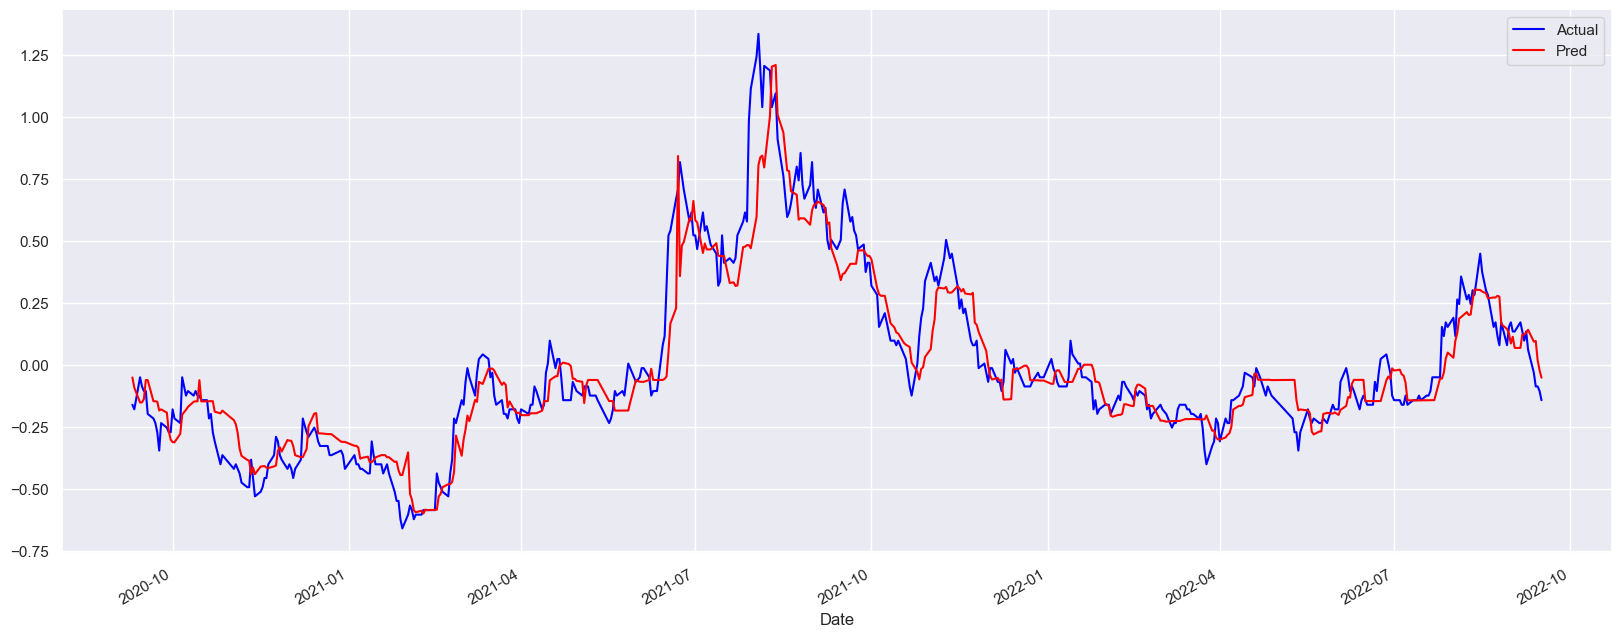

In [14]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color='red', figsize=(20,8))

### Evaluation

**Inverse transform scaled Close price**

In [15]:
from joblib import load

In [16]:
close_scaler = load('../feature_engineering/fren_close_scaler.bin')

In [17]:
inversed_pred = close_scaler.inverse_transform(np.array(predictions['Pred']).reshape(-1,1))
inversed_act = close_scaler.inverse_transform(np.array(predictions['Actual']).reshape(-1,1))

In [18]:
inversed = pd.DataFrame(inversed_pred)
inversed['Actual'] = inversed_act
inversed.rename({0:'Pred'}, axis=1, inplace=True)
inversed.index = test_labels.index
inversed.head(2)

,Pred,Actual
Date,,
2020-09-10,86.959244,81.0
2020-09-11,84.744629,80.0


**Plot error distribution**

In [19]:
def plotErrorHist(inversed_df):
    """
    Function to plot error histogram
    """
    error = inversed_df['Pred'] - inversed_df['Actual']
    plt.hist(error, bins=25)
    plt.xlabel('Prediction Error [Close]')
    _ = plt.ylabel('Count')

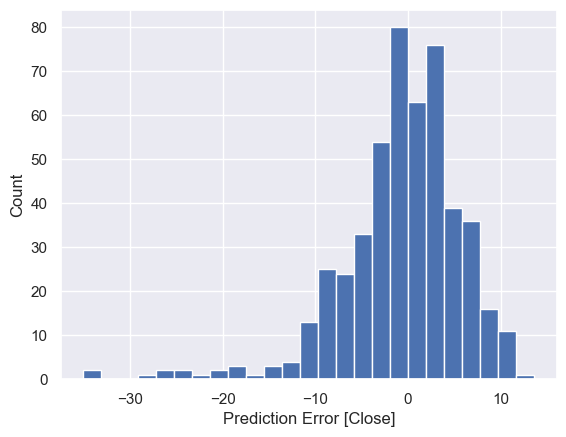

In [20]:
plotErrorHist(inversed)

**RMSE**

In [21]:
from statsmodels.tools.eval_measures import rmse

In [22]:
rmse(inversed['Pred'], inversed['Actual'])

6.597089662426147

**MAPE**

In [23]:
# mape
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [24]:
mape(inversed['Actual'], inversed['Pred'])

5.132486606232761

**R-squared**

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(inversed['Actual'], inversed['Pred'])

0.8813552243594803

### Save Model

In [27]:
# Save model
model.save_model('./models/fren.json')